

<font color='DarkSlateBlue'> 

# Problem Statement
## Housing Complany Case Study

</font> 

A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia. The data is provided in the CSV file below.

 
**Business Goal**

The company is looking at prospective properties to buy to enter the market. You are required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.

 
The company wants to know:
- Which variables are significant in predicting the price of a house, and
- How well those variables describe the price of a house 

You are required to model the price of houses with the available independent variables. This model will then be used by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

**Business Risk**

- Anticipating a higher house sale price would fail to attract potential customers, resulting in a loss for the company.
- Forecasting a lower house sale price would result in a decreased profit margin for the company.

## <font color='DarkSlateBlue'>High Level Steps </font> 

 1. Reading, understanding and visualising the data
 2. Preparing the data for modelling (train-test split, rescaling etc.)
 3. Training the model
 4. Residual analysis
 5. Predictions and evaluation on the test set
 6. Applying Ridge and Lasso regularization 
 7. Comparing results and top features identification
 8. Final conclusion

## <font color='DarkSlateBlue'>Import Modules and Set Display Options </font> 

In [1]:
import pandas as pd
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

import os
os.chdir('/Users/shrinivasd/3Upgrad-Main/Graded Advance Regression Part 1/Git uploaded/')

import warnings
warnings.filterwarnings("ignore")

pd.set_option('display.max_columns', None)
sns.set_style("whitegrid")

## <font color='DarkSlateBlue'>Downloading data and loading data as data frame </font> 

In [2]:
# Read file and inspect each column in reference with data dictionary provided
housing_df = pd.read_csv('train.csv')
housing_df.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd       None   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0         NaN   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd            

In [3]:
# 1460 - rows and 81 - Cols
housing_df.shape

(1460, 81)

In [4]:
# Check housing df for null and datatype 
# Data types seems -integer , Float, object
# We do have missing data, so need to impute as we check further
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

## Observations :
- Initial check shows, data encompasses a range of quality issues, making data cleaning one of the most time-consuming stages in the data analysis process.

### <font color='DarkSlateBlue'>Data Cleaning </font> 

### <font color='DarkSlateBlue'>Drop ALL NaN and ALL Zeros Columns </font> 

In [5]:
# As per info above, we dont have any col with all zeros as value. 
# Find columns with all NaN values
housing_df.dropna(axis=1, how='all',inplace=True)

In [6]:
# 1460 - rows and 81 - Cols
housing_df.shape

(1460, 81)

###  <font color='DarkSlateBlue'>Rename Columns for readability</font> 

In [7]:
# Rename Condition1 and Condition2 as 'Proximity_info' and 'Addl_Proximity_info' respectively 
# for better redablity
housing_df = housing_df.rename({'Condition1':'Proximity_info',
                                'Condition2':'Addl_Proximity_info'
                                },axis=1)

### <font color='DarkSlateBlue'>Removing redundant column and check for Duplicates </font> 

In [8]:
# Id_column is unique identifier so dropping and then checking for duplicates
housing_df = housing_df.drop('Id',axis=1)

# 1460 - rows and 80 - Cols
housing_df.shape

(1460, 80)

In [9]:
# No Duplicate rows
housing_df.duplicated().any()

False

### <font color='DarkSlateBlue'> Check Missing data -  count and percentage </font> 

In [10]:
# Total null values
total = housing_df.isnull().sum().sort_values(ascending = False)

# Percentage missing data is derived by dividing total missing values with total
percent = round(housing_df.isna().sum() * 100/housing_df.shape[0], 2).sort_values(ascending = False)

# Get into Df format for better readablity
housing_df_missing_data  = pd.concat([total, percent], axis=1, keys=['Total', 'Percentage'])

# Final DF, sorted
housing_df_missing_data = housing_df_missing_data[percent > 0]
housing_df_missing_data

Total  Percentage
PoolQC         1453       99.52
MiscFeature    1406       96.30
Alley          1369       93.77
Fence          1179       80.75
FireplaceQu     690       47.26
LotFrontage     259       17.74
GarageYrBlt      81        5.55
GarageCond       81        5.55
GarageType       81        5.55
GarageFinish     81        5.55
GarageQual       81        5.55
BsmtExposure     38        2.60
BsmtFinType2     38        2.60
BsmtCond         37        2.53
BsmtQual         37        2.53
BsmtFinType1     37        2.53
MasVnrArea        8        0.55
MasVnrType        8        0.55
Electrical        1        0.07

## Observations :
- The dataset comprises 1460 rows and 81 columns. Further the ID column was removed, thus, 80 columns.
- Several columns, including PoolQC, MiscFeature, Alley, Fence, and FireplaceQu, exhibit a substantial percentage of missing values, exceeding 50%.
- The target variable is 'SalePrice.'
- Some categorical variables are currently defined as integers (MSSubClass, OverallQual, OverallCond etc.), which we intend to reclassify as categorical. Based on unique values
- Approximately 19 columns have missing values.
- Data imputation will be carried out based on domain/business knowledge and statistical observations.


### <font color='DarkSlateBlue'> Missing data -  Col wise </font> 

In [11]:
missing_val_cols = list(housing_df_missing_data.index.values)
for col in list(missing_val_cols): 
    print('\nColumn Name:',col)
    print(housing_df[col].value_counts(dropna= False))
    print("--"*30)  


Column Name: PoolQC
NaN    1453
Gd        3
Ex        2
Fa        2
Name: PoolQC, dtype: int64
------------------------------------------------------------

Column Name: MiscFeature
NaN     1406
Shed      49
Gar2       2
Othr       2
TenC       1
Name: MiscFeature, dtype: int64
------------------------------------------------------------

Column Name: Alley
NaN     1369
Grvl      50
Pave      41
Name: Alley, dtype: int64
------------------------------------------------------------

Column Name: Fence
NaN      1179
MnPrv     157
GdPrv      59
GdWo       54
MnWw       11
Name: Fence, dtype: int64
------------------------------------------------------------

Column Name: FireplaceQu
NaN    690
Gd     380
TA     313
Fa      33
Ex      24
Po      20
Name: FireplaceQu, dtype: int64
------------------------------------------------------------

Column Name: LotFrontage
NaN      259
60.0     143
70.0      70
80.0      69
50.0      57
        ... 
137.0      1
38.0       1
33.0       1
150.0   

## Observations :
- According to the Data Dictionary, the columns 'PoolQC,' 'MiscFeature,' 'Alley,' 'Fence,' 'FireplaceQu,' 'GarageQual,' 'GarageCond,' 'GarageType,' 'GarageFinish,' 'BsmtFinType1,' 'BsmtFinType2,' 'BsmtExposure,' 'BsmtCond,' and 'BsmtQual' clarify that "NA" signifies the absence of these features in a house. In other words, these are not null values but rather indicators that the respective features are not present. Consequently, we will replace these values with 'Not-present' respectively.

### <font color='DarkSlateBlue'> Missing data -  Impute </font> 

In [12]:
housing_df.PoolQC = housing_df.PoolQC.fillna("No_Pool")

housing_df.MiscFeature = housing_df.MiscFeature.fillna("No_MiscFeature")

housing_df.Alley = housing_df.Alley.fillna("No_Alley")

housing_df.Fence = housing_df.Fence.fillna("No_Fence")

housing_df.FireplaceQu = housing_df.FireplaceQu.fillna("No_Fireplace")

housing_df.GarageYrBlt = housing_df.GarageYrBlt.fillna(0)

housing_df.GarageCond = housing_df.GarageCond.fillna("No_Garage")

housing_df.GarageType = housing_df.GarageType.fillna("No_Garage")

housing_df.GarageFinish = housing_df.GarageFinish.fillna("No_Garage")

housing_df.GarageQual = housing_df.GarageQual.fillna("No_Garage")

housing_df.BsmtExposure = housing_df.BsmtExposure.fillna("No_Basement")

housing_df.BsmtFinType2 = housing_df.BsmtFinType2.fillna("No_Basement")

housing_df.BsmtCond = housing_df.BsmtCond.fillna("No_Basement")

housing_df.BsmtQual = housing_df.BsmtQual.fillna("No_Basement")

housing_df.BsmtFinType1 = housing_df.BsmtFinType1.fillna("No_Basement")

### <font color='DarkSlateBlue'> Check Missing data -  count and percentage </font> 

In [13]:
# Total null values
total = housing_df.isnull().sum().sort_values(ascending = False)

# Percentage missing data is derived by dividing total missing values with total
percent = round(housing_df.isna().sum() * 100/housing_df.shape[0], 2).sort_values(ascending = False)

# Get into Df format for better readablity
housing_df_missing_data  = pd.concat([total, percent], axis=1, keys=['Total', 'Percentage'])

# Final DF, sorted
housing_df_missing_data = housing_df_missing_data[percent > 0]
housing_df_missing_data

Total  Percentage
LotFrontage    259       17.74
MasVnrType       8        0.55
MasVnrArea       8        0.55
Electrical       1        0.07

### <font color='DarkSlateBlue'> Missing data -  Impute </font> 

In [14]:
# Imputing rest of the features in dataset using median (for continuous variables) 
# and mode (for categorical variables) calculated on train dataset.### 

housing_df.LotFrontage = housing_df.LotFrontage.fillna(housing_df.LotFrontage.median())
housing_df.MasVnrType = housing_df.MasVnrType.fillna(housing_df.Electrical.mode()[0])
housing_df.MasVnrArea = housing_df.MasVnrArea.fillna(housing_df.MasVnrArea.median())
housing_df.Electrical = housing_df.Electrical.fillna(housing_df.Electrical.mode()[0])

### <font color='DarkSlateBlue'> Check Missing data -  count and percentage </font> 

In [15]:
# Total null values
total = housing_df.isnull().sum().sort_values(ascending = False)

# Percentage missing data is derived by dividing total missing values with total
percent = round(housing_df.isna().sum() * 100/housing_df.shape[0], 2).sort_values(ascending = False)

# Get into Df format for better readablity
housing_df_missing_data  = pd.concat([total, percent], axis=1, keys=['Total', 'Percentage'])

# Final DF, sorted
housing_df_missing_data = housing_df_missing_data[percent > 0]
housing_df_missing_data

Empty DataFrame
Columns: [Total, Percentage]
Index: []

In [16]:
# No null values now. All rows are 1460 data points
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   MSSubClass           1460 non-null   int64  
 1   MSZoning             1460 non-null   object 
 2   LotFrontage          1460 non-null   float64
 3   LotArea              1460 non-null   int64  
 4   Street               1460 non-null   object 
 5   Alley                1460 non-null   object 
 6   LotShape             1460 non-null   object 
 7   LandContour          1460 non-null   object 
 8   Utilities            1460 non-null   object 
 9   LotConfig            1460 non-null   object 
 10  LandSlope            1460 non-null   object 
 11  Neighborhood         1460 non-null   object 
 12  Proximity_info       1460 non-null   object 
 13  Addl_Proximity_info  1460 non-null   object 
 14  BldgType             1460 non-null   object 
 15  HouseStyle           1460 non-null   o

## Observations :
- The info command reveals that there are 1460 data entries for all columns, and no null values have been detected. The completion of the imputation process is confirmed.

### <font color='DarkSlateBlue'> Derived Columns </font> 

In [17]:
# The YearBuilt and YearRemodAdd columns can be transformed into indicators 
# of the building's age and the age of remodeling.
housing_df["AgeBuilt"] = housing_df.YrSold - housing_df.YearBuilt
housing_df["AgeRemod"] = housing_df.YrSold - housing_df.YearRemodAdd

In [18]:
# Now drop the original columns, post derived columns
housing_df.drop("YearBuilt",axis=1,inplace=True)
housing_df.drop("YearRemodAdd",axis=1,inplace=True)

In [19]:
# Now lets get rid of the features with more than 90% same data values.
for col in housing_df.columns:
    if (housing_df[col].value_counts().values[0]/len(housing_df[col]))*100 > 90 :
        print("Droping column - ",col)
        housing_df.drop(col,axis=1,inplace=True)

Droping column -  Street
Droping column -  Alley
Droping column -  Utilities
Droping column -  LandSlope
Droping column -  Addl_Proximity_info
Droping column -  RoofMatl
Droping column -  Heating
Droping column -  CentralAir
Droping column -  Electrical
Droping column -  LowQualFinSF
Droping column -  BsmtHalfBath
Droping column -  KitchenAbvGr
Droping column -  Functional
Droping column -  GarageCond
Droping column -  PavedDrive
Droping column -  3SsnPorch
Droping column -  ScreenPorch
Droping column -  PoolArea
Droping column -  PoolQC
Droping column -  MiscFeature
Droping column -  MiscVal


In [20]:
# Now we have 1460 rows and 59 columns now
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 59 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   MSSubClass      1460 non-null   int64  
 1   MSZoning        1460 non-null   object 
 2   LotFrontage     1460 non-null   float64
 3   LotArea         1460 non-null   int64  
 4   LotShape        1460 non-null   object 
 5   LandContour     1460 non-null   object 
 6   LotConfig       1460 non-null   object 
 7   Neighborhood    1460 non-null   object 
 8   Proximity_info  1460 non-null   object 
 9   BldgType        1460 non-null   object 
 10  HouseStyle      1460 non-null   object 
 11  OverallQual     1460 non-null   int64  
 12  OverallCond     1460 non-null   int64  
 13  RoofStyle       1460 non-null   object 
 14  Exterior1st     1460 non-null   object 
 15  Exterior2nd     1460 non-null   object 
 16  MasVnrType      1460 non-null   object 
 17  MasVnrArea      1460 non-null   f

###  <font color='DarkSlateBlue'>Find continuous and categorical</font> 

In [21]:
# Lets treat feature as a Catg type if, the number of unique values are upto 35
category_features = []
threshold = 35
for col in housing_df.columns:
    if housing_df[col].nunique() <= threshold :
        print('"',col,'"',end=",",sep="")
        category_features.append(col)   

"MSSubClass","MSZoning","LotShape","LandContour","LotConfig","Neighborhood","Proximity_info","BldgType","HouseStyle","OverallQual","OverallCond","RoofStyle","Exterior1st","Exterior2nd","MasVnrType","ExterQual","ExterCond","Foundation","BsmtQual","BsmtCond","BsmtExposure","BsmtFinType1","BsmtFinType2","HeatingQC","BsmtFullBath","FullBath","HalfBath","BedroomAbvGr","KitchenQual","TotRmsAbvGrd","Fireplaces","FireplaceQu","GarageType","GarageFinish","GarageCars","GarageQual","Fence","MoSold","YrSold","SaleType","SaleCondition",

In [22]:
# We can see that few of them are with Dtype = Int, whereas they all have max 35 unique values
# Hence we will convert them as Dtype = Object
housing_df[category_features].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 41 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   MSSubClass      1460 non-null   int64 
 1   MSZoning        1460 non-null   object
 2   LotShape        1460 non-null   object
 3   LandContour     1460 non-null   object
 4   LotConfig       1460 non-null   object
 5   Neighborhood    1460 non-null   object
 6   Proximity_info  1460 non-null   object
 7   BldgType        1460 non-null   object
 8   HouseStyle      1460 non-null   object
 9   OverallQual     1460 non-null   int64 
 10  OverallCond     1460 non-null   int64 
 11  RoofStyle       1460 non-null   object
 12  Exterior1st     1460 non-null   object
 13  Exterior2nd     1460 non-null   object
 14  MasVnrType      1460 non-null   object
 15  ExterQual       1460 non-null   object
 16  ExterCond       1460 non-null   object
 17  Foundation      1460 non-null   object
 18  BsmtQual

In [23]:
for each in category_features:
    housing_df[each] = housing_df[each].astype('category')     

In [24]:
# We can observe that, all of those INT cols are now Dtype = Catg
housing_df[category_features].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 41 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   MSSubClass      1460 non-null   category
 1   MSZoning        1460 non-null   category
 2   LotShape        1460 non-null   category
 3   LandContour     1460 non-null   category
 4   LotConfig       1460 non-null   category
 5   Neighborhood    1460 non-null   category
 6   Proximity_info  1460 non-null   category
 7   BldgType        1460 non-null   category
 8   HouseStyle      1460 non-null   category
 9   OverallQual     1460 non-null   category
 10  OverallCond     1460 non-null   category
 11  RoofStyle       1460 non-null   category
 12  Exterior1st     1460 non-null   category
 13  Exterior2nd     1460 non-null   category
 14  MasVnrType      1460 non-null   category
 15  ExterQual       1460 non-null   category
 16  ExterCond       1460 non-null   category
 17  Foundation    

In [25]:
data_cols = housing_df.describe().columns
continuous = [col for col in housing_df.columns if col in data_cols]
categorical = [col for col in housing_df.columns if col not in data_cols]

In [26]:
housing_df[continuous].describe().round().T

count      mean      std      min       25%       50%  \
LotFrontage    1460.0      70.0     22.0     21.0      60.0      69.0   
LotArea        1460.0   10517.0   9981.0   1300.0    7554.0    9478.0   
MasVnrArea     1460.0     103.0    181.0      0.0       0.0       0.0   
BsmtFinSF1     1460.0     444.0    456.0      0.0       0.0     384.0   
BsmtFinSF2     1460.0      47.0    161.0      0.0       0.0       0.0   
BsmtUnfSF      1460.0     567.0    442.0      0.0     223.0     478.0   
TotalBsmtSF    1460.0    1057.0    439.0      0.0     796.0     992.0   
1stFlrSF       1460.0    1163.0    387.0    334.0     882.0    1087.0   
2ndFlrSF       1460.0     347.0    437.0      0.0       0.0       0.0   
GrLivArea      1460.0    1515.0    525.0    334.0    1130.0    1464.0   
GarageYrBlt    1460.0    1869.0    454.0      0.0    1958.0    1977.0   
GarageArea     1460.0     473.0    214.0      0.0     334.0     480.0   
WoodDeckSF     1460.0      94.0    125.0      0.0       0.0       0.0   
OpenPorchSF    1460.0      47.0     66.0      0.0       0.0      25.0   
EnclosedPorch  1460.0      22.0     61.0      0.0       0.0       0.0   
SalePrice      1460.0  180921.0  79443.0  34900.0  129975.0  163000.0   
AgeBuilt       1460.0      37.0     30.0      0.0       8.0      35.0   
AgeRemod       1460.0      23.0     21.0     -1.0       4.0      14.0   

                    75%       max  
LotFrontage        79.0     313.0  
LotArea         11602.0  215245.0  
MasVnrArea        164.0    1600.0  
BsmtFinSF1        712.0    5644.0  
BsmtFinSF2          0.0    1474.0  
BsmtUnfSF         808.0    2336.0  
TotalBsmtSF      1298.0    6110.0  
1stFlrSF         1391.0    4692.0  
2ndFlrSF          728.0    2065.0  
GrLivArea        1777.0    5642.0  
GarageYrBlt      2001.0    2010.0  
GarageArea        576.0    1418.0  
WoodDeckSF        168.0     857.0  
OpenPorchSF        68.0     547.0  
EnclosedPorch       0.0     552.0  
SalePrice      214000.0  755000.0  
AgeBuilt           54.0     136.0  
AgeRemod           41.0      60.0

In [27]:
housing_df[categorical].describe().round().T

count unique           top  freq
MSSubClass      1460     15            20   536
MSZoning        1460      5            RL  1151
LotShape        1460      4           Reg   925
LandContour     1460      4           Lvl  1311
LotConfig       1460      5        Inside  1052
Neighborhood    1460     25         NAmes   225
Proximity_info  1460      9          Norm  1260
BldgType        1460      5          1Fam  1220
HouseStyle      1460      8        1Story   726
OverallQual     1460     10             5   397
OverallCond     1460      9             5   821
RoofStyle       1460      6         Gable  1141
Exterior1st     1460     15       VinylSd   515
Exterior2nd     1460     16       VinylSd   504
MasVnrType      1460      5          None   864
ExterQual       1460      4            TA   906
ExterCond       1460      5            TA  1282
Foundation      1460      6         PConc   647
BsmtQual        1460      5            TA   649
BsmtCond        1460      5            TA  1311
BsmtExposure    1460      5            No   953
BsmtFinType1    1460      7           Unf   430
BsmtFinType2    1460      7           Unf  1256
HeatingQC       1460      5            Ex   741
BsmtFullBath    1460      4             0   856
FullBath        1460      4             2   768
HalfBath        1460      3             0   913
BedroomAbvGr    1460      8             3   804
KitchenQual     1460      4            TA   735
TotRmsAbvGrd    1460     12             6   402
Fireplaces      1460      4             0   690
FireplaceQu     1460      6  No_Fireplace   690
GarageType      1460      7        Attchd   870
GarageFinish    1460      4           Unf   605
GarageCars      1460      5             2   824
GarageQual      1460      6            TA  1311
Fence           1460      5      No_Fence  1179
MoSold          1460     12             6   253
YrSold          1460      5          2009   338
SaleType        1460      9            WD  1267
SaleCondition   1460      6        Normal  1198

In [28]:
print("We have total" ,len(housing_df.columns), "features, post clean up")

We have total 59 features, post clean up


In [29]:
print("We have total" ,len(continuous), "continuous data type features")

We have total 18 continuous data type features


In [30]:
print("We have total" ,len(categorical), "categorical data type features")

We have total 41 categorical data type features


In [31]:
# Check the categorical columns
# Note that we have not used Head to restrict overflow as they are categorical variables, 
# max unique values as 25

for col in categorical:
    print("Name : ",col)
    print("Unique Count :",housing_df[col].value_counts().count())
    print(housing_df[col].value_counts())
    print("------------------------------")

Name :  MSSubClass
Unique Count : 15
20     536
60     299
50     144
120     87
30      69
160     63
70      60
80      58
90      52
190     30
85      20
75      16
45      12
180     10
40       4
Name: MSSubClass, dtype: int64
------------------------------
Name :  MSZoning
Unique Count : 5
RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64
------------------------------
Name :  LotShape
Unique Count : 4
Reg    925
IR1    484
IR2     41
IR3     10
Name: LotShape, dtype: int64
------------------------------
Name :  LandContour
Unique Count : 4
Lvl    1311
Bnk      63
HLS      50
Low      36
Name: LandContour, dtype: int64
------------------------------
Name :  LotConfig
Unique Count : 5
Inside     1052
Corner      263
CulDSac      94
FR2          47
FR3           4
Name: LotConfig, dtype: int64
------------------------------
Name :  Neighborhood
Unique Count : 25
NAmes      225
CollgCr    150
OldTown    113
Edwards    100
S

In [32]:
# Check the Continuous columns
# Note that we have used Head to restrict overflow as they are continuous variables
for col in continuous:
    print("Name : ",col)
    print("Unique Count :",housing_df[col].value_counts().count())
    print(housing_df[col].value_counts().head())   
    print("------------------------------")

Name :  LotFrontage
Unique Count : 110
69.0    270
60.0    143
70.0     70
80.0     69
50.0     57
Name: LotFrontage, dtype: int64
------------------------------
Name :  LotArea
Unique Count : 1073
7200    25
9600    24
6000    17
9000    14
8400    14
Name: LotArea, dtype: int64
------------------------------
Name :  MasVnrArea
Unique Count : 327
0.0      869
180.0      8
72.0       8
108.0      8
120.0      7
Name: MasVnrArea, dtype: int64
------------------------------
Name :  BsmtFinSF1
Unique Count : 637
0      467
24      12
16       9
686      5
662      5
Name: BsmtFinSF1, dtype: int64
------------------------------
Name :  BsmtFinSF2
Unique Count : 144
0      1293
180       5
374       3
551       2
147       2
Name: BsmtFinSF2, dtype: int64
------------------------------
Name :  BsmtUnfSF
Unique Count : 780
0      118
728      9
384      8
600      7
300      7
Name: BsmtUnfSF, dtype: int64
------------------------------
Name :  TotalBsmtSF
Unique Count : 721
0       37
864  

###  <font color='DarkSlateBlue'>Find Skew and outliers for continuous variable</font> 


In [33]:
housing_df[continuous].skew().sort_values(ascending = False).round().head(10)

LotArea          12.0
BsmtFinSF2        4.0
EnclosedPorch     3.0
MasVnrArea        3.0
LotFrontage       2.0
OpenPorchSF       2.0
SalePrice         2.0
BsmtFinSF1        2.0
WoodDeckSF        2.0
TotalBsmtSF       2.0
dtype: float64

In [34]:
# Check for outliears
percentile = [0,0.05, 0.10, 0.25, 0.5 ,0.75 ,0.95, 1.0]
df_perctile = housing_df[continuous].quantile(percentile)

df_perctile

LotFrontage    LotArea  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  \
0.00        21.00    1300.00        0.00        0.00         0.0        0.0   
0.05        35.95    3311.70        0.00        0.00         0.0        0.0   
0.10        49.00    5000.00        0.00        0.00         0.0       74.9   
0.25        60.00    7553.50        0.00        0.00         0.0      223.0   
0.50        69.00    9478.50        0.00      383.50         0.0      477.5   
0.75        79.00   11601.50      164.25      712.25         0.0      808.0   
0.95       104.00   17401.15      456.00     1274.00       396.2     1468.0   
1.00       313.00  215245.00     1600.00     5644.00      1474.0     2336.0   

      TotalBsmtSF  1stFlrSF  2ndFlrSF  GrLivArea  GarageYrBlt  GarageArea  \
0.00         0.00    334.00      0.00     334.00          0.0         0.0   
0.05       519.30    672.95      0.00     848.00          0.0         0.0   
0.10       636.90    756.90      0.00     912.00       1928.0       240.0   
0.25       795.75    882.00      0.00    1129.50       1958.0       334.5   
0.50       991.50   1087.00      0.00    1464.00       1977.0       480.0   
0.75      1298.25   1391.25    728.00    1776.75       2001.0       576.0   
0.95      1753.00   1831.25   1141.05    2466.10       2007.0       850.1   
1.00      6110.00   4692.00   2065.00    5642.00       2010.0      1418.0   

      WoodDeckSF  OpenPorchSF  EnclosedPorch  SalePrice  AgeBuilt  AgeRemod  
0.00         0.0         0.00           0.00    34900.0       0.0      -1.0  
0.05         0.0         0.00           0.00    88000.0       1.0       0.0  
0.10         0.0         0.00           0.00   106475.0       1.0       1.0  
0.25         0.0         0.00           0.00   129975.0       8.0       4.0  
0.50         0.0        25.00           0.00   163000.0      35.0      14.0  
0.75       168.0        68.00           0.00   214000.0      54.0      41.0  
0.95       335.0       175.05         180.15   326100.0      91.0      58.0  
1.00       857.0       547.00         552.00   755000.0     136.0      60.0

### <font color='DarkSlateBlue'>Outlier Treatment using quatile range replacement</font> 

In [35]:
def outlier_thresholds(dataframe, col_name, q1=0.05, q3=0.95):
    quartile1 = dataframe[col_name].quantile(q1)
    quartile3 = dataframe[col_name].quantile(q3)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit

def check_outlier(dataframe, col_name):
    low_limit, up_limit = outlier_thresholds(dataframe, col_name)
    #if dataframe[(dataframe[col_name] > up_limit) | (dataframe[col_name] < low_limit)].any(axis=None):    
    if dataframe[(dataframe[col_name] > up_limit) | (dataframe[col_name] < low_limit)].astype(bool).any(axis=None):    

        return True
    else:
        return False

def replace_with_thresholds(dataframe, variable):
    low_limit, up_limit = outlier_thresholds(dataframe, variable)
    dataframe.loc[(dataframe[variable] < low_limit), variable] = low_limit
    dataframe.loc[(dataframe[variable] > up_limit), variable] = up_limit

In [36]:
outliers = []
# Outlier detection for continuous variables
for col in continuous:
    chk = (f"{col} :  {check_outlier(housing_df, col)}")
    if "True" in chk:
        print(f"{col} :  {check_outlier(housing_df, col)}")
    
    outliers.append(check_outlier(housing_df, col))
    
print(f"   \nOutliers detected? {np.array(outliers).any()}")

LotFrontage :  True
LotArea :  True
MasVnrArea :  True
BsmtFinSF1 :  True
BsmtFinSF2 :  True
TotalBsmtSF :  True
1stFlrSF :  True
GrLivArea :  True
WoodDeckSF :  True
OpenPorchSF :  True
EnclosedPorch :  True
SalePrice :  True
   
Outliers detected? True


In [37]:
replace_with_thresholds(housing_df, "LotFrontage")
replace_with_thresholds(housing_df, "LotArea")
replace_with_thresholds(housing_df, "MasVnrArea")
replace_with_thresholds(housing_df, "BsmtFinSF1")
replace_with_thresholds(housing_df, "BsmtFinSF2")
replace_with_thresholds(housing_df, "TotalBsmtSF")
replace_with_thresholds(housing_df, "1stFlrSF")
replace_with_thresholds(housing_df, "GrLivArea")
replace_with_thresholds(housing_df, "WoodDeckSF")
replace_with_thresholds(housing_df, "OpenPorchSF")
replace_with_thresholds(housing_df, "EnclosedPorch")
replace_with_thresholds(housing_df, "SalePrice")

In [38]:
outliers = []
# Outlier detection for continuous variables
for col in continuous:
    chk = (f"{col} :  {check_outlier(housing_df, col)}")
    if "True" in chk:
        print(f"{col} :  {check_outlier(housing_df, col)}")
    
    outliers.append(check_outlier(housing_df, col))
    
print(f"   \nOutliers detected? {np.array(outliers).any()}")

   
Outliers detected? False


### <font color='DarkSlateBlue'> Skewness Check - post Outlier replacement</font> 

In [39]:
housing_df[continuous].skew().sort_values(ascending = False).head(10)

BsmtFinSF2       3.978767
EnclosedPorch    2.960984
LotArea          2.539670
MasVnrArea       2.437605
OpenPorchSF      2.133735
SalePrice        1.769714
WoodDeckSF       1.533078
GrLivArea        1.245332
LotFrontage      1.086913
1stFlrSF         1.074680
dtype: float64

## Observations :
- Data seems not much skewed post outliears treatment
- No negative skewness 

In [40]:
percentile = [0,0.05, 0.10, 0.25, 0.5 ,0.75 ,0.95, 1.0]
df_perctile = housing_df[continuous].quantile(percentile)

df_perctile

LotFrontage    LotArea  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  \
0.00       21.000   1300.000        0.00        0.00         0.0        0.0   
0.05       35.950   3311.700        0.00        0.00         0.0        0.0   
0.10       49.000   5000.000        0.00        0.00         0.0       74.9   
0.25       60.000   7553.500        0.00        0.00         0.0      223.0   
0.50       69.000   9478.500        0.00      383.50         0.0      477.5   
0.75       79.000  11601.500      164.25      712.25         0.0      808.0   
0.95      104.000  17401.150      456.00     1274.00       396.2     1468.0   
1.00      206.075  38535.325     1140.00     3185.00       990.5     2336.0   

      TotalBsmtSF  1stFlrSF  2ndFlrSF  GrLivArea  GarageYrBlt  GarageArea  \
0.00         0.00    334.00      0.00     334.00          0.0         0.0   
0.05       519.30    672.95      0.00     848.00          0.0         0.0   
0.10       636.90    756.90      0.00     912.00       1928.0       240.0   
0.25       795.75    882.00      0.00    1129.50       1958.0       334.5   
0.50       991.50   1087.00      0.00    1464.00       1977.0       480.0   
0.75      1298.25   1391.25    728.00    1776.75       2001.0       576.0   
0.95      1753.00   1831.25   1141.05    2466.10       2007.0       850.1   
1.00      3603.55   3568.70   2065.00    4893.25       2010.0      1418.0   

      WoodDeckSF  OpenPorchSF  EnclosedPorch  SalePrice  AgeBuilt  AgeRemod  
0.00         0.0        0.000          0.000    34900.0       0.0      -1.0  
0.05         0.0        0.000          0.000    88000.0       1.0       0.0  
0.10         0.0        0.000          0.000   106475.0       1.0       1.0  
0.25         0.0        0.000          0.000   129975.0       8.0       4.0  
0.50         0.0       25.000          0.000   163000.0      35.0      14.0  
0.75       168.0       68.000          0.000   214000.0      54.0      41.0  
0.95       335.0      175.050        180.150   326100.0      91.0      58.0  
1.00       837.5      437.625        450.375   683250.0     136.0      60.0

## <font color='DarkSlateBlue'>Exploratory Data Analysis - Univariate, Bivariate and Multivariate </font> 

## <font color='DarkSlateBlue'>Visualisation the data </font> 
- To check if linear regression model makes sense for given data 
- To check if any multicollinearity 
- If yes, need to take care of multicollinearity 

<Axes: xlabel='SalePrice', ylabel='Density'>

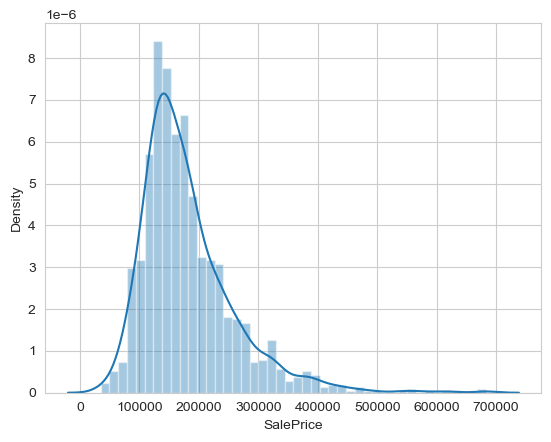

In [41]:
# Checking distribution of SalePrice
sns.distplot(housing_df['SalePrice'])

<Axes: ylabel='SalePrice'>

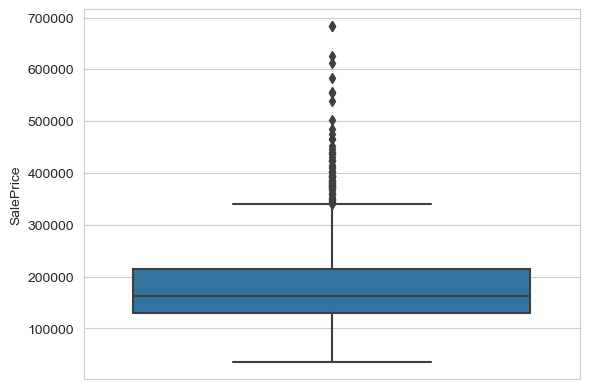

In [42]:
sns.boxplot(y=housing_df.SalePrice)

## Observations :
- The distribution of house prices appears to be right-skewed, with the majority falling below   250,000.
- Notably, there exists a substantial disparity between the mean and median of the price distribution. The large standard deviation signifies considerable variance in house prices. Specifically, 85% of the prices are below 250,000, while the remaining 15% fall within the range of 250,000 to 755,000.
- The target variable exhibits significant skewness, which will be addressed later in the analysis.

## <font color='DarkSlateBlue'>Exploratory Data Analysis - Univariate </font> 

In [43]:
def boxplot_and_dist(df,col):
    sns.set_theme(color_codes=True)
    plt.figure(figsize=(30,10))
    plt.subplot(1,2,1)
    sns.boxplot(df[col])
    plt.title("BoxPlot for "+col , fontsize = 25)
    plt.subplot(1,2,2)
    sns.distplot(df[col]) # distribution plot
    plt.title("Density Histogram for "+col , fontsize = 25)
    plt.show()
    print(df[col].describe()) #Data metrics
    print()
    print("*********************************")

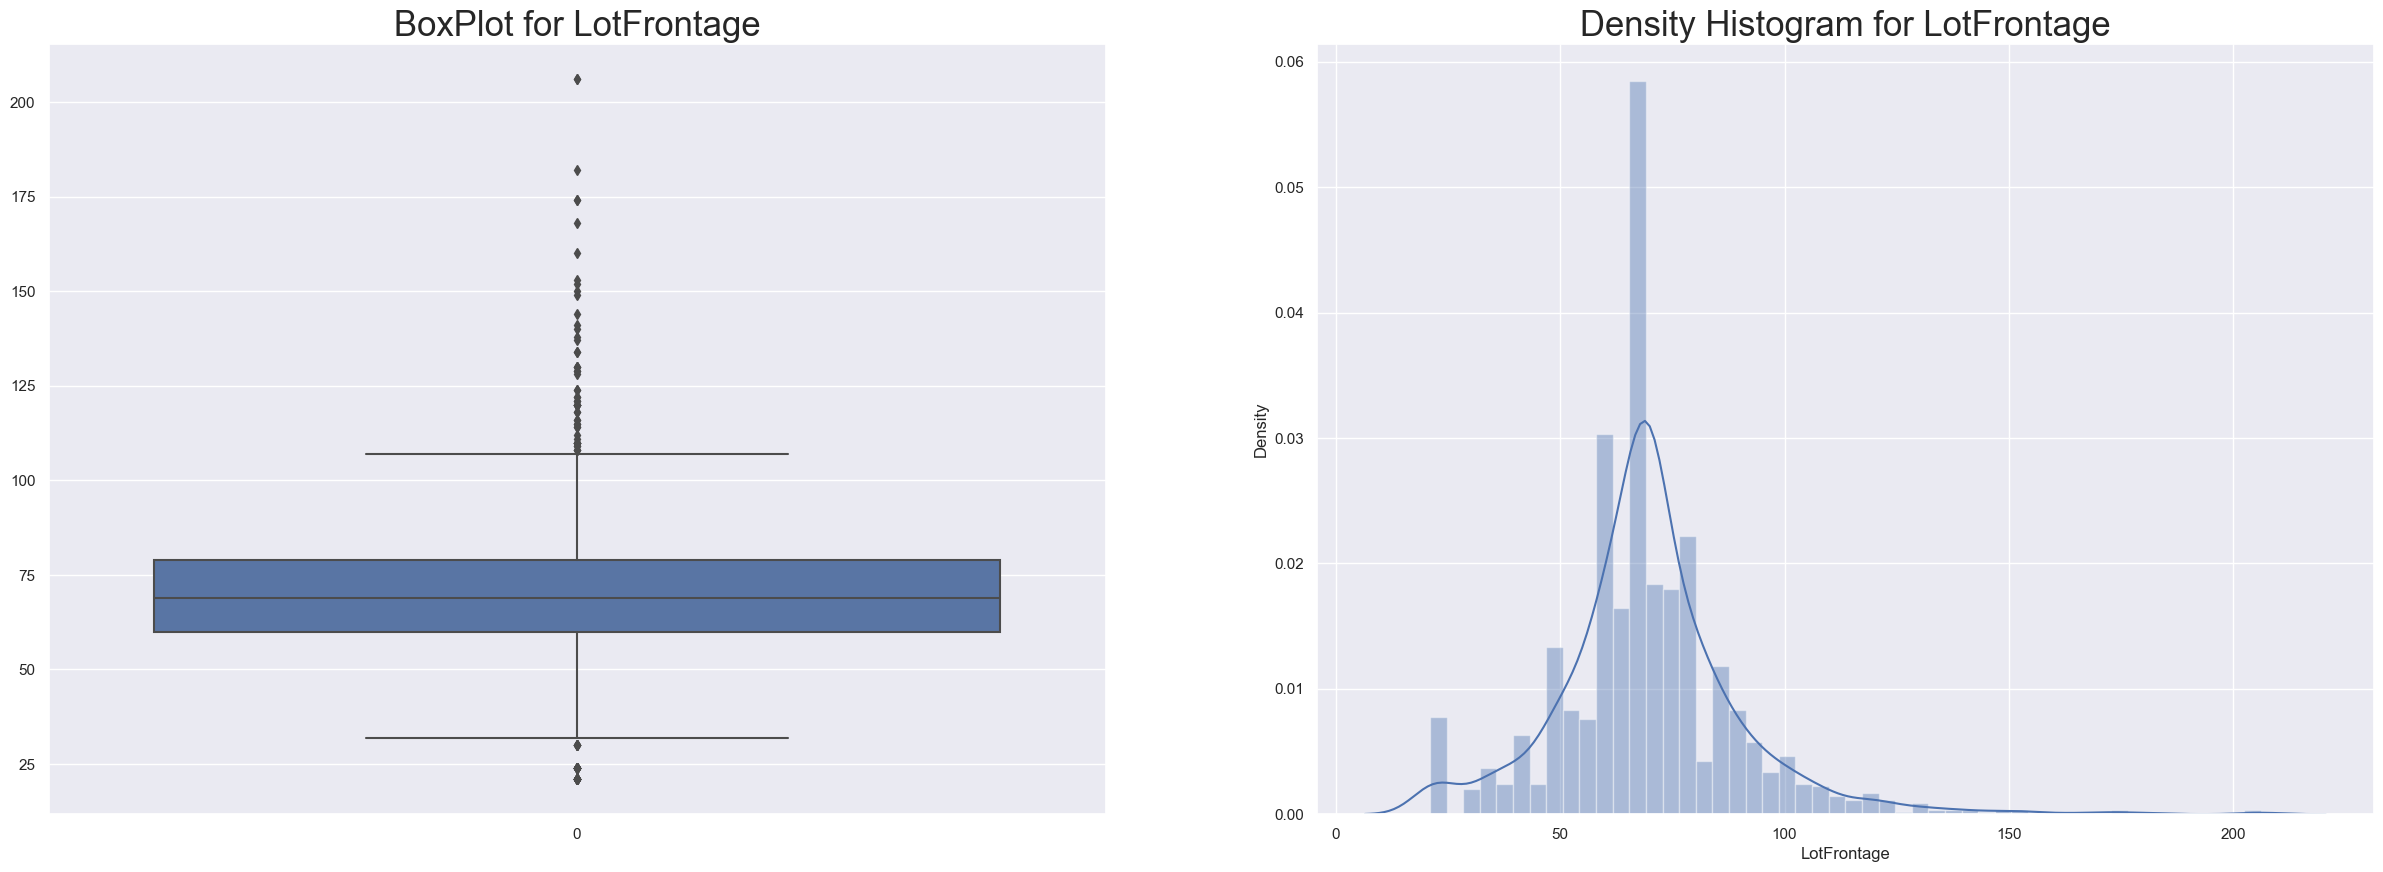

count    1460.000000
mean       69.717226
std        20.726673
min        21.000000
25%        60.000000
50%        69.000000
75%        79.000000
max       206.075000
Name: LotFrontage, dtype: float64

*********************************


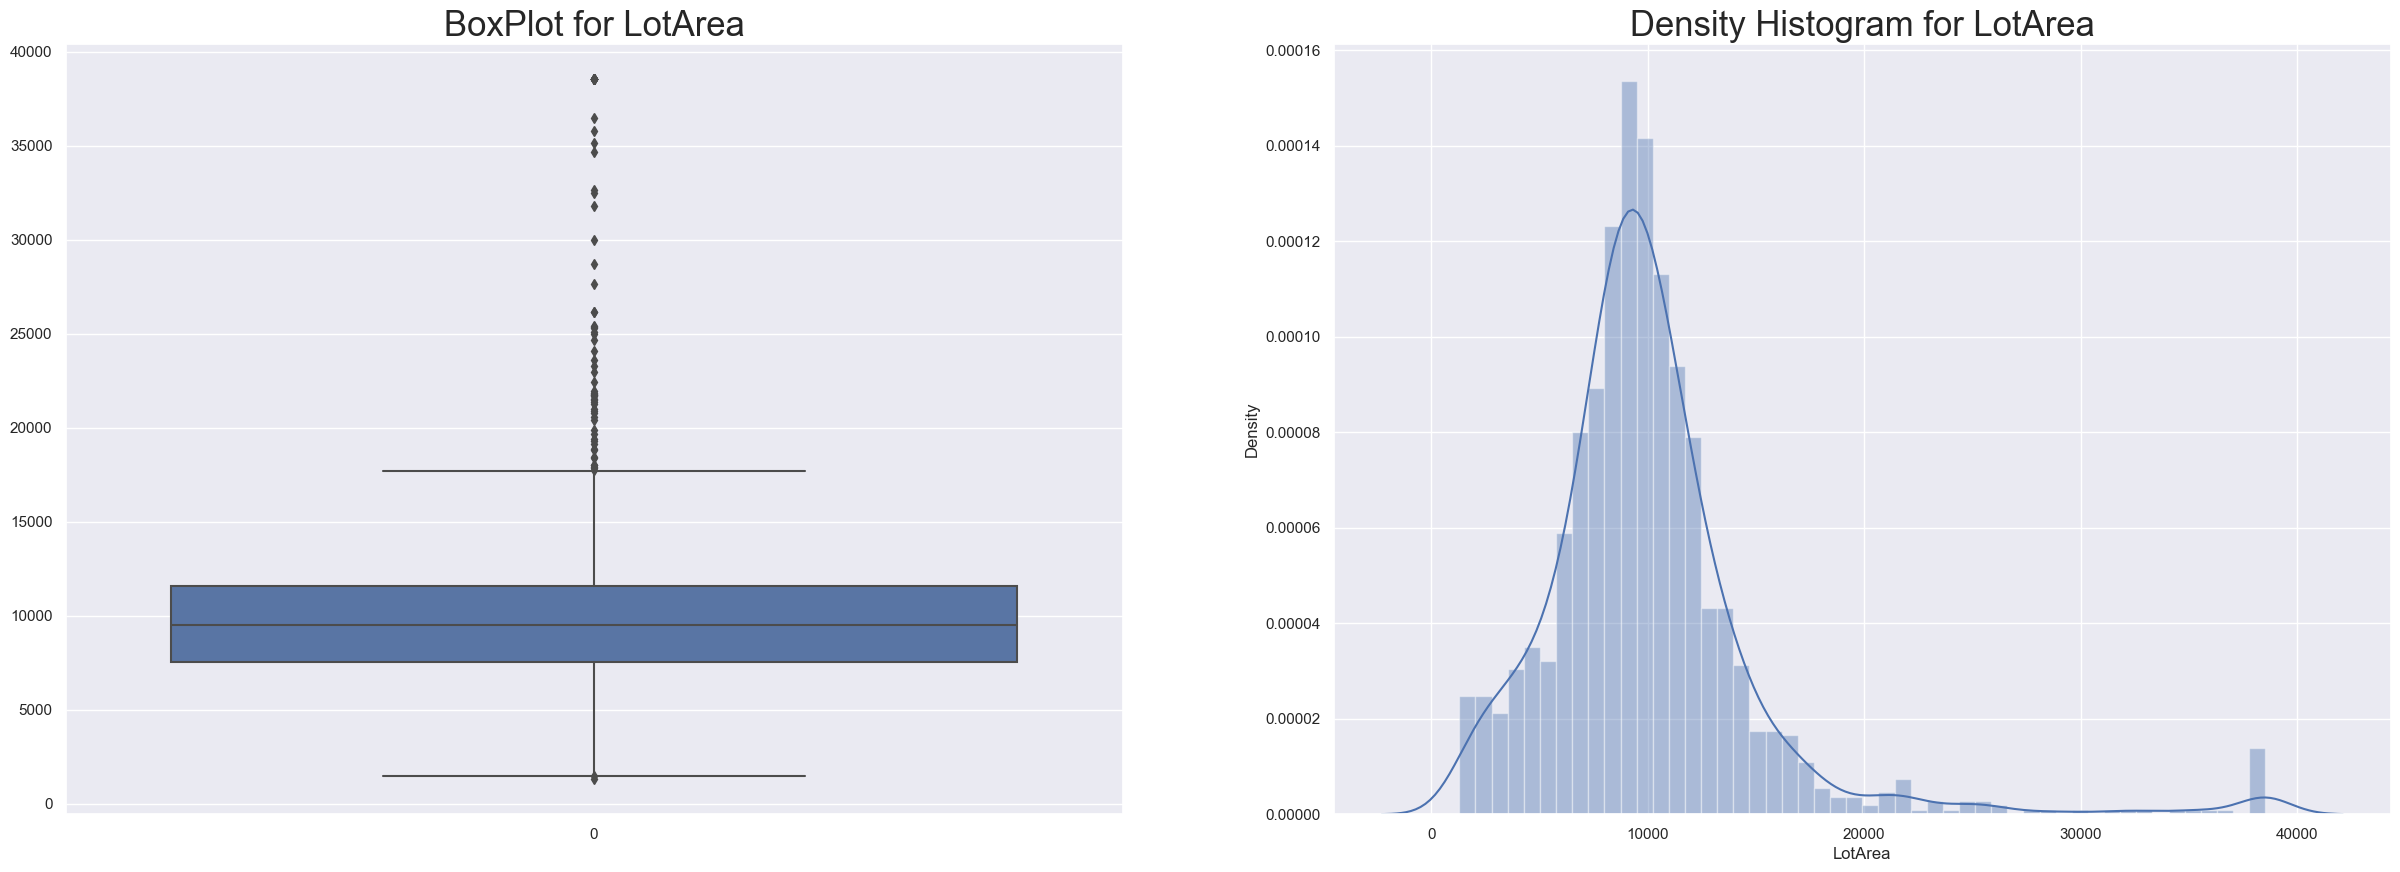

count     1460.000000
mean     10072.055394
std       5118.484147
min       1300.000000
25%       7553.500000
50%       9478.500000
75%      11601.500000
max      38535.325000
Name: LotArea, dtype: float64

*********************************


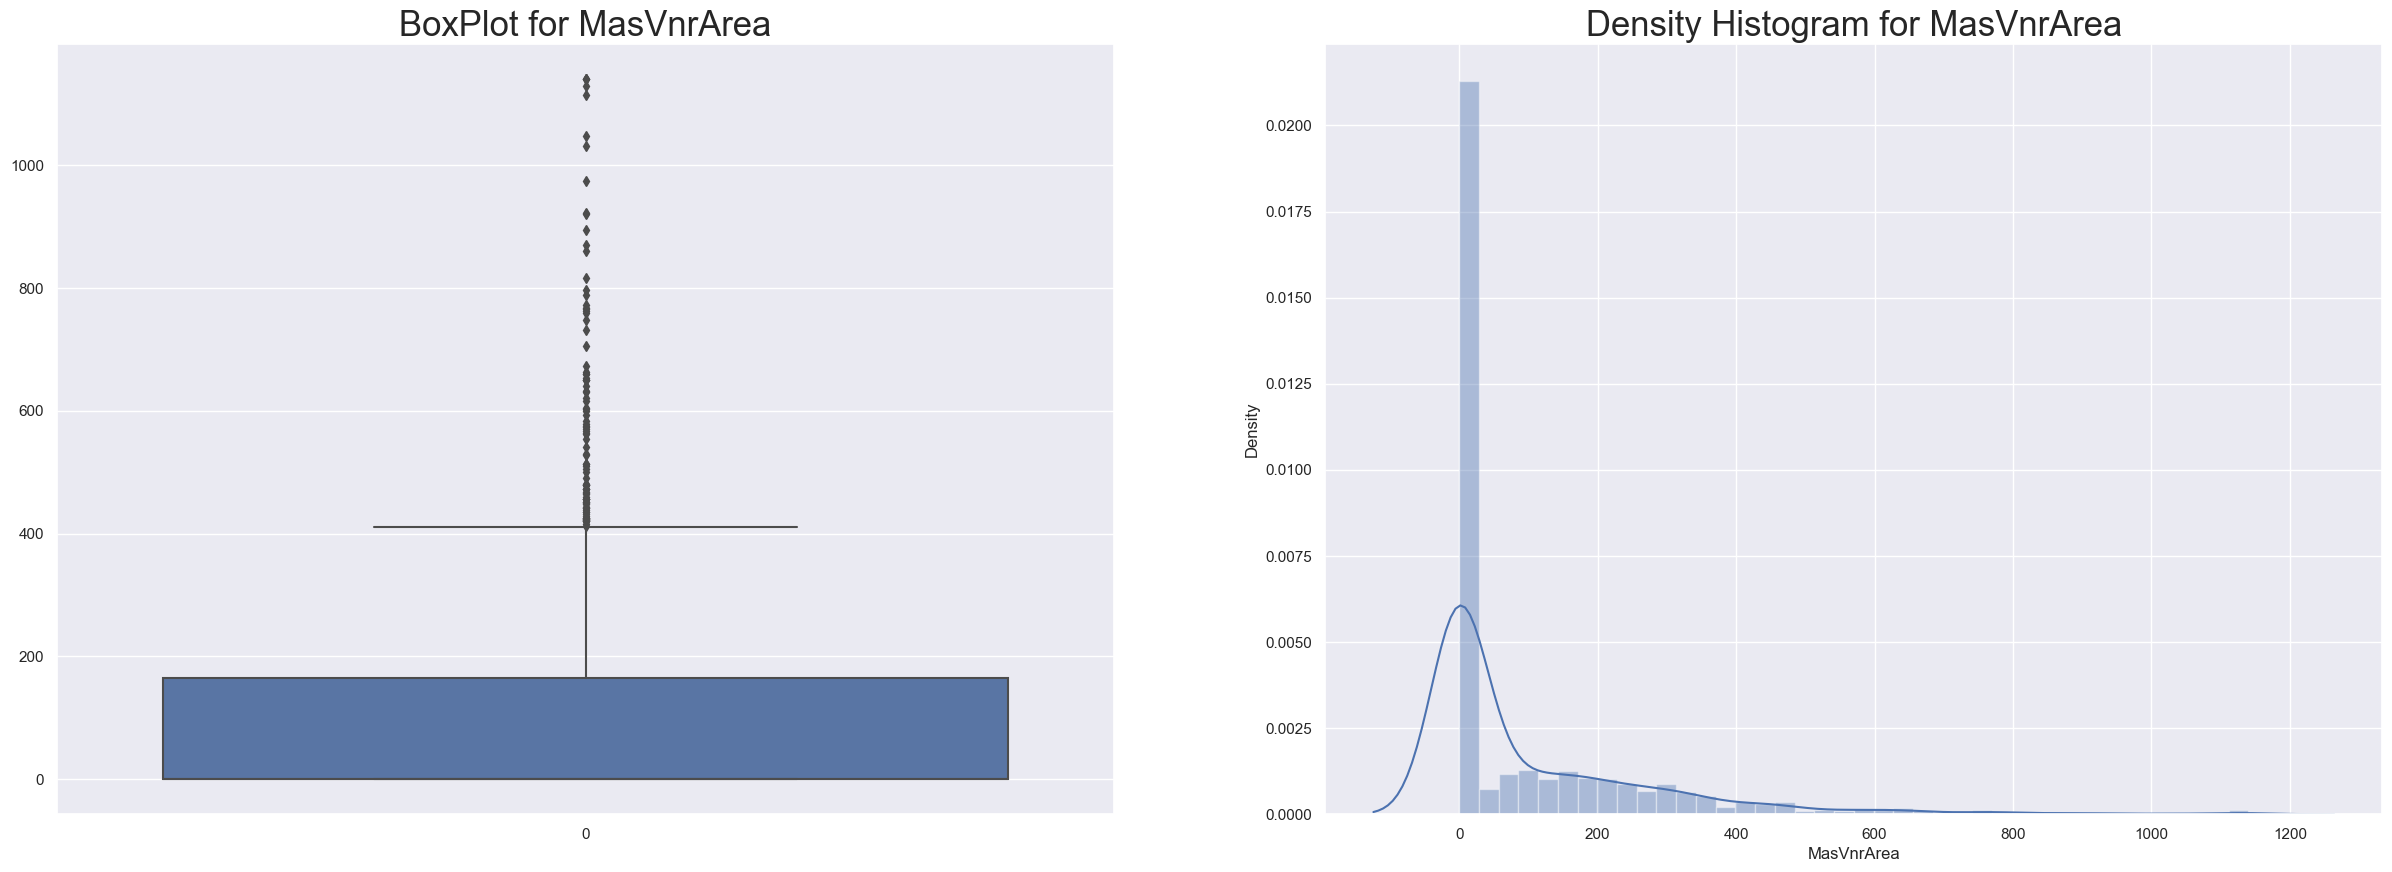

count    1460.000000
mean      102.618493
std       177.325571
min         0.000000
25%         0.000000
50%         0.000000
75%       164.250000
max      1140.000000
Name: MasVnrArea, dtype: float64

*********************************


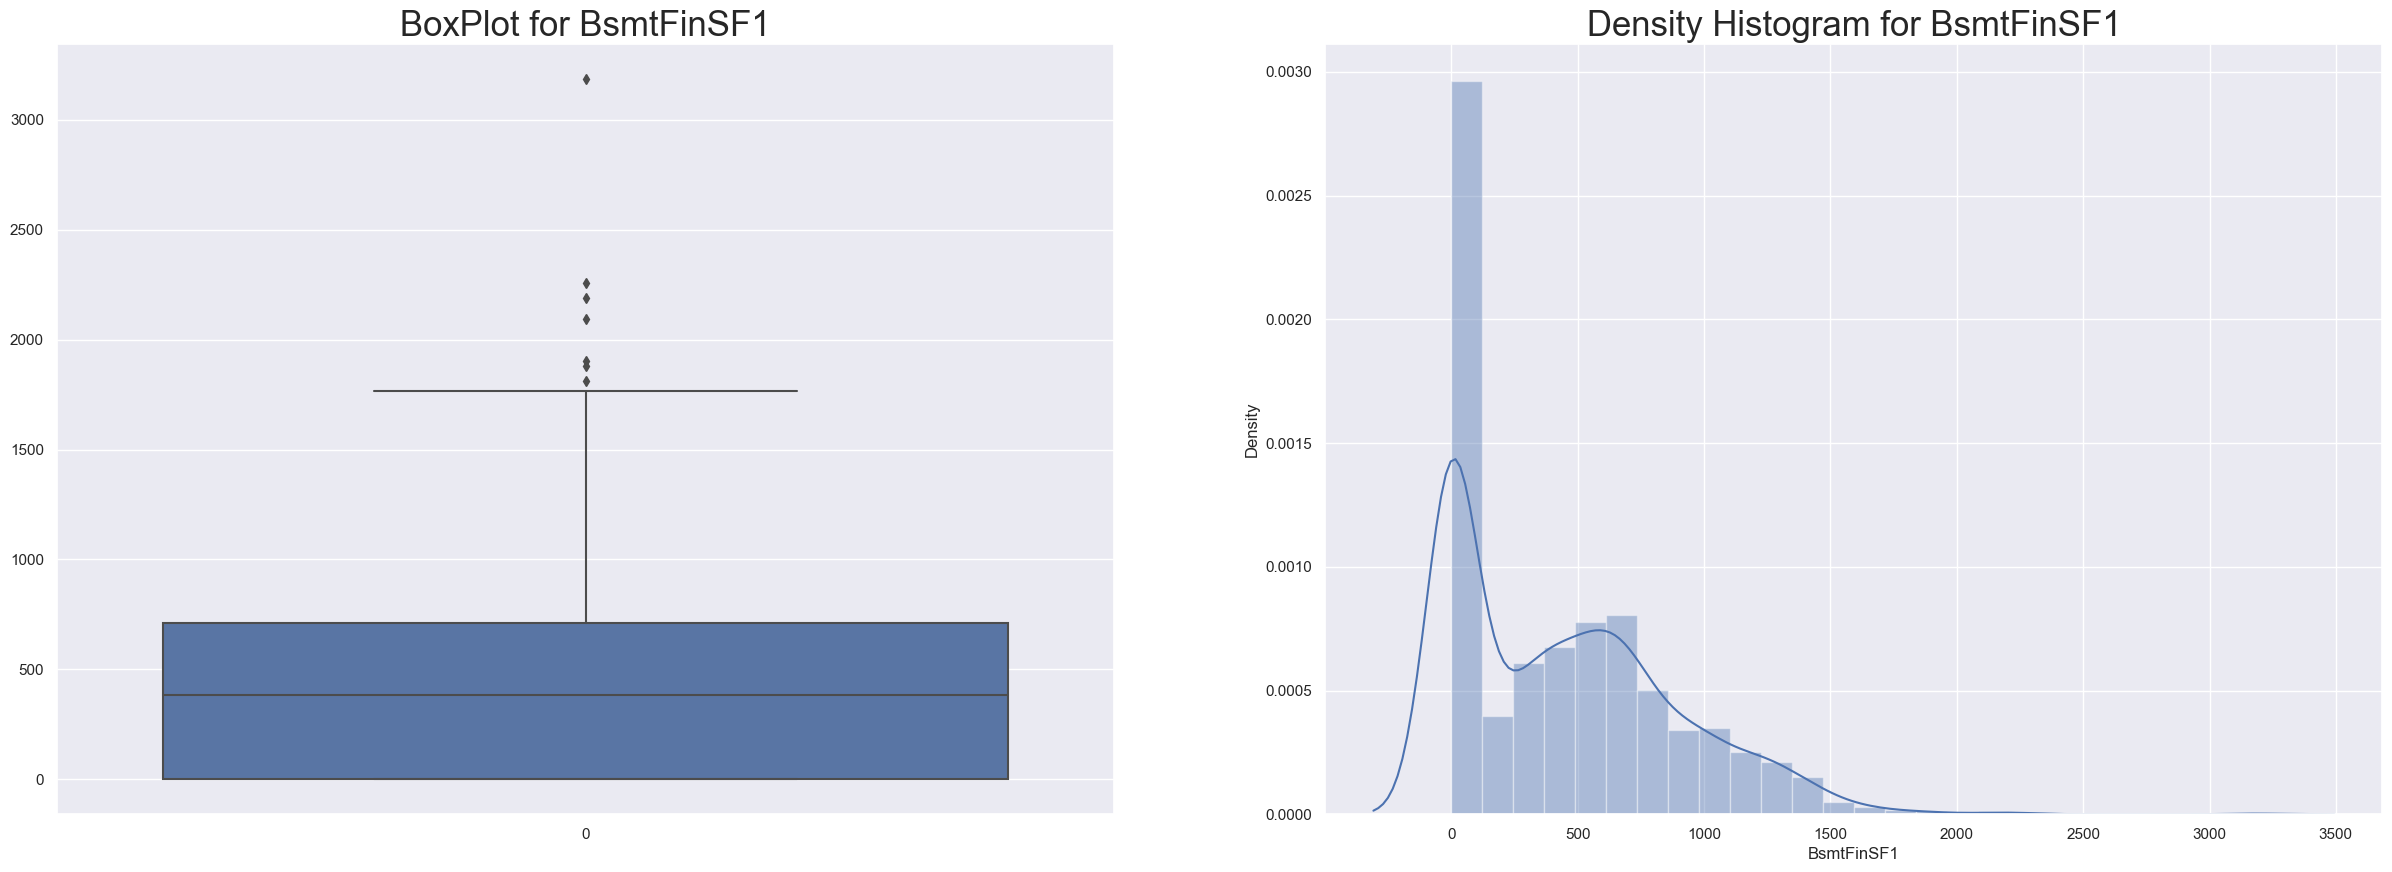

count    1460.000000
mean      441.955479
std       441.177568
min         0.000000
25%         0.000000
50%       383.500000
75%       712.250000
max      3185.000000
Name: BsmtFinSF1, dtype: float64

*********************************


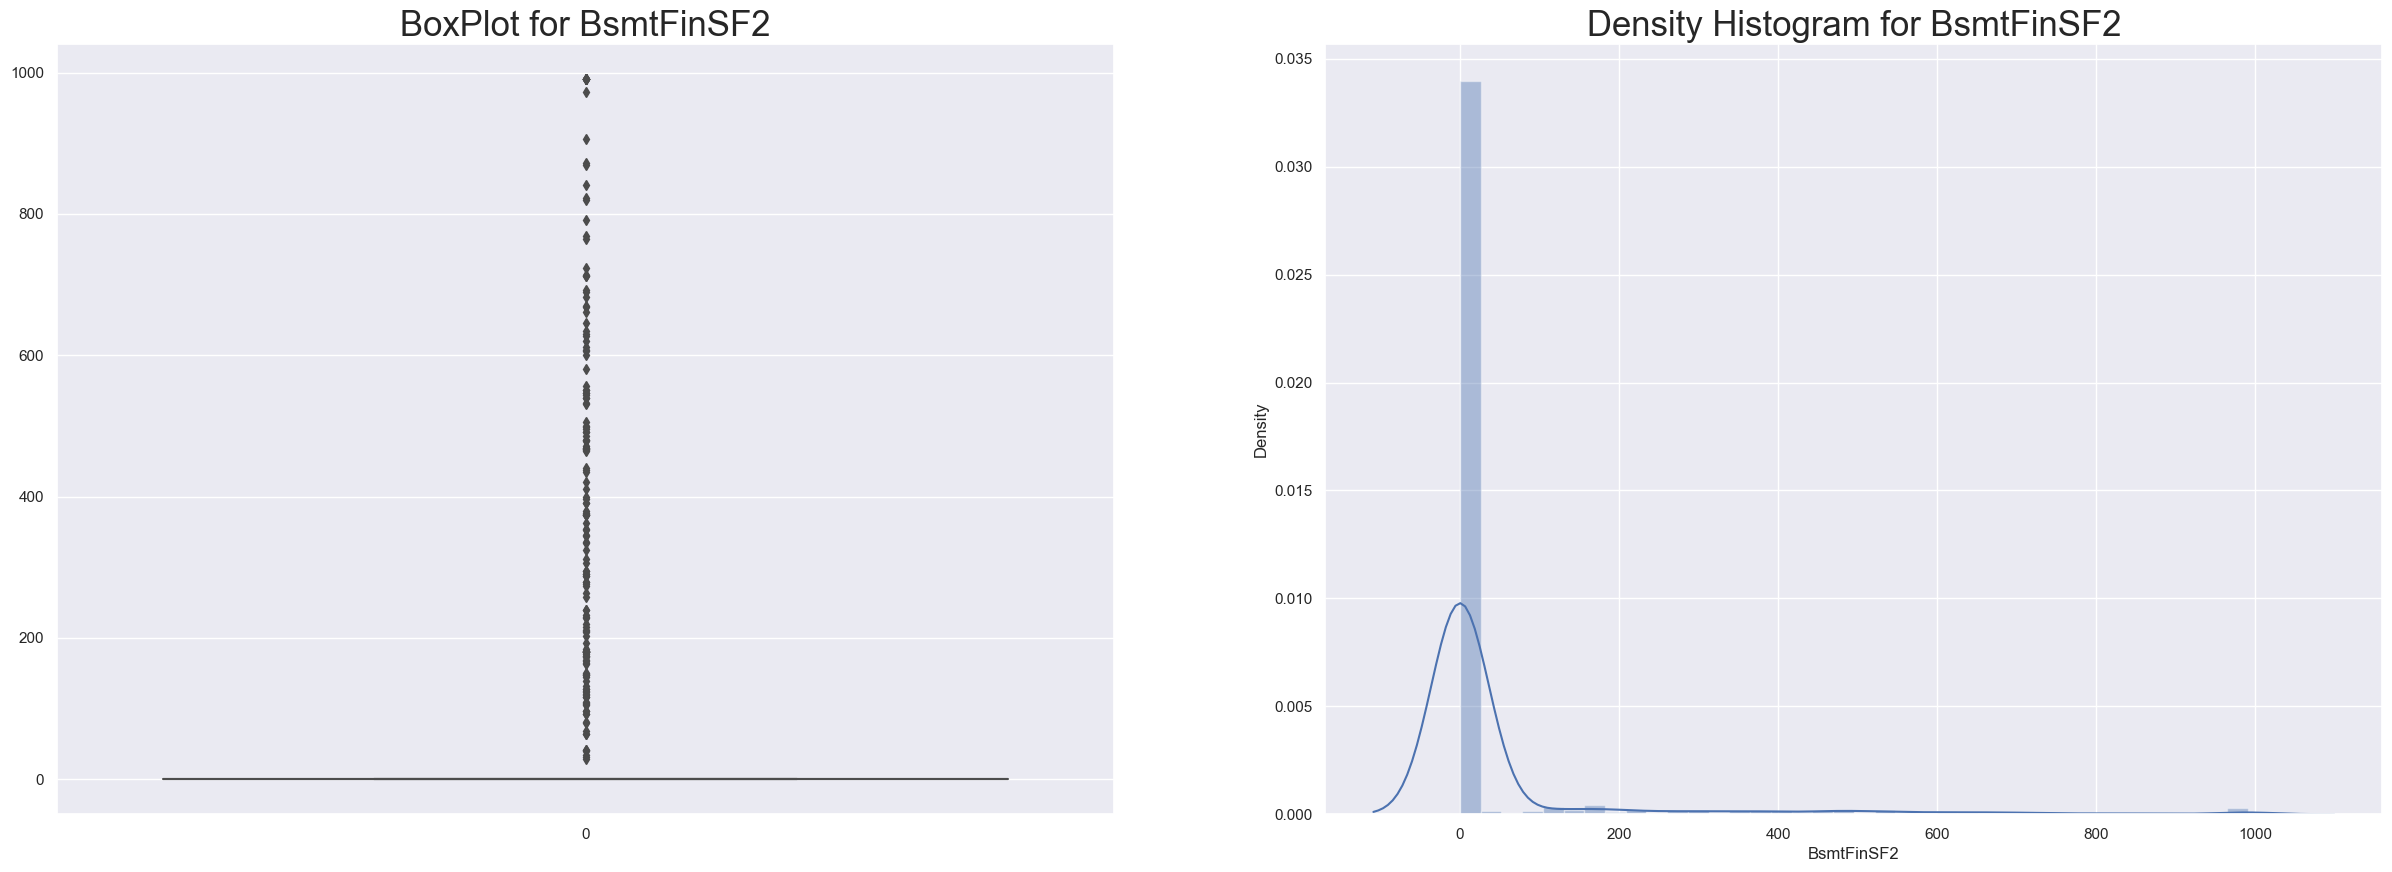

count    1460.000000
mean       45.712329
std       155.671744
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       990.500000
Name: BsmtFinSF2, dtype: float64

*********************************


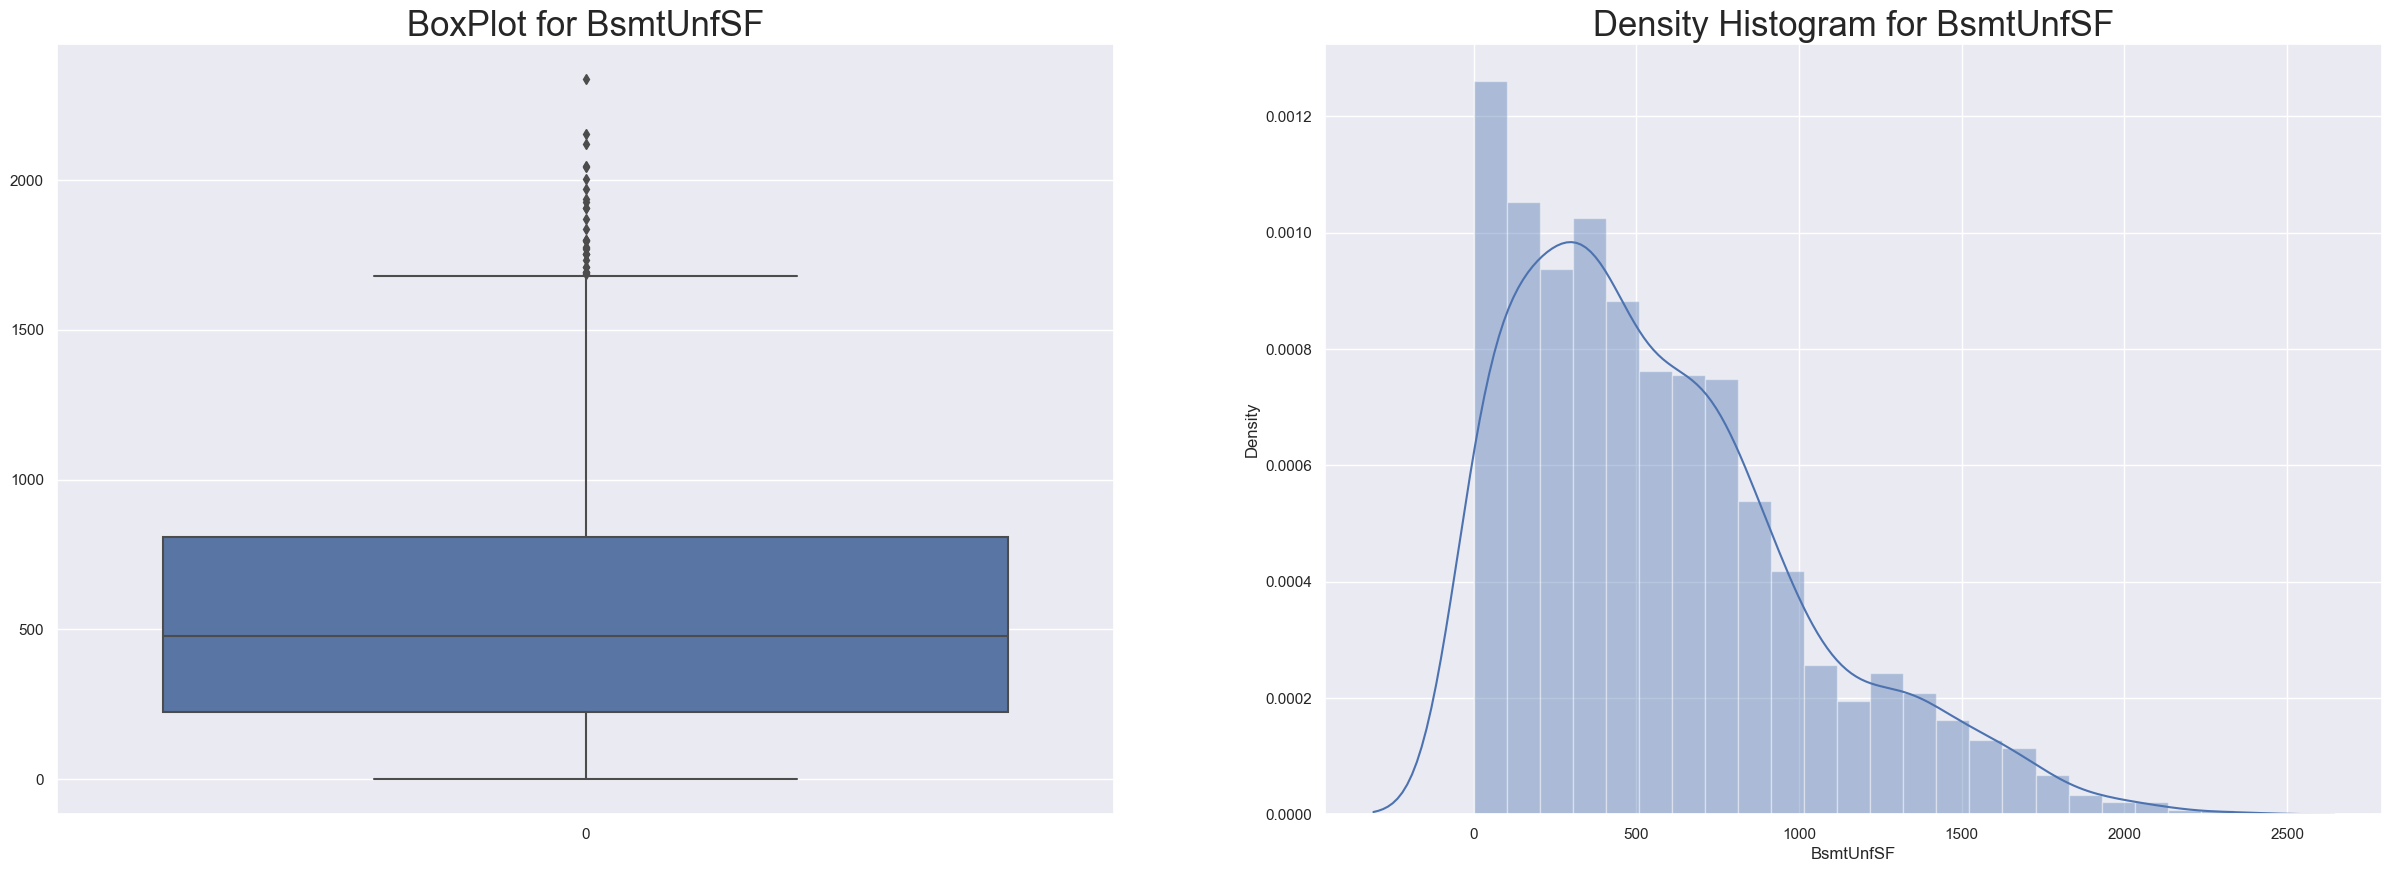

count    1460.000000
mean      567.240411
std       441.866955
min         0.000000
25%       223.000000
50%       477.500000
75%       808.000000
max      2336.000000
Name: BsmtUnfSF, dtype: float64

*********************************


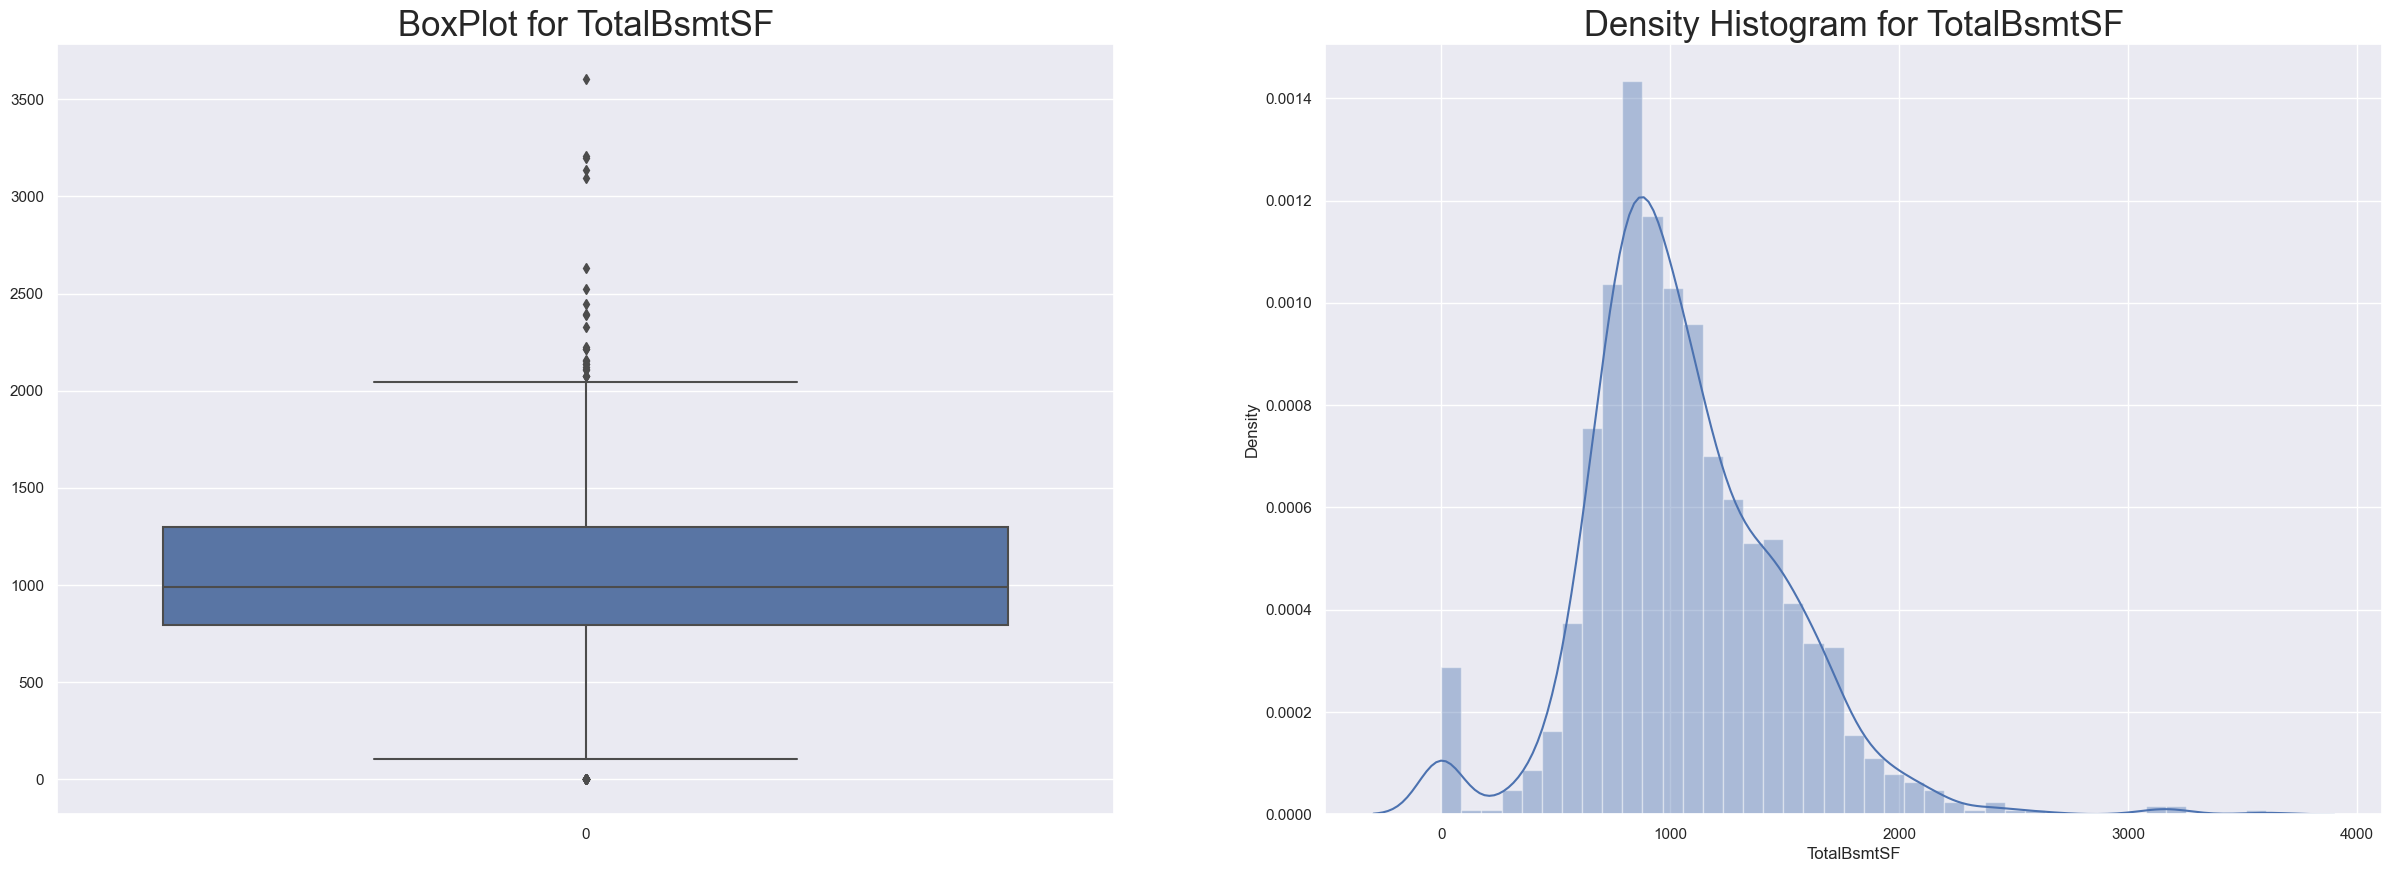

count    1460.000000
mean     1055.712705
std       423.562799
min         0.000000
25%       795.750000
50%       991.500000
75%      1298.250000
max      3603.550000
Name: TotalBsmtSF, dtype: float64

*********************************


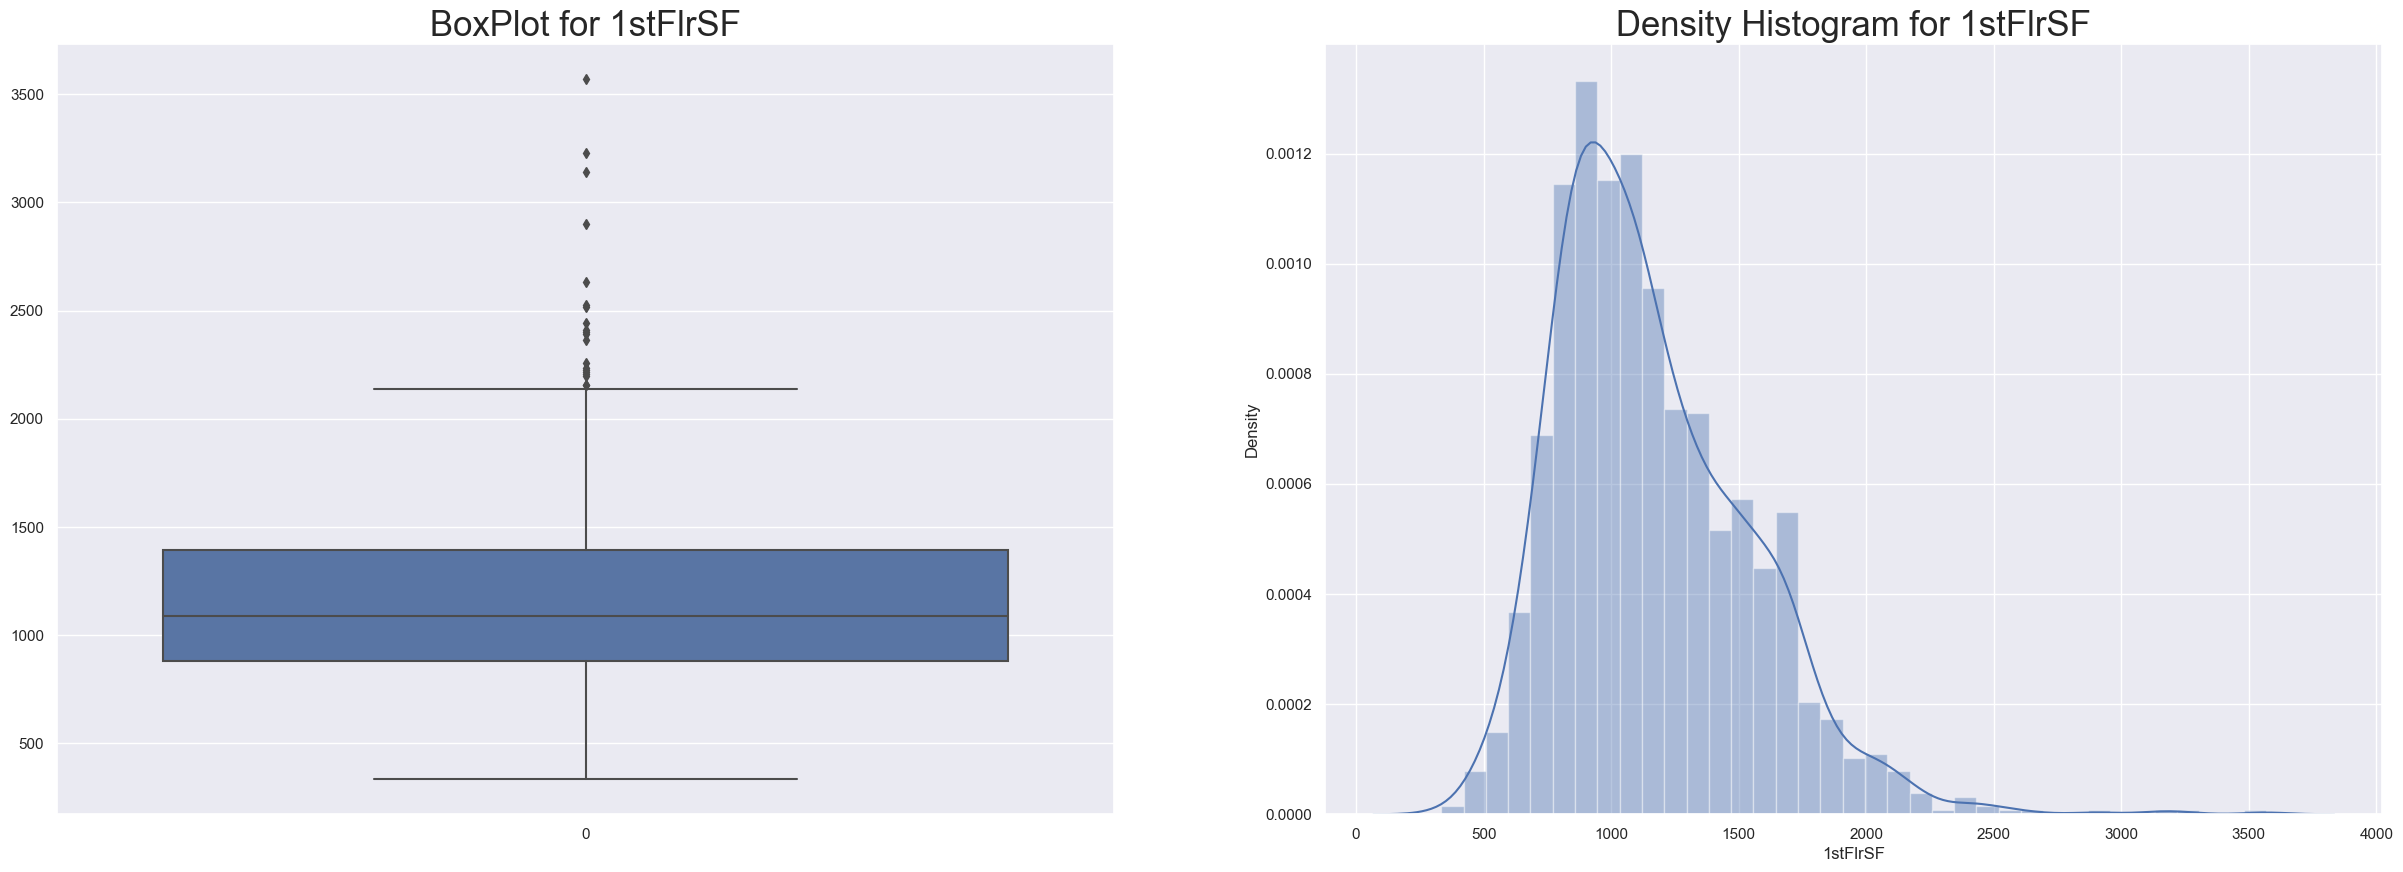

count    1460.000000
mean     1161.857329
std       380.630690
min       334.000000
25%       882.000000
50%      1087.000000
75%      1391.250000
max      3568.700000
Name: 1stFlrSF, dtype: float64

*********************************


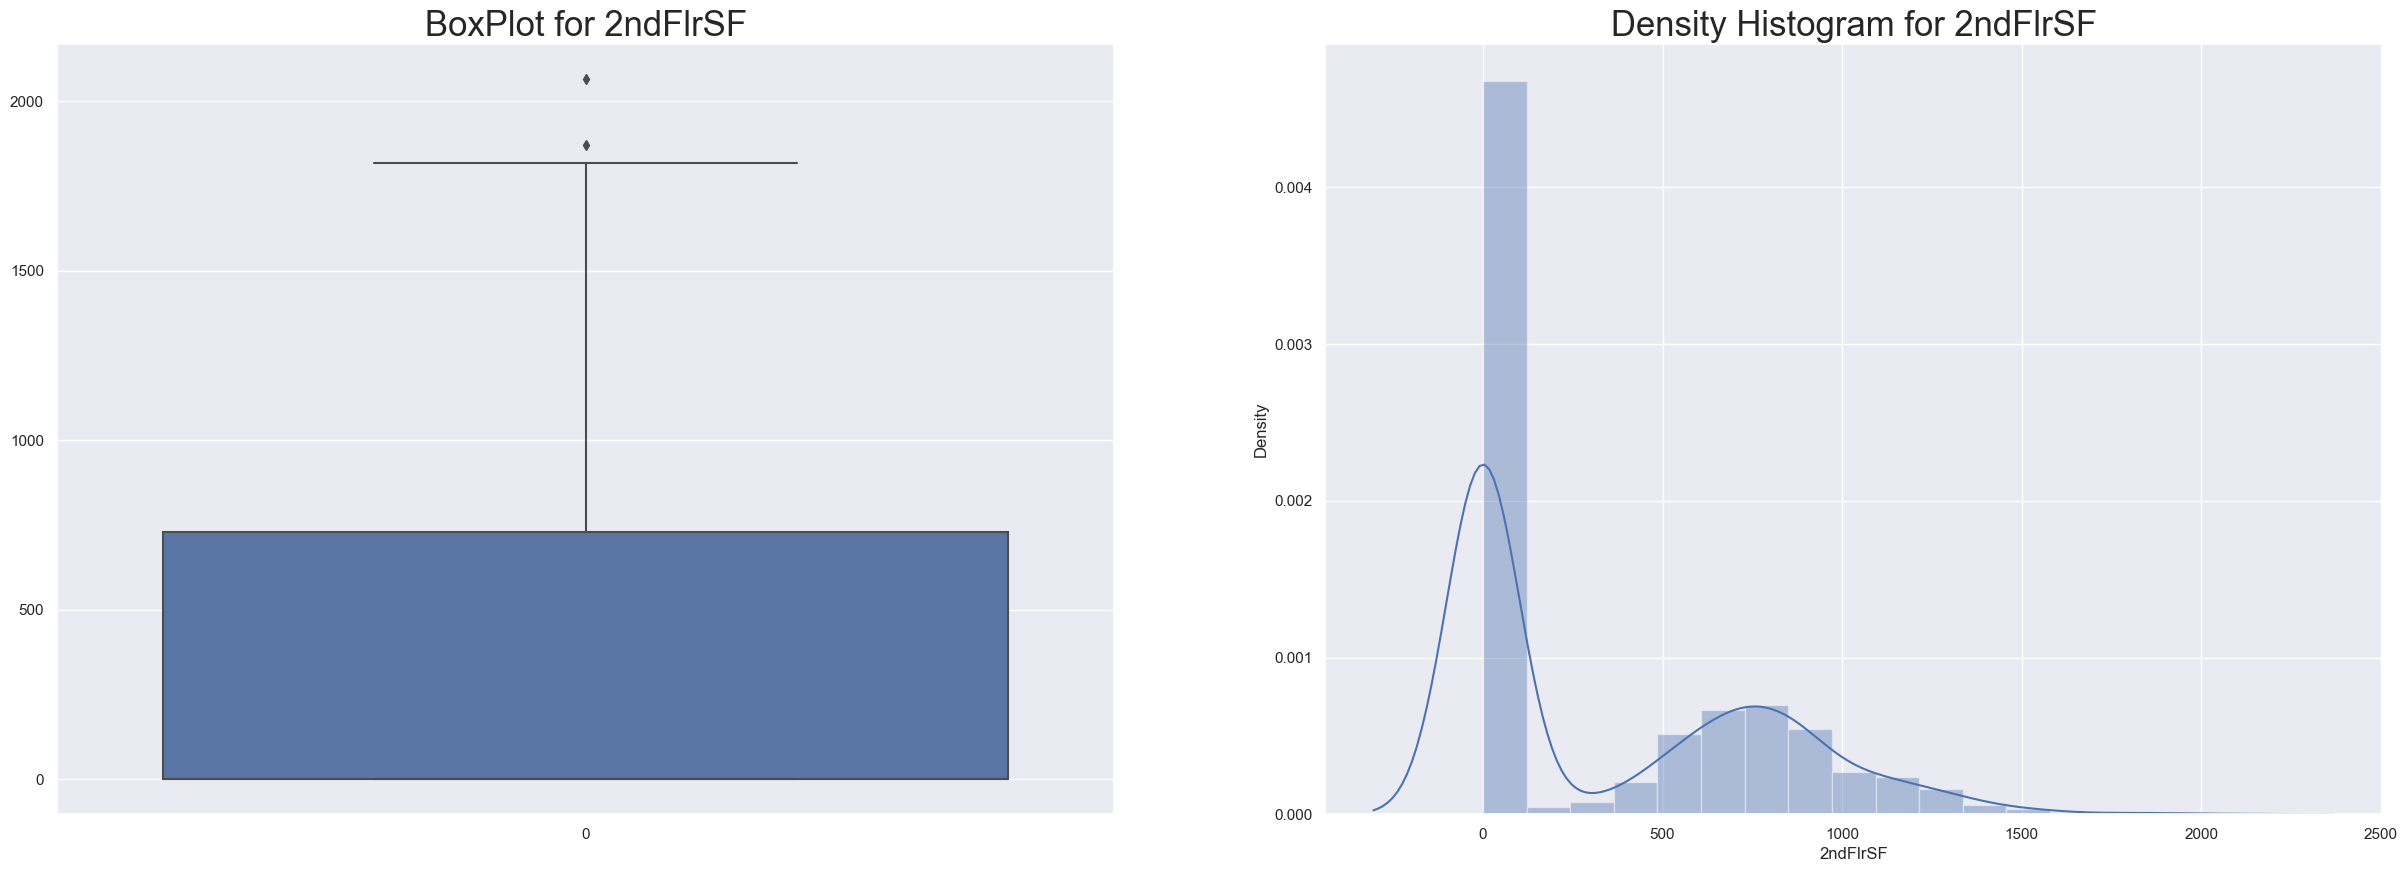

count    1460.000000
mean      346.992466
std       436.528436
min         0.000000
25%         0.000000
50%         0.000000
75%       728.000000
max      2065.000000
Name: 2ndFlrSF, dtype: float64

*********************************


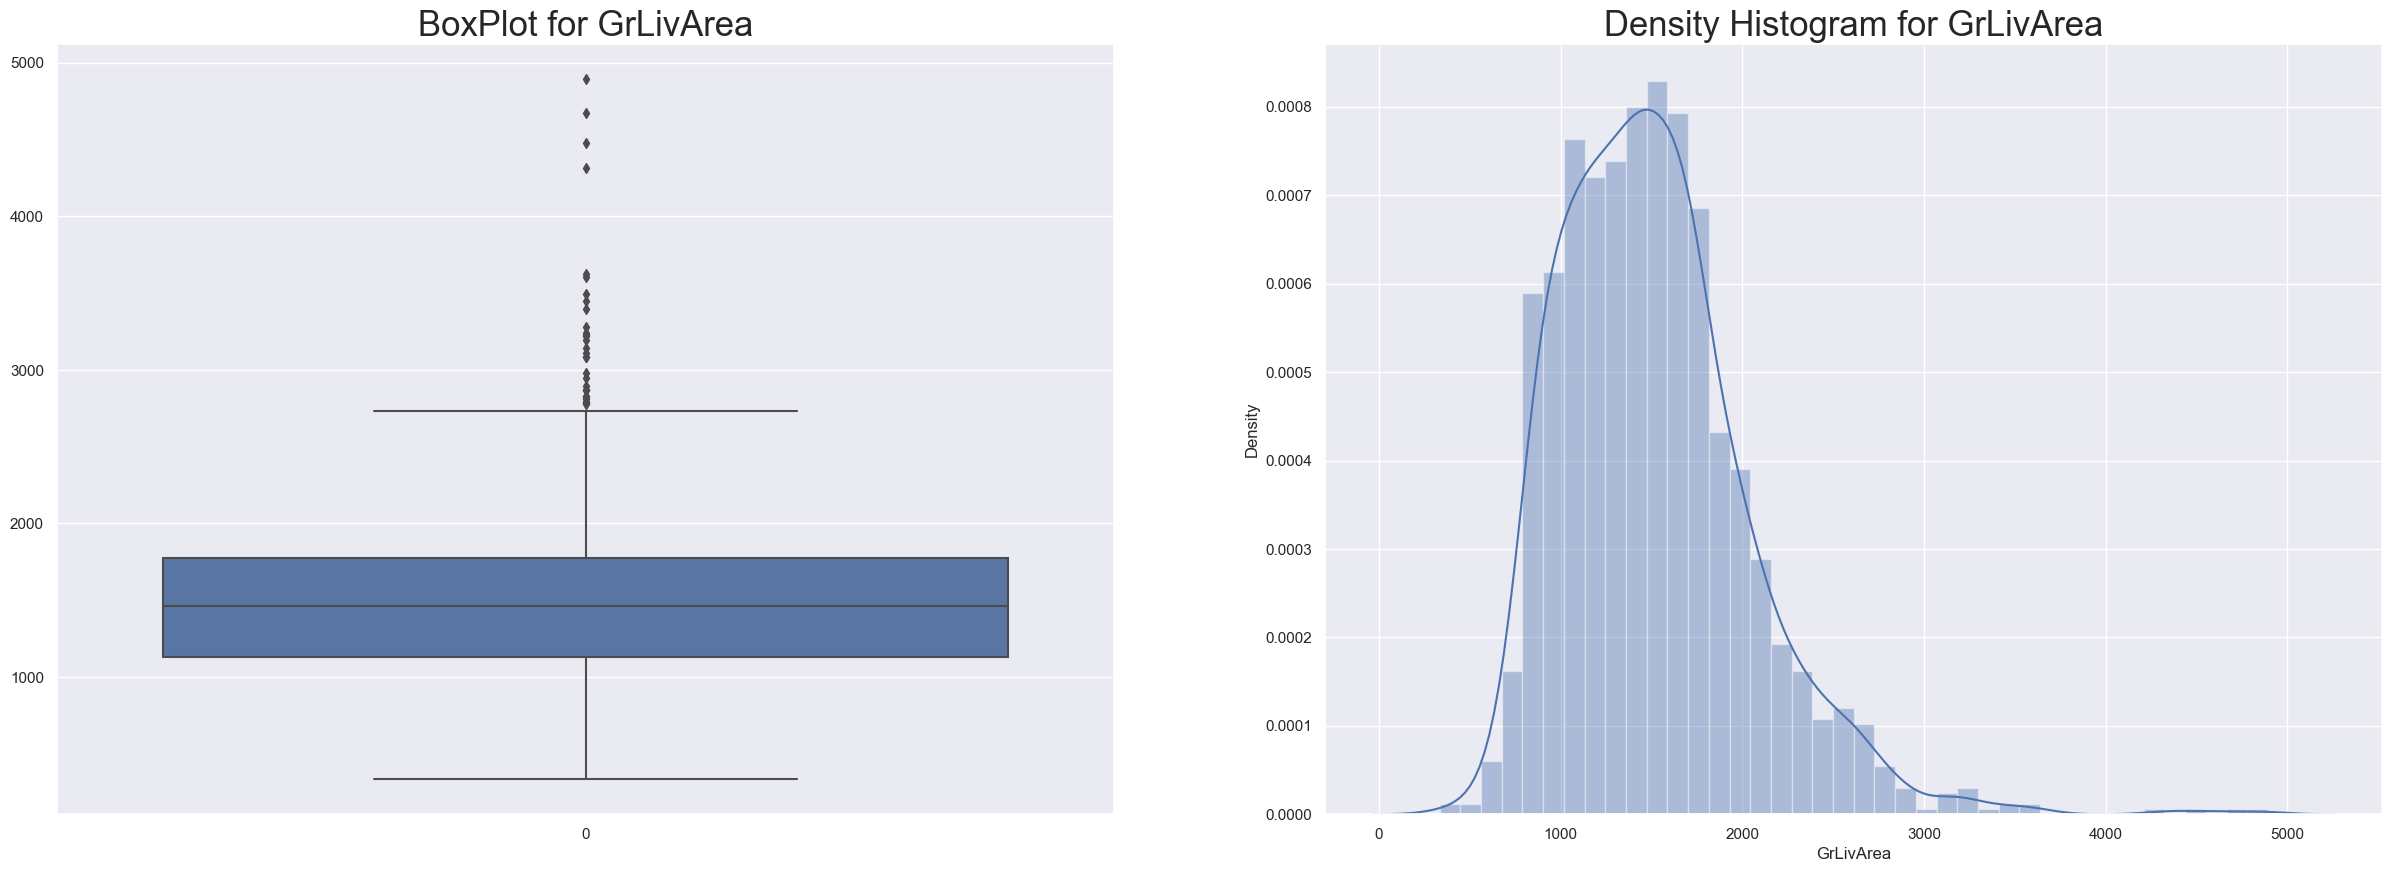

count    1460.000000
mean     1514.950856
std       521.802834
min       334.000000
25%      1129.500000
50%      1464.000000
75%      1776.750000
max      4893.250000
Name: GrLivArea, dtype: float64

*********************************


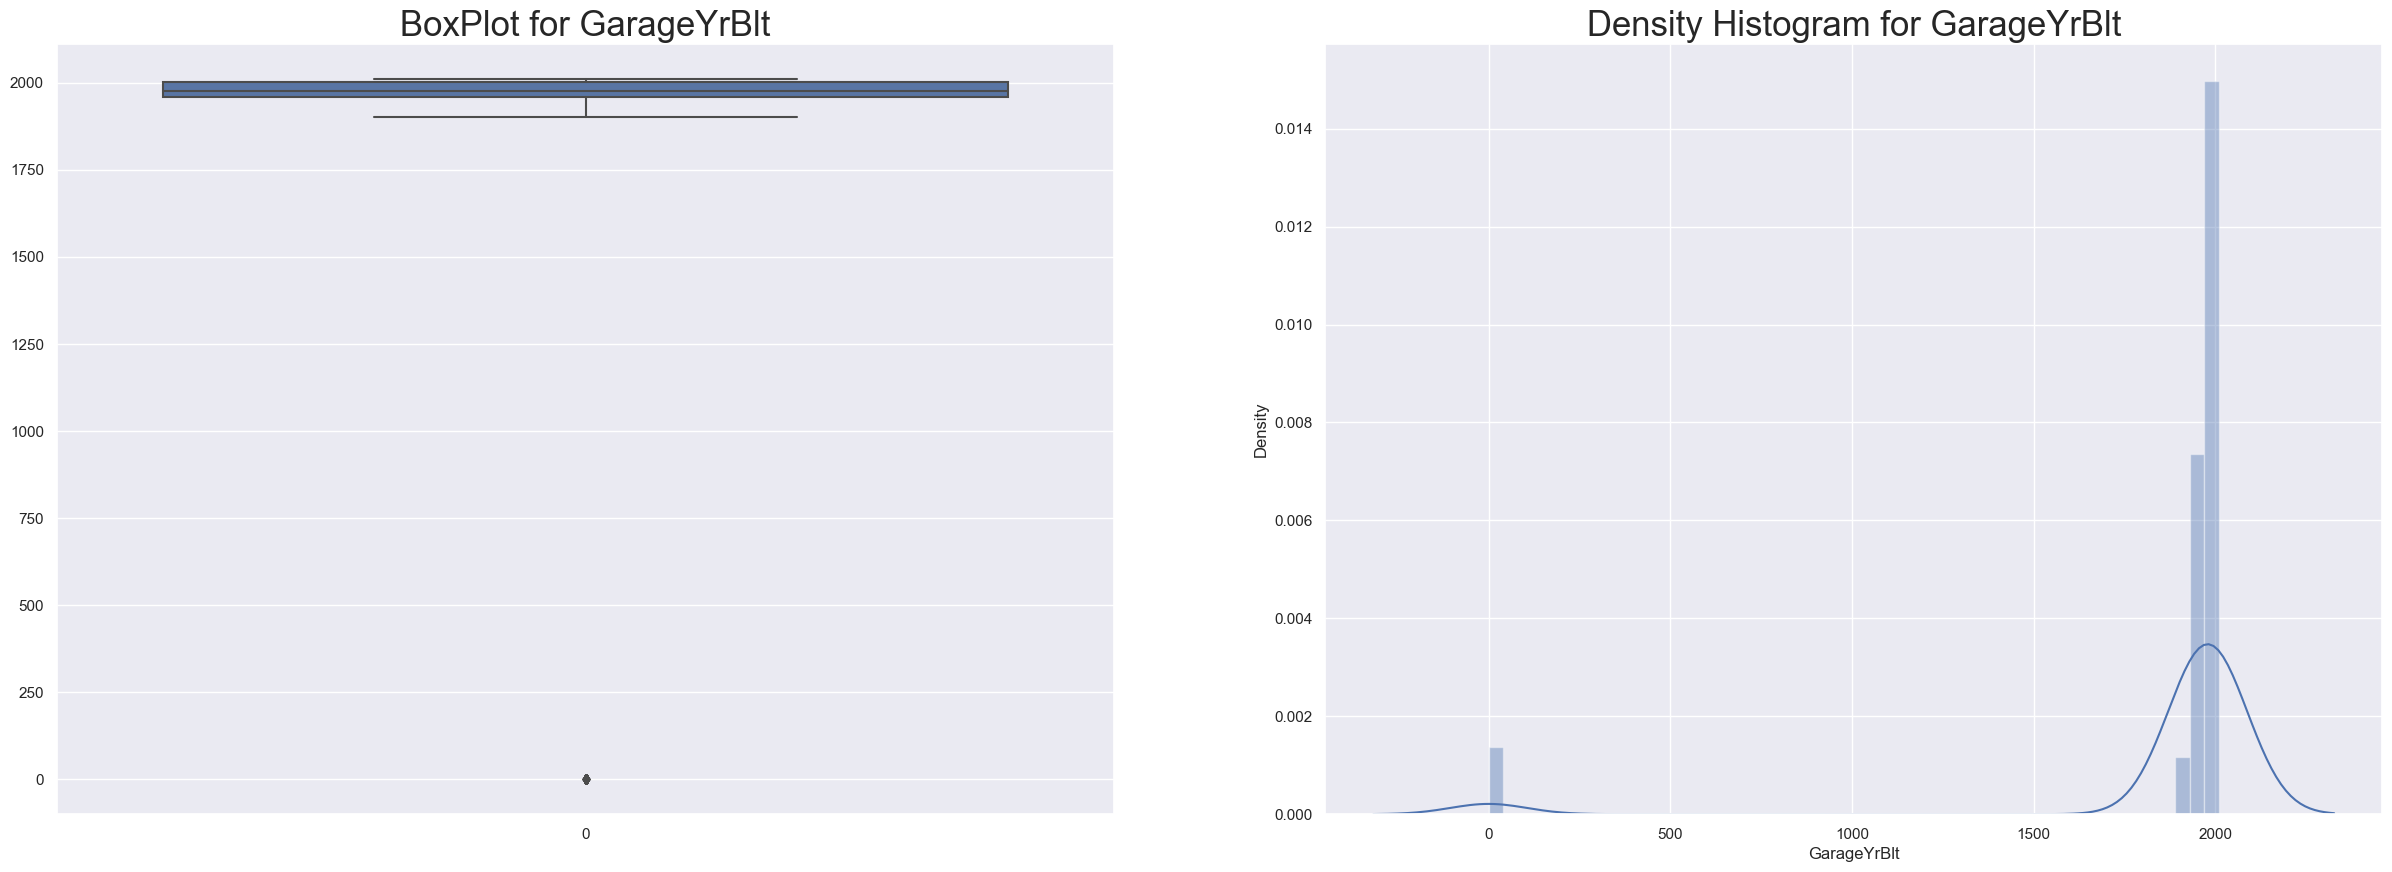

count    1460.000000
mean     1868.739726
std       453.697295
min         0.000000
25%      1958.000000
50%      1977.000000
75%      2001.000000
max      2010.000000
Name: GarageYrBlt, dtype: float64

*********************************


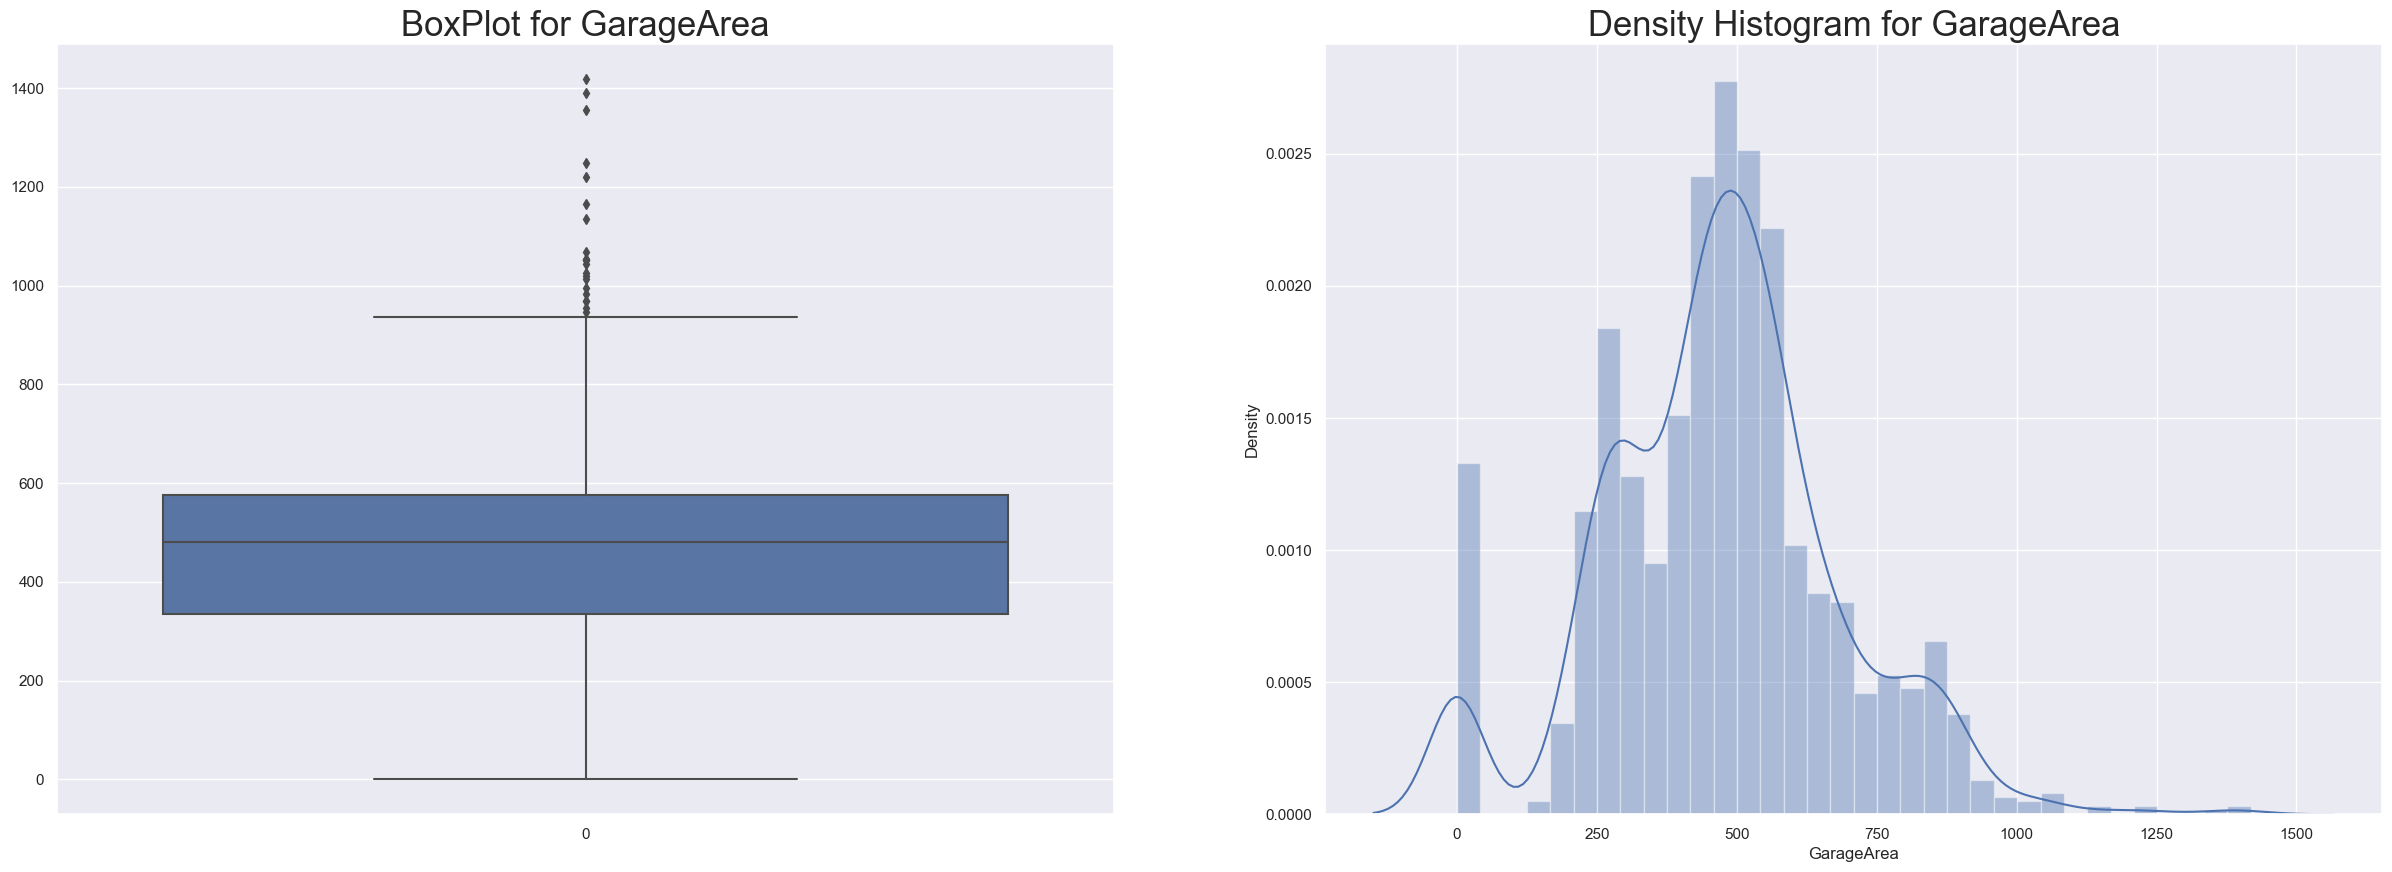

count    1460.000000
mean      472.980137
std       213.804841
min         0.000000
25%       334.500000
50%       480.000000
75%       576.000000
max      1418.000000
Name: GarageArea, dtype: float64

*********************************


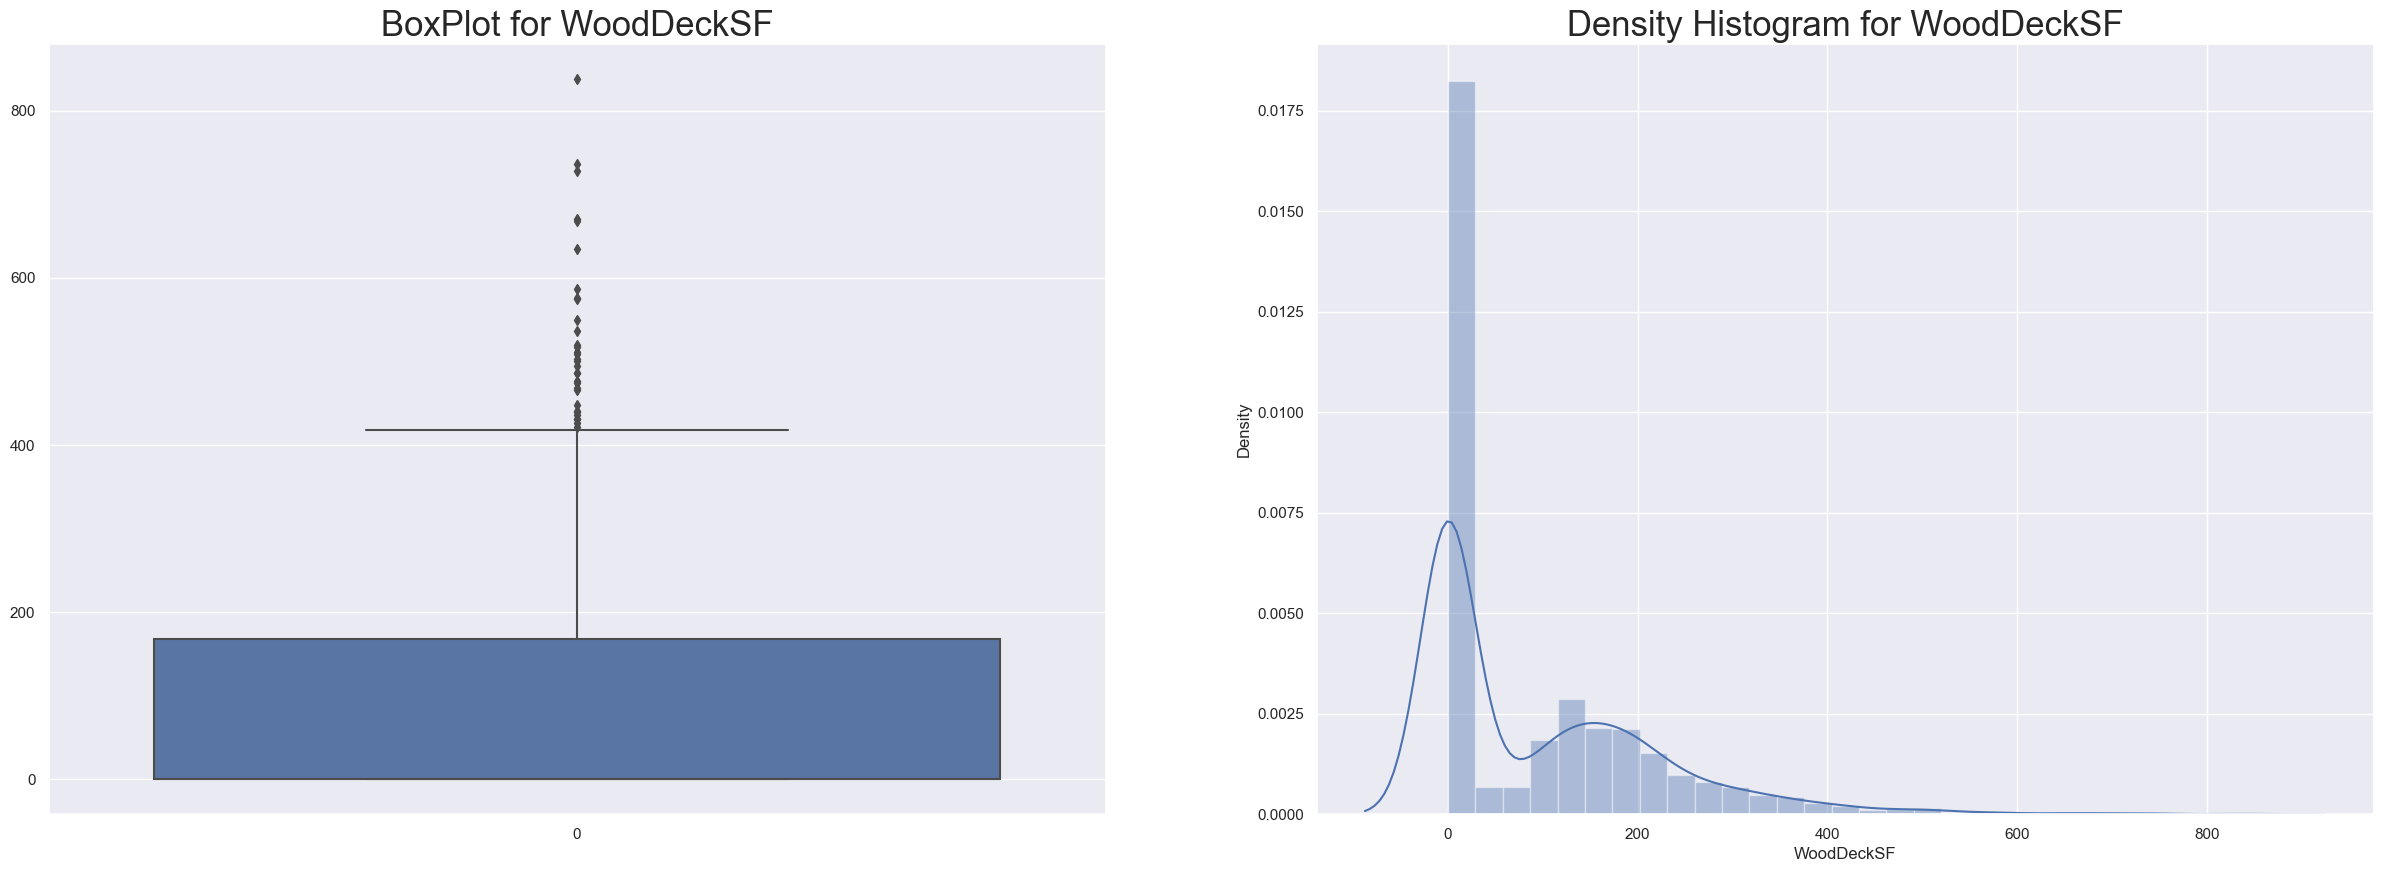

count    1460.000000
mean       94.231164
std       125.258472
min         0.000000
25%         0.000000
50%         0.000000
75%       168.000000
max       837.500000
Name: WoodDeckSF, dtype: float64

*********************************


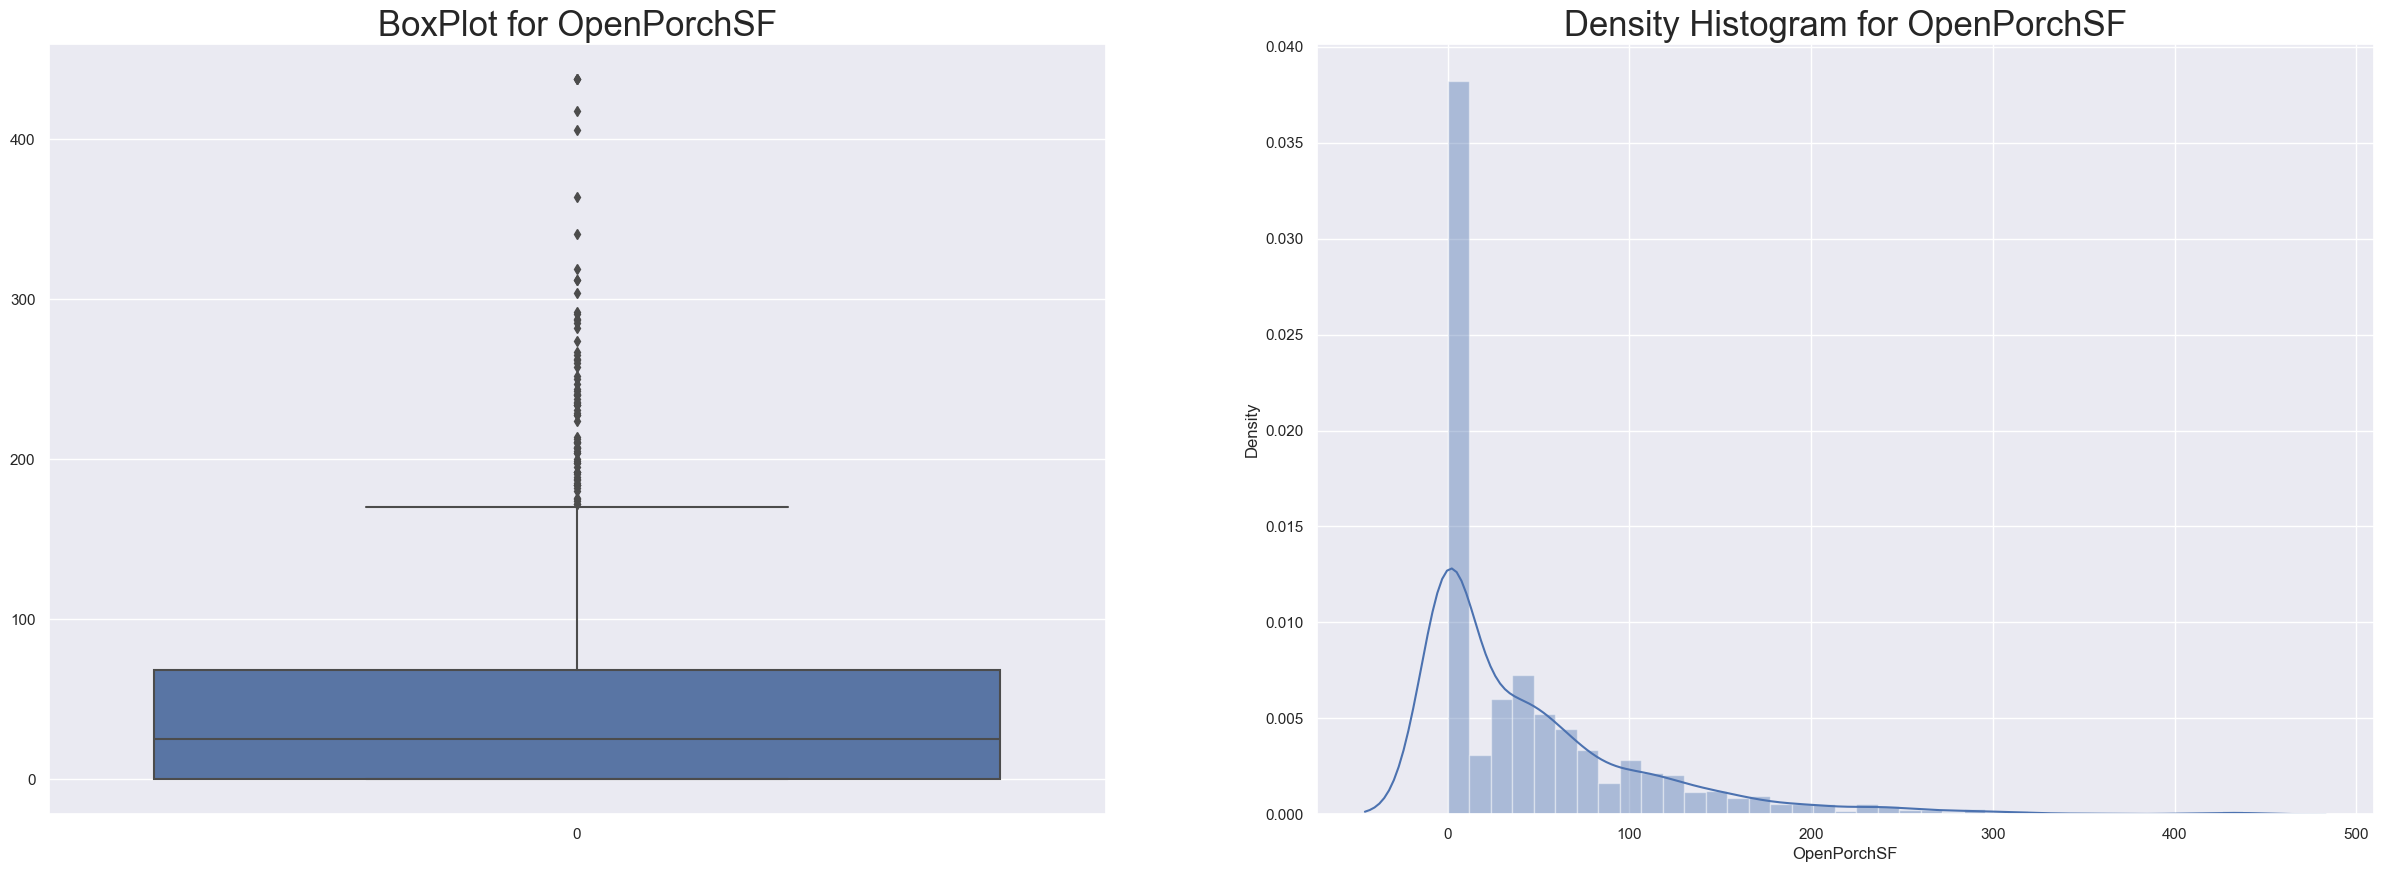

count    1460.000000
mean       46.482791
std        65.076262
min         0.000000
25%         0.000000
50%        25.000000
75%        68.000000
max       437.625000
Name: OpenPorchSF, dtype: float64

*********************************


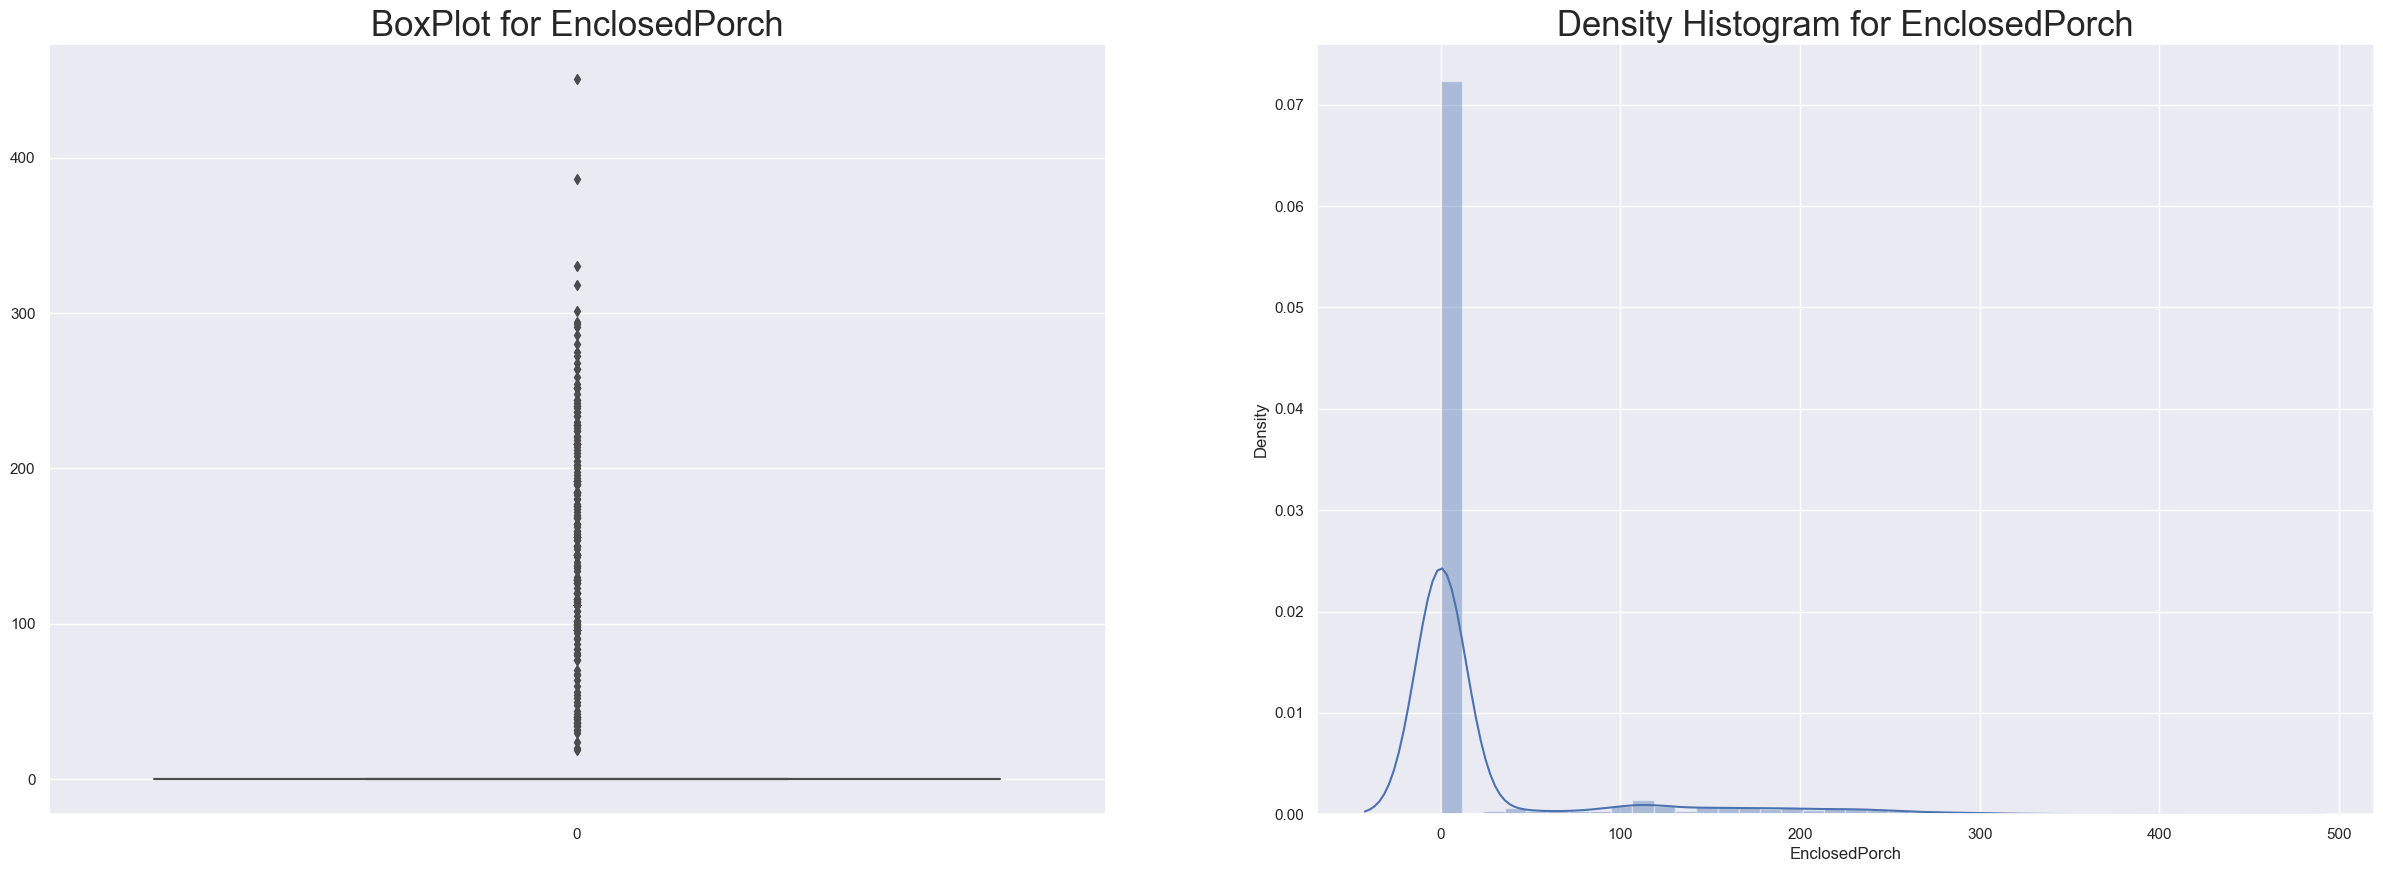

count    1460.000000
mean       21.884503
std        60.570492
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       450.375000
Name: EnclosedPorch, dtype: float64

*********************************


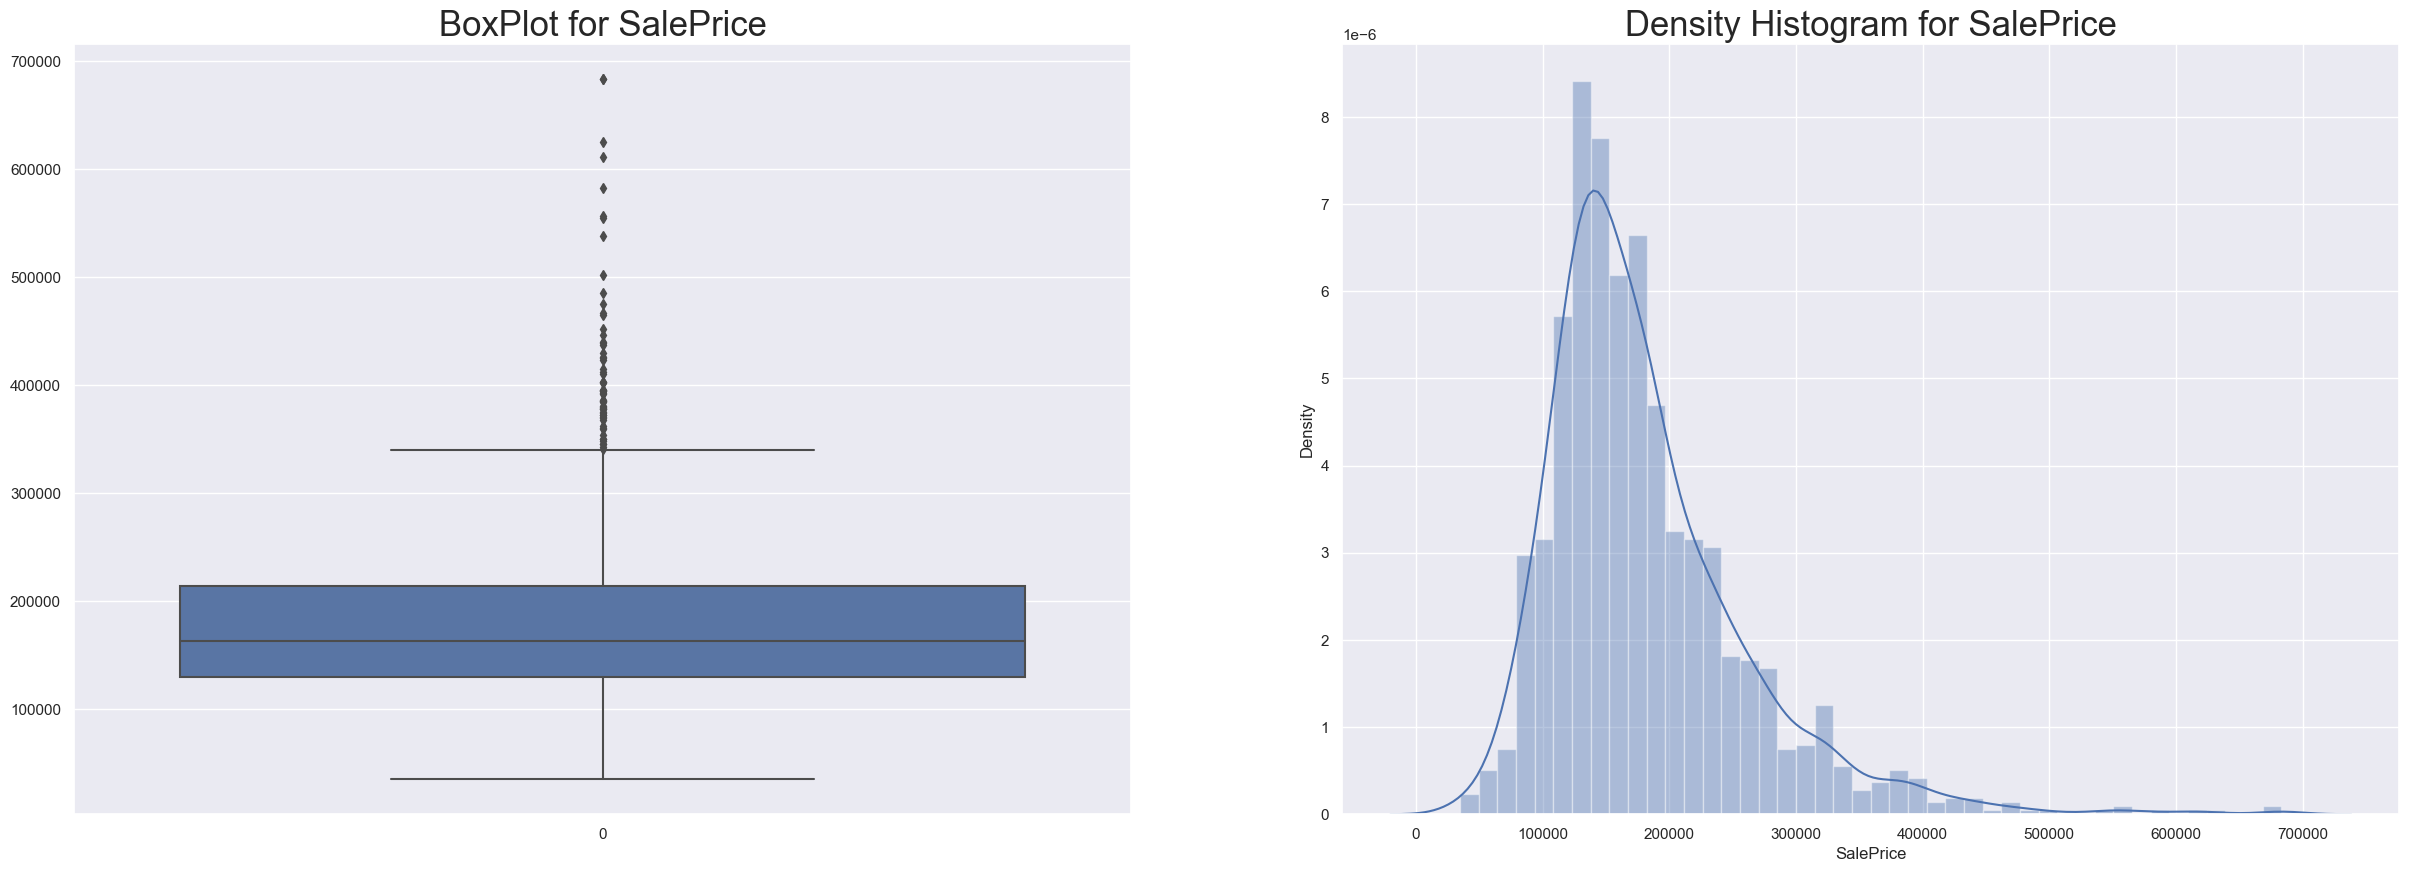

count      1460.000000
mean     180829.757534
std       78822.799556
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      683250.000000
Name: SalePrice, dtype: float64

*********************************


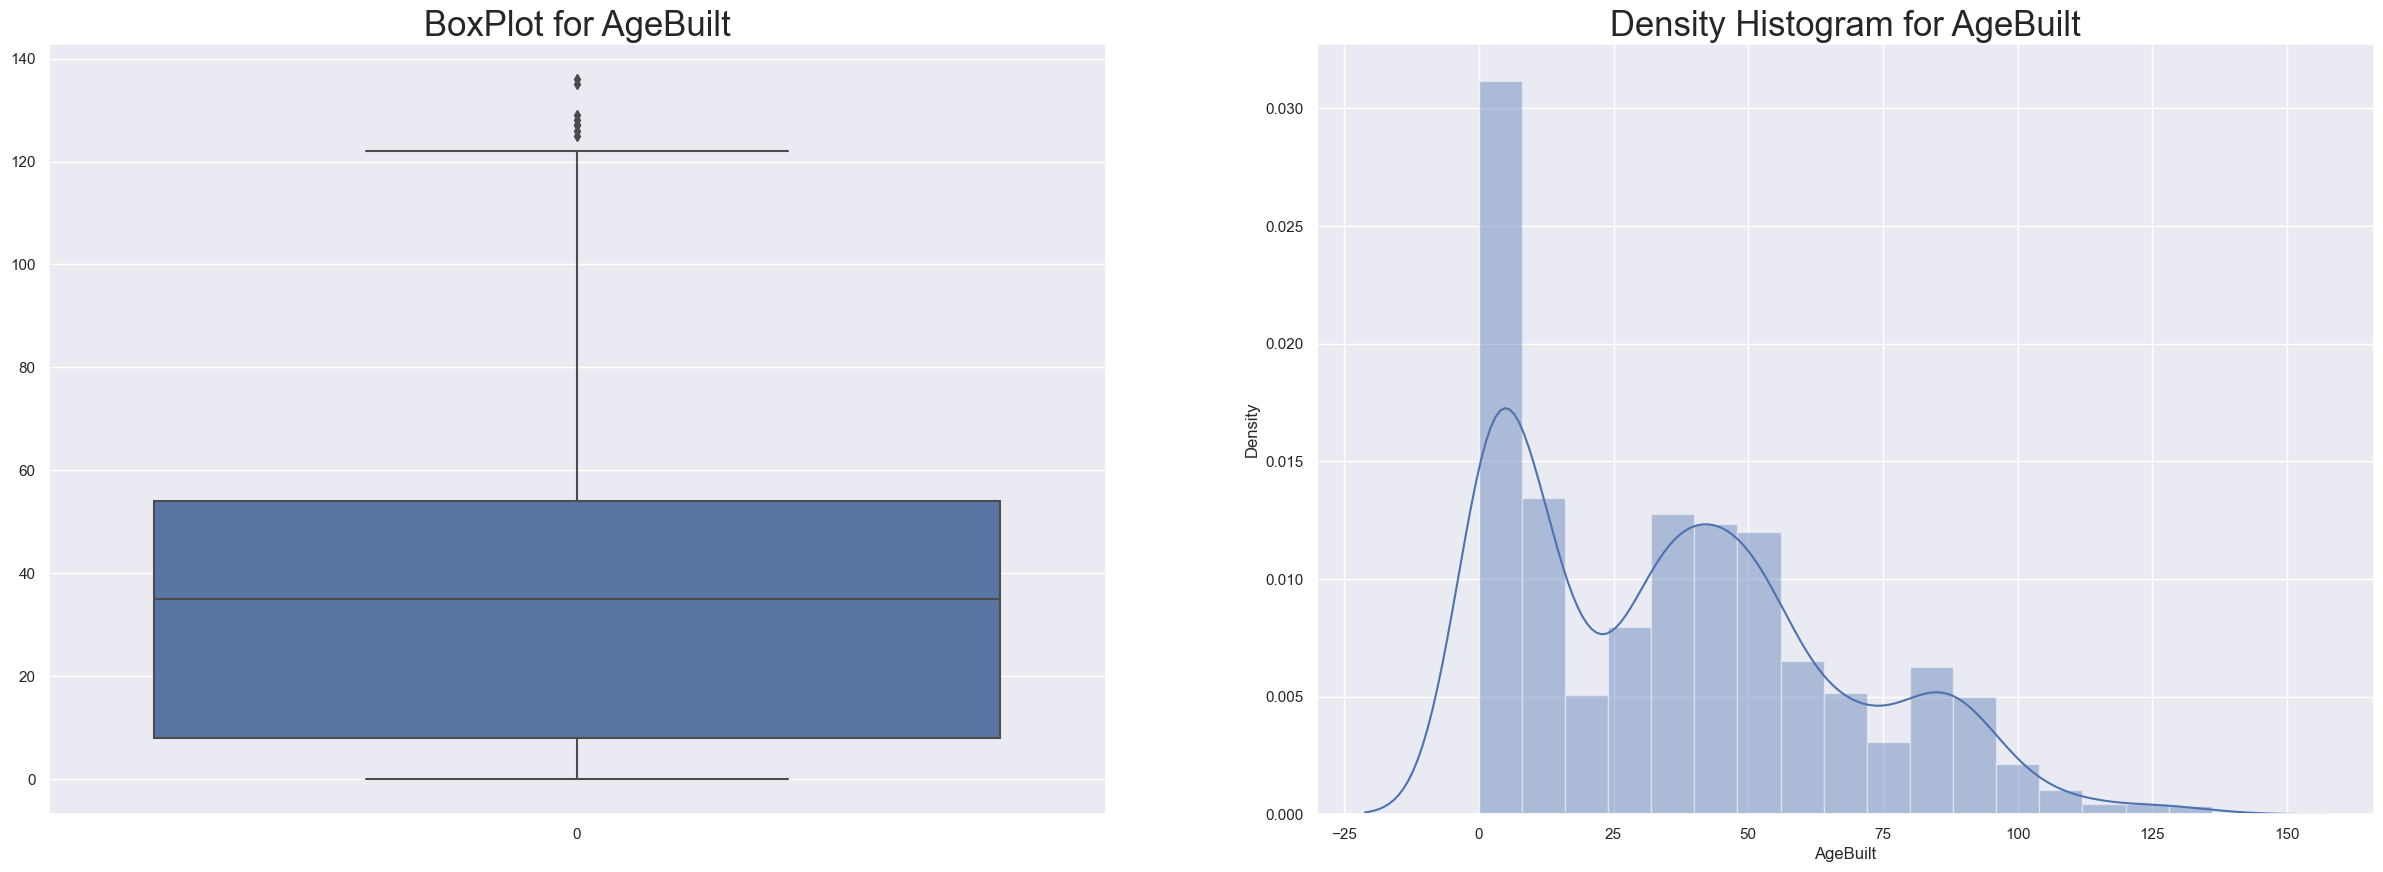

count    1460.000000
mean       36.547945
std        30.250152
min         0.000000
25%         8.000000
50%        35.000000
75%        54.000000
max       136.000000
Name: AgeBuilt, dtype: float64

*********************************


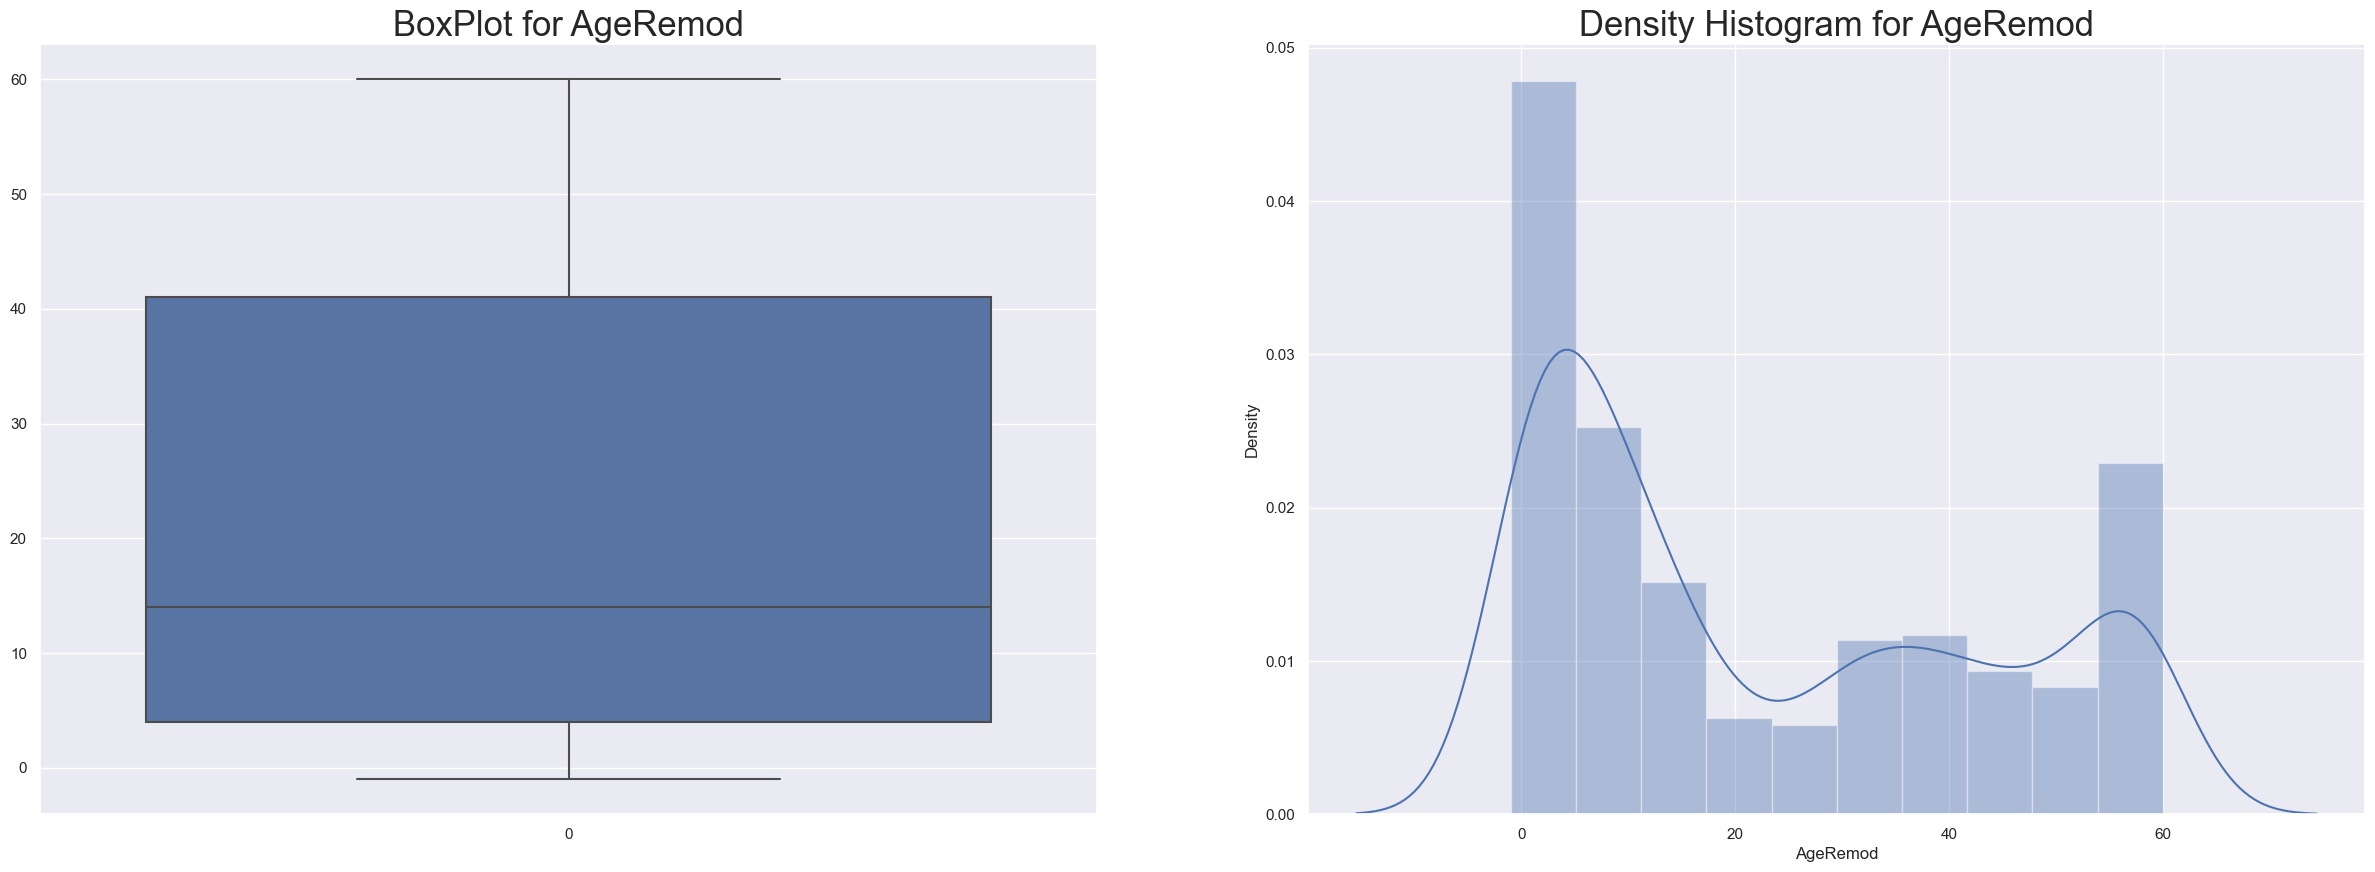

count    1460.000000
mean       22.950000
std        20.640653
min        -1.000000
25%         4.000000
50%        14.000000
75%        41.000000
max        60.000000
Name: AgeRemod, dtype: float64

*********************************


In [44]:
for col in continuous:
    boxplot_and_dist(housing_df,col)

In [45]:
def countplot_cnt(df,col):
    plt.figure(figsize=(15,5))
    sns.countplot(x = df[col], data = df, order=df[col].value_counts().index, palette = "Set2")
    plt.title(col, fontsize = 15)
    plt.xticks(rotation=90)
    plt.show()
    print(df[col].value_counts())
    print("*********************************")

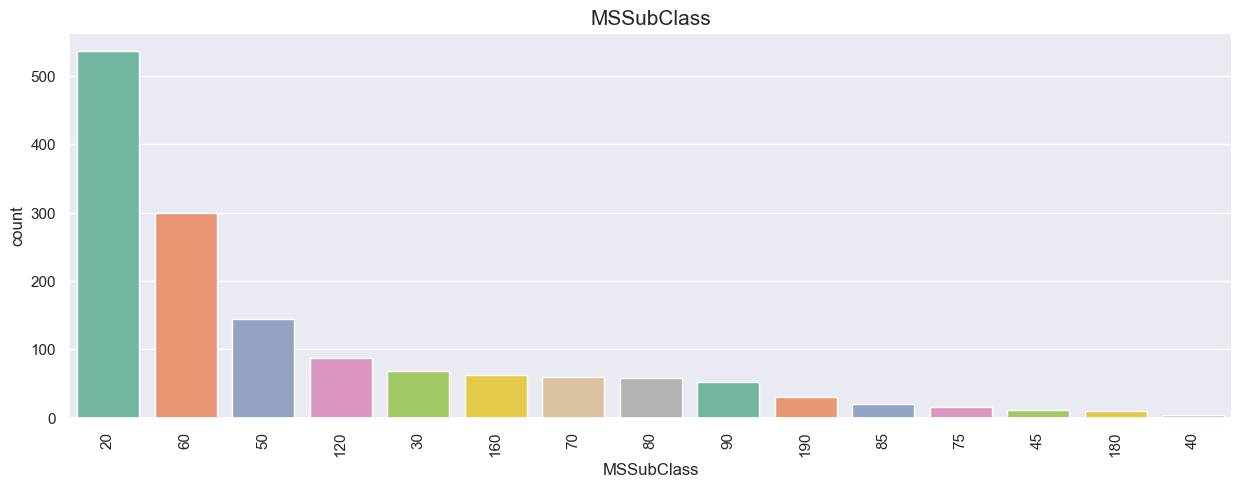

20     536
60     299
50     144
120     87
30      69
160     63
70      60
80      58
90      52
190     30
85      20
75      16
45      12
180     10
40       4
Name: MSSubClass, dtype: int64
*********************************


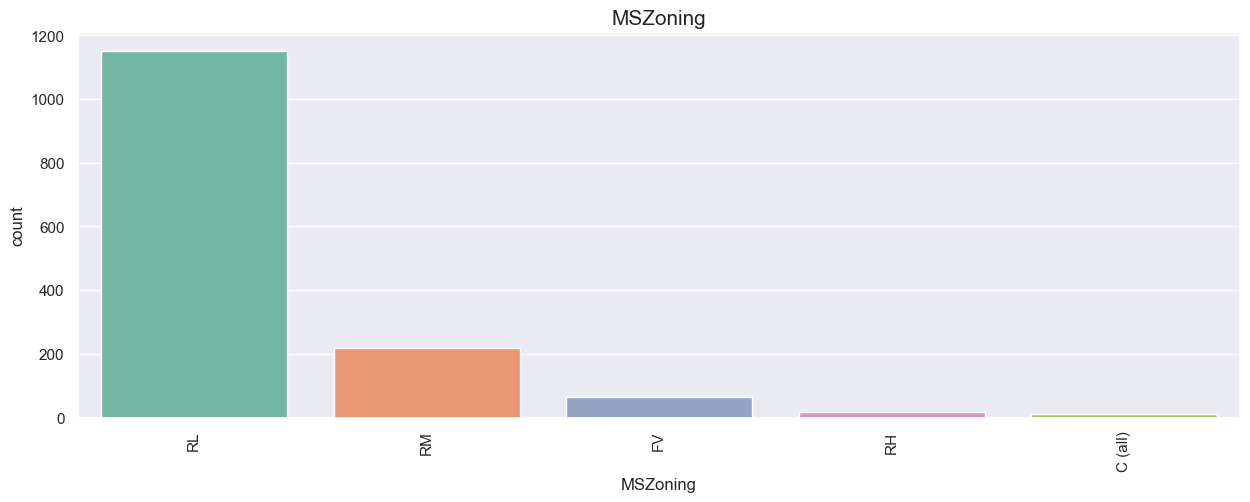

RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64
*********************************


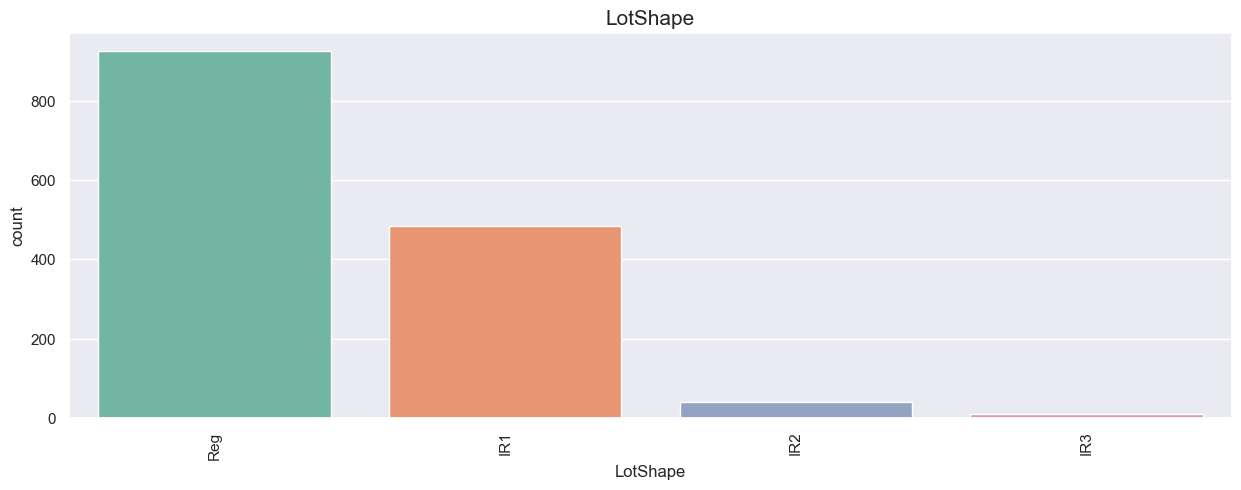

Reg    925
IR1    484
IR2     41
IR3     10
Name: LotShape, dtype: int64
*********************************


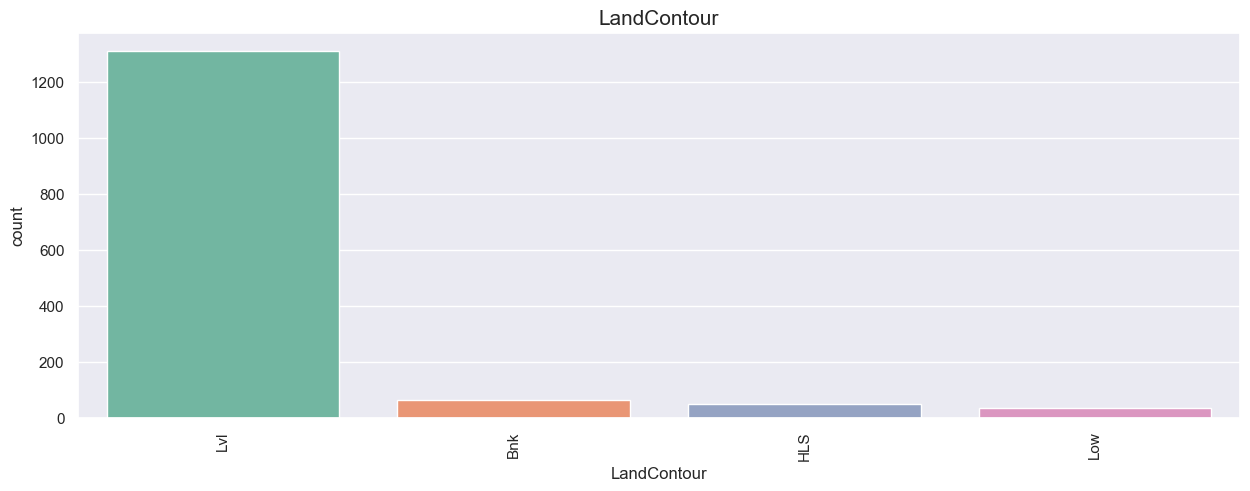

Lvl    1311
Bnk      63
HLS      50
Low      36
Name: LandContour, dtype: int64
*********************************


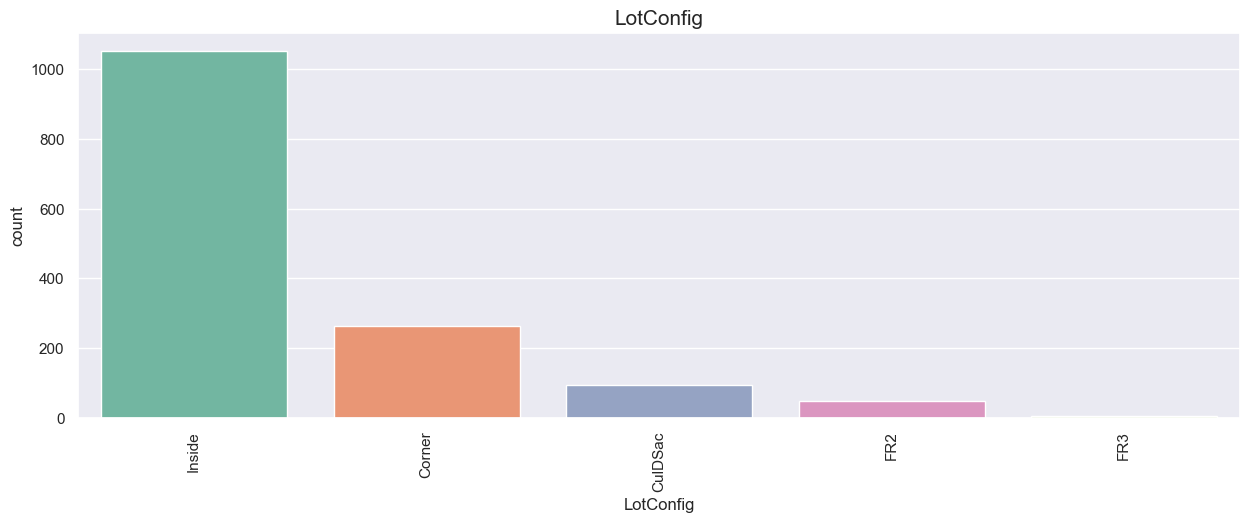

Inside     1052
Corner      263
CulDSac      94
FR2          47
FR3           4
Name: LotConfig, dtype: int64
*********************************


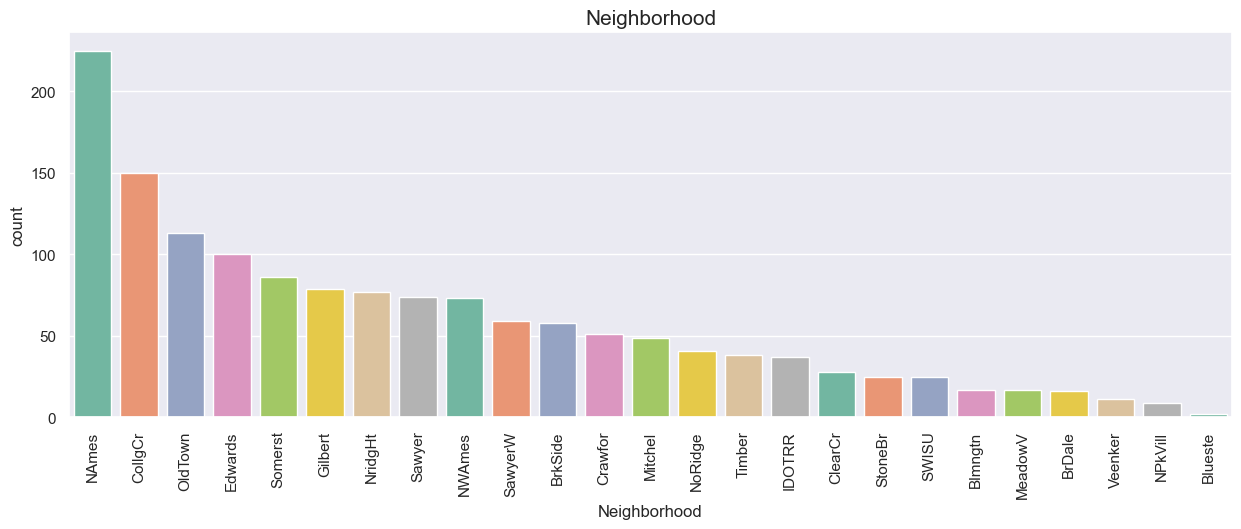

NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
ClearCr     28
StoneBr     25
SWISU       25
Blmngtn     17
MeadowV     17
BrDale      16
Veenker     11
NPkVill      9
Blueste      2
Name: Neighborhood, dtype: int64
*********************************


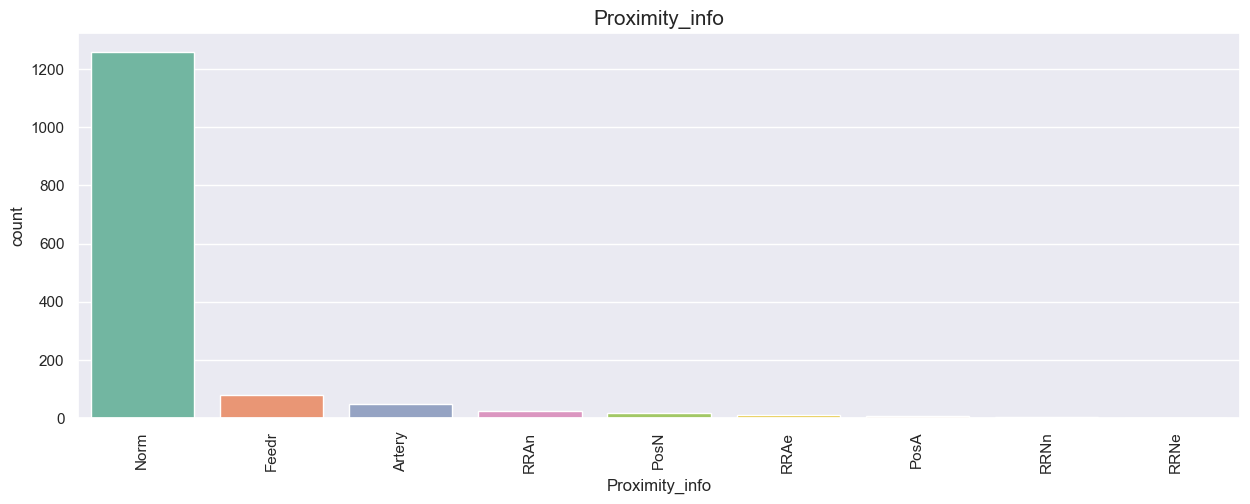

Norm      1260
Feedr       81
Artery      48
RRAn        26
PosN        19
RRAe        11
PosA         8
RRNn         5
RRNe         2
Name: Proximity_info, dtype: int64
*********************************


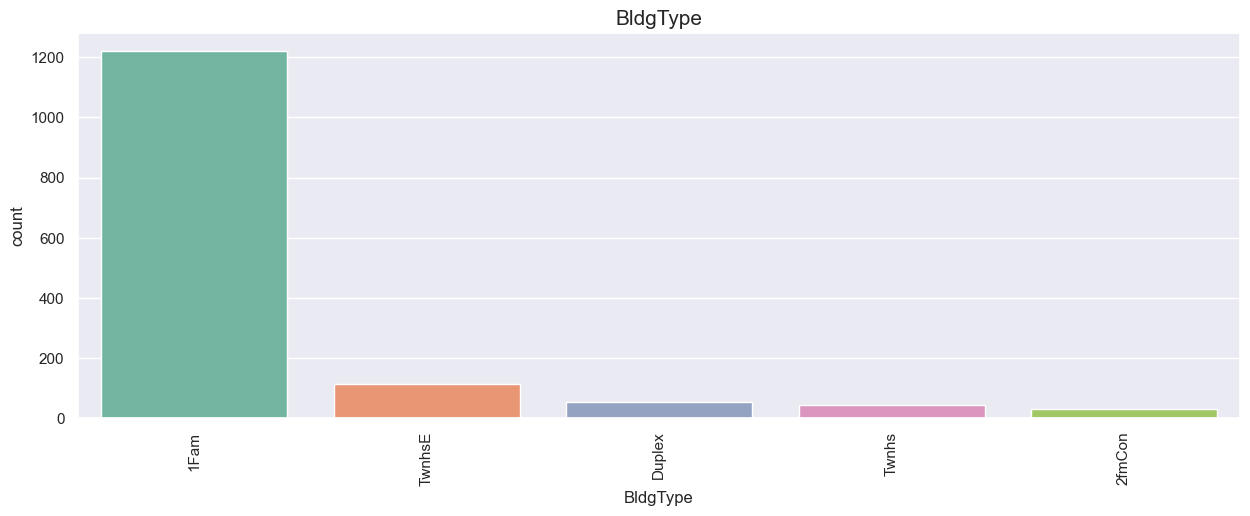

1Fam      1220
TwnhsE     114
Duplex      52
Twnhs       43
2fmCon      31
Name: BldgType, dtype: int64
*********************************


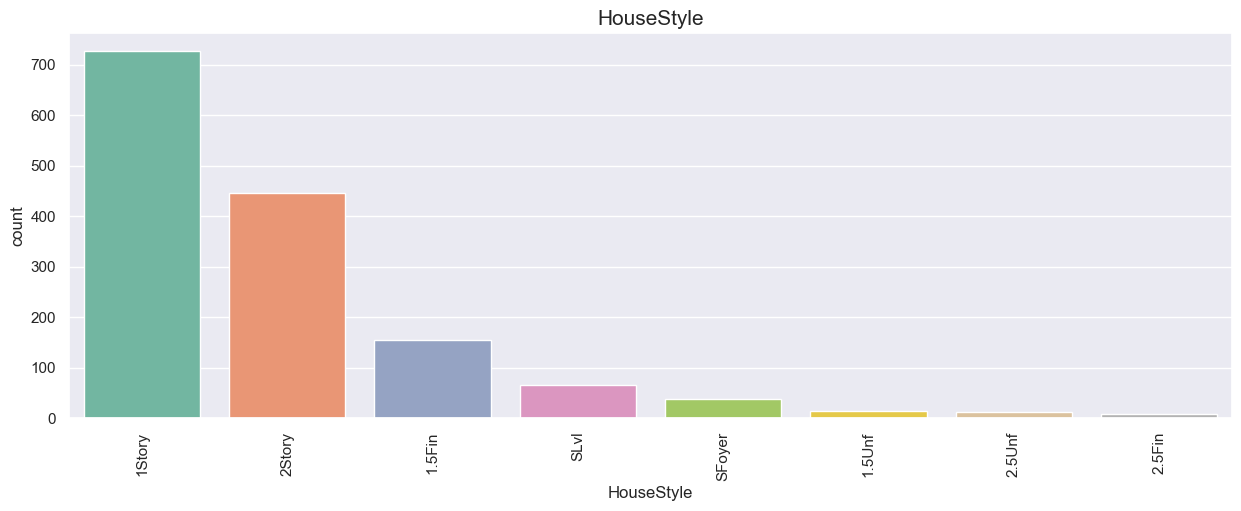

1Story    726
2Story    445
1.5Fin    154
SLvl       65
SFoyer     37
1.5Unf     14
2.5Unf     11
2.5Fin      8
Name: HouseStyle, dtype: int64
*********************************


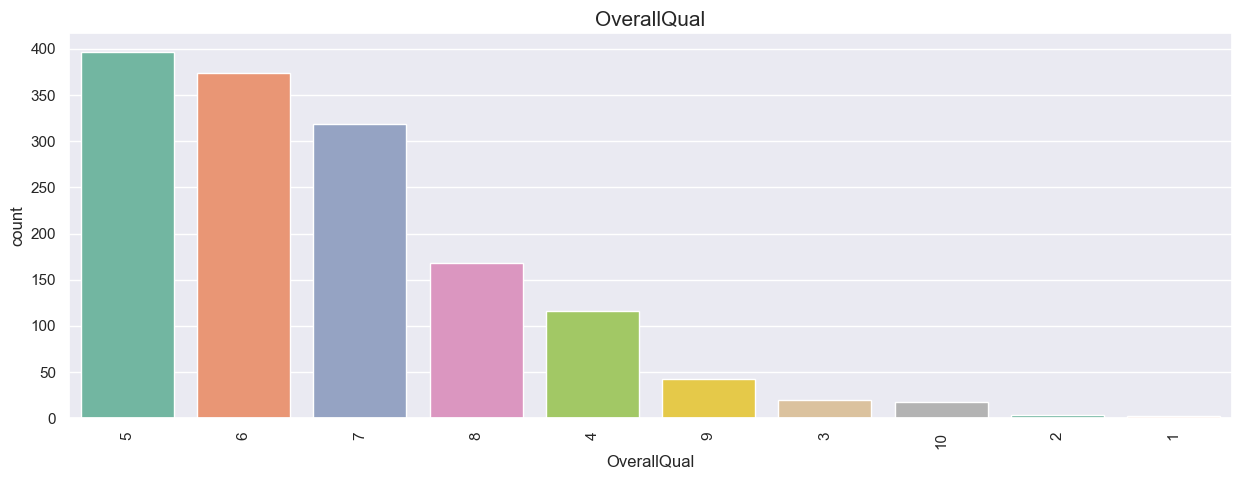

5     397
6     374
7     319
8     168
4     116
9      43
3      20
10     18
2       3
1       2
Name: OverallQual, dtype: int64
*********************************


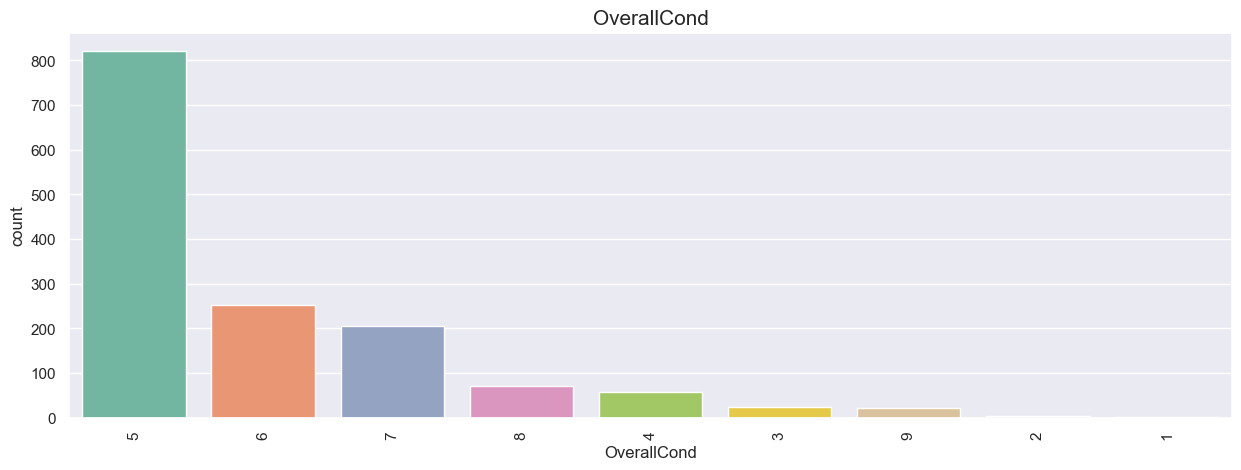

5    821
6    252
7    205
8     72
4     57
3     25
9     22
2      5
1      1
Name: OverallCond, dtype: int64
*********************************


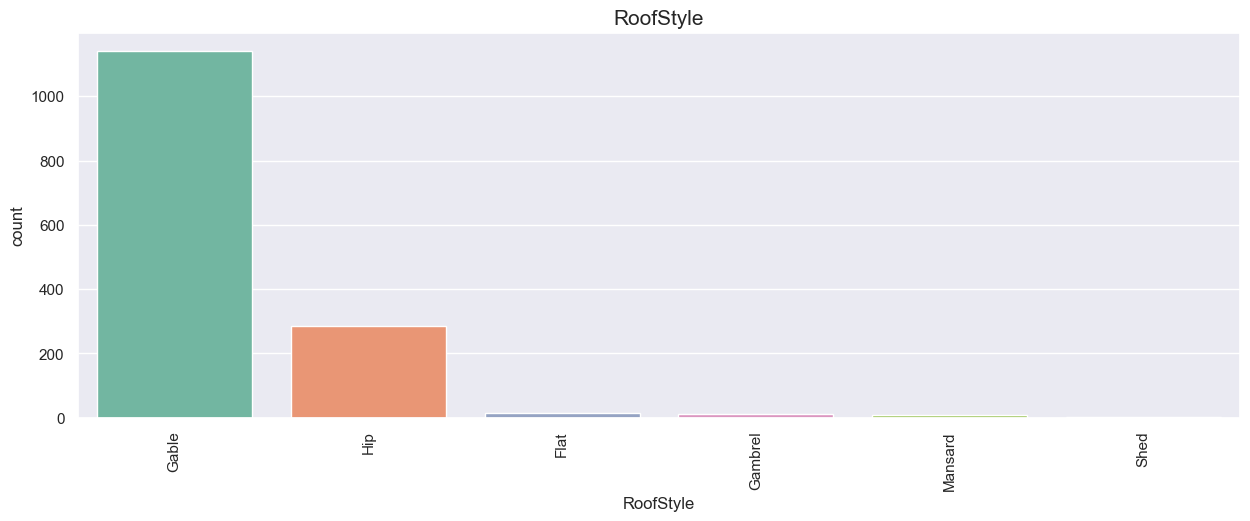

Gable      1141
Hip         286
Flat         13
Gambrel      11
Mansard       7
Shed          2
Name: RoofStyle, dtype: int64
*********************************


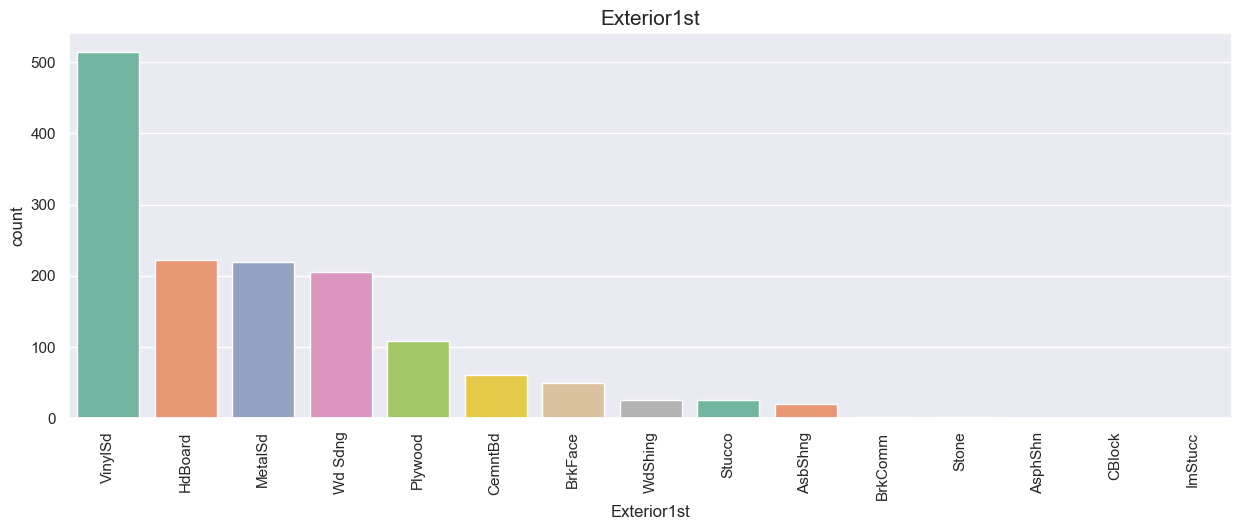

VinylSd    515
HdBoard    222
MetalSd    220
Wd Sdng    206
Plywood    108
CemntBd     61
BrkFace     50
WdShing     26
Stucco      25
AsbShng     20
BrkComm      2
Stone        2
AsphShn      1
CBlock       1
ImStucc      1
Name: Exterior1st, dtype: int64
*********************************


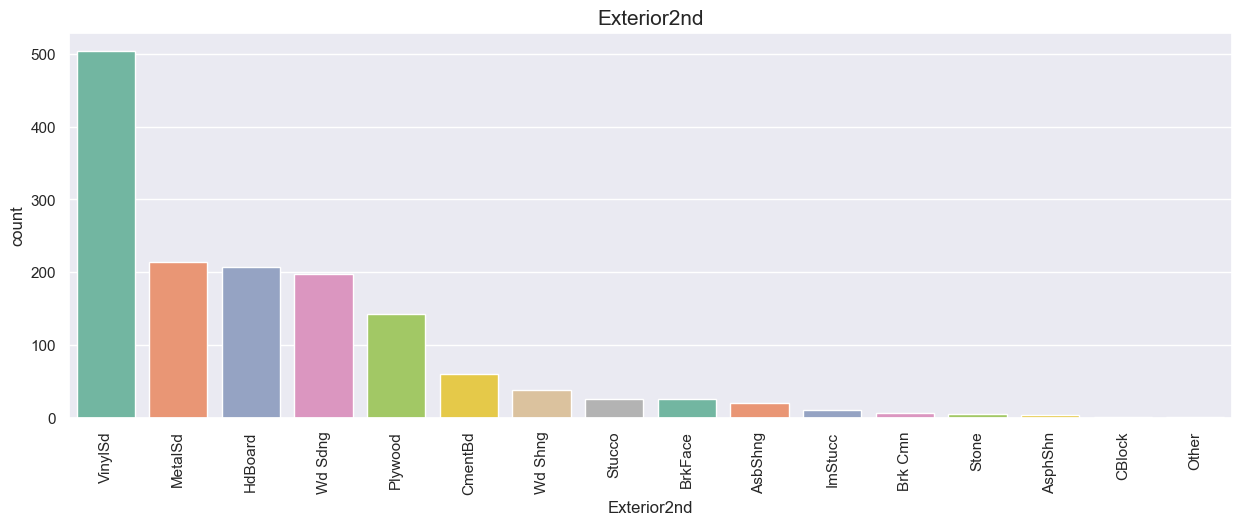

VinylSd    504
MetalSd    214
HdBoard    207
Wd Sdng    197
Plywood    142
CmentBd     60
Wd Shng     38
Stucco      26
BrkFace     25
AsbShng     20
ImStucc     10
Brk Cmn      7
Stone        5
AsphShn      3
CBlock       1
Other        1
Name: Exterior2nd, dtype: int64
*********************************


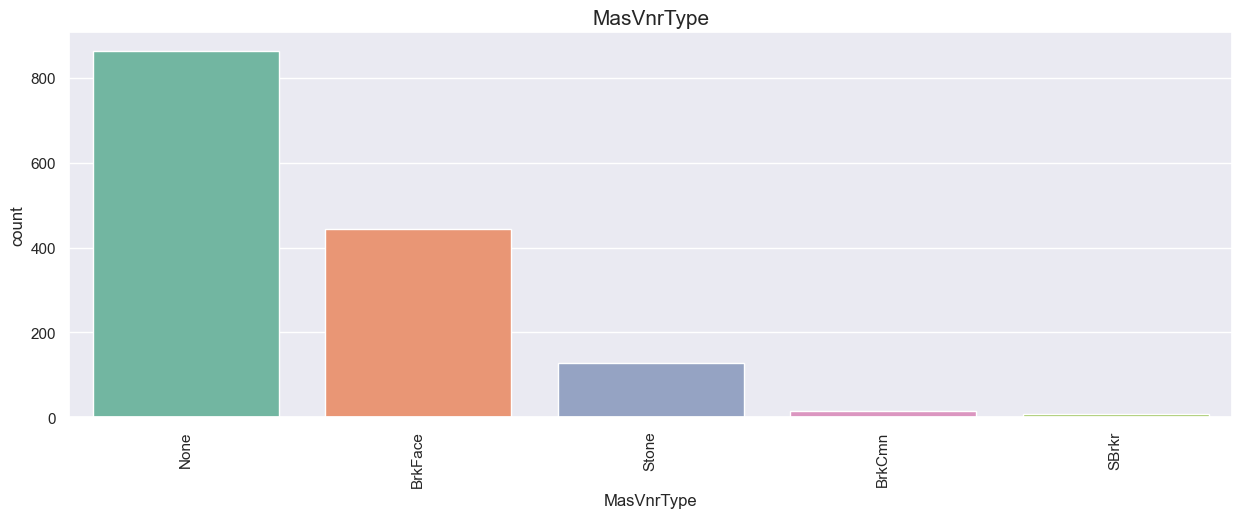

None       864
BrkFace    445
Stone      128
BrkCmn      15
SBrkr        8
Name: MasVnrType, dtype: int64
*********************************


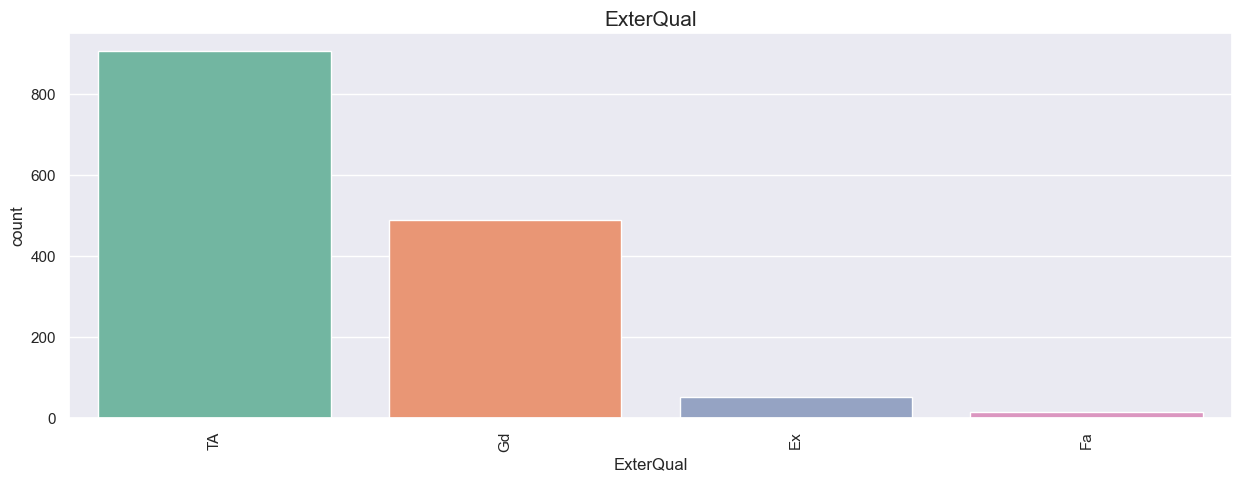

TA    906
Gd    488
Ex     52
Fa     14
Name: ExterQual, dtype: int64
*********************************


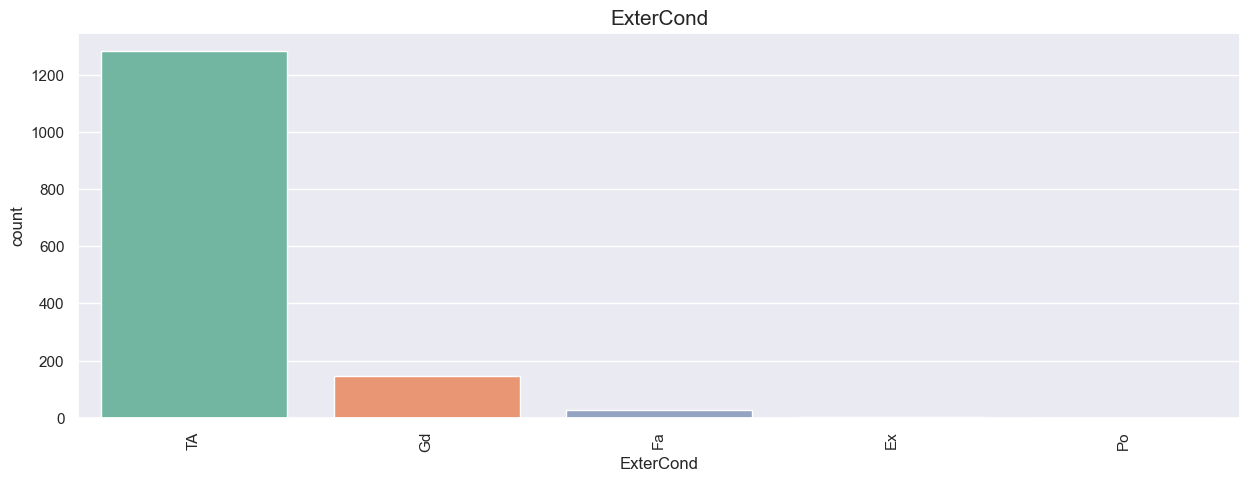

TA    1282
Gd     146
Fa      28
Ex       3
Po       1
Name: ExterCond, dtype: int64
*********************************


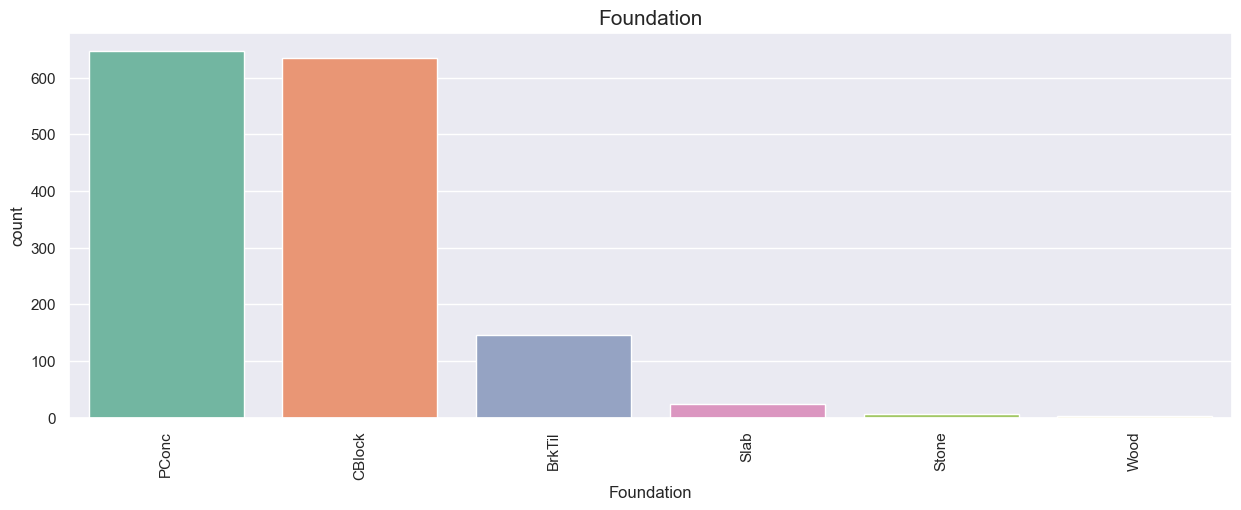

PConc     647
CBlock    634
BrkTil    146
Slab       24
Stone       6
Wood        3
Name: Foundation, dtype: int64
*********************************


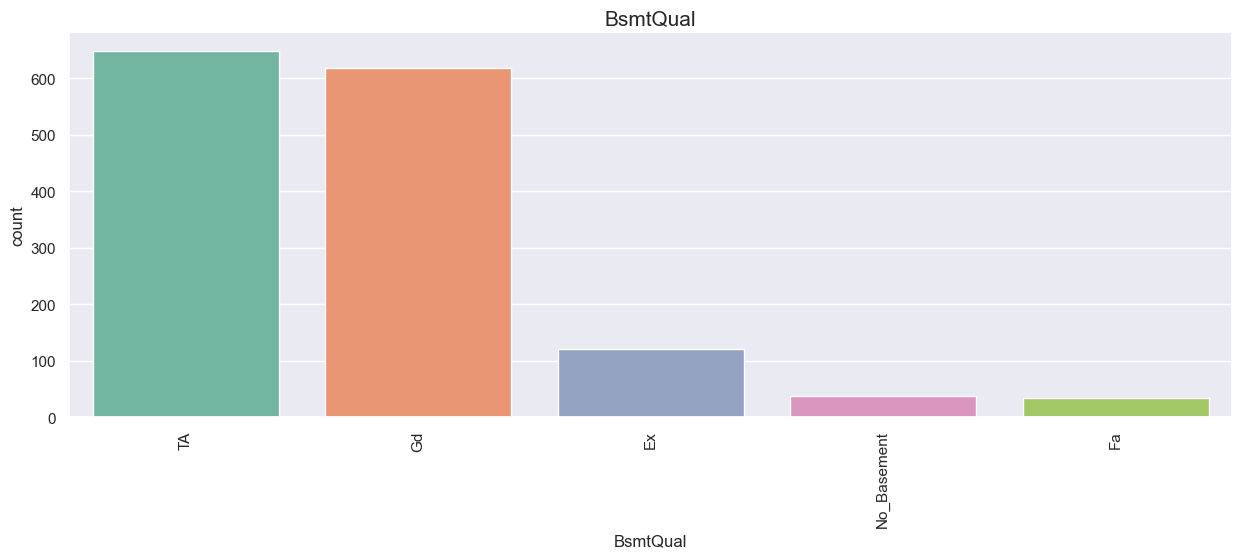

TA             649
Gd             618
Ex             121
No_Basement     37
Fa              35
Name: BsmtQual, dtype: int64
*********************************


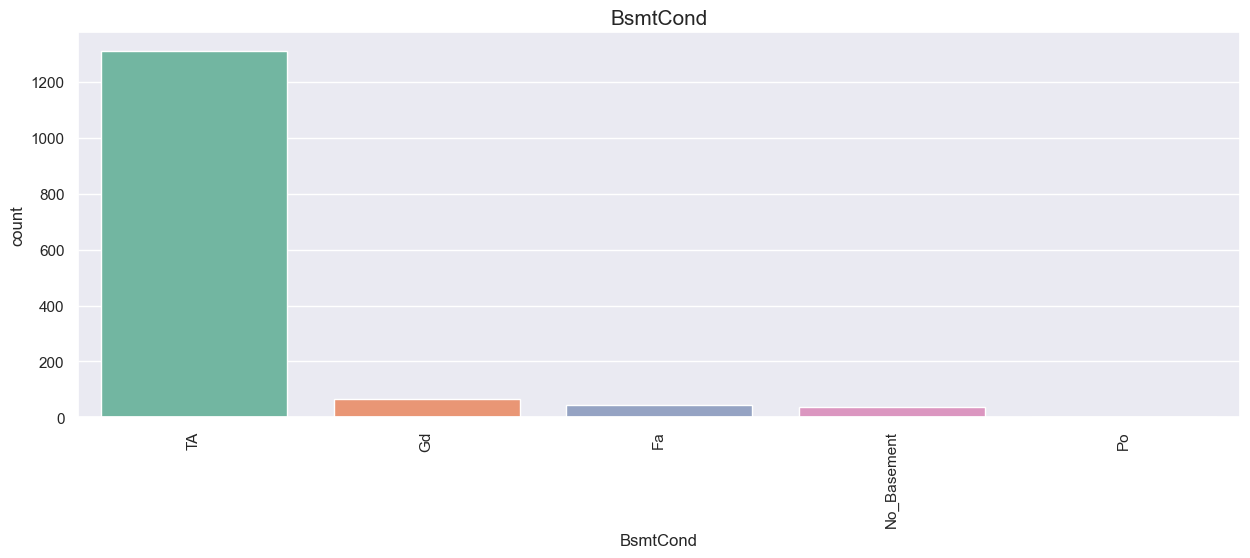

TA             1311
Gd               65
Fa               45
No_Basement      37
Po                2
Name: BsmtCond, dtype: int64
*********************************


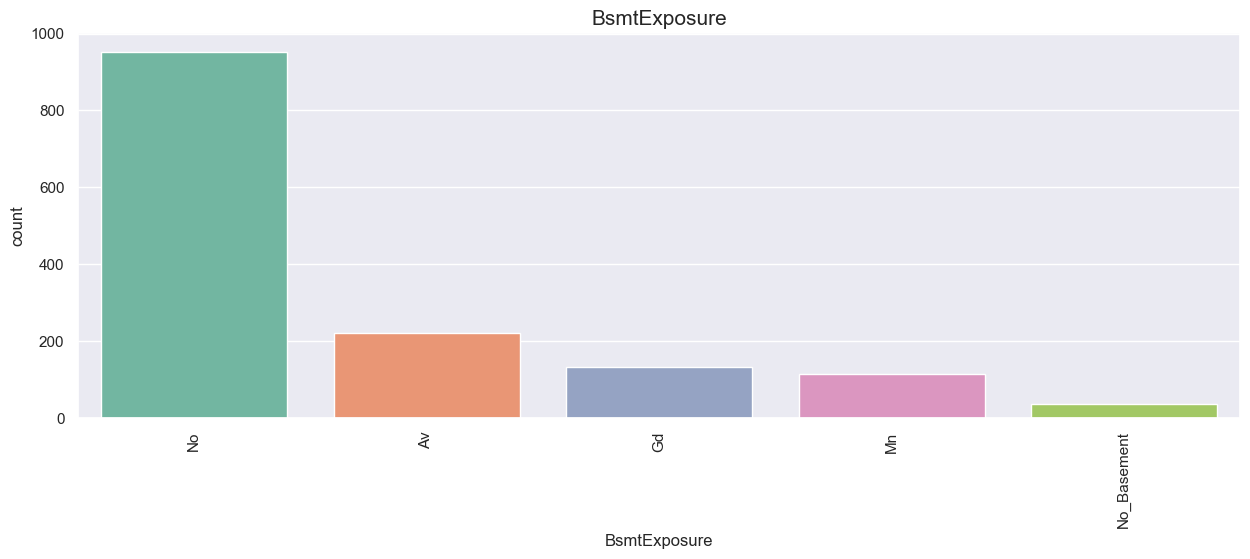

No             953
Av             221
Gd             134
Mn             114
No_Basement     38
Name: BsmtExposure, dtype: int64
*********************************


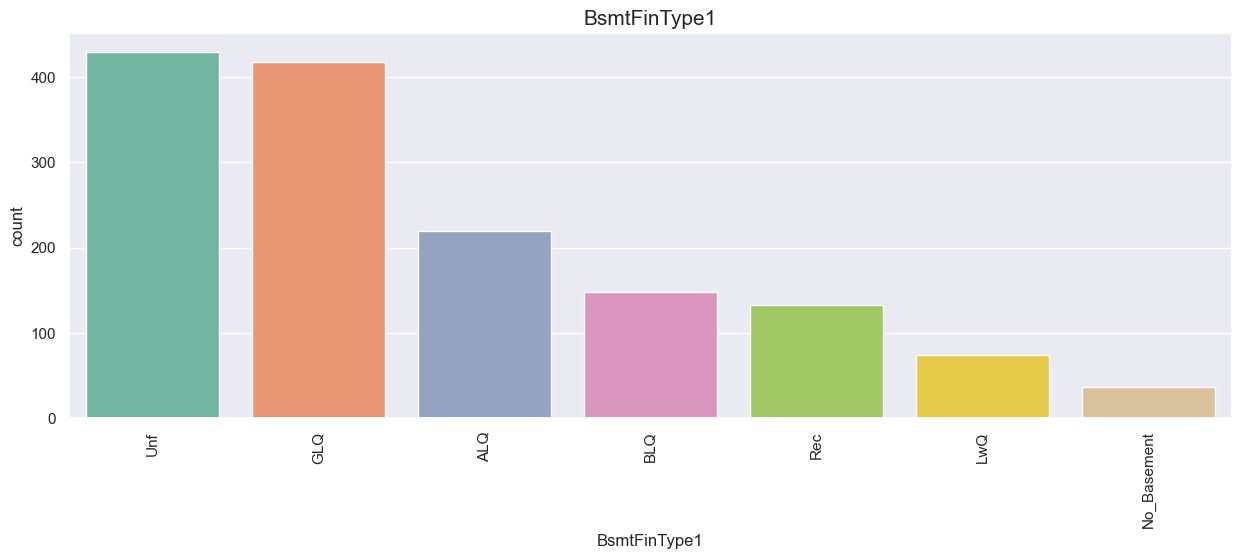

Unf            430
GLQ            418
ALQ            220
BLQ            148
Rec            133
LwQ             74
No_Basement     37
Name: BsmtFinType1, dtype: int64
*********************************


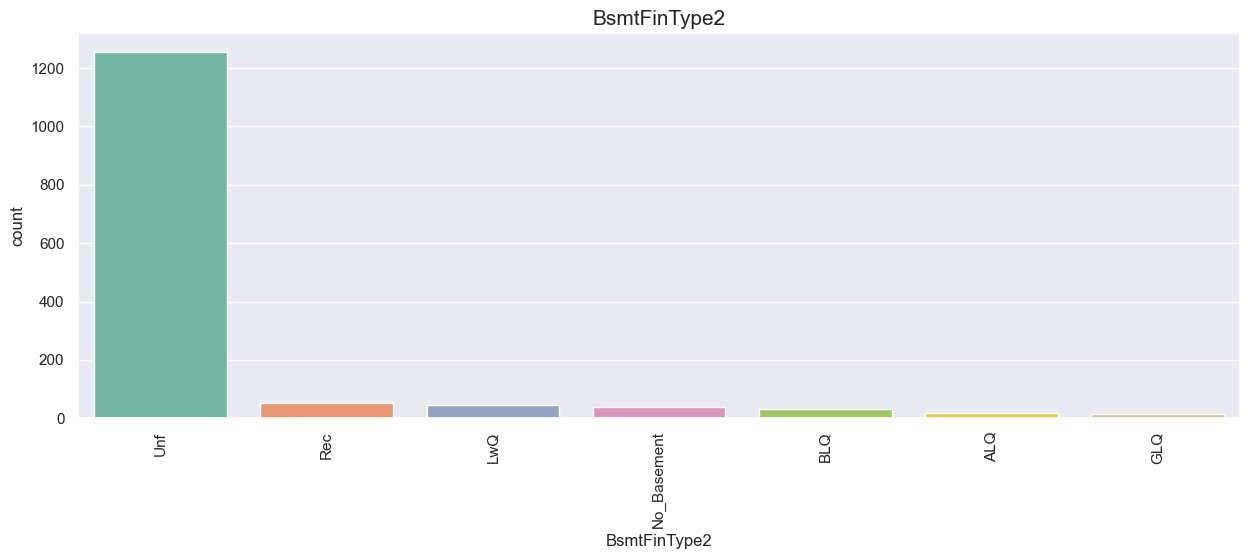

Unf            1256
Rec              54
LwQ              46
No_Basement      38
BLQ              33
ALQ              19
GLQ              14
Name: BsmtFinType2, dtype: int64
*********************************


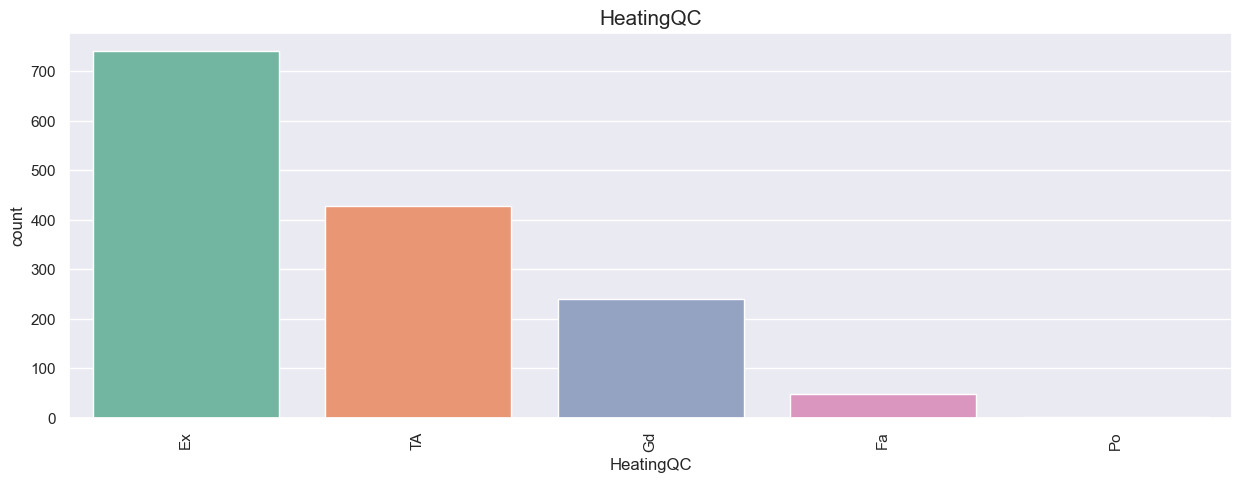

Ex    741
TA    428
Gd    241
Fa     49
Po      1
Name: HeatingQC, dtype: int64
*********************************


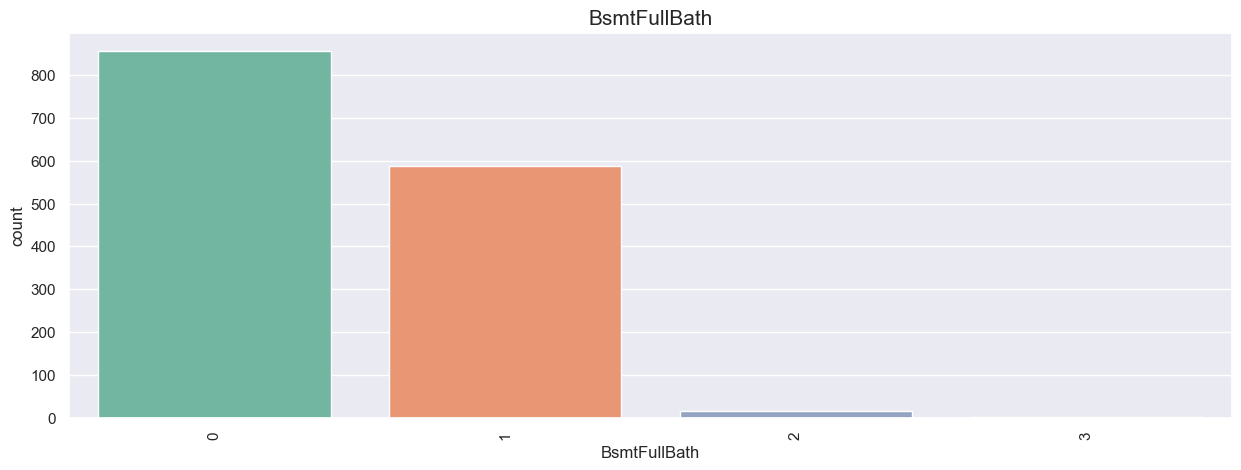

0    856
1    588
2     15
3      1
Name: BsmtFullBath, dtype: int64
*********************************


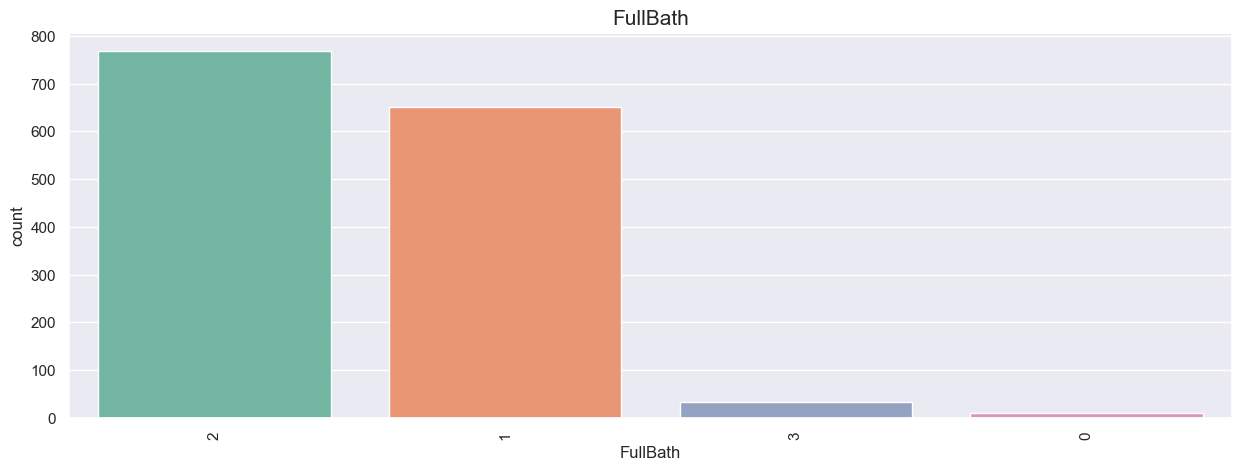

2    768
1    650
3     33
0      9
Name: FullBath, dtype: int64
*********************************


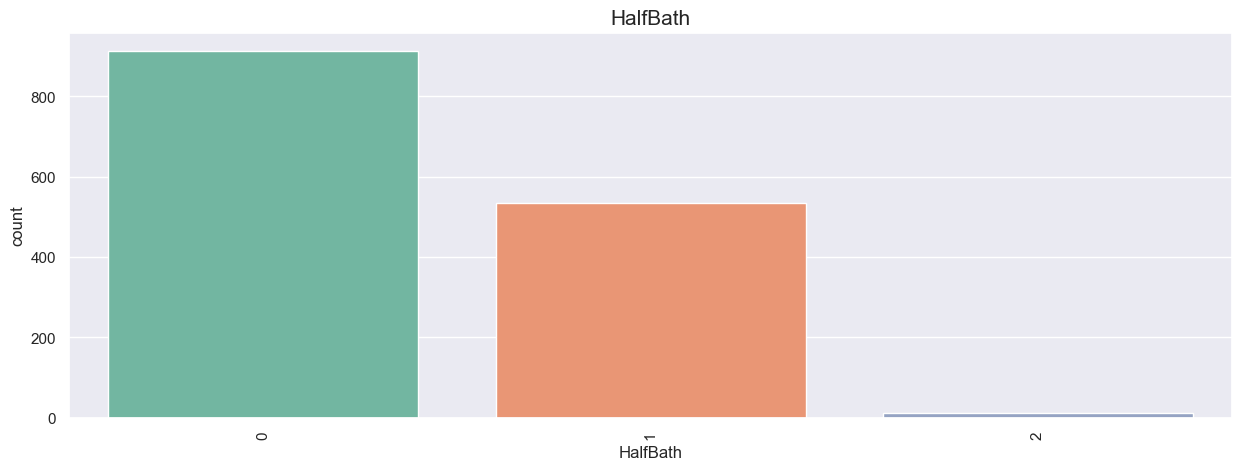

0    913
1    535
2     12
Name: HalfBath, dtype: int64
*********************************


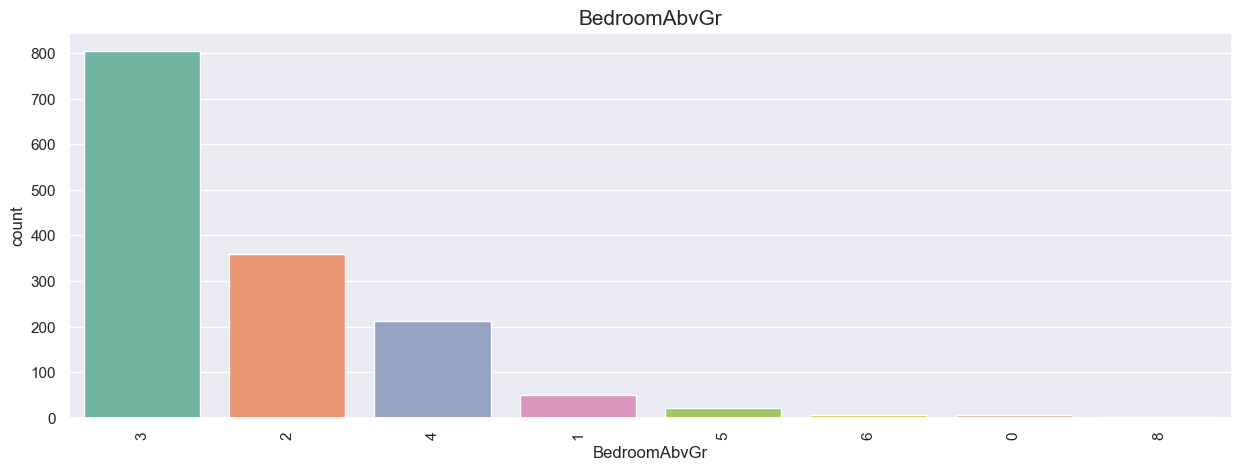

3    804
2    358
4    213
1     50
5     21
6      7
0      6
8      1
Name: BedroomAbvGr, dtype: int64
*********************************


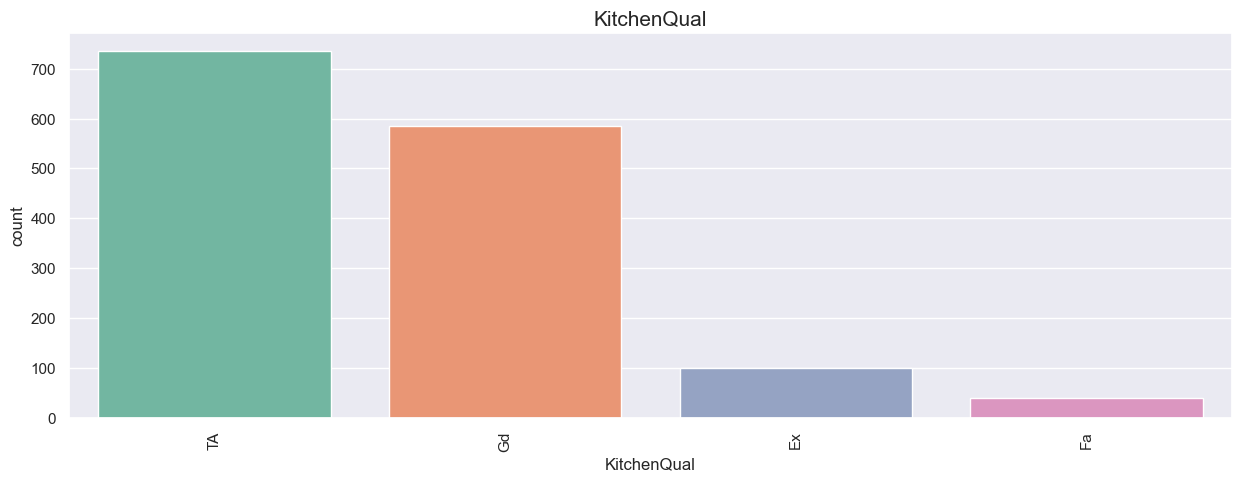

TA    735
Gd    586
Ex    100
Fa     39
Name: KitchenQual, dtype: int64
*********************************


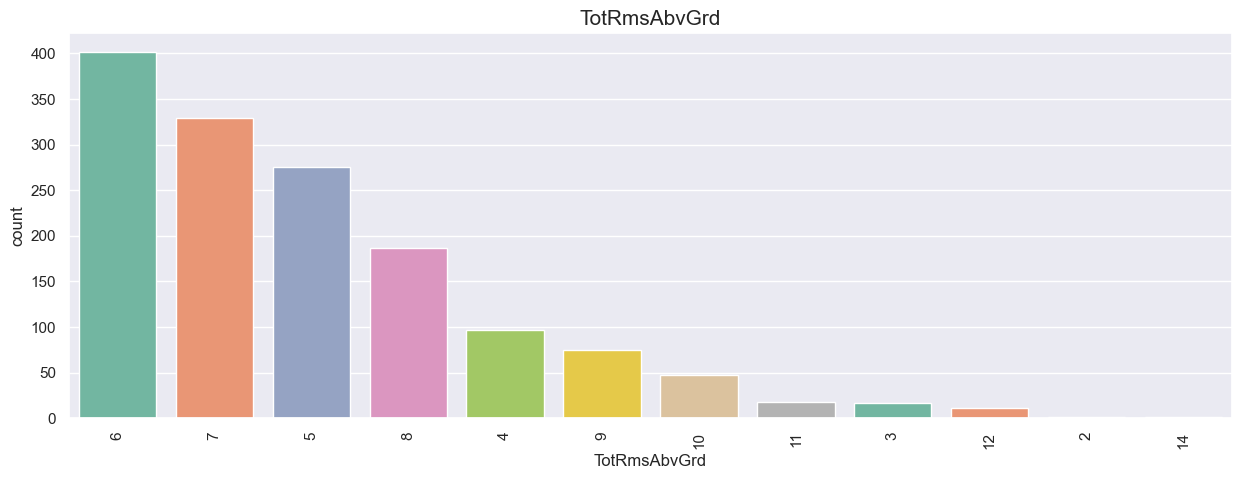

6     402
7     329
5     275
8     187
4      97
9      75
10     47
11     18
3      17
12     11
2       1
14      1
Name: TotRmsAbvGrd, dtype: int64
*********************************


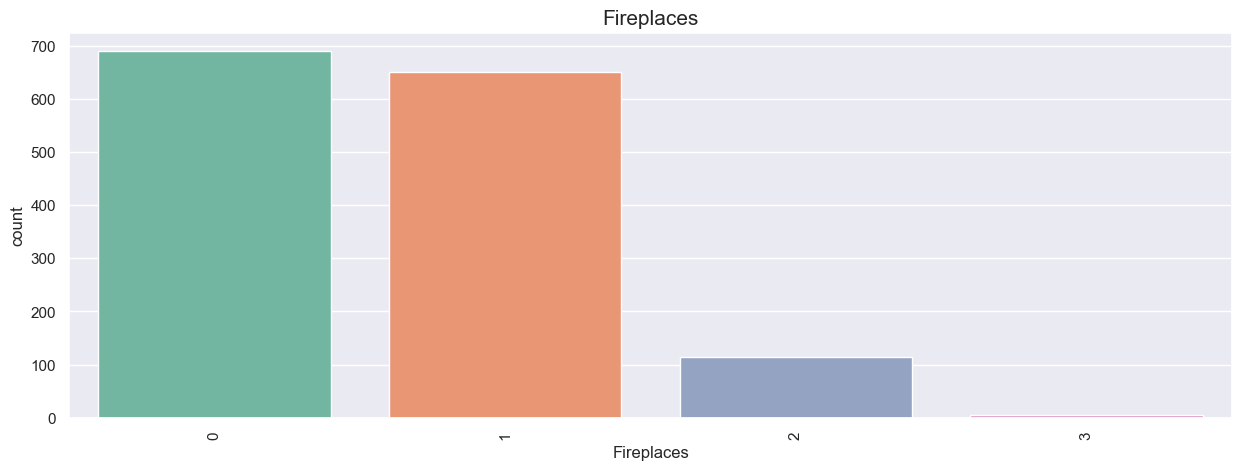

0    690
1    650
2    115
3      5
Name: Fireplaces, dtype: int64
*********************************


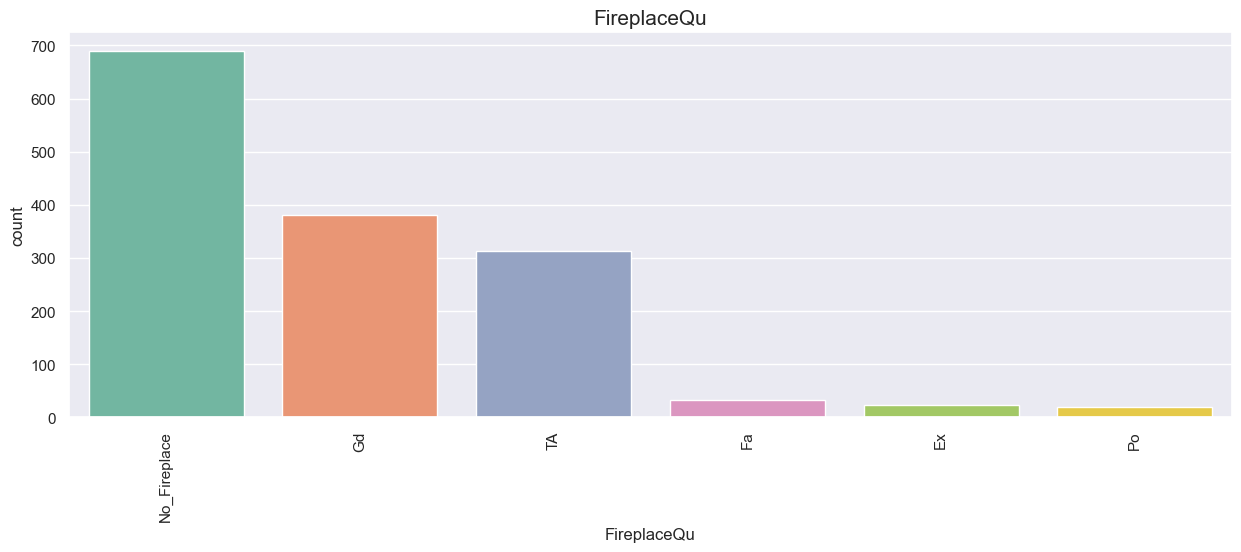

No_Fireplace    690
Gd              380
TA              313
Fa               33
Ex               24
Po               20
Name: FireplaceQu, dtype: int64
*********************************


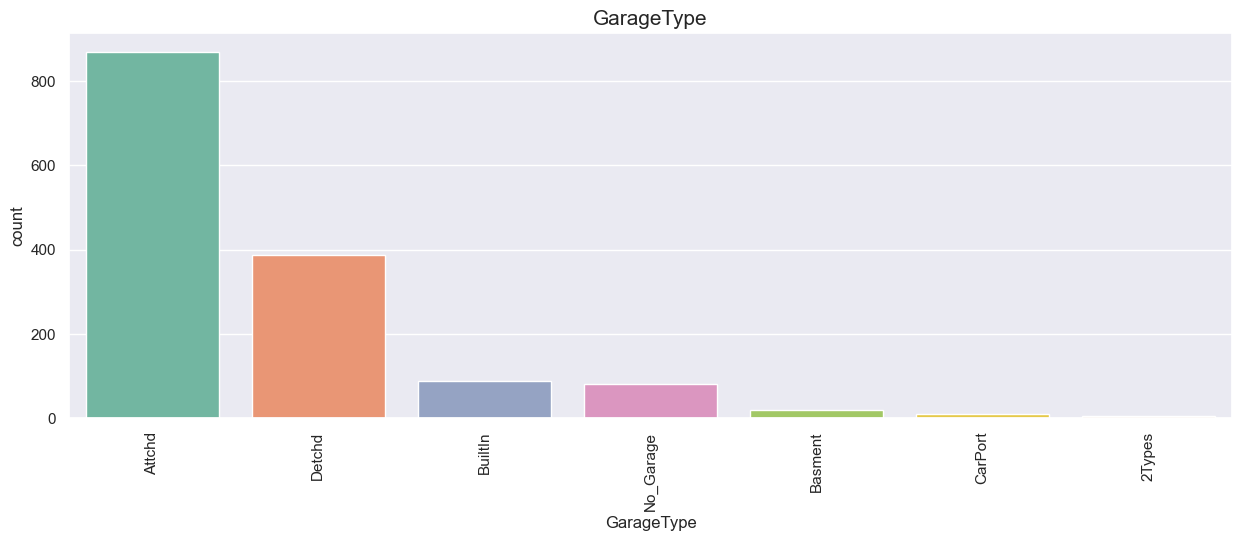

Attchd       870
Detchd       387
BuiltIn       88
No_Garage     81
Basment       19
CarPort        9
2Types         6
Name: GarageType, dtype: int64
*********************************


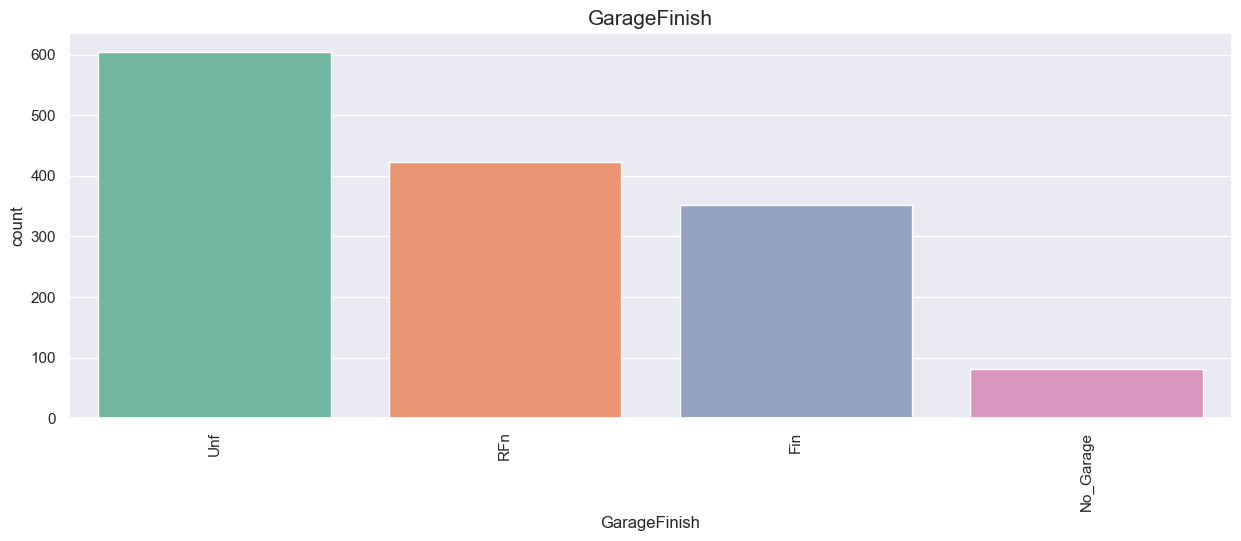

Unf          605
RFn          422
Fin          352
No_Garage     81
Name: GarageFinish, dtype: int64
*********************************


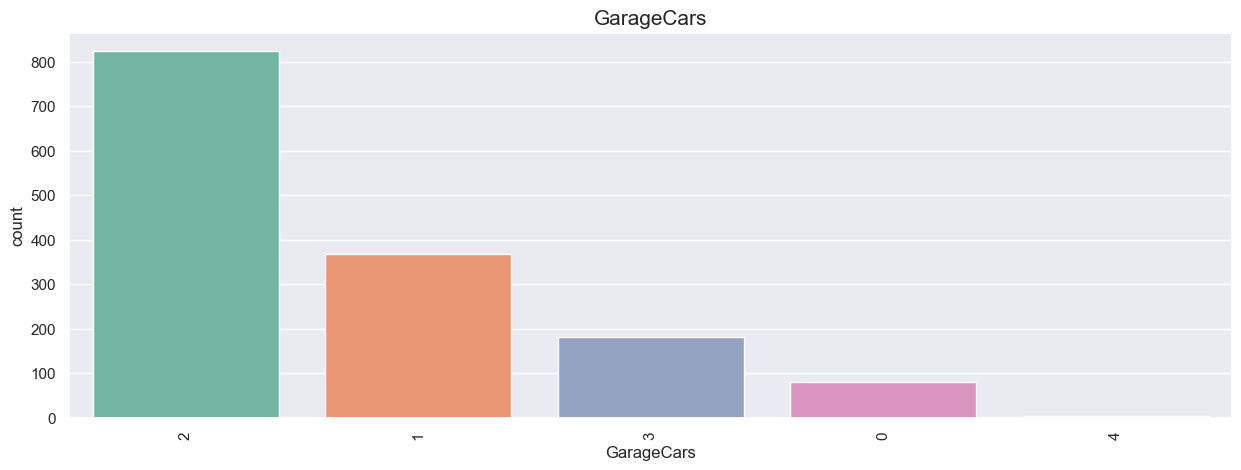

2    824
1    369
3    181
0     81
4      5
Name: GarageCars, dtype: int64
*********************************


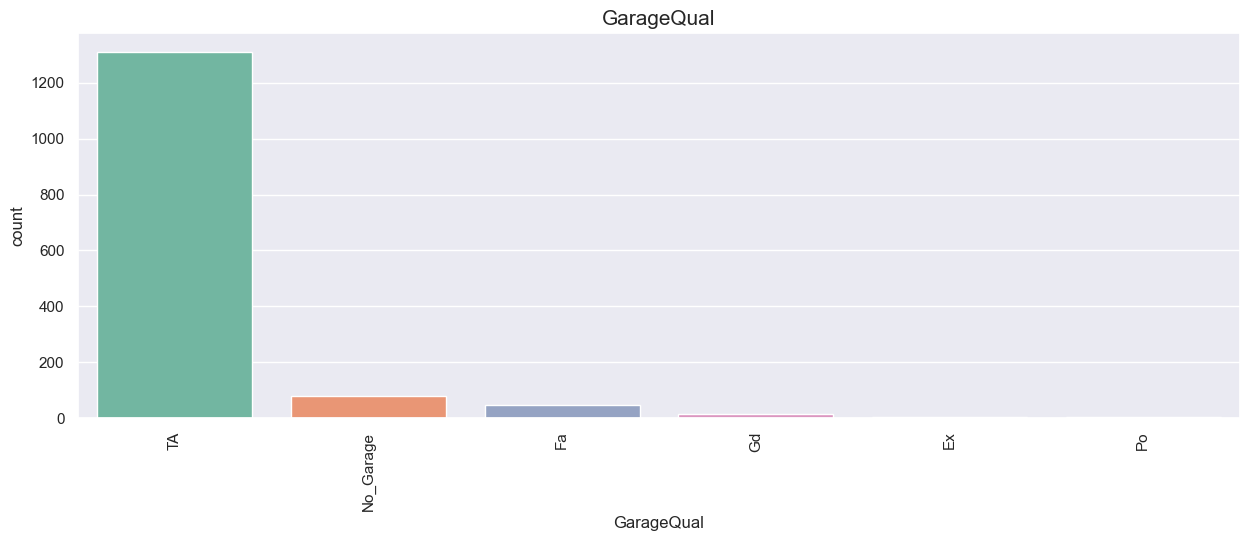

TA           1311
No_Garage      81
Fa             48
Gd             14
Ex              3
Po              3
Name: GarageQual, dtype: int64
*********************************


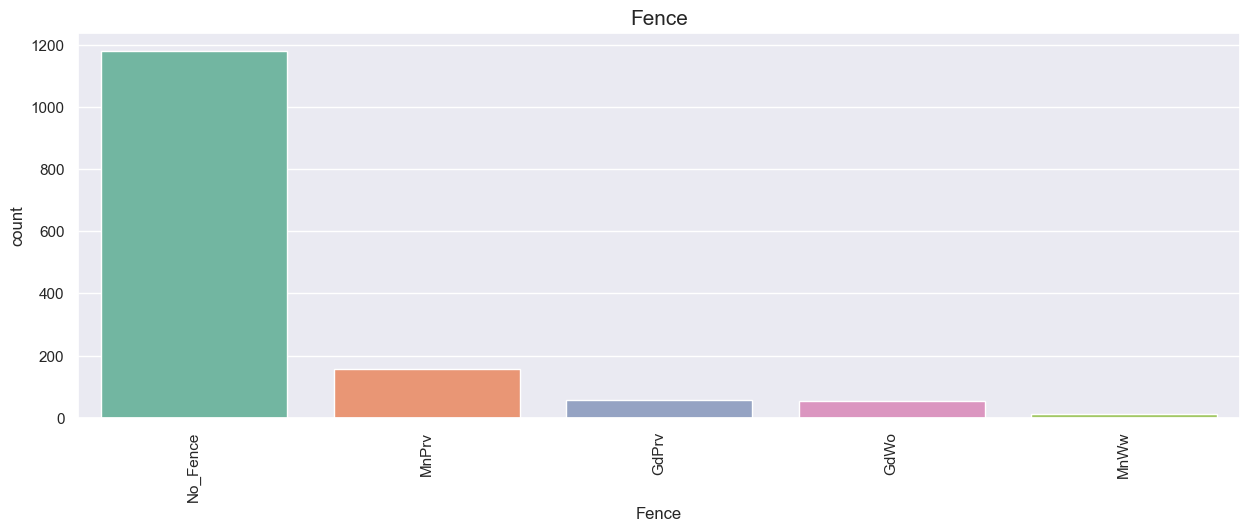

No_Fence    1179
MnPrv        157
GdPrv         59
GdWo          54
MnWw          11
Name: Fence, dtype: int64
*********************************


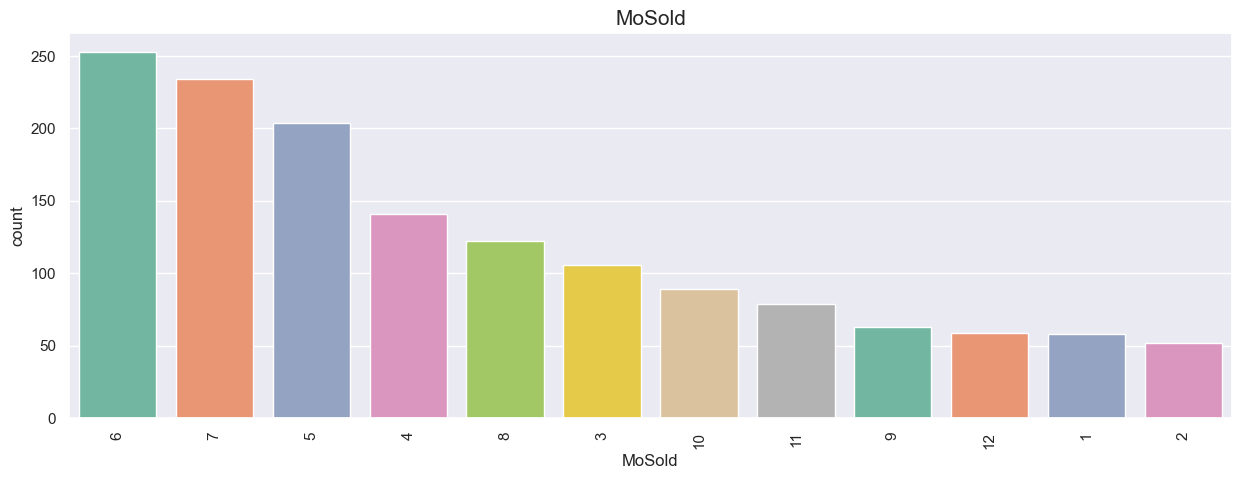

6     253
7     234
5     204
4     141
8     122
3     106
10     89
11     79
9      63
12     59
1      58
2      52
Name: MoSold, dtype: int64
*********************************


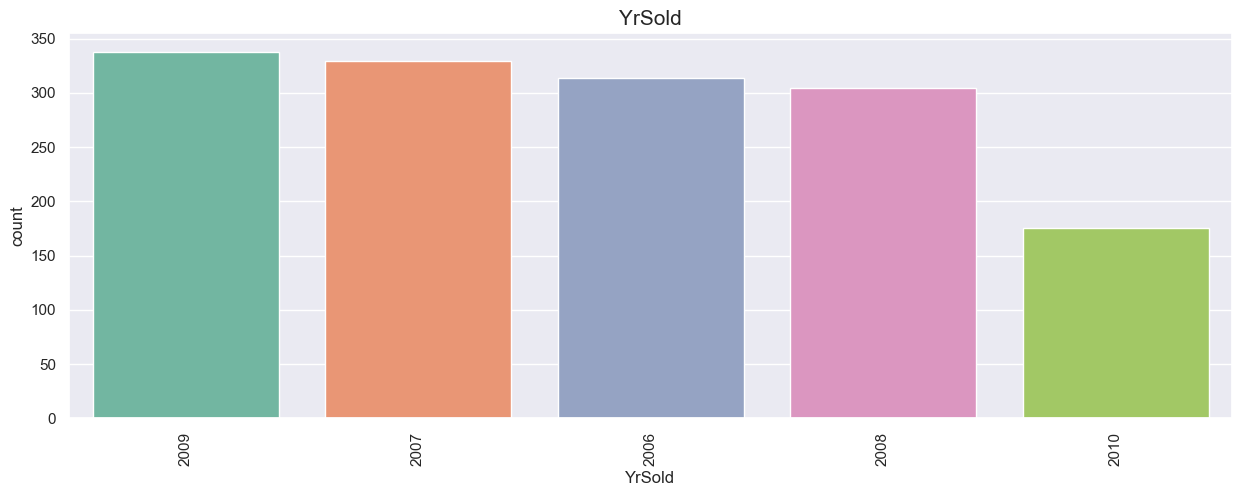

2009    338
2007    329
2006    314
2008    304
2010    175
Name: YrSold, dtype: int64
*********************************


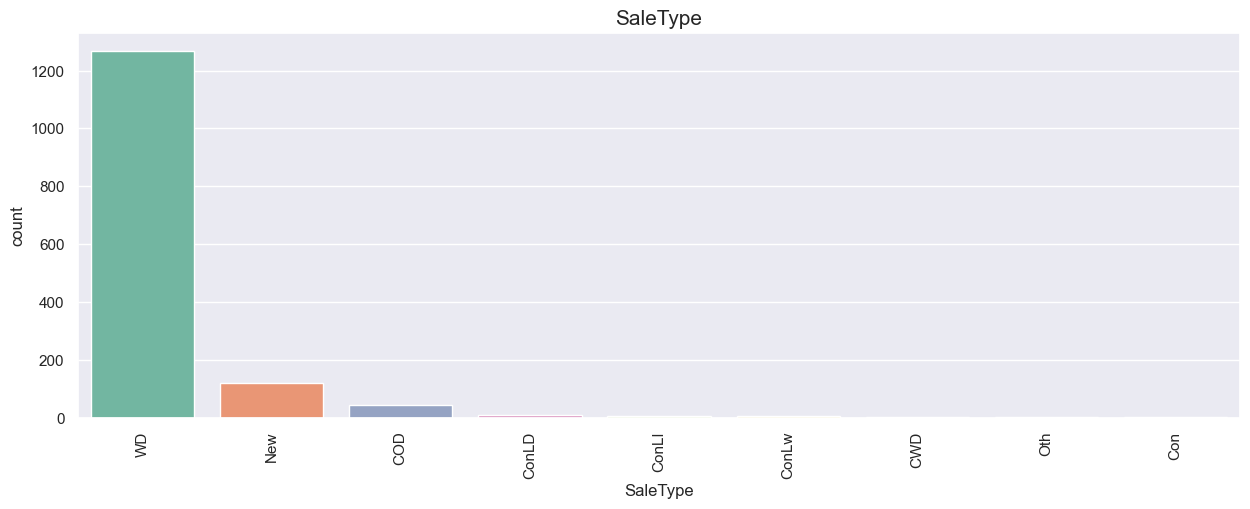

WD       1267
New       122
COD        43
ConLD       9
ConLI       5
ConLw       5
CWD         4
Oth         3
Con         2
Name: SaleType, dtype: int64
*********************************


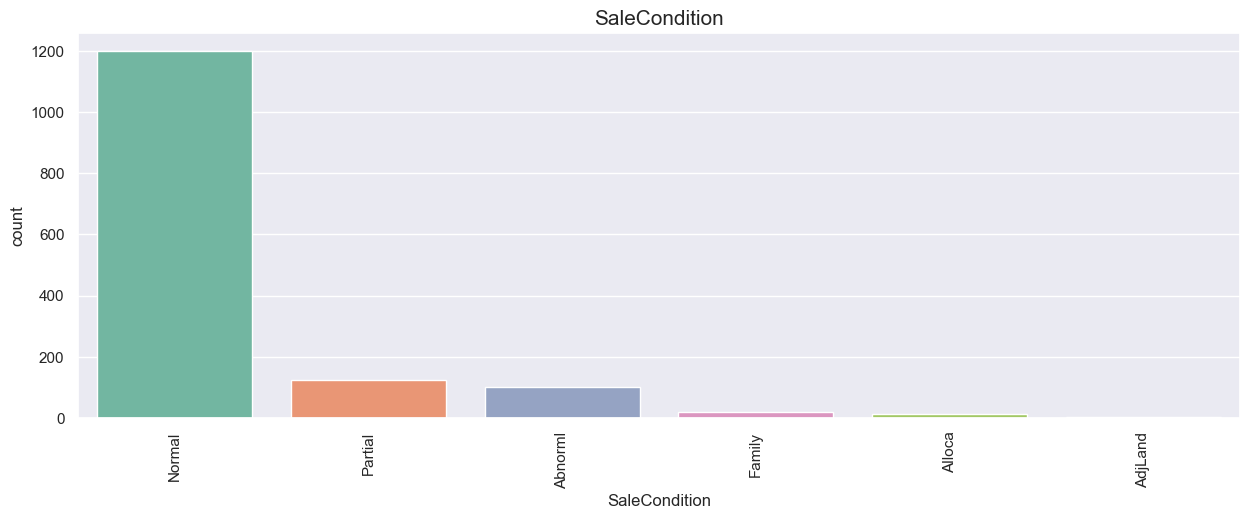

Normal     1198
Partial     125
Abnorml     101
Family       20
Alloca       12
AdjLand       4
Name: SaleCondition, dtype: int64
*********************************


In [46]:
for col in categorical:
    countplot_cnt(housing_df,col)

In [47]:
housing_df[categorical].describe().round().T

count unique           top  freq
MSSubClass      1460     15            20   536
MSZoning        1460      5            RL  1151
LotShape        1460      4           Reg   925
LandContour     1460      4           Lvl  1311
LotConfig       1460      5        Inside  1052
Neighborhood    1460     25         NAmes   225
Proximity_info  1460      9          Norm  1260
BldgType        1460      5          1Fam  1220
HouseStyle      1460      8        1Story   726
OverallQual     1460     10             5   397
OverallCond     1460      9             5   821
RoofStyle       1460      6         Gable  1141
Exterior1st     1460     15       VinylSd   515
Exterior2nd     1460     16       VinylSd   504
MasVnrType      1460      5          None   864
ExterQual       1460      4            TA   906
ExterCond       1460      5            TA  1282
Foundation      1460      6         PConc   647
BsmtQual        1460      5            TA   649
BsmtCond        1460      5            TA  1311
BsmtExposure    1460      5            No   953
BsmtFinType1    1460      7           Unf   430
BsmtFinType2    1460      7           Unf  1256
HeatingQC       1460      5            Ex   741
BsmtFullBath    1460      4             0   856
FullBath        1460      4             2   768
HalfBath        1460      3             0   913
BedroomAbvGr    1460      8             3   804
KitchenQual     1460      4            TA   735
TotRmsAbvGrd    1460     12             6   402
Fireplaces      1460      4             0   690
FireplaceQu     1460      6  No_Fireplace   690
GarageType      1460      7        Attchd   870
GarageFinish    1460      4           Unf   605
GarageCars      1460      5             2   824
GarageQual      1460      6            TA  1311
Fence           1460      5      No_Fence  1179
MoSold          1460     12             6   253
YrSold          1460      5          2009   338
SaleType        1460      9            WD  1267
SaleCondition   1460      6        Normal  1198

## <font color='DarkSlateBlue'>Exploratory Data Analysis - Bi-variate </font> 

In [48]:
# continuous Cols
def scatter__plot_cont(df,cols):
    sns.set_theme(color_codes=True)
    plt.figure(figsize=(20,50))
    for i,col in enumerate(cols):
        plt.subplot(int(len(cols)/3),3,i+1)
        sns.regplot(x=df[col],y=df["SalePrice"])
        plt.title("SalePrice vs "+col, fontsize = 18)
        plt.xticks(rotation=90)
    plt.show()

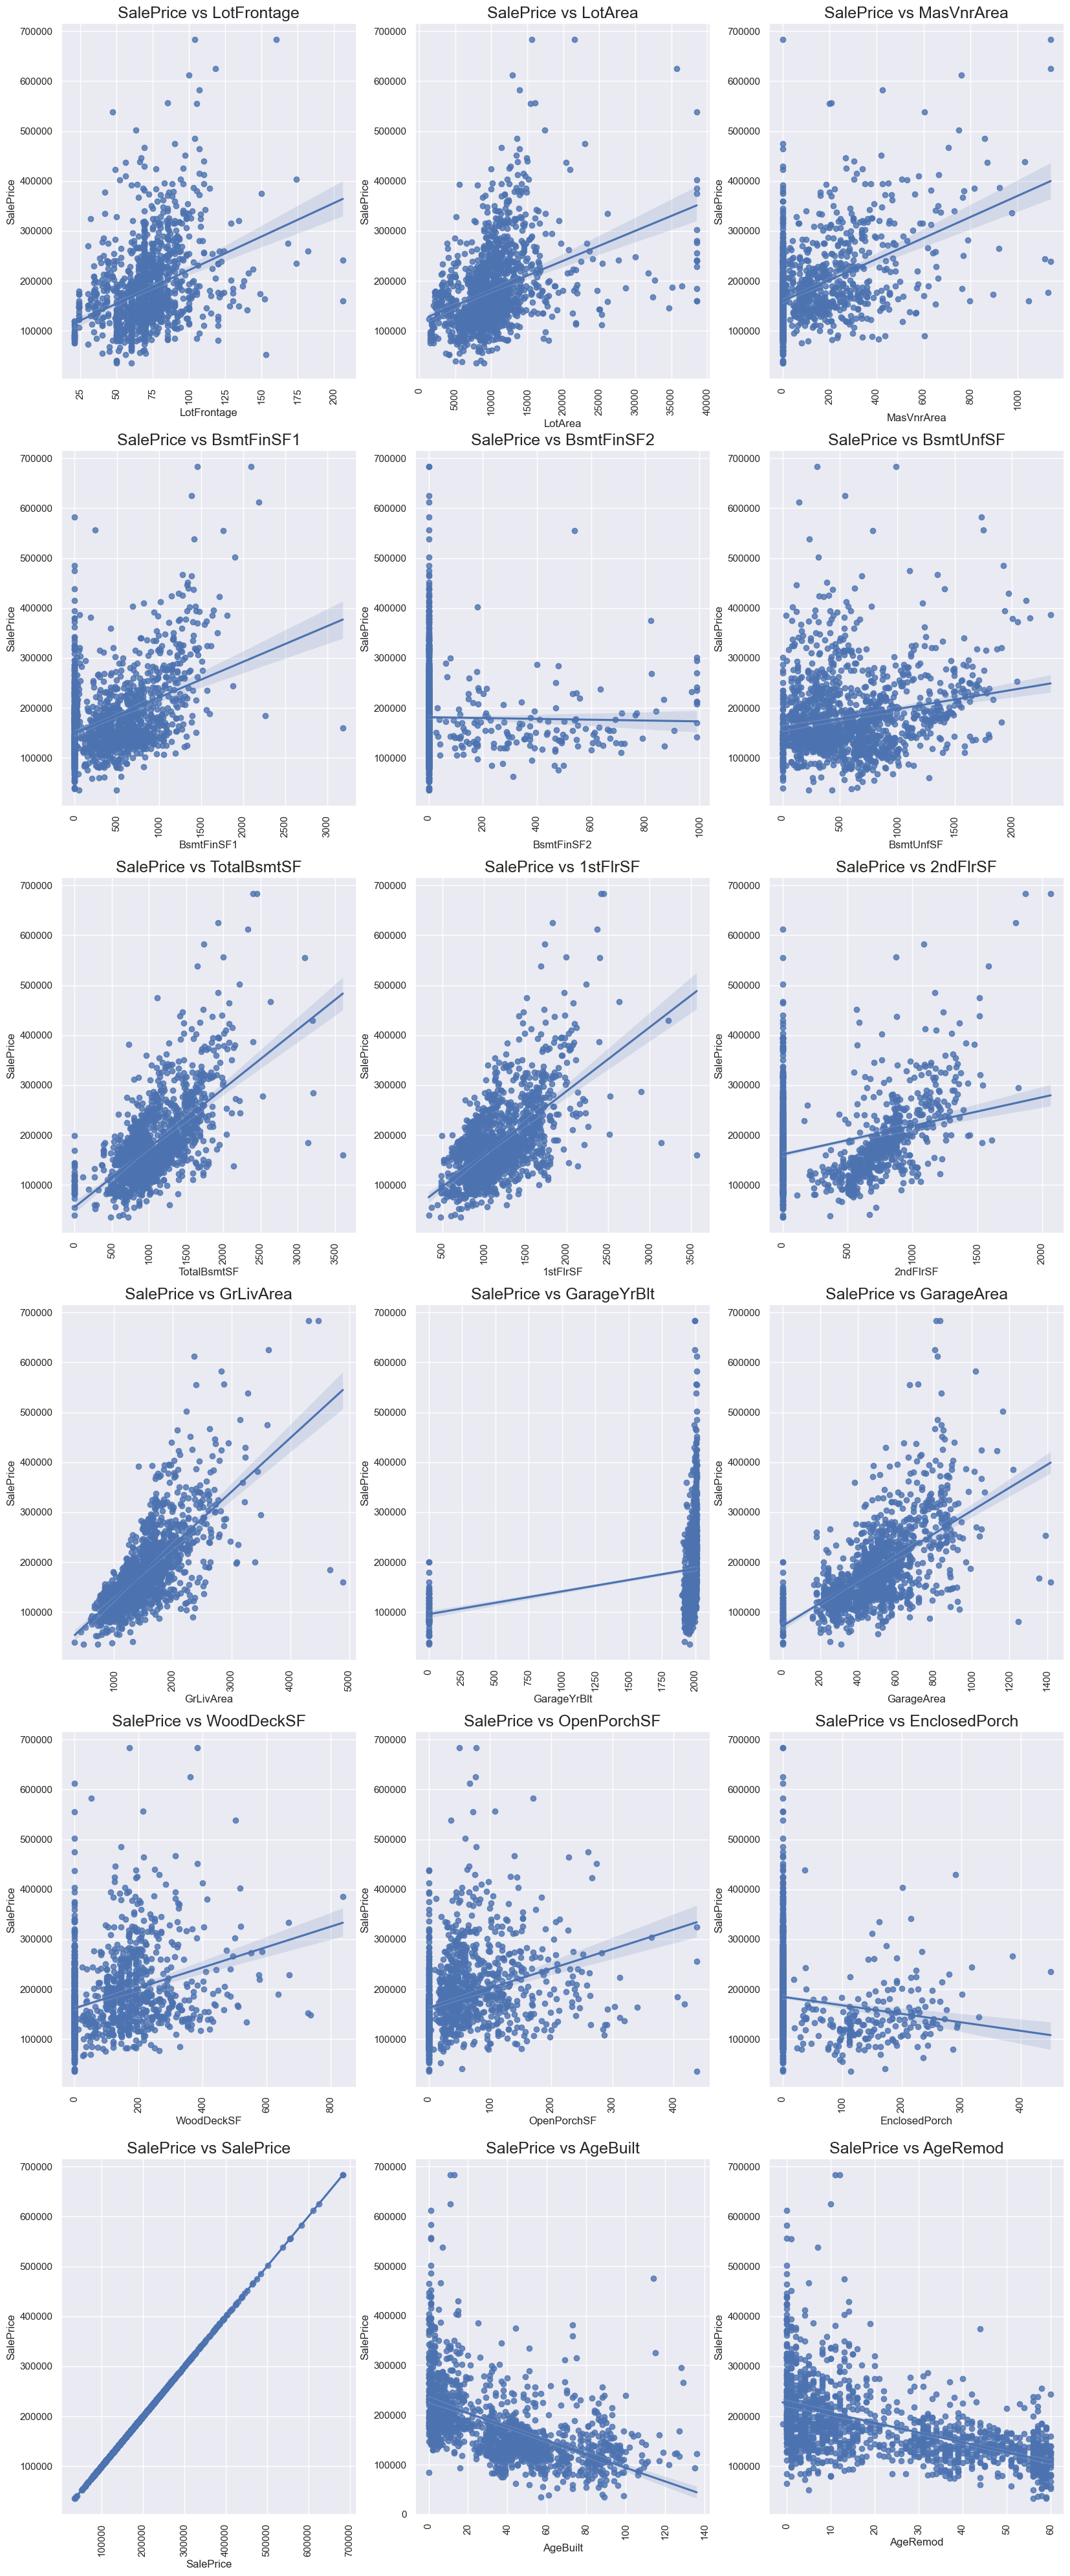

In [49]:
scatter__plot_cont(housing_df,continuous)

## Observations :
Here is a list of features that exhibit a linear relationship with the target variable:

- TotalBsmtSF
- 1stFlrSF
- 2ndFlrSF
- GrLivArea
- GarageArea
- AgeBuild
- AgeRemod

In [50]:
def plot_box_cat(df,col):
    plt.figure(figsize=(10,10))
    sns.boxplot(x=df[col],y=df["SalePrice"]) 
    plt.title("SalePrice vs "+col, fontsize = 15)
    plt.xticks(rotation=90)
    plt.show()
    print("*******************************")

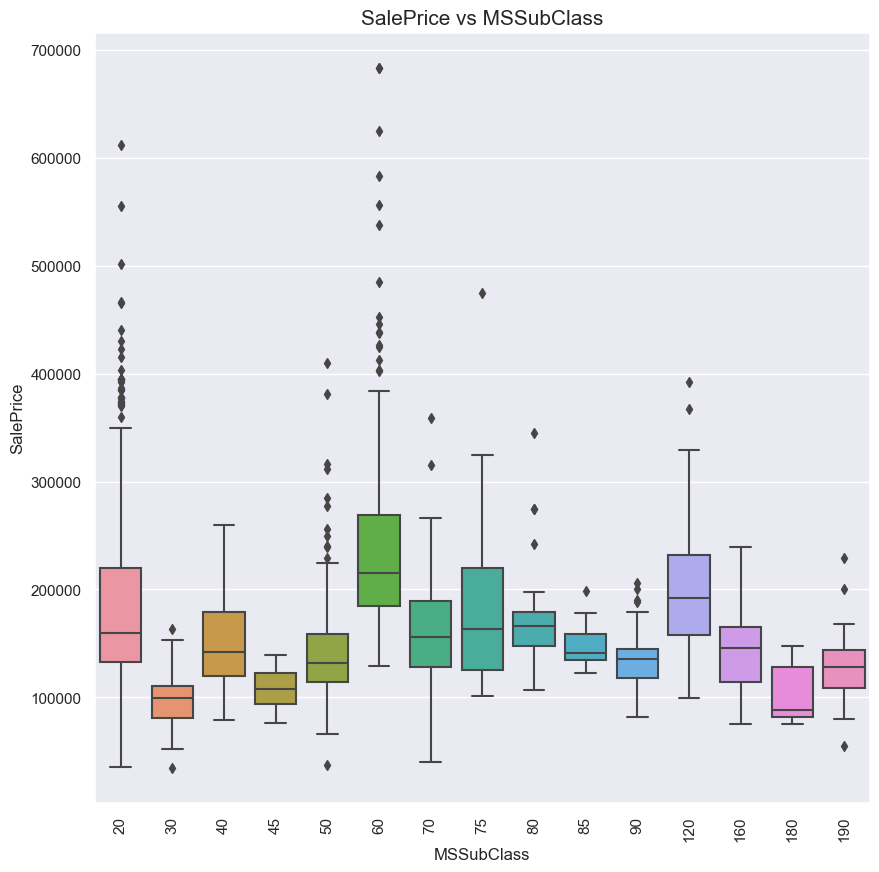

*******************************


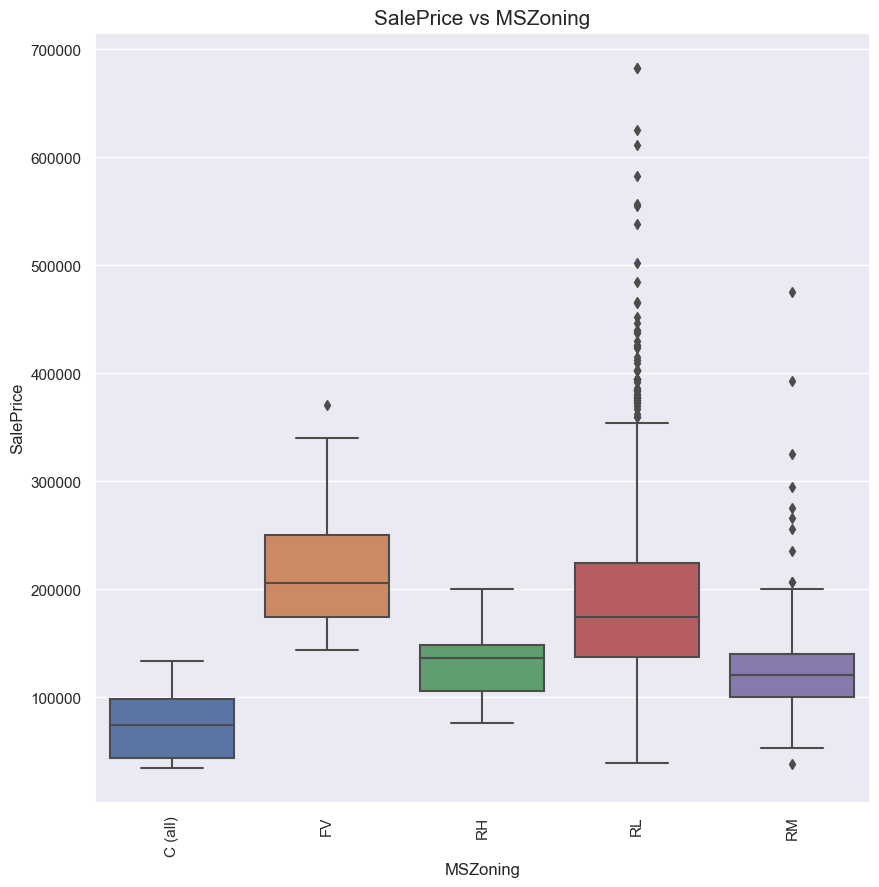

*******************************


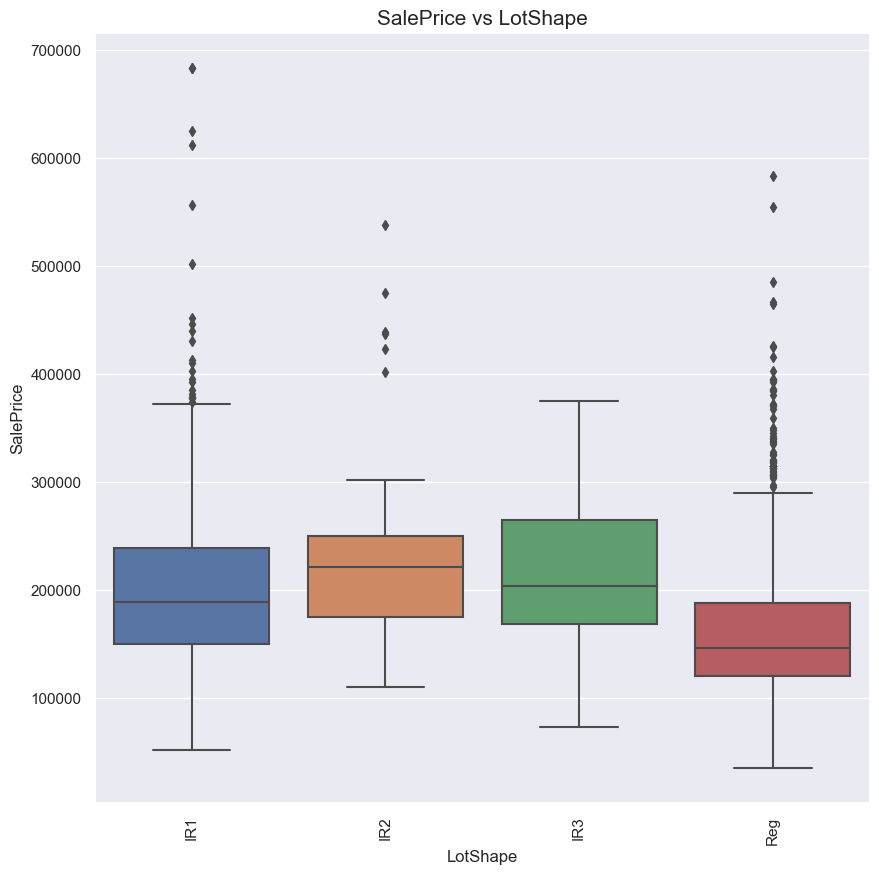

*******************************


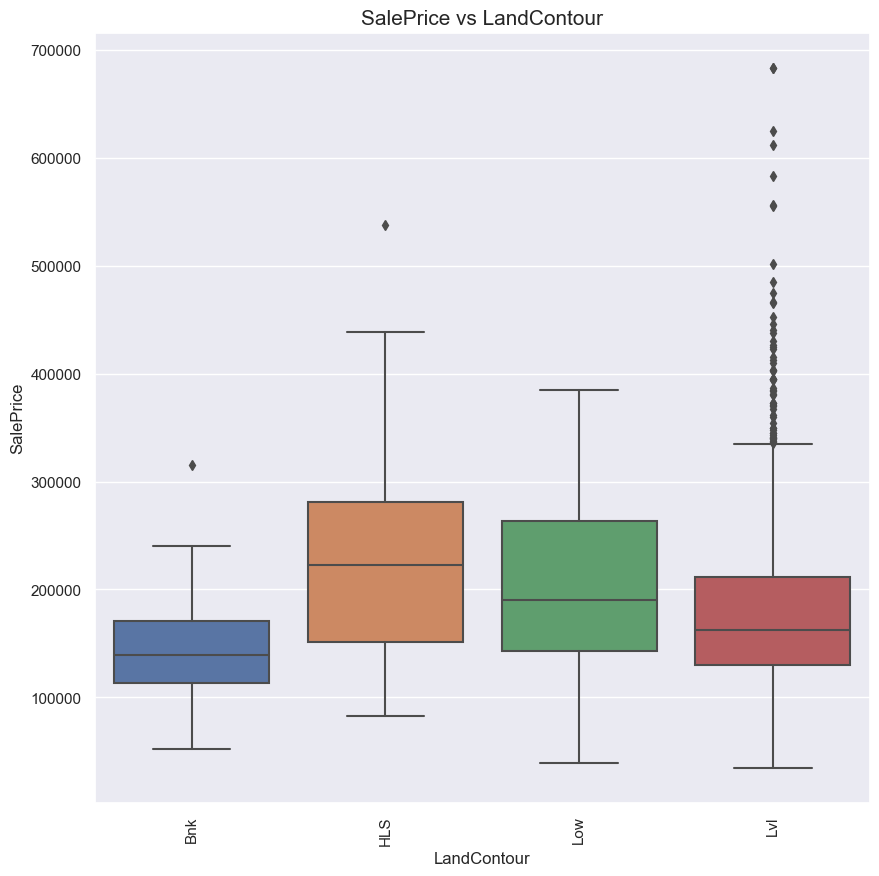

*******************************


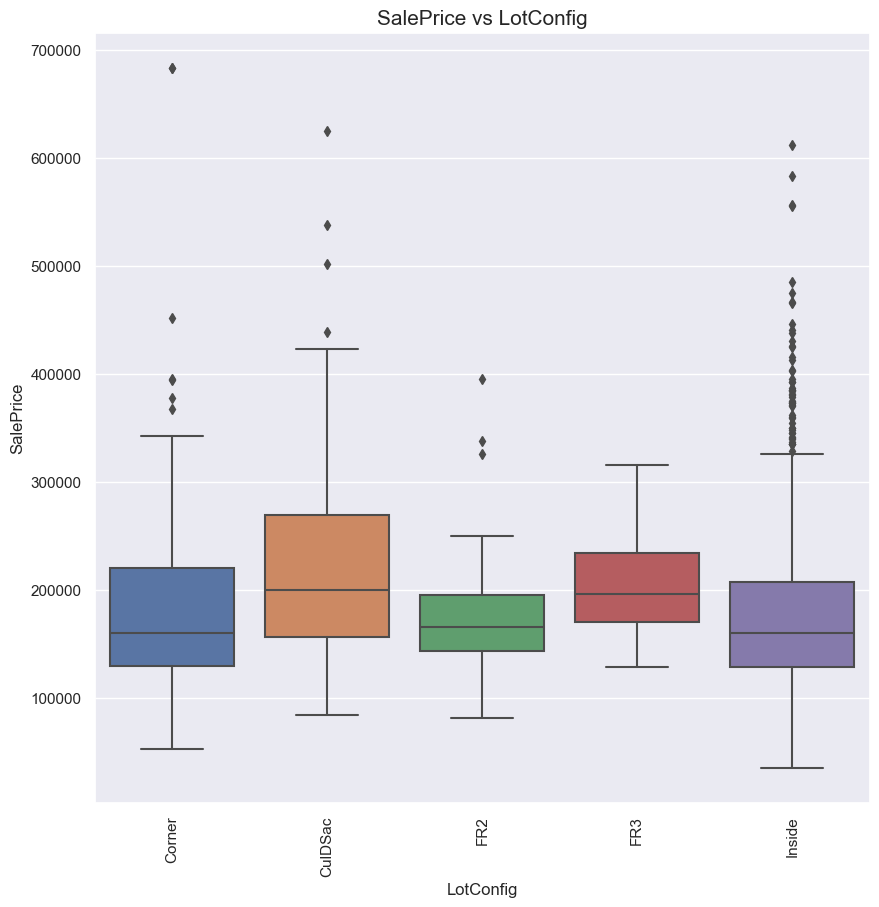

*******************************


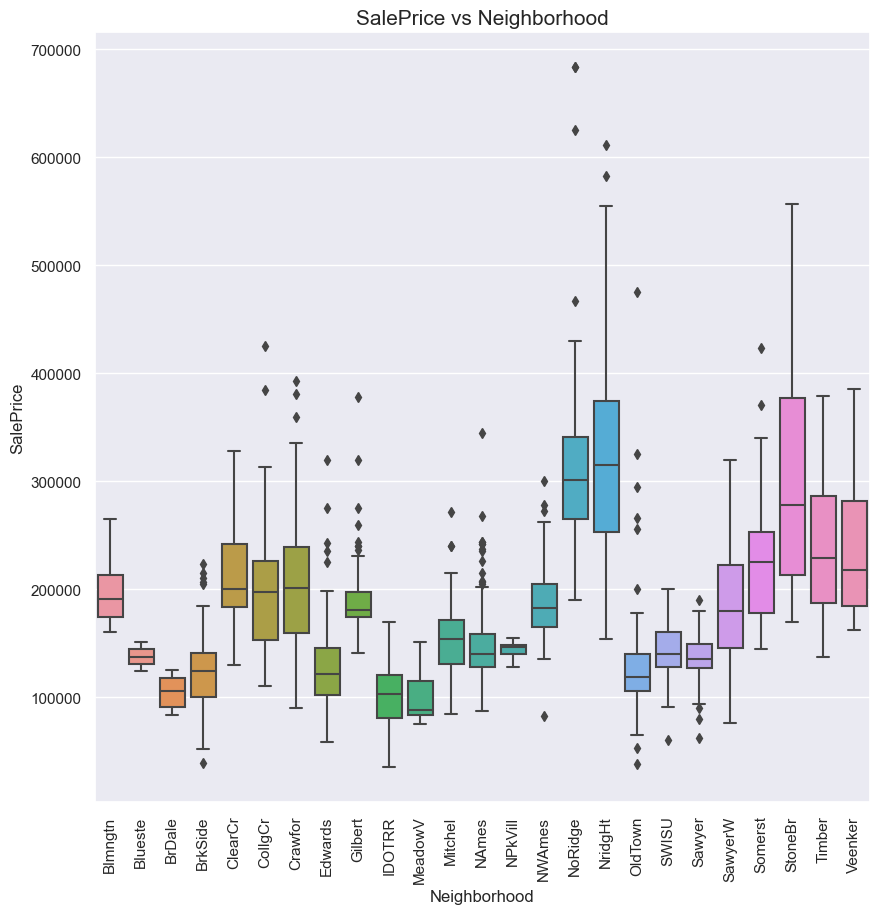

*******************************


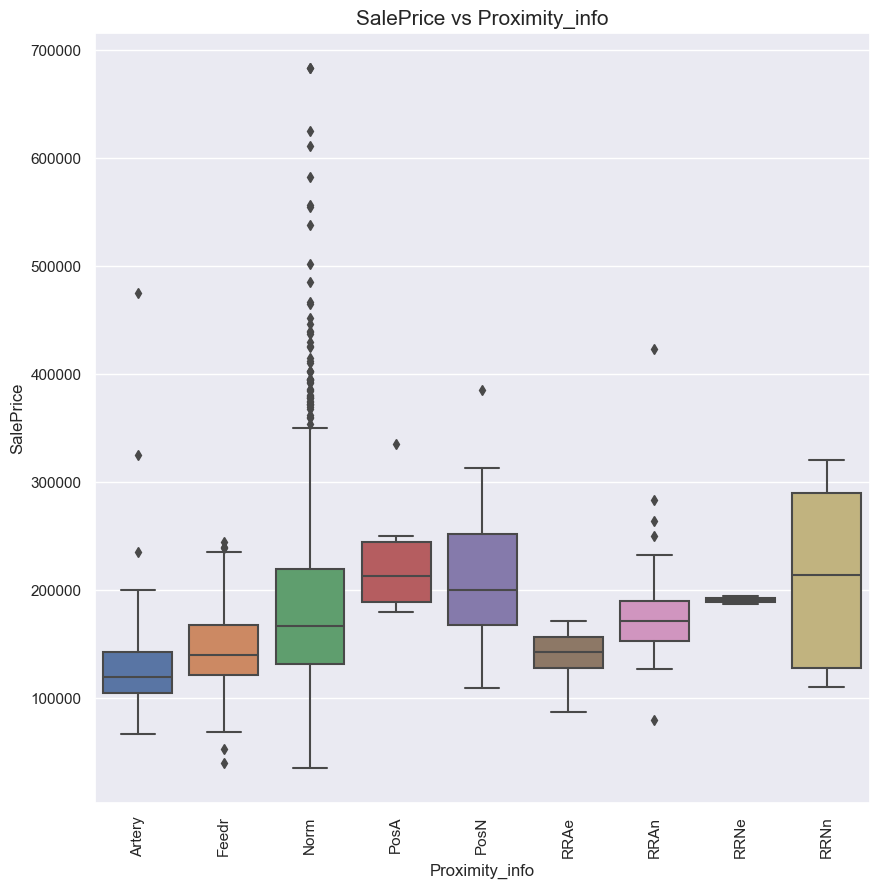

*******************************


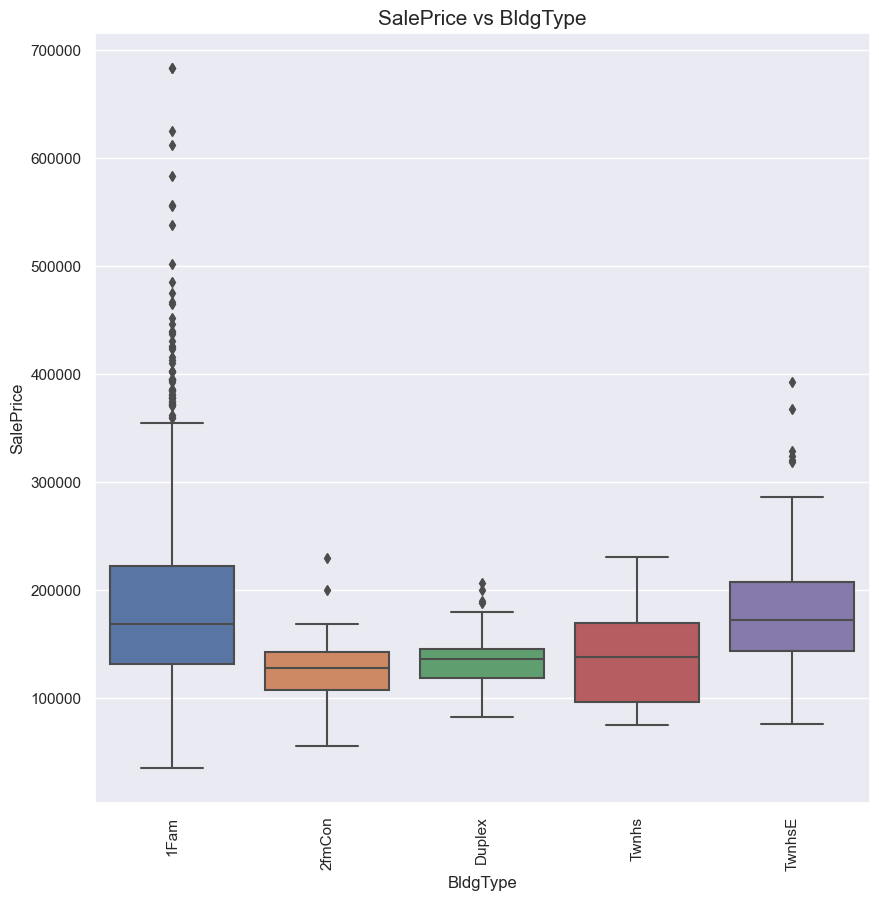

*******************************


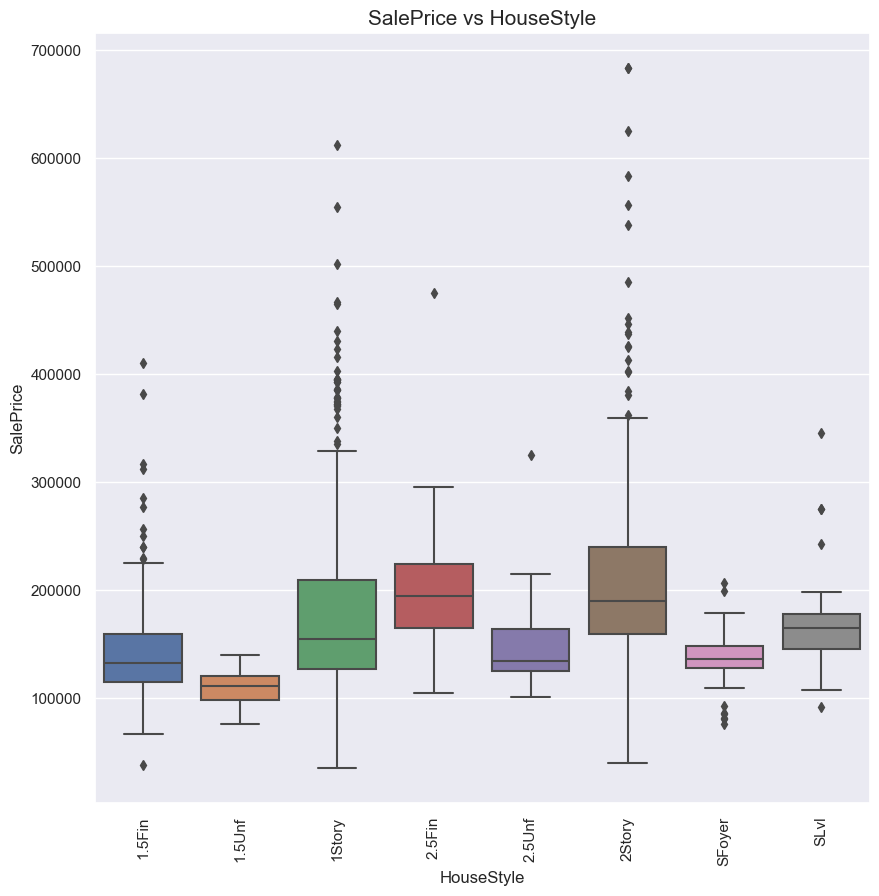

*******************************


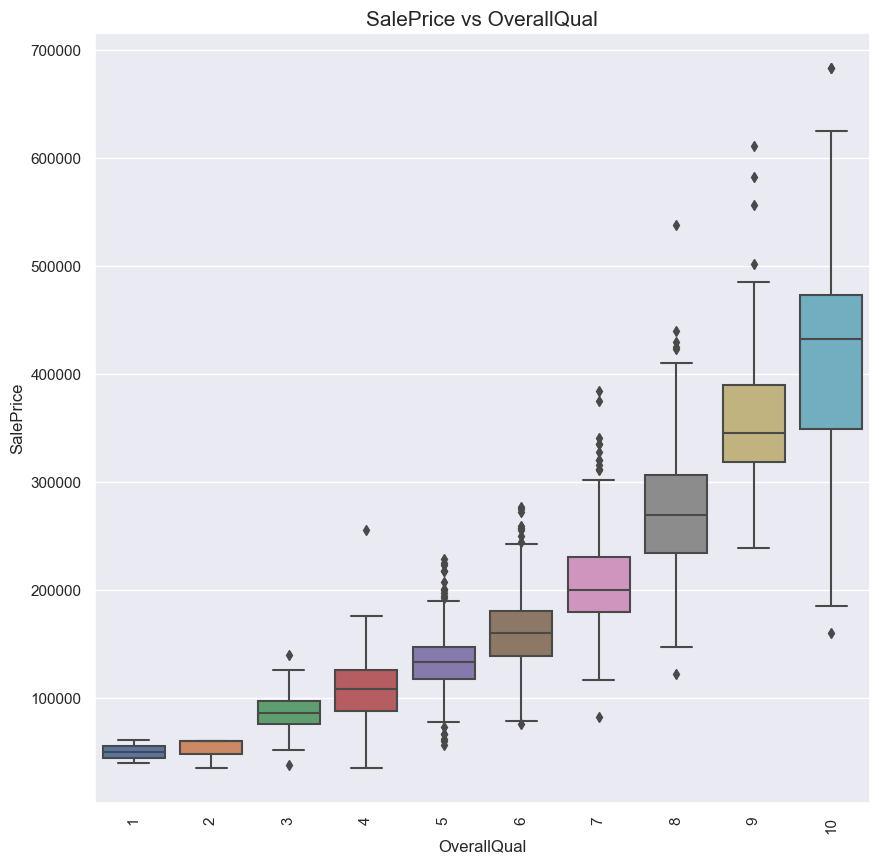

*******************************


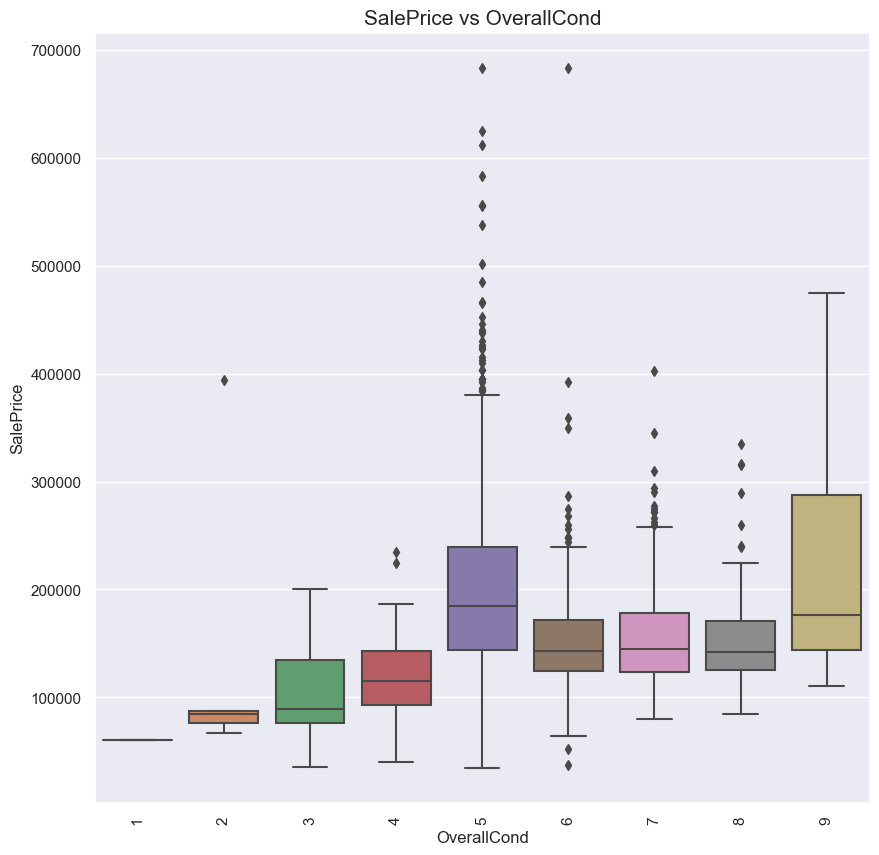

*******************************


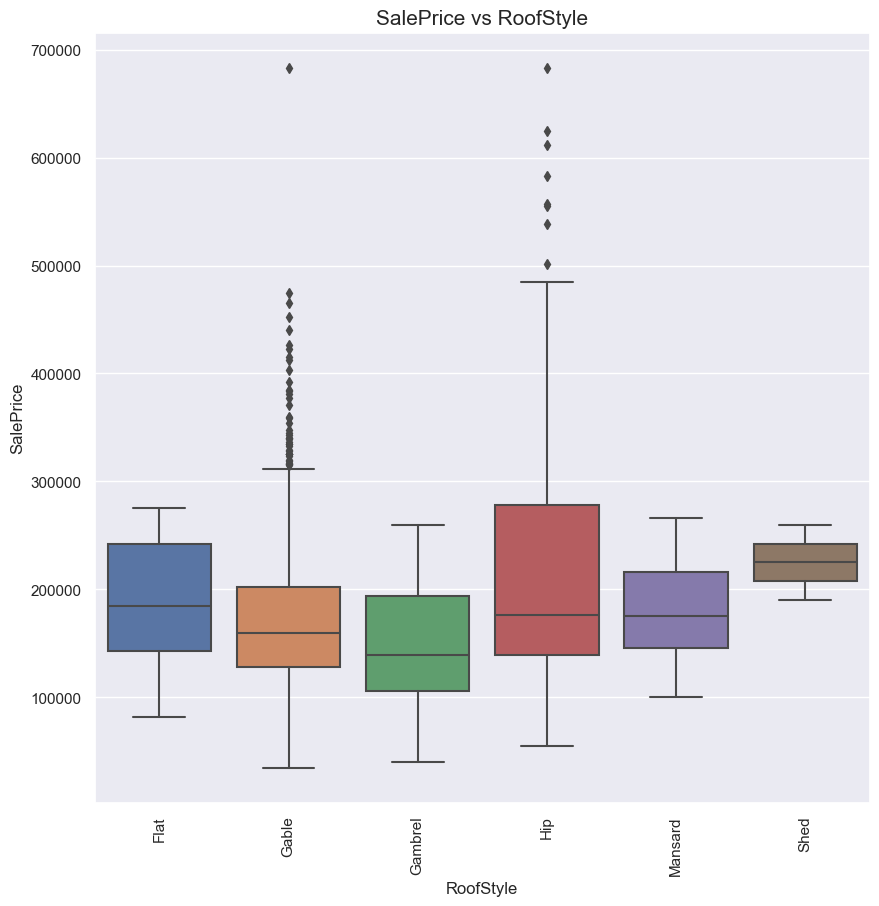

*******************************


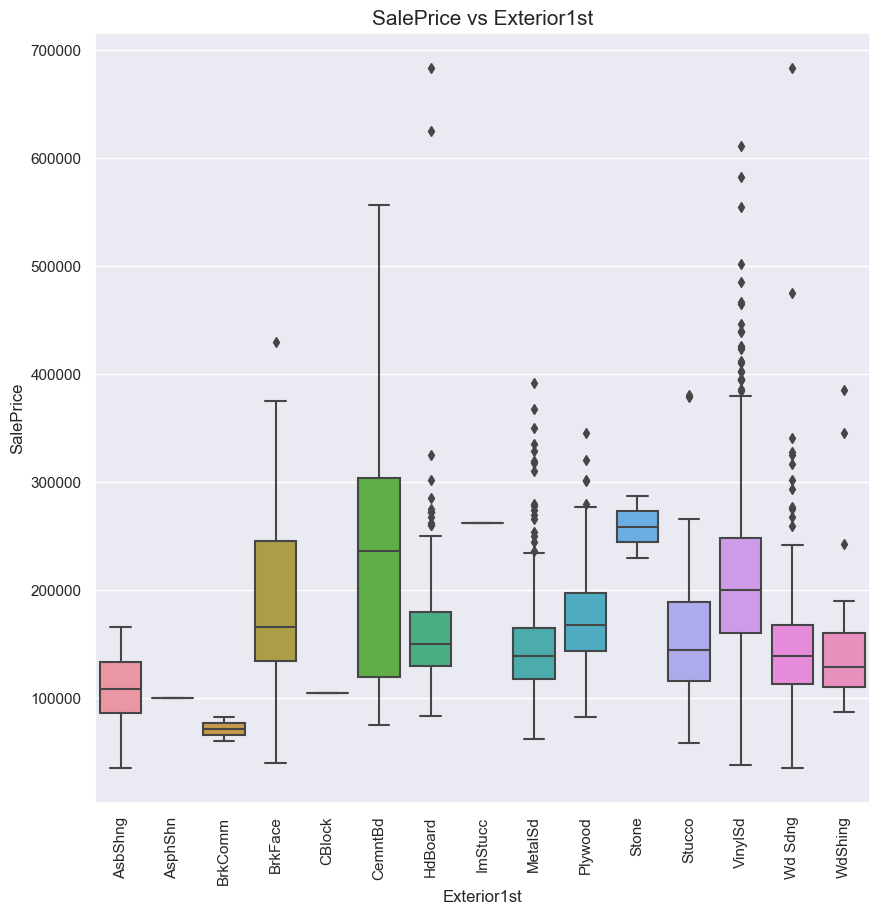

*******************************


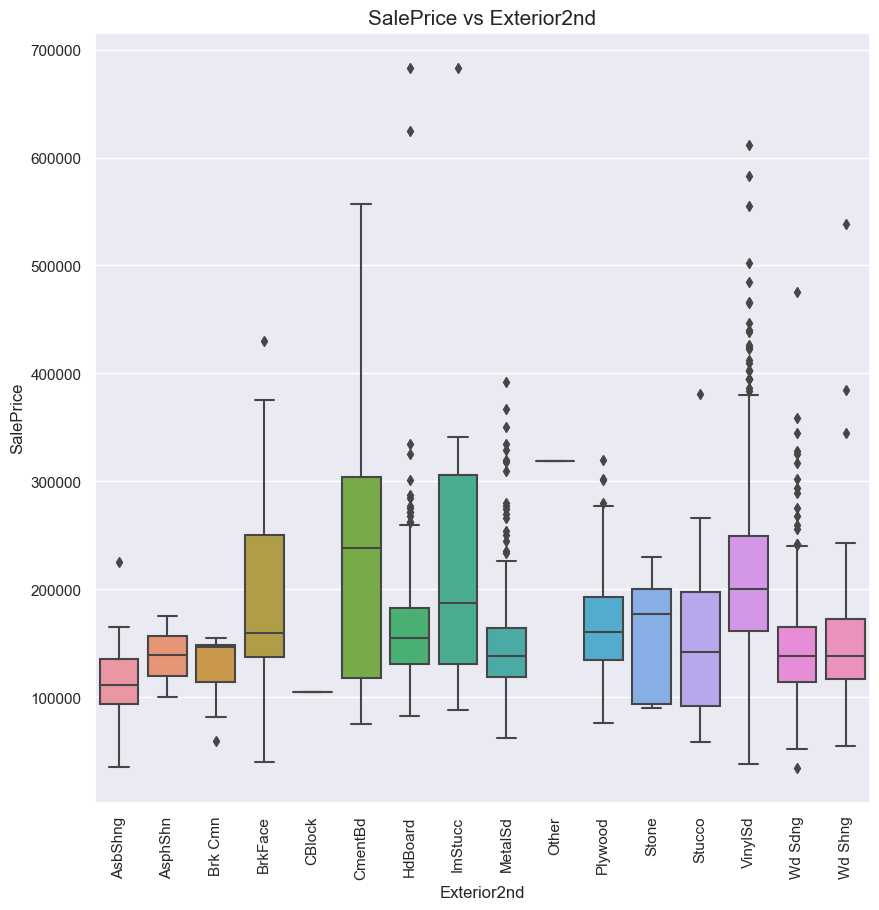

*******************************


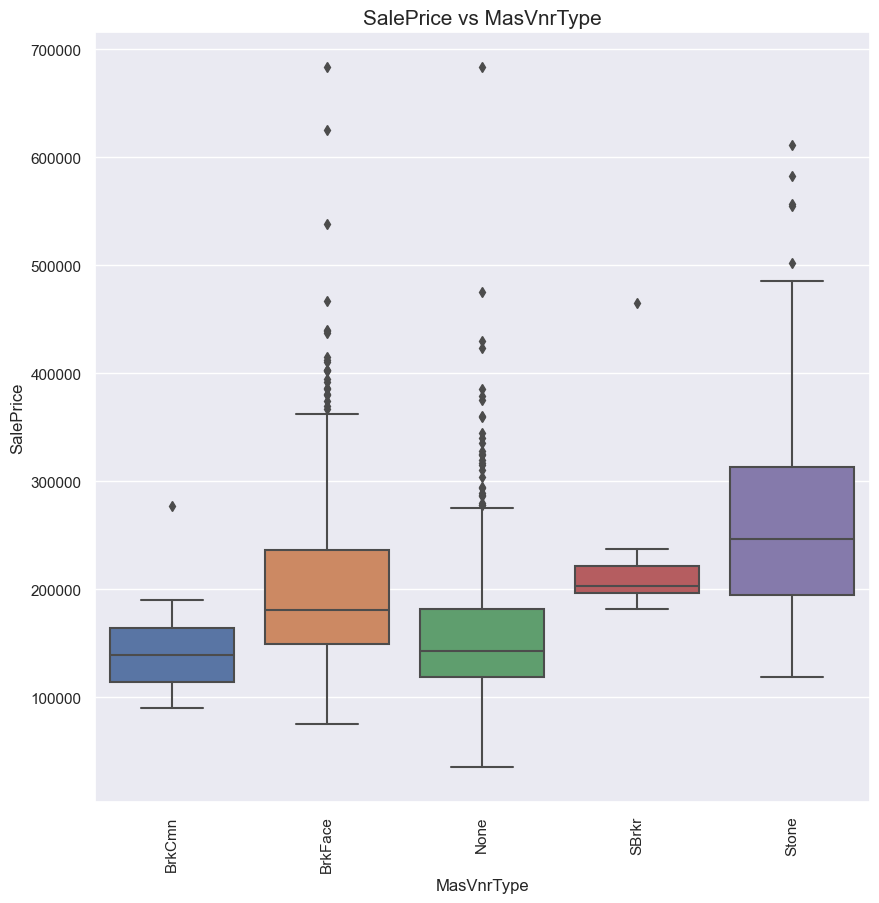

*******************************


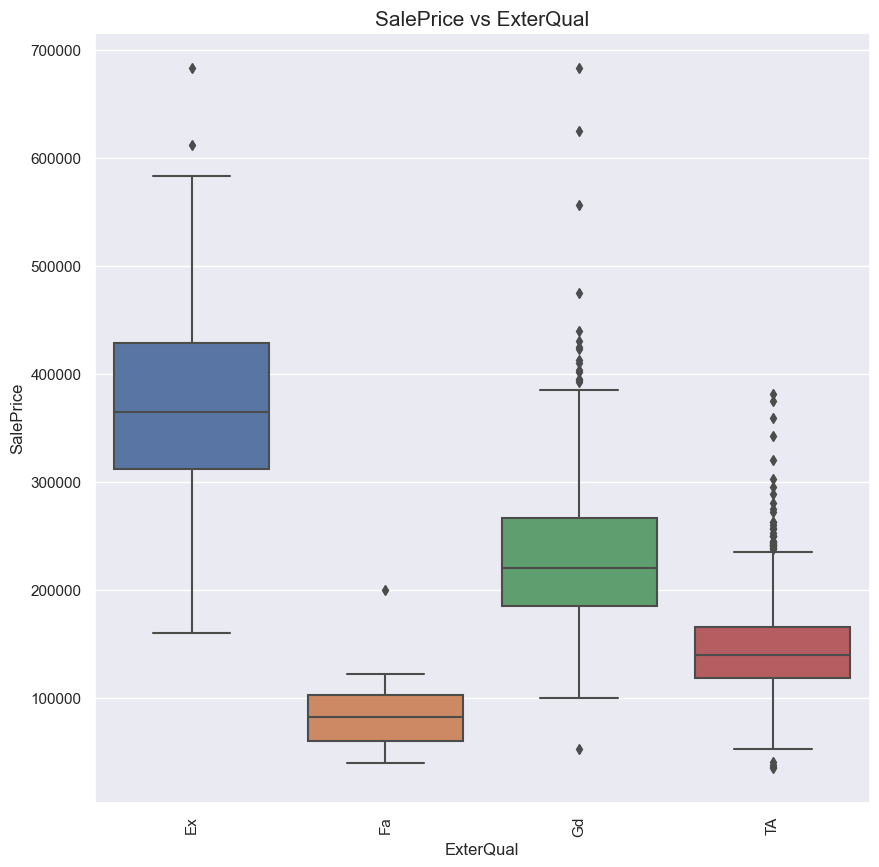

*******************************


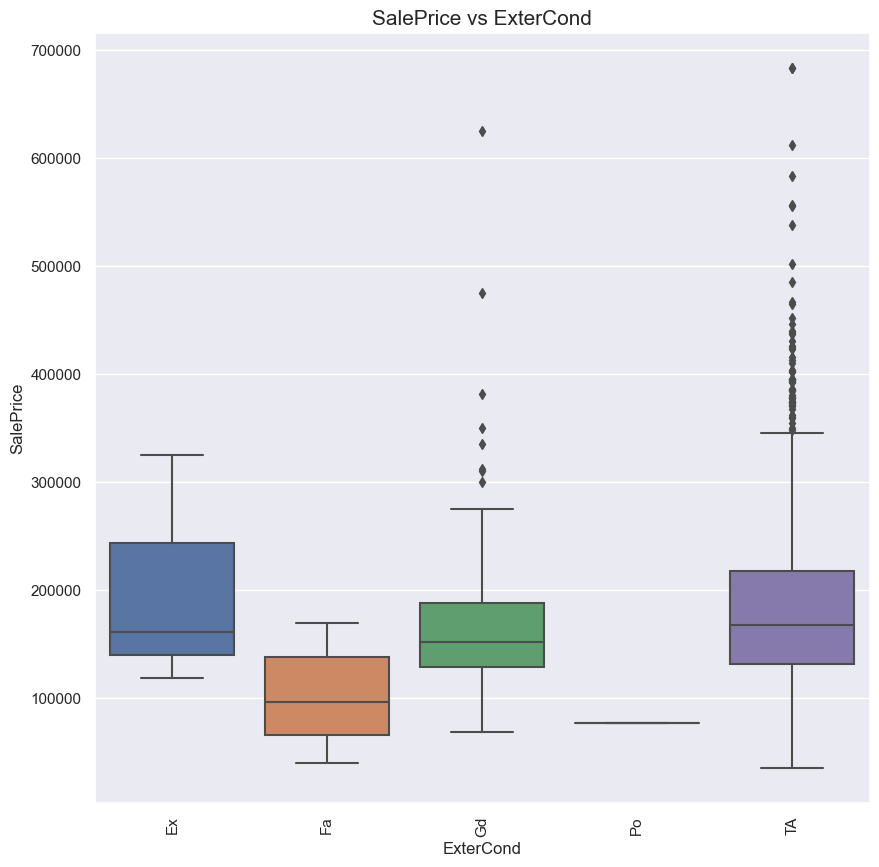

*******************************


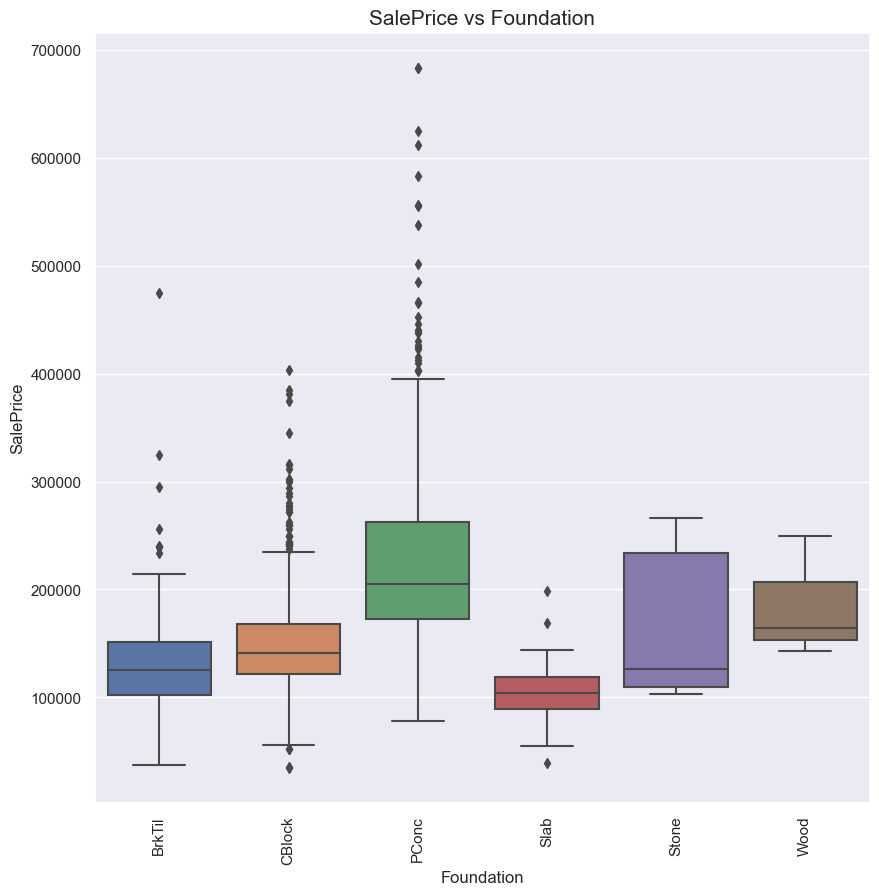

*******************************


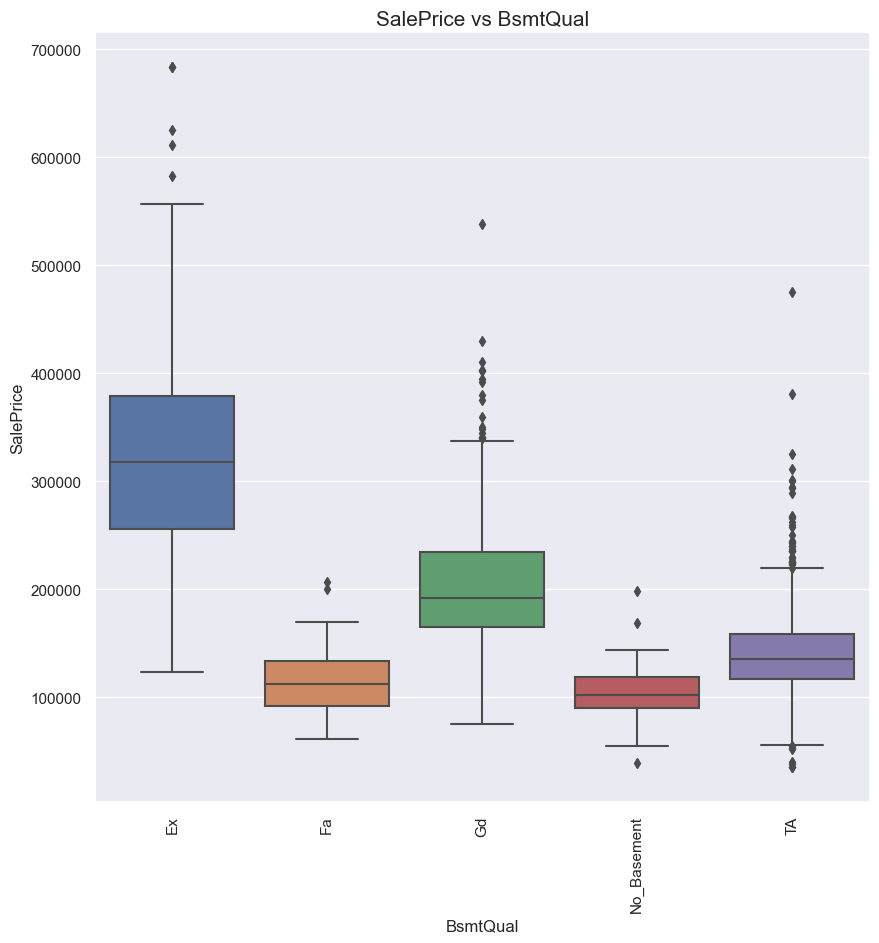

*******************************


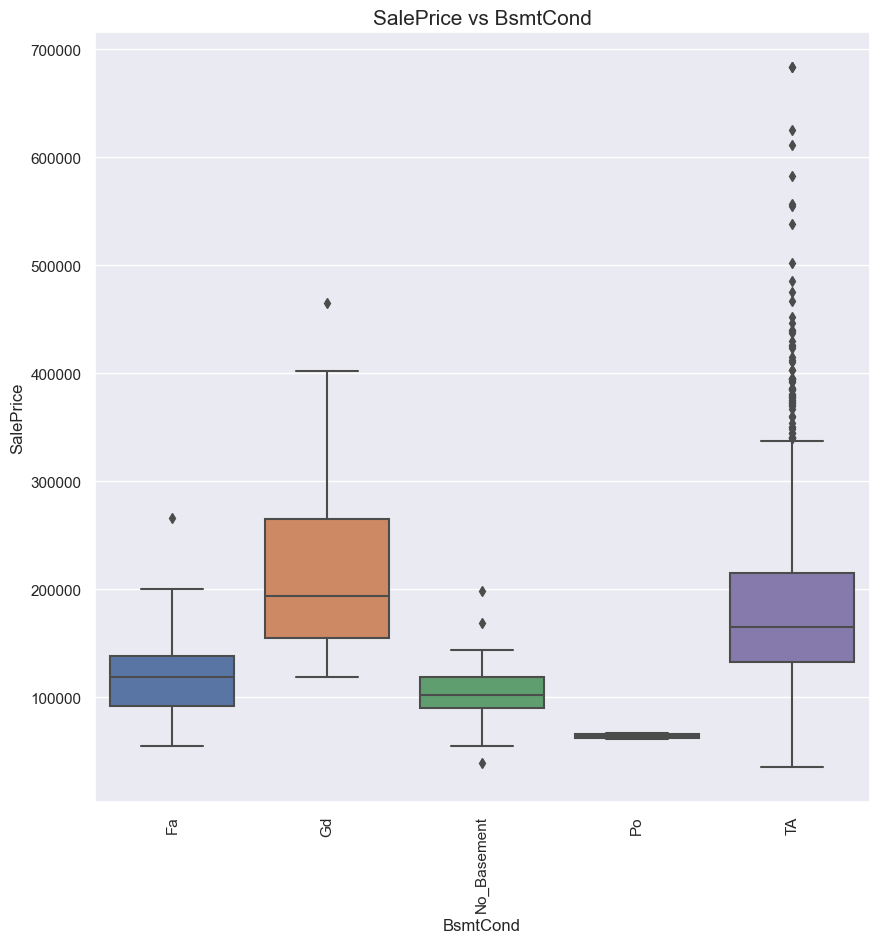

*******************************


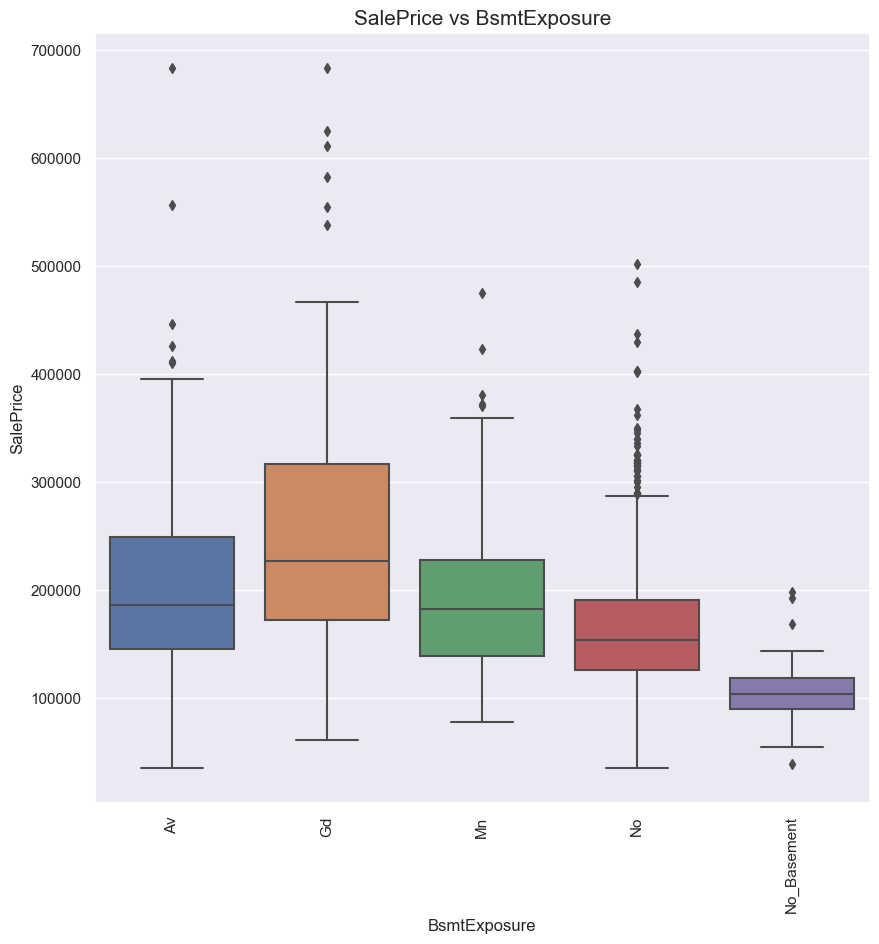

*******************************


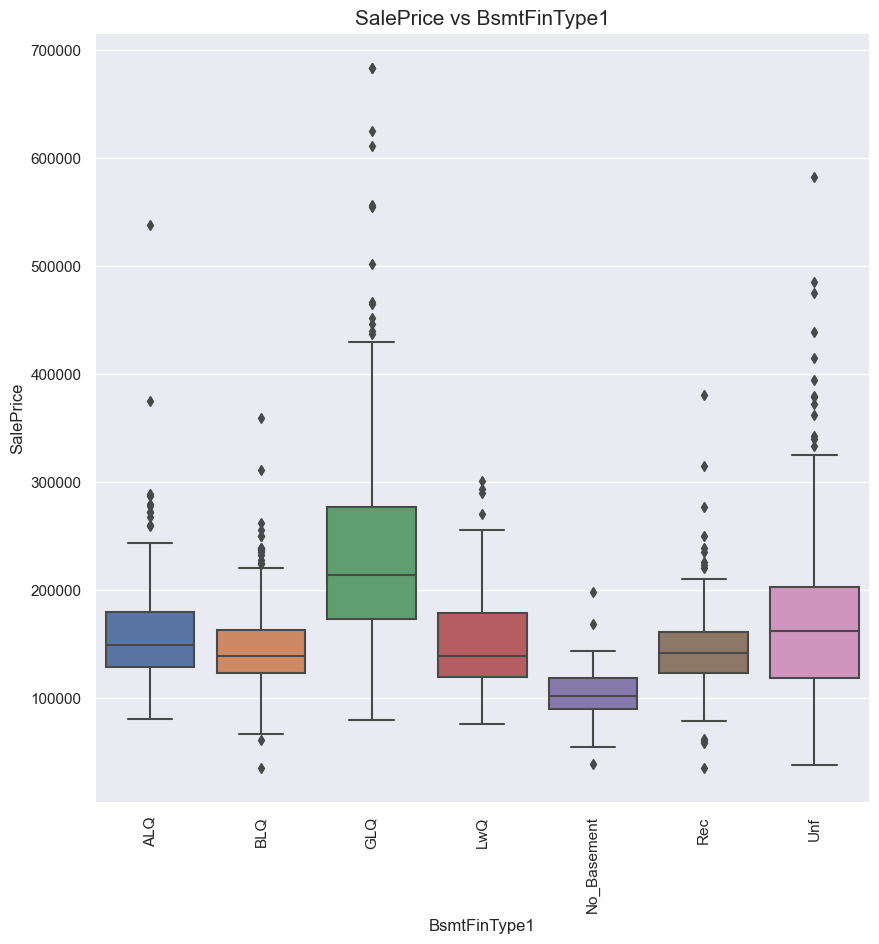

*******************************


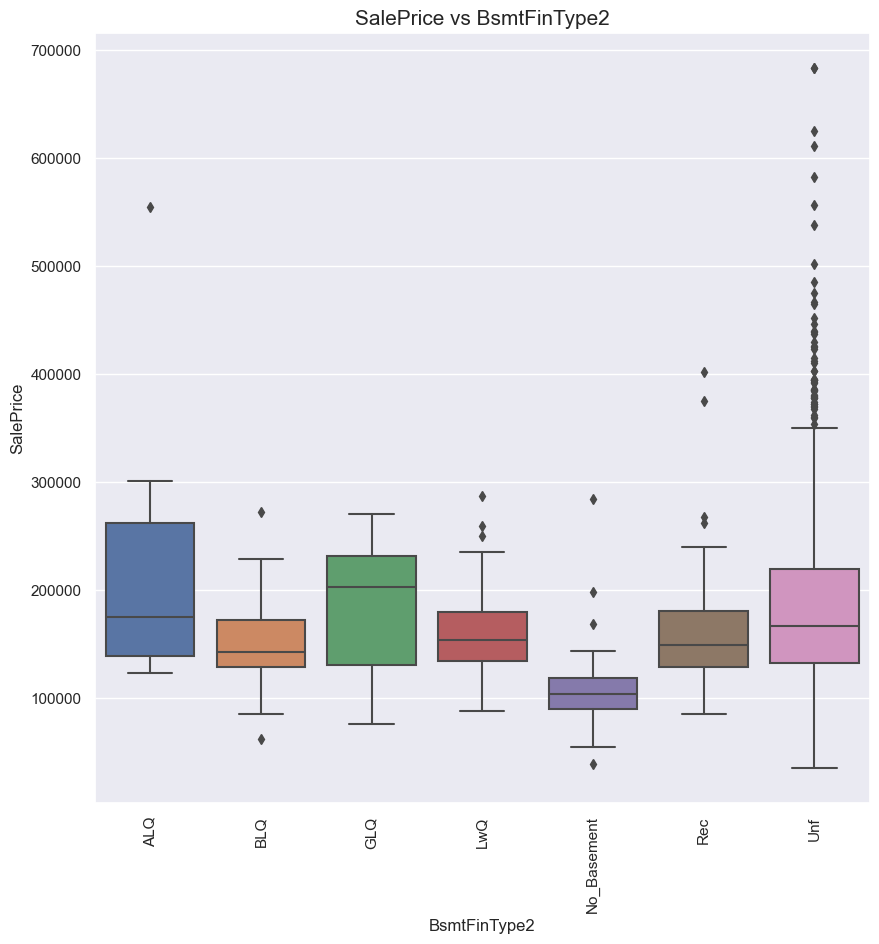

*******************************


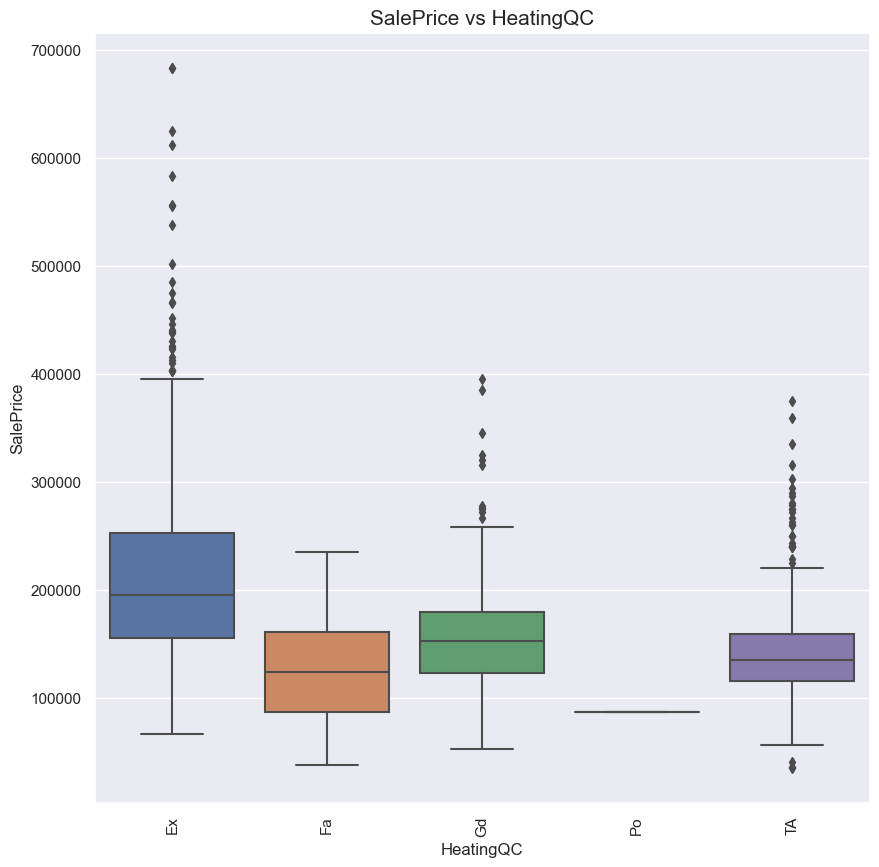

*******************************


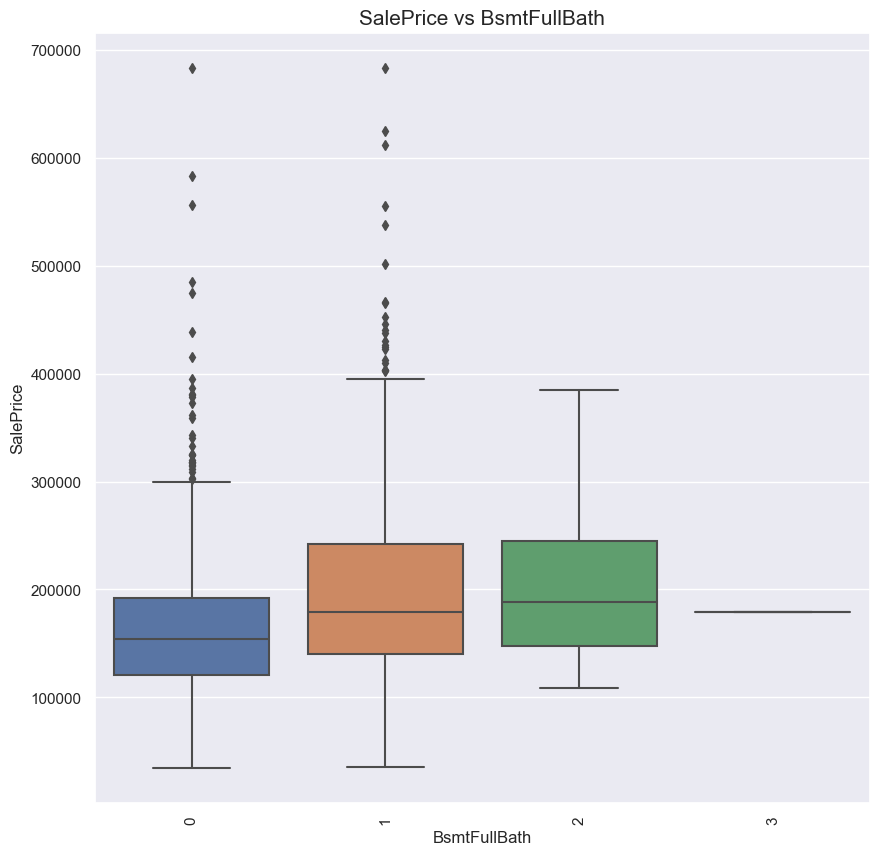

*******************************


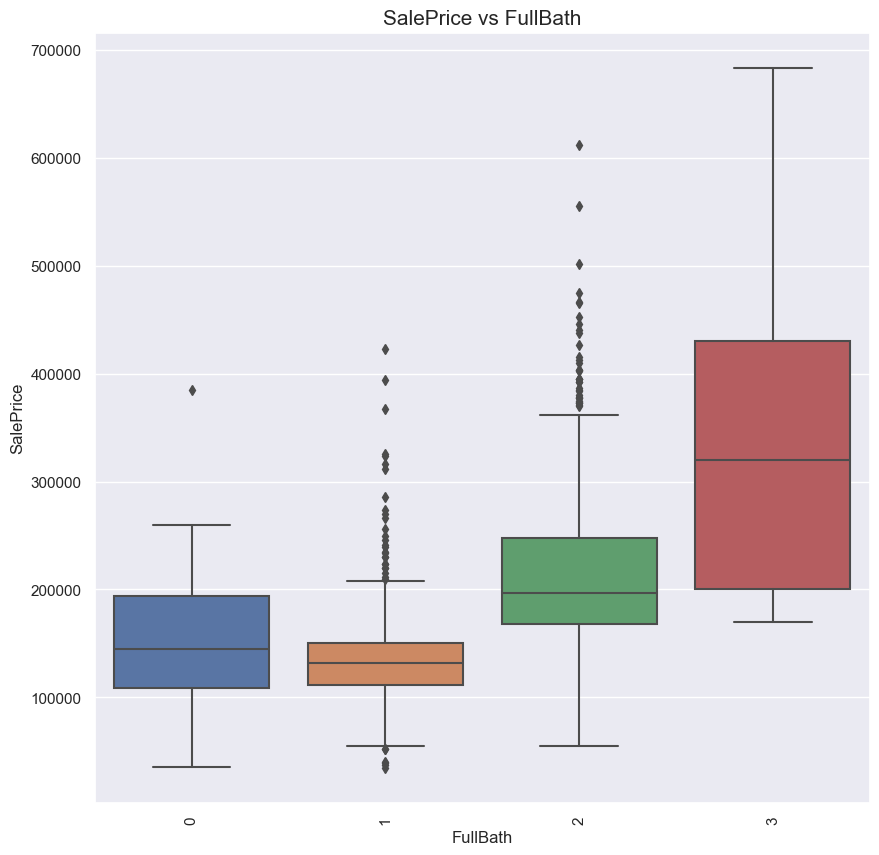

*******************************


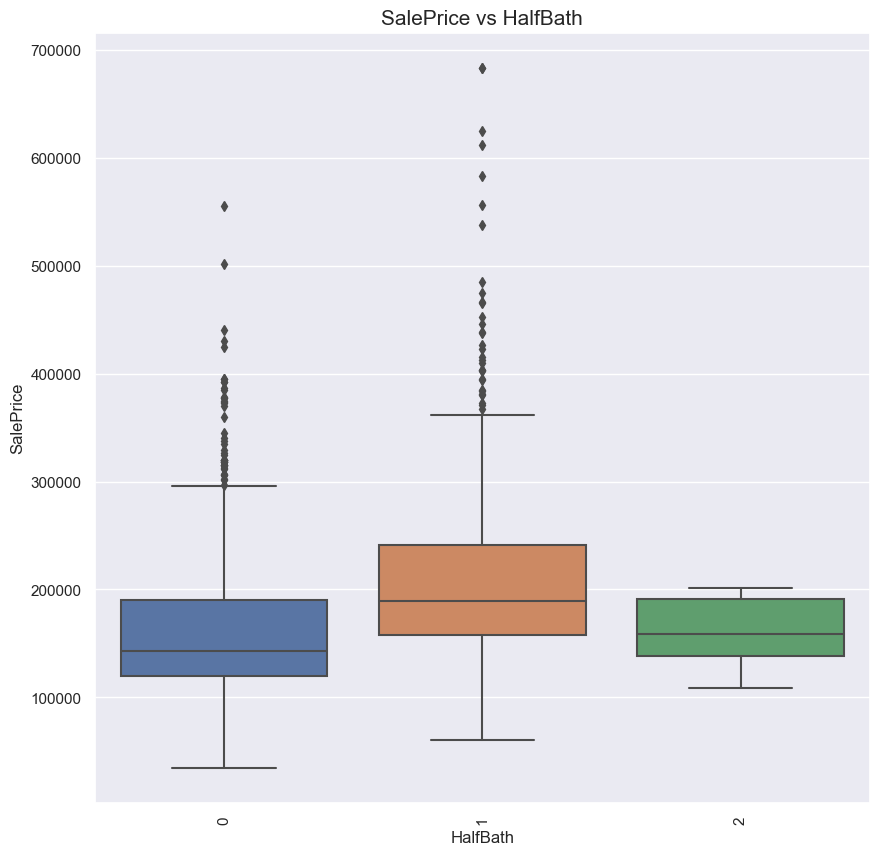

*******************************


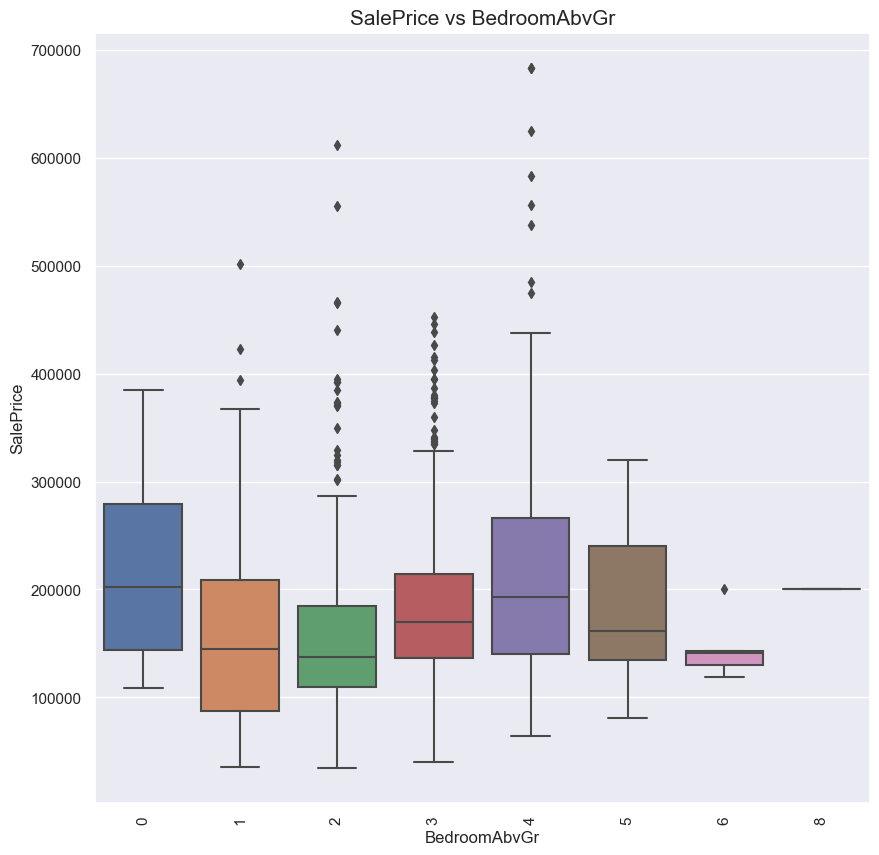

*******************************


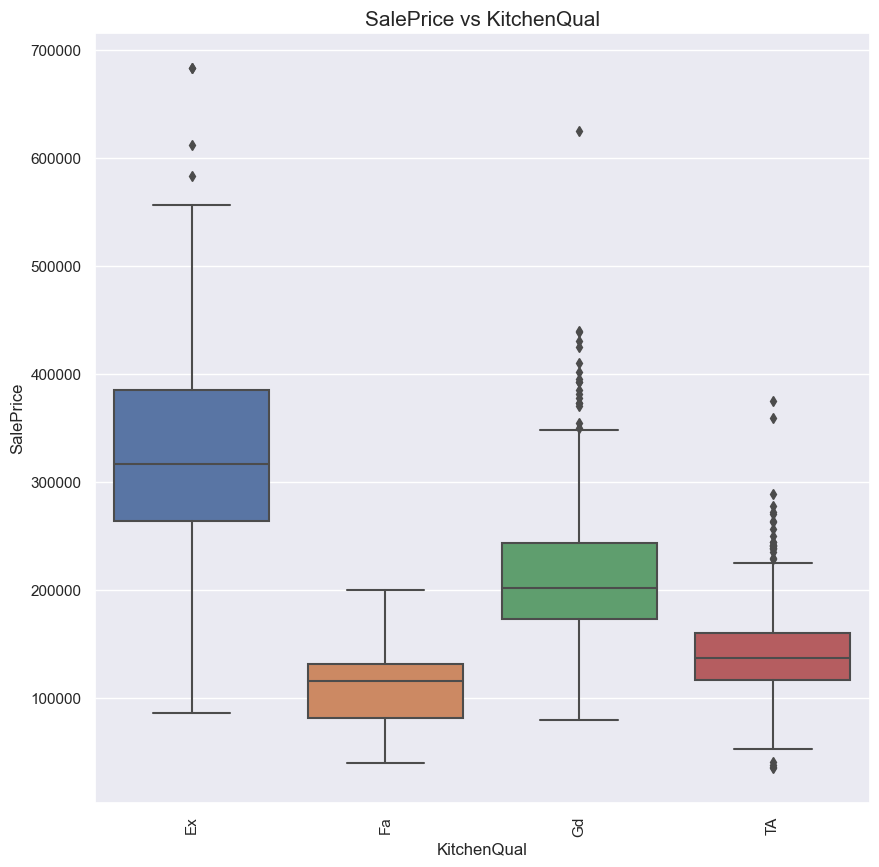

*******************************


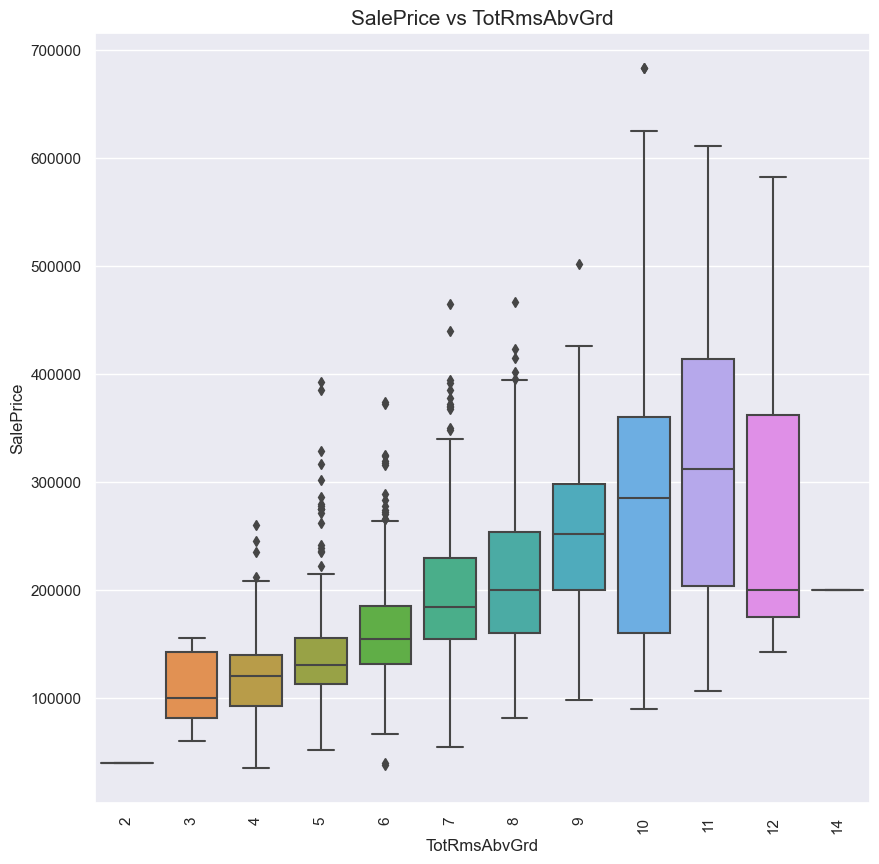

*******************************


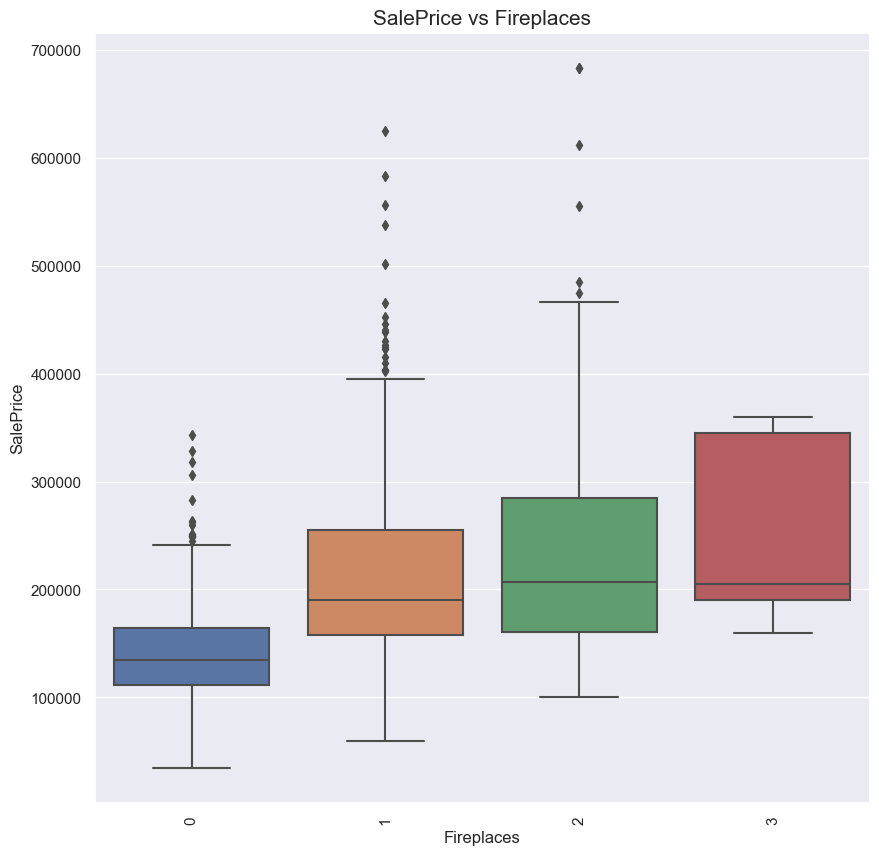

*******************************


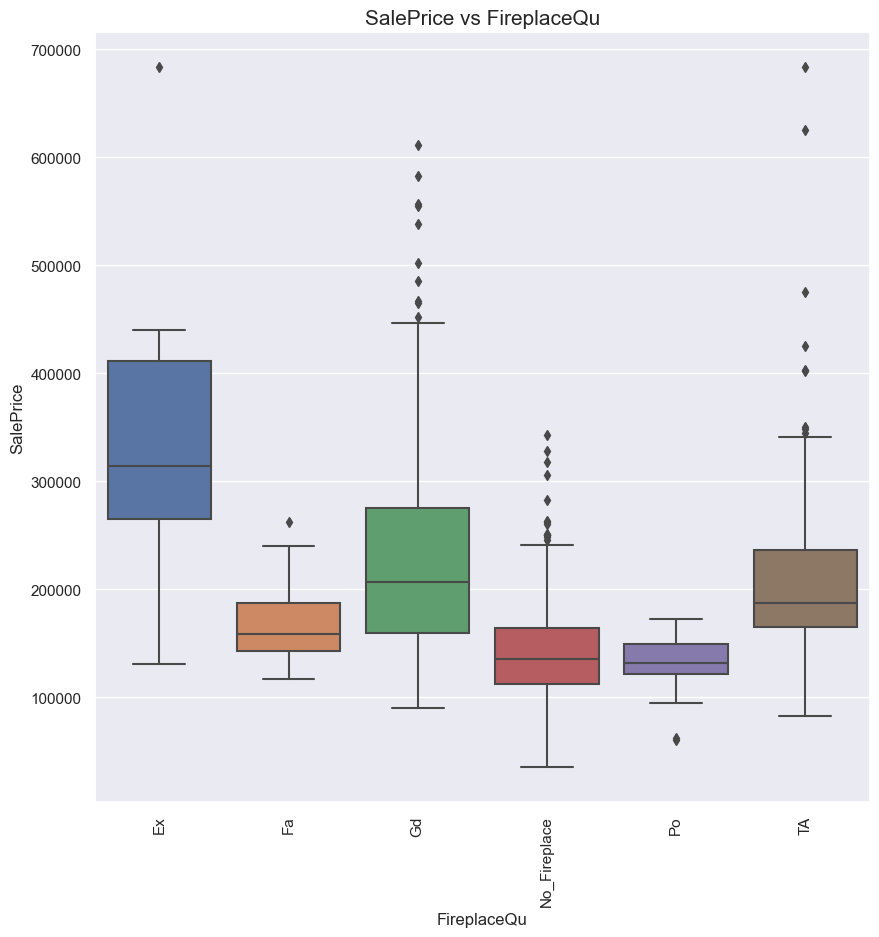

*******************************


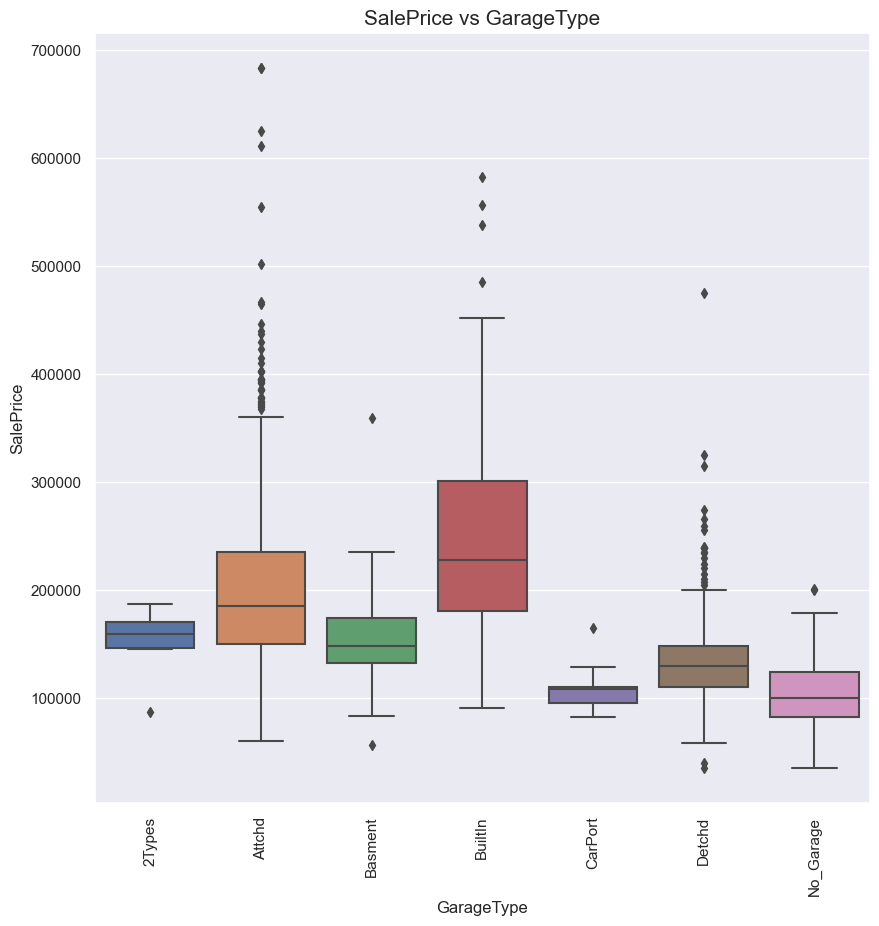

*******************************


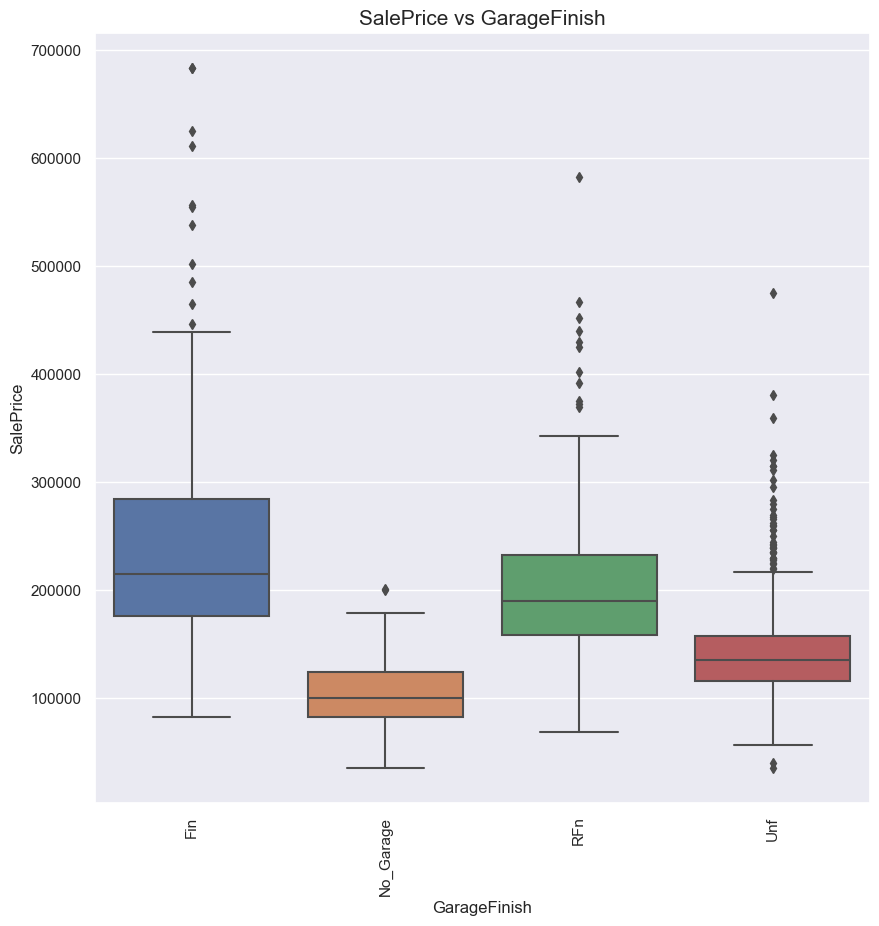

*******************************


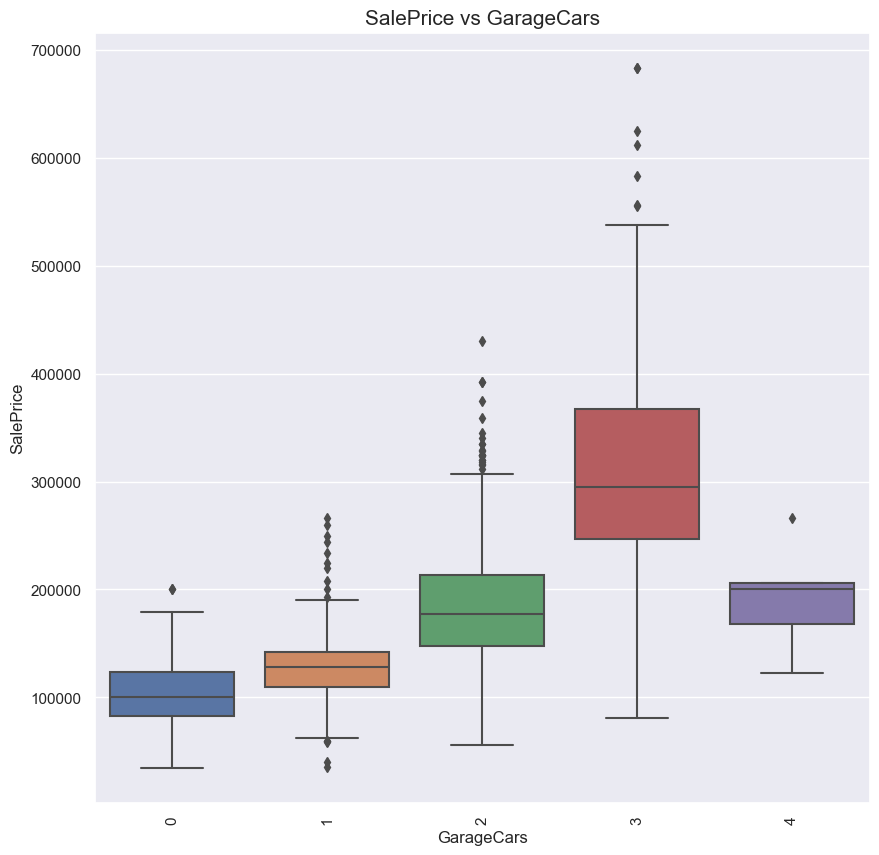

*******************************


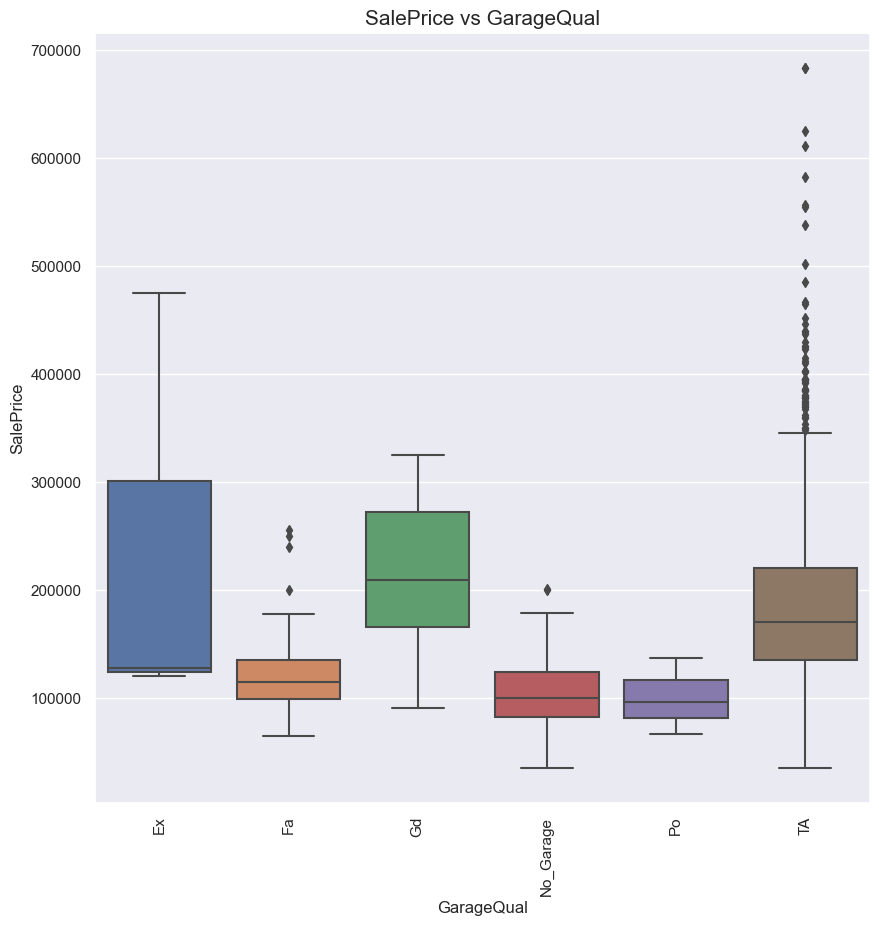

*******************************


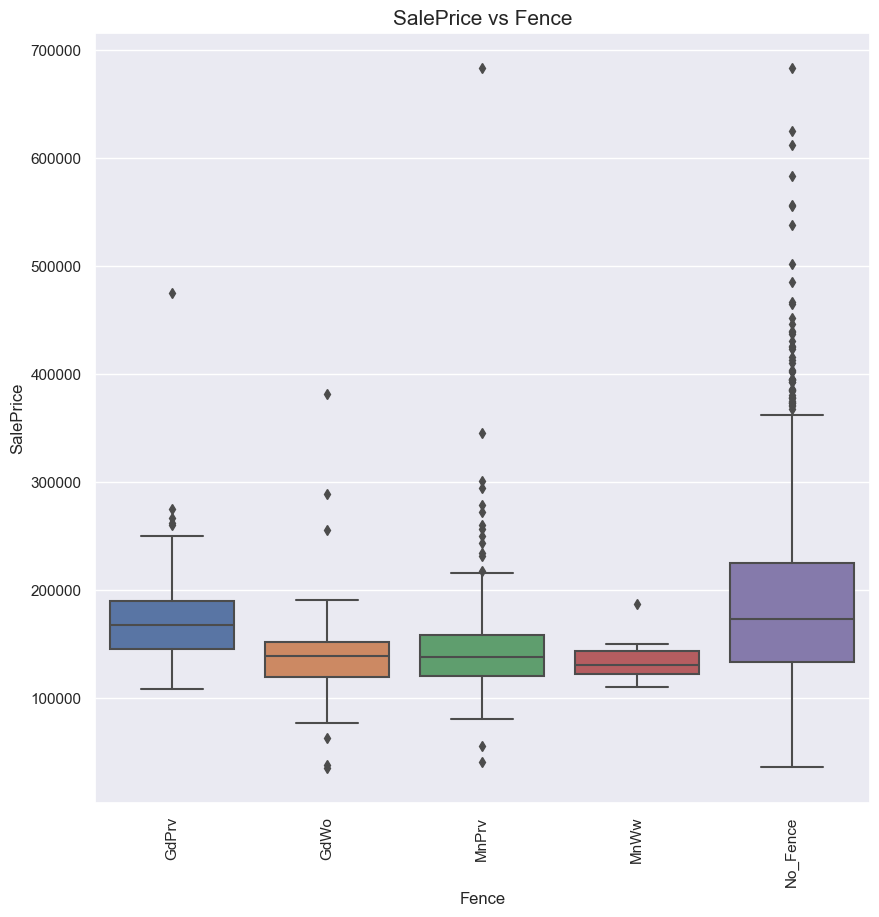

*******************************


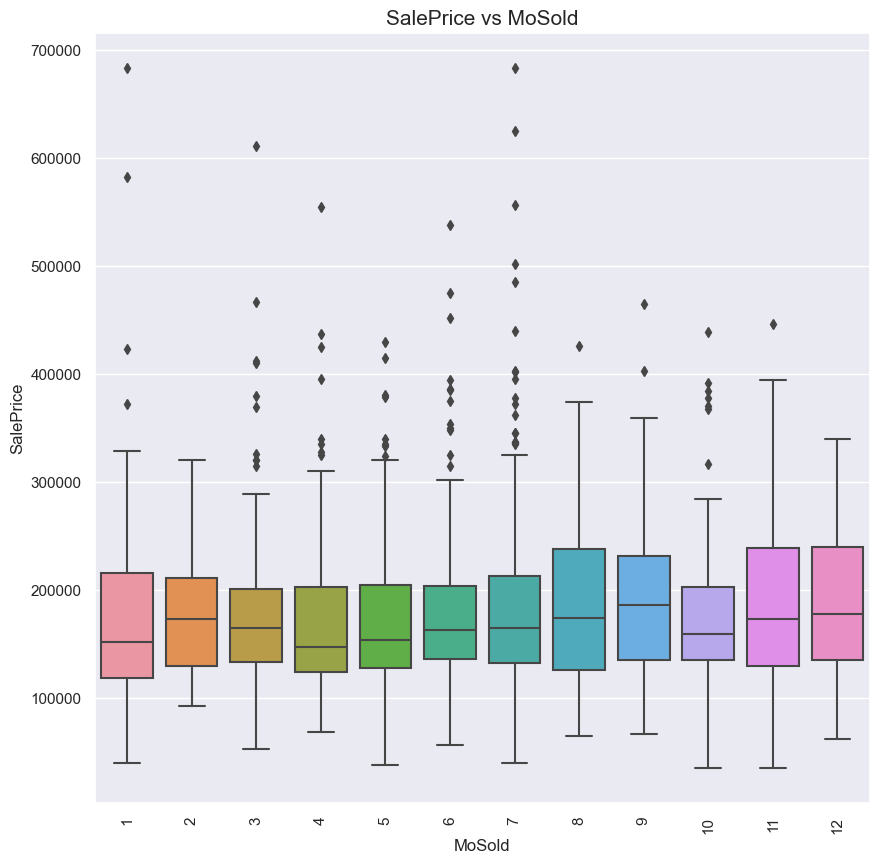

*******************************


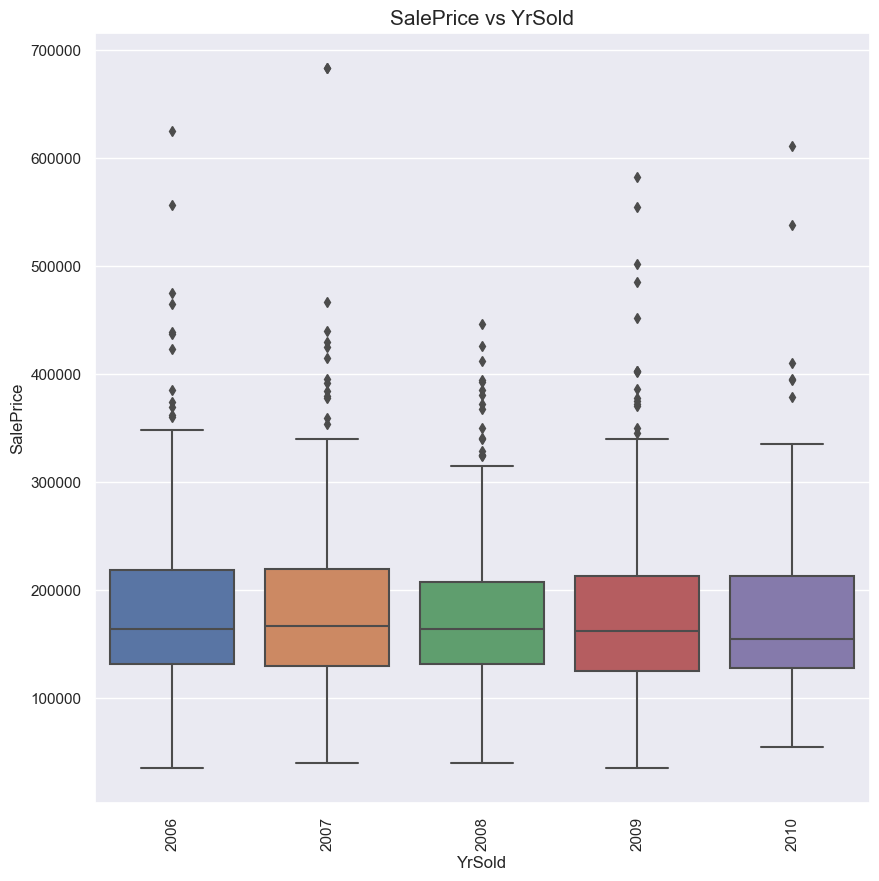

*******************************


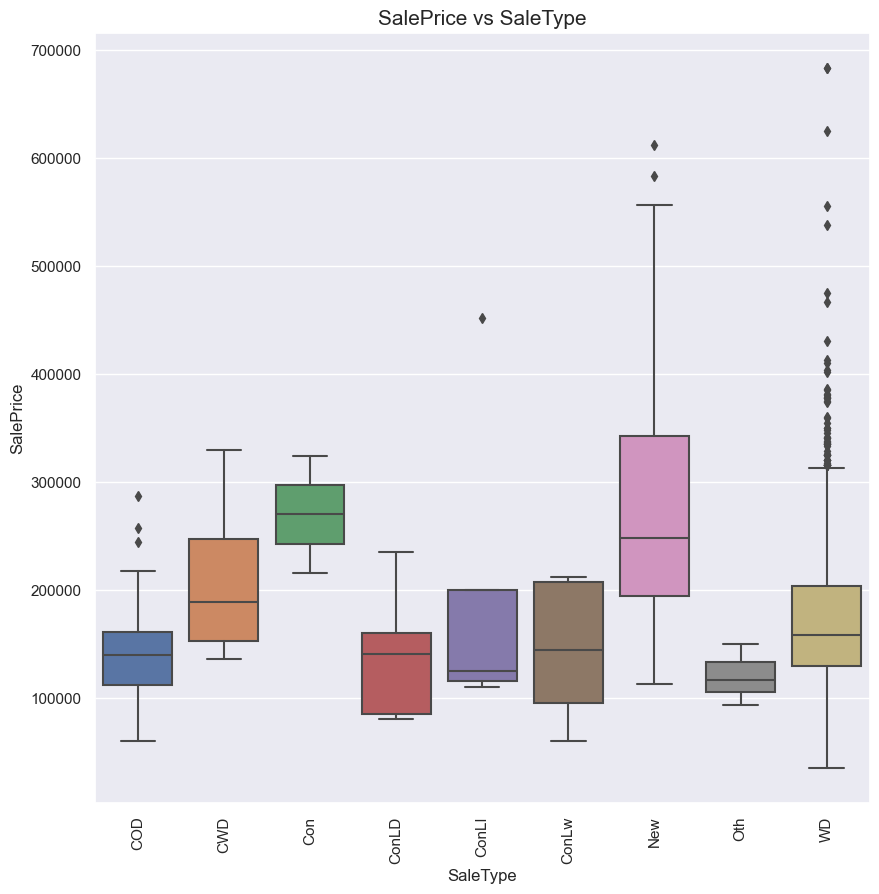

*******************************


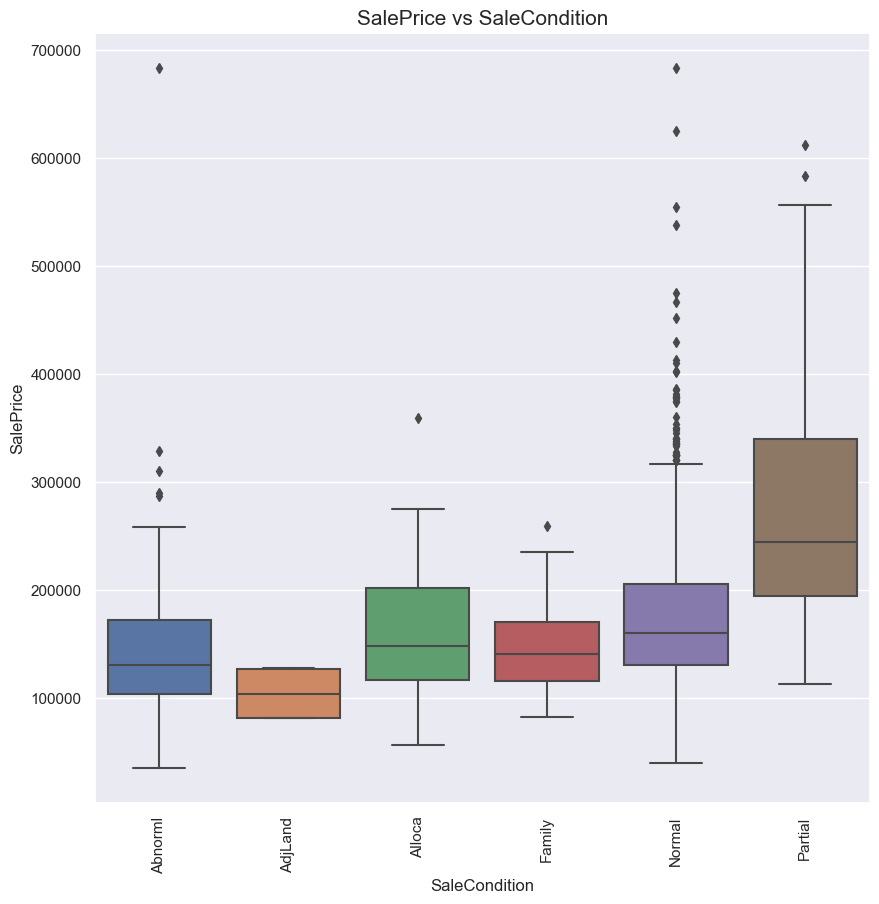

*******************************


In [51]:
for col in categorical:
    plot_box_cat(housing_df,col)

## Observations :
Bivariate Analysis on Categorical Columns:

- **MSSubClass**: Classes 20, 50, 75, and 120 exhibit higher SalePrice compared to other MSSubClass categories.
- **MSZoning**: RL and FV display higher SalePrice than other MSZoning categories.
- **LotShape**: IR2 and IR1 have slightly higher average SalePrice than other LotShape categories.
- **LandContour**: HLS shows slightly higher average SalePrice than other LandContour types.
- **LotConfig**: Homes in Cul-de-Sacs have slightly higher average SalePrice compared to other LotConfig options.
- **Neighborhood**: NoRidge, NridgHt, Timber, and StoneBr neighborhoods have higher SalePrice than other Neighborhoods.
- **Proximity Condition1**: PosN and RRNn conditions result in slightly higher SalePrice than other Proximity Condition1 options.
- **BldgType**: Single-family (1Fam) and townhouse end units (TwnhsE) have slightly higher SalePrice than other BldgType categories.
- **HouseStyle**: 2-story, 1-story, and 2.5-fin houses have higher SalePrice than other HouseStyle choices.
- **OverallQual**: SalePrice increases steeply with higher OverallQual ratings.
- **OverallCond**: SalePrice tends to increase with higher OverallCond ratings.
- **RoofStyle**: There is no significant effect of RoofStyle on SalePrice.
- **Exterior1st**: Homes with VinylSd, CemntBd, and Stone exteriors have higher SalePrice than others.
- **Exterior2nd**: Similar to Exterior1st, homes with VinylSd, CemntBd, and ImStucc exteriors have higher SalePrice.
- **MasVnrType**: Houses with Stone and SBrkr veneer types have higher average SalePrice than other MasVnrType categories.
- **ExterQual**: ExterQual 'Ex' corresponds to significantly higher SalePrice than other ExterQual ratings.
- **ExterCond**: No discernible impact of ExterCond on SalePrice.
- **Foundation**: Homes with PConc foundations tend to have higher average SalePrice.
- **BsmtQual**: 'Ex' and 'Gd' ratings for BsmtQual result in significantly higher SalePrice.
- **BsmtCond**: 'TA' and 'Gd' ratings for BsmtCond lead to higher SalePrice.
- **BsmtExposure**: Homes with 'Gd' BsmtExposure exhibit higher SalePrice.
- **BsmtFinType1**: 'GLQ' BsmtFinType1 has higher SalePrice than other options.
- **BsmtFinType2**: 'GLQ' BsmtFinType2 corresponds to higher SalePrice than other choices.
- **HeatingQC**: SalePrice decreases as HeatingQC becomes poorer in quality.
- **BsmtFullBath**: No significant effect of BsmtFullBath on SalePrice.
- **FullBath**: Homes with 2 and 3 FullBaths have significantly higher SalePrice.
- **HalfBath**: Homes with 1 HalfBath show slightly higher average SalePrice.
- **BedroomAbvGr**: Homes with 0 and 4 bedrooms tend to have slightly higher average SalePrice.
- **KitchenQual**: 'Ex' KitchenQual results in significantly higher SalePrice.
- **TotRmsAbvGrd**: SalePrice tends to increase with higher TotRmsAbvGrd values.
- **Fireplaces**: As the number of Fireplaces increases, SalePrice also tends to increase.
- **FireplaceQu**: 'Ex' FireplaceQu corresponds to significantly higher SalePrice.
- **GarageType**: Homes with 'Attchd' and 'BuiltIn' garage types have higher SalePrice than others.
- **GarageFinish**: Homes with 'Fin' GarageFinish exhibit higher SalePrice.
- **GarageCars**: SalePrice tends to increase with the number of GarageCars, except for 4.
- **GarageQual**: 'Gd' and 'Ex' GarageQual ratings lead to higher SalePrice.
- **Fence**: No discernible impact of Fence on SalePrice.
- **MoSold**: No significant effect of MoSold on SalePrice.
- **YrSold**: No significant effect of YrSold on SalePrice.
- **SaleType**: Homes with 'New,' 'CWD,' and 'Con' SaleTypes tend to have higher SalePrice.
- **SaleCondition**: 'Partial' SaleCondition corresponds to significantly higher SalePrice than other SaleCondition categories.

In [52]:
def box_plot_conti(df,col):
    plt.figure(figsize=(10,10))
    bin = pd.cut(df[col], 10)
    sns.boxplot(x=bin,y=df["SalePrice"])#Box Plot
    plt.title("SalePrice vs "+col, fontsize = 15)
    plt.xticks(rotation=90)
    plt.show()
    print("******************************")

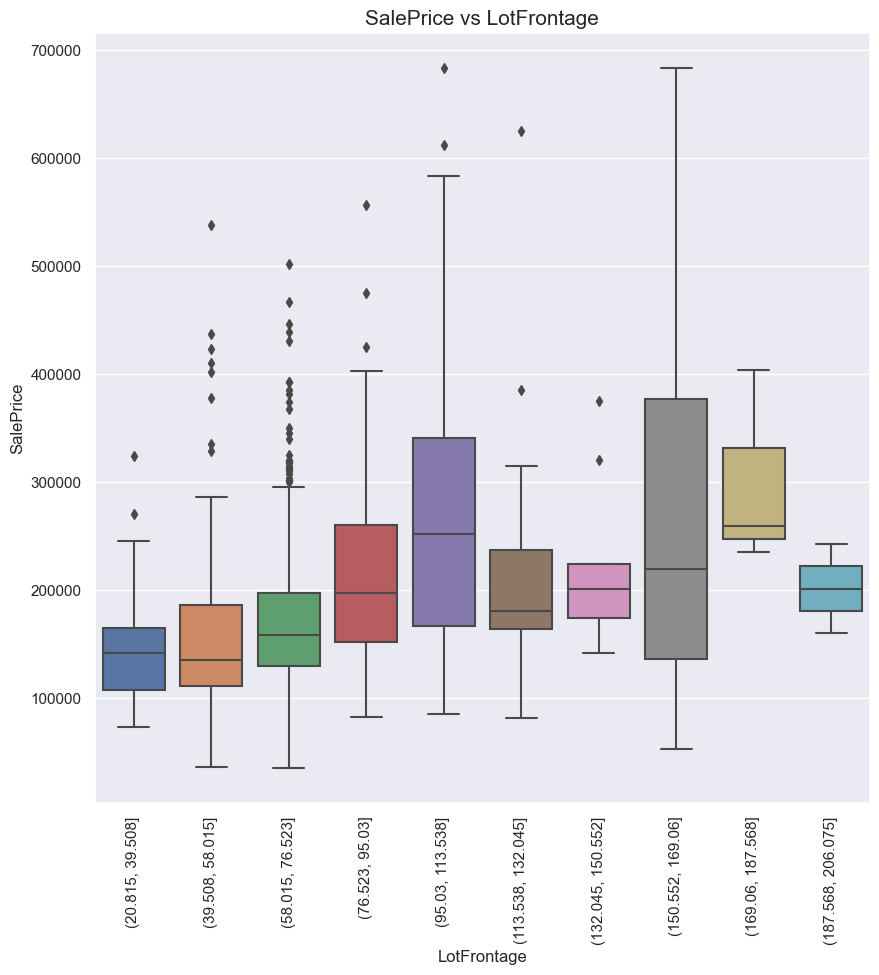

******************************


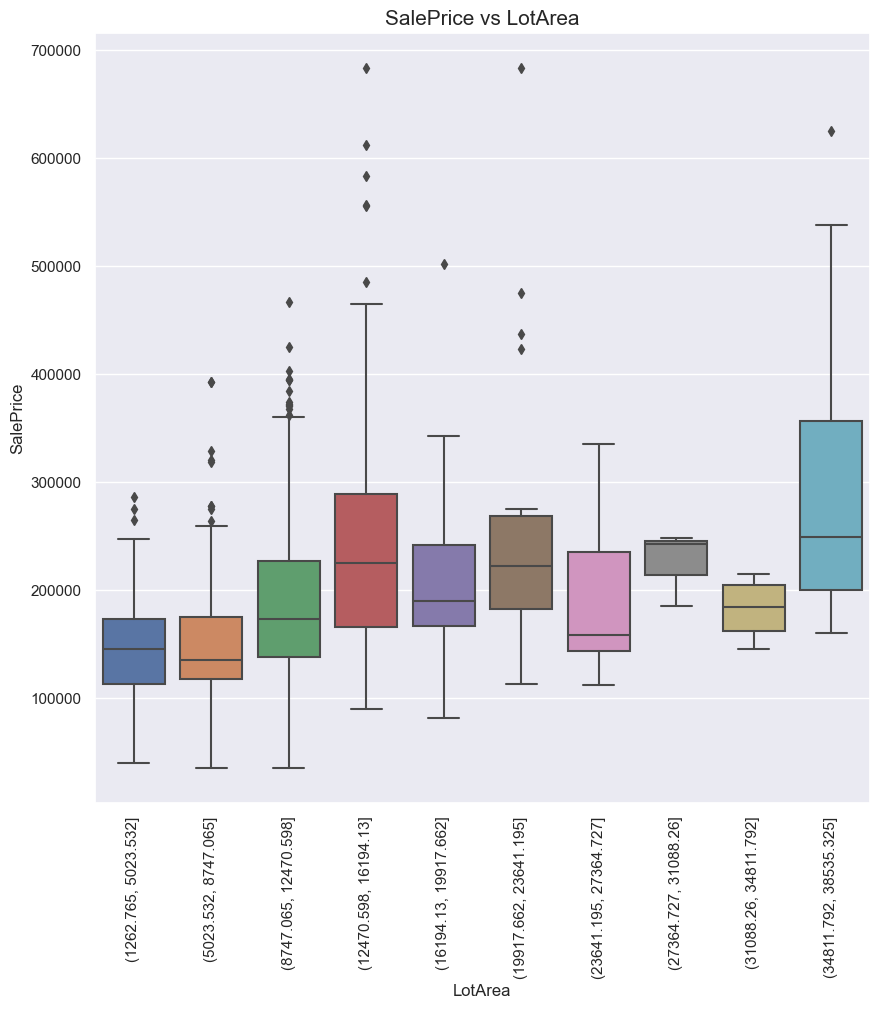

******************************


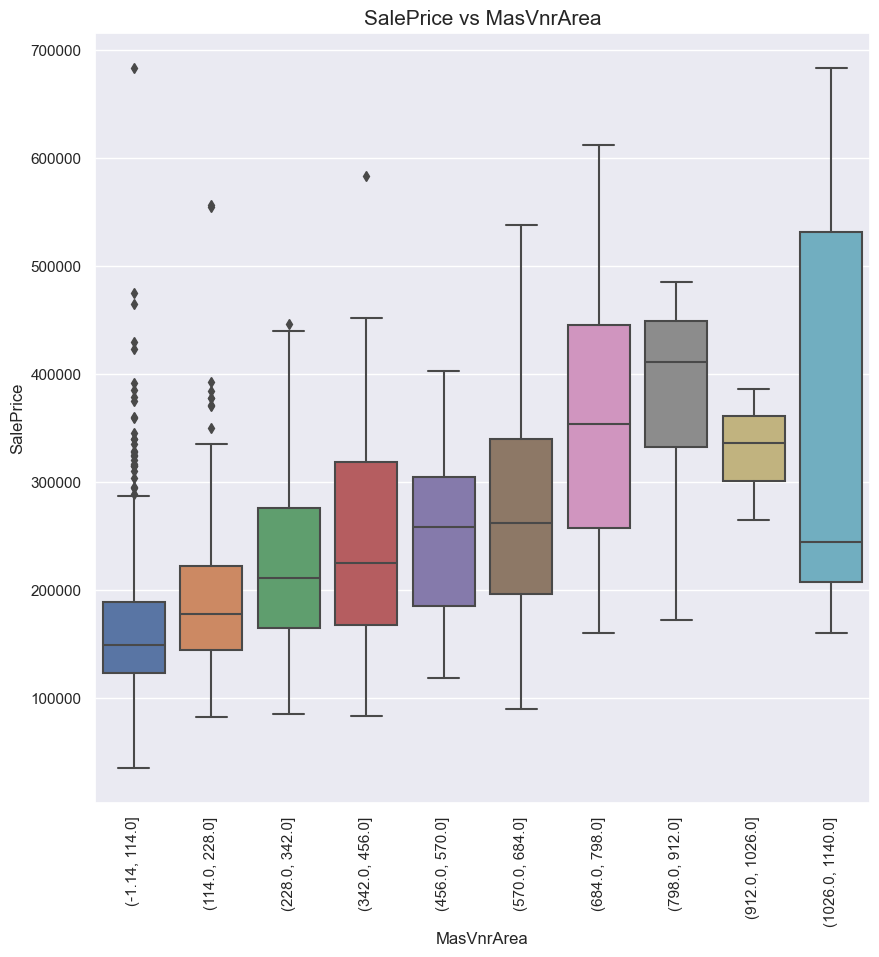

******************************


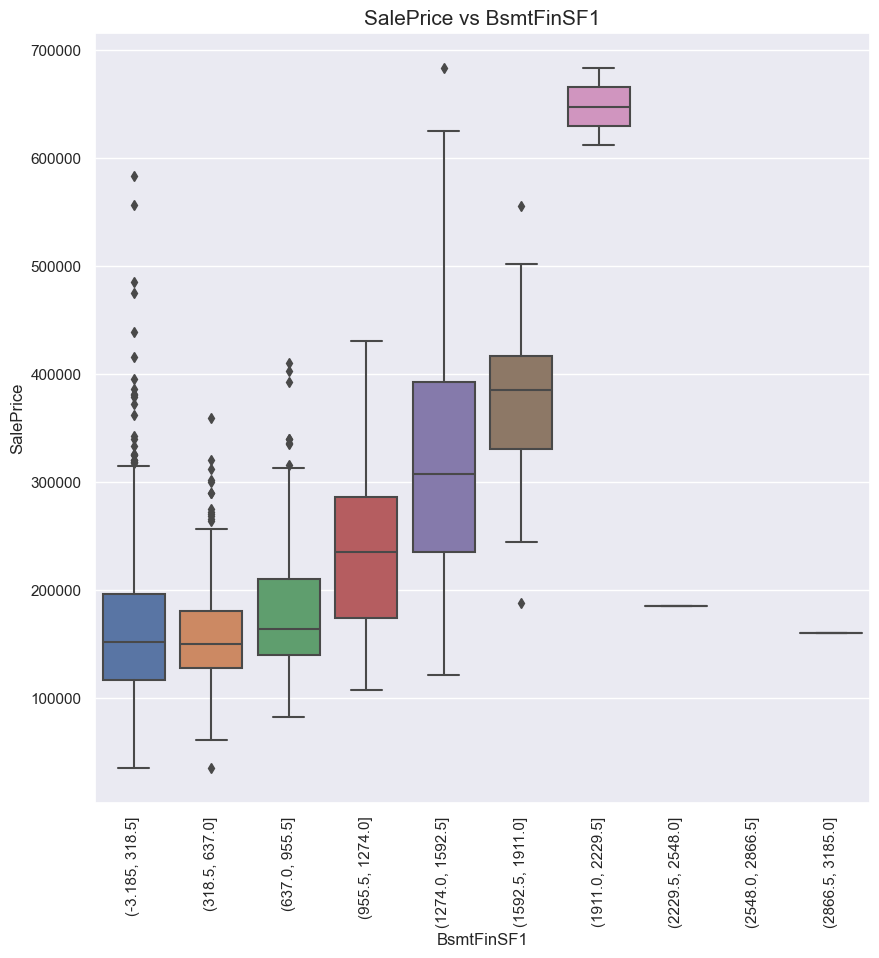

******************************


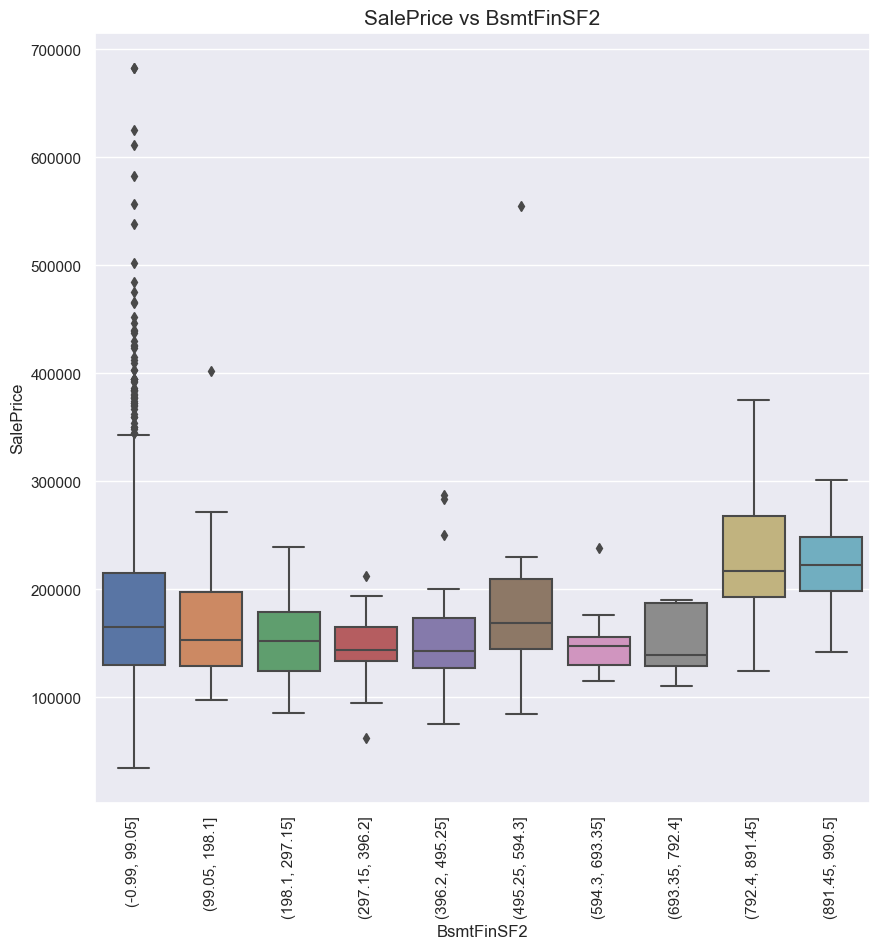

******************************


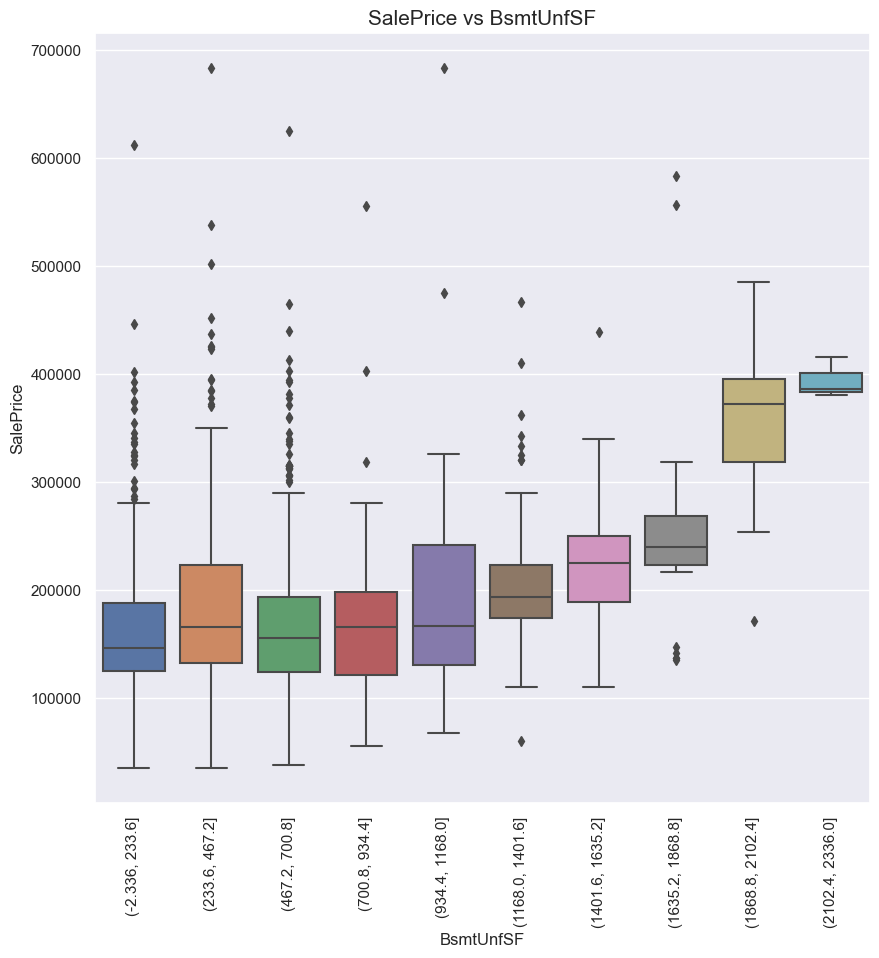

******************************


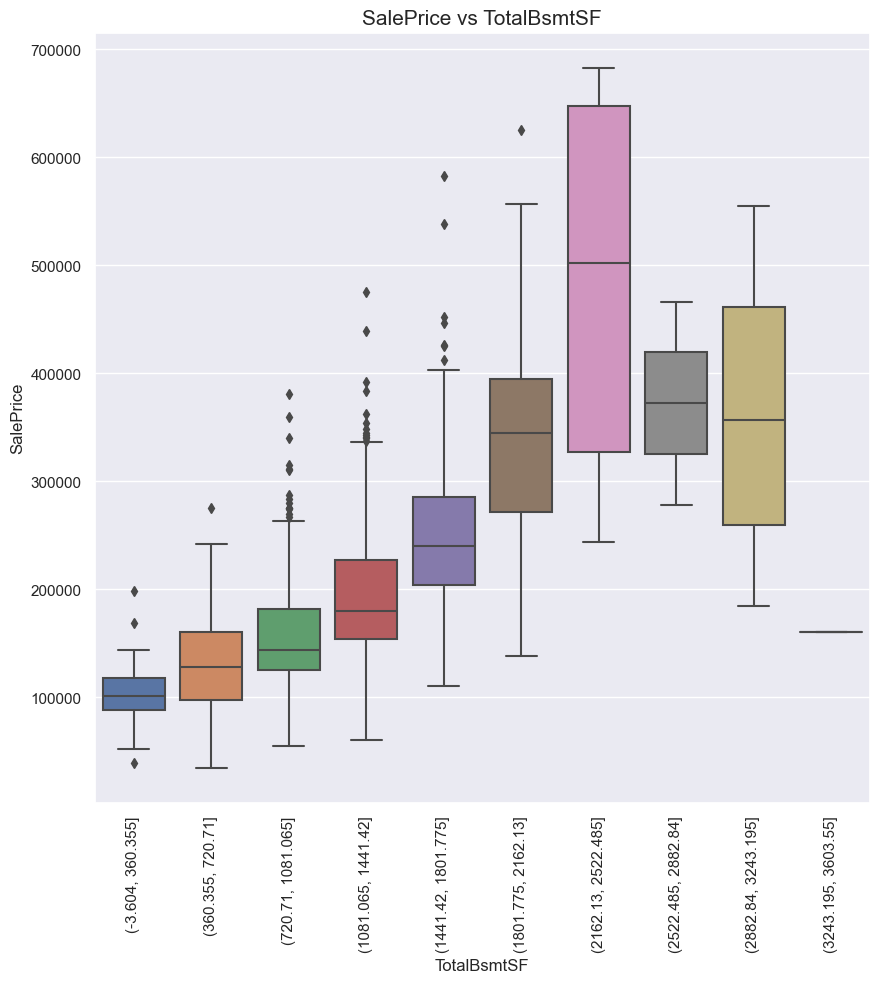

******************************


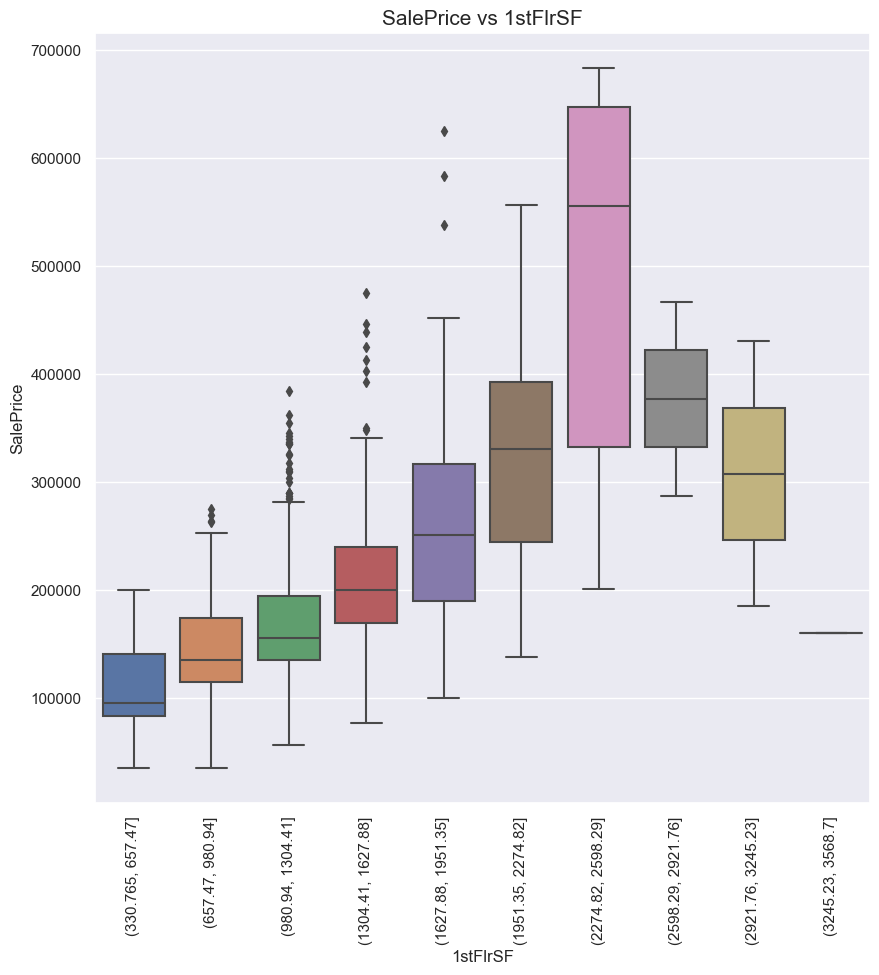

******************************


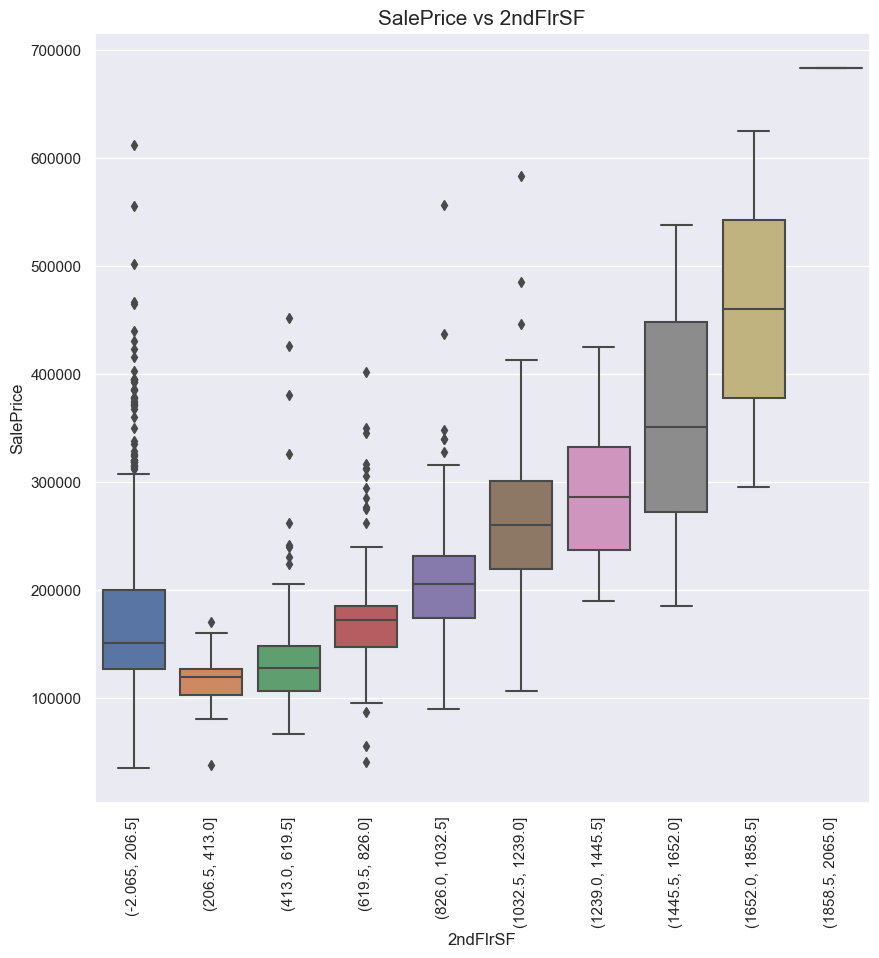

******************************


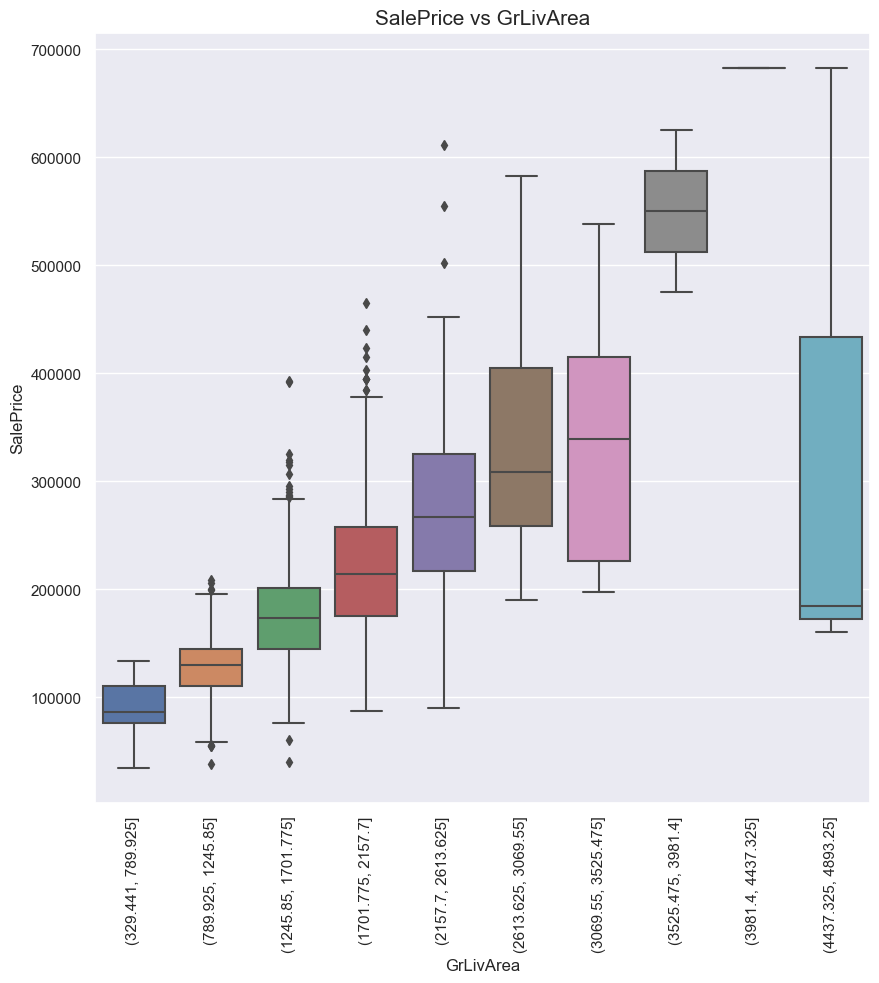

******************************


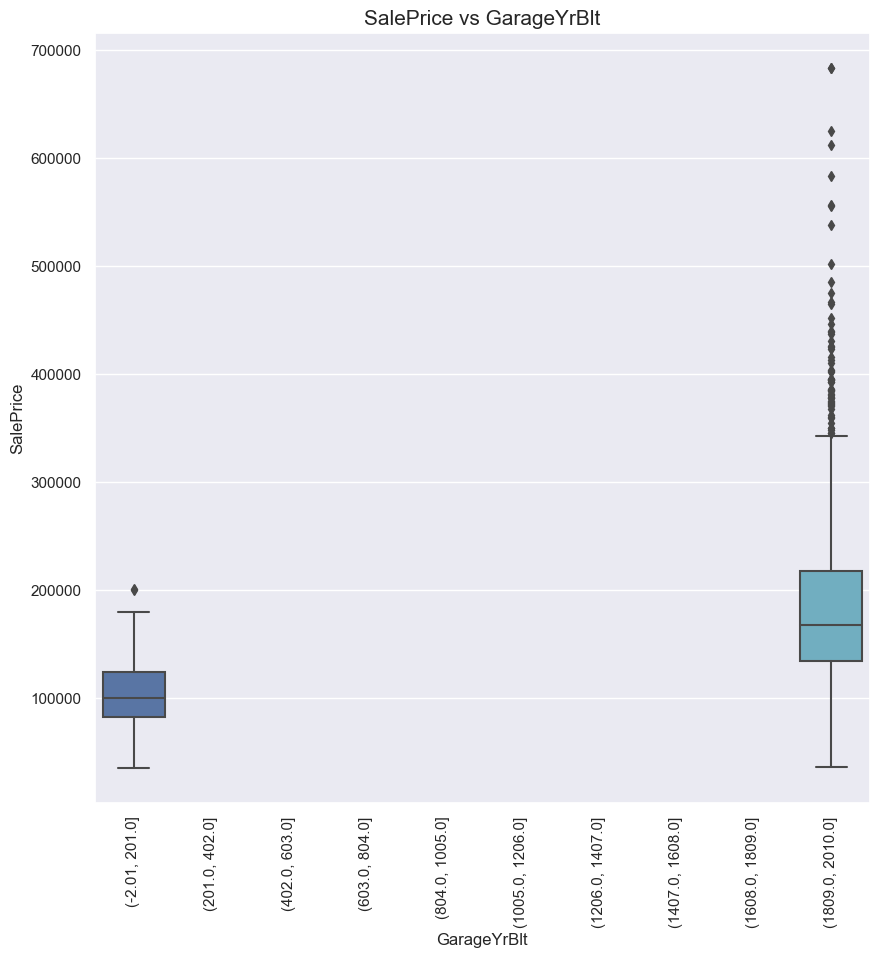

******************************


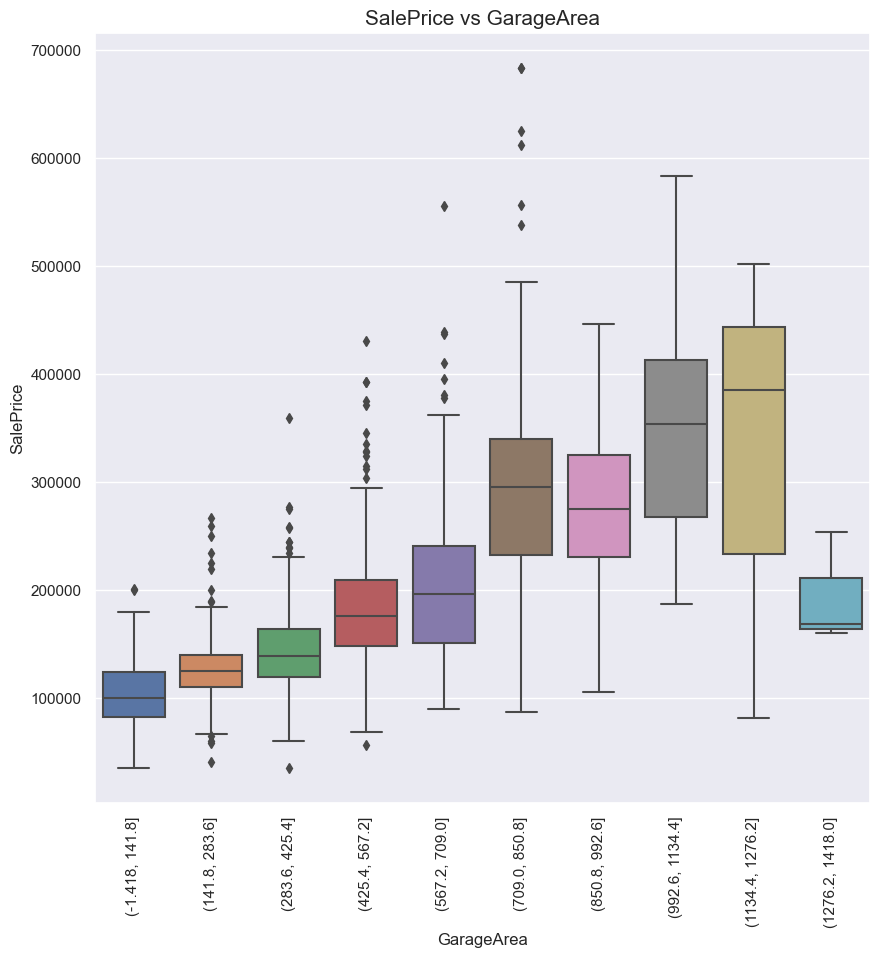

******************************


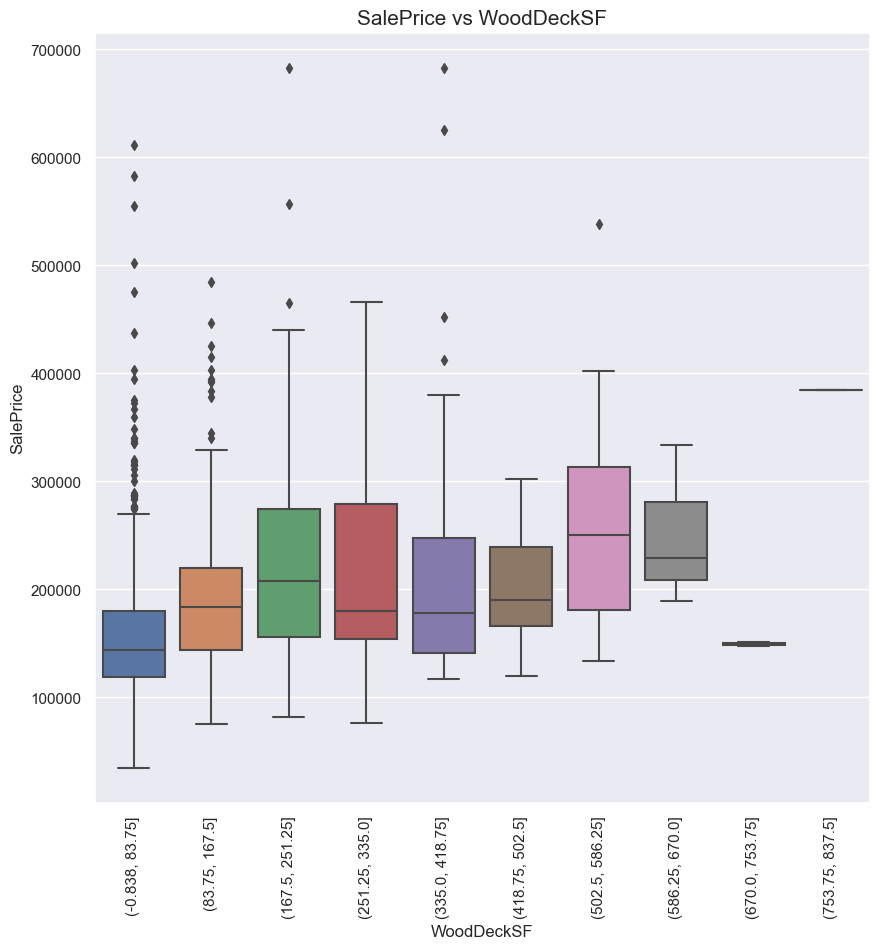

******************************


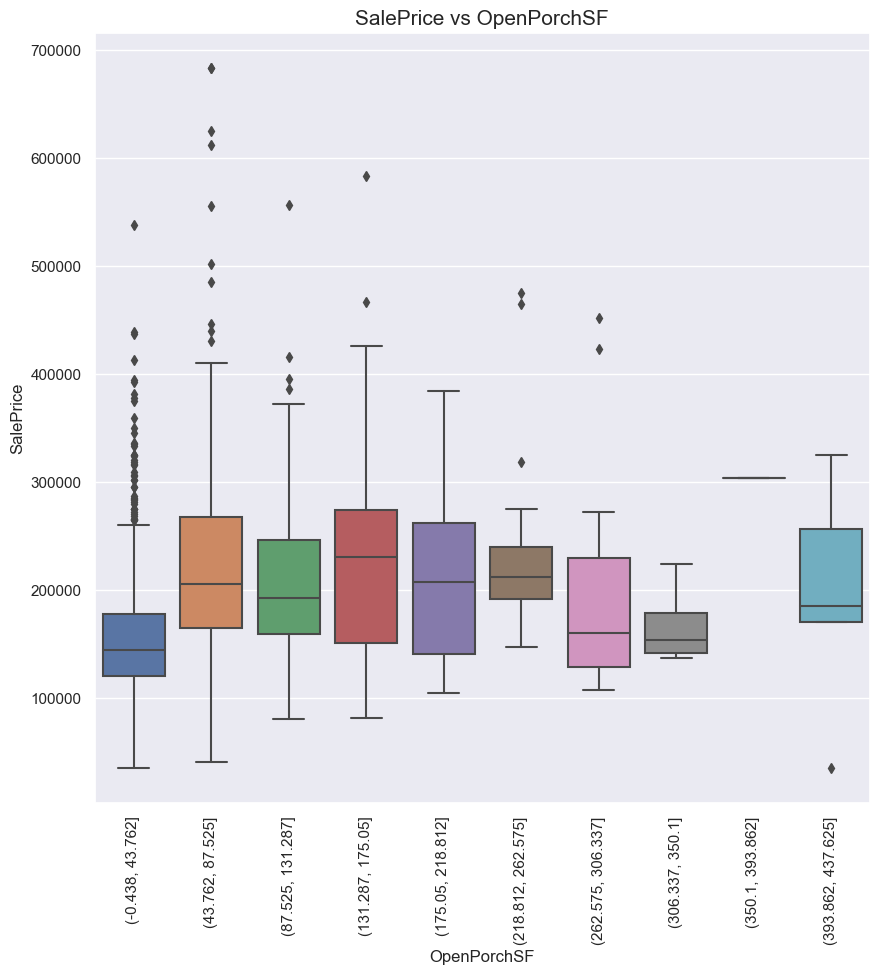

******************************


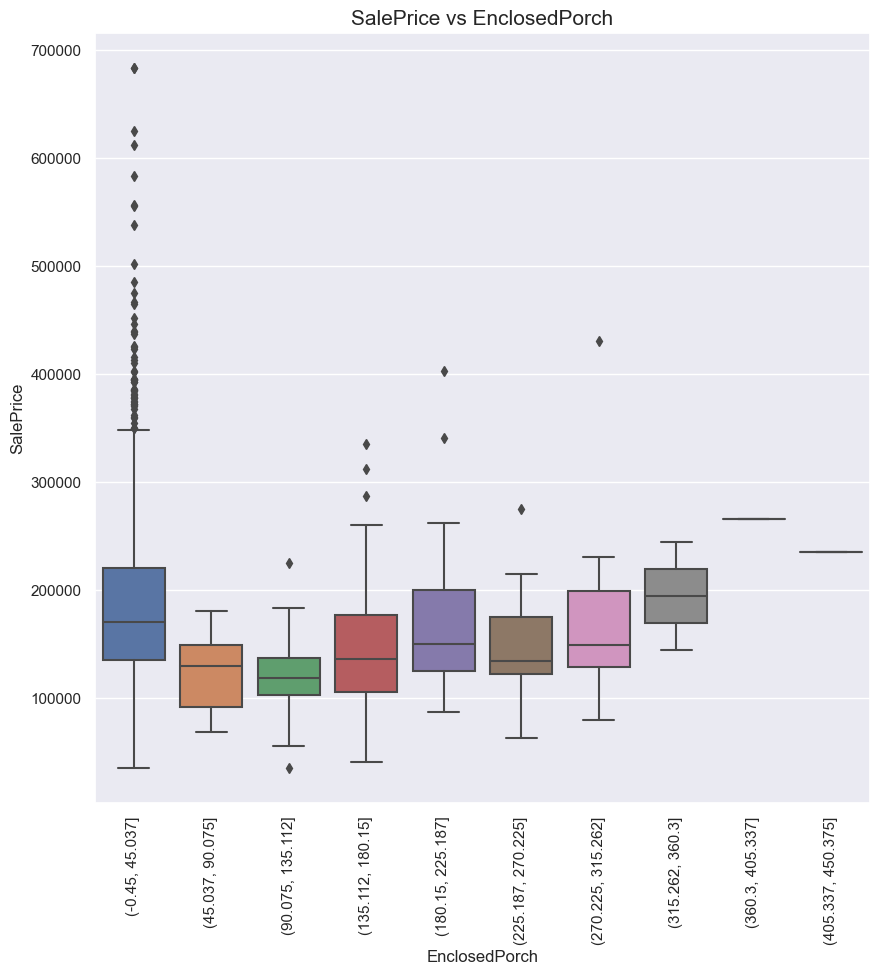

******************************


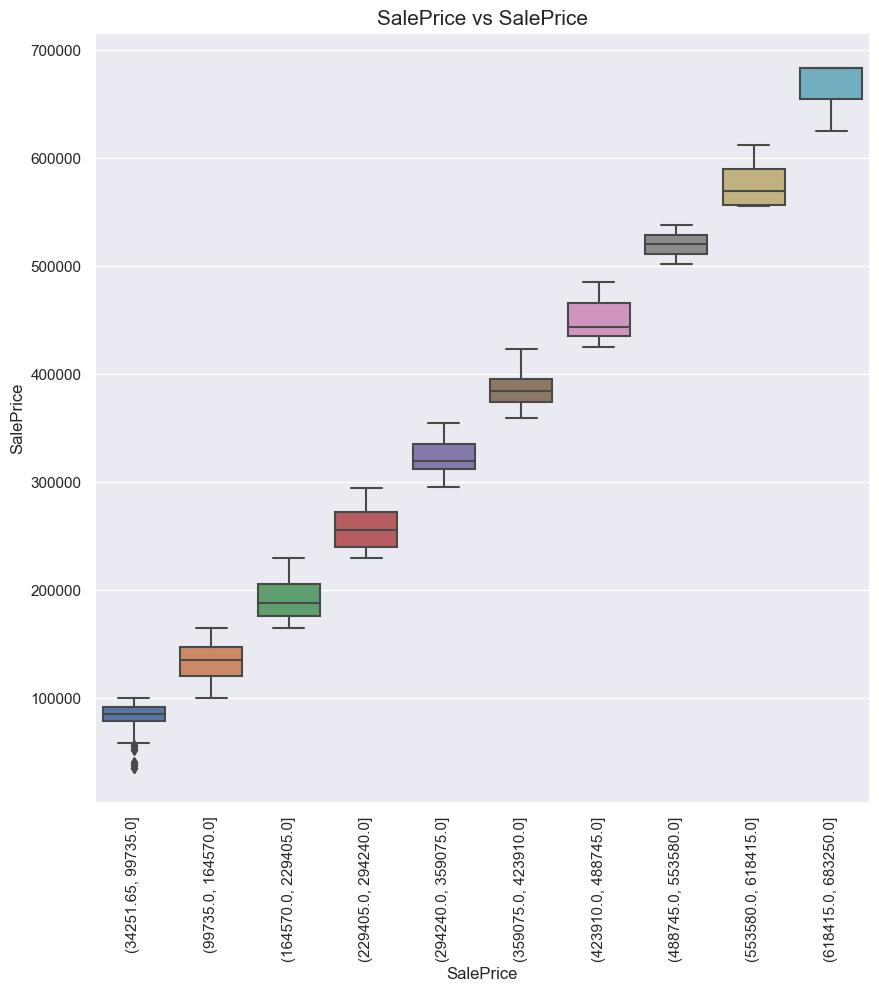

******************************


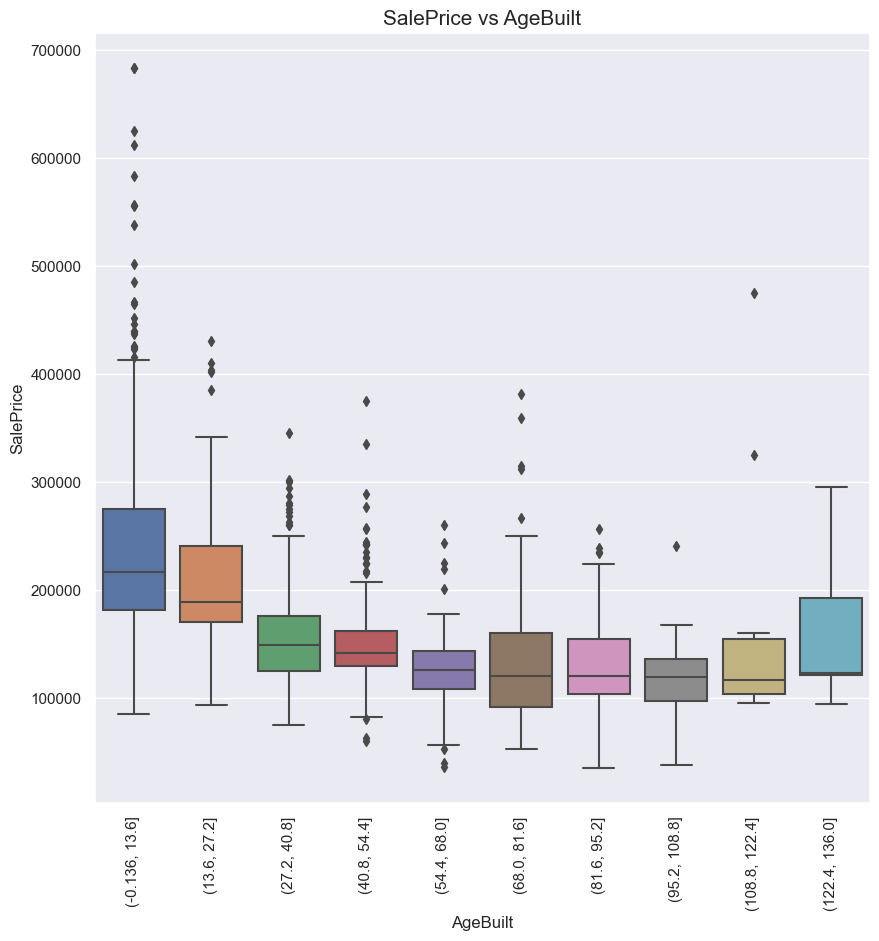

******************************


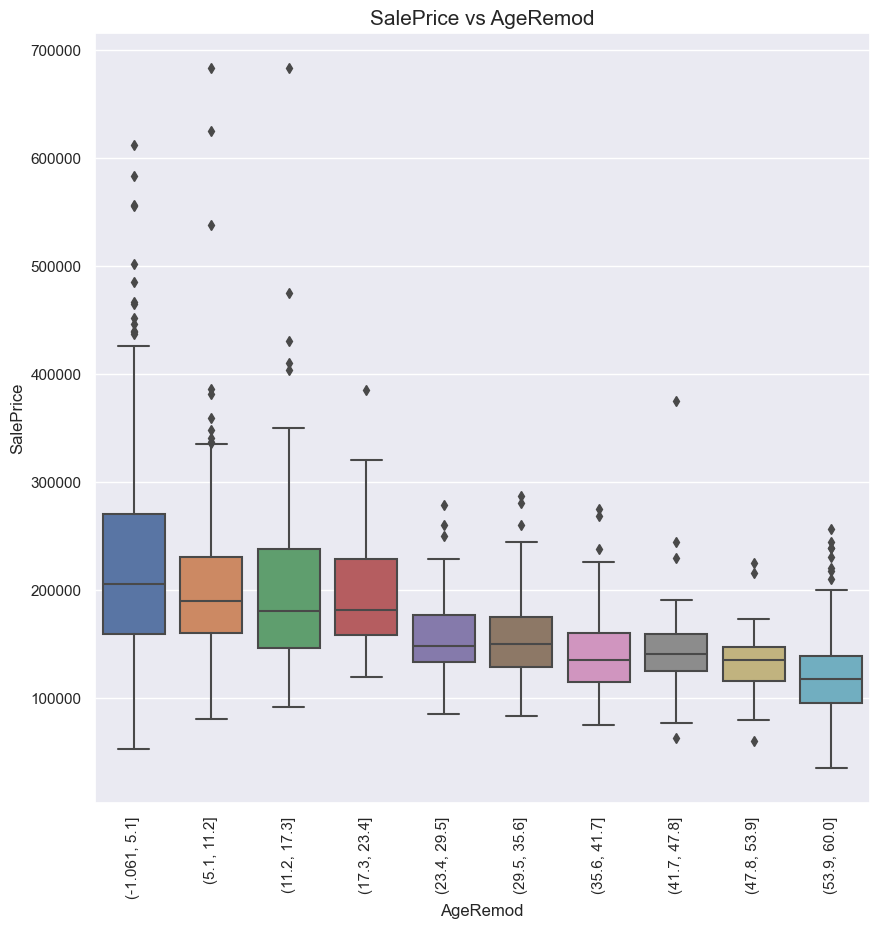

******************************


In [53]:
for col in continuous:
    if housing_df[col].dtype == object:
        box_plot_conti(housing_df,col)
    else:
        box_plot_conti(housing_df,col)

## Observations :
Bivariate Analysis on Continuous Columns:

- **LotFrontage** - As LotFrontage increases from [20.7 to 196.2], there is a corresponding increase in SalePrice.

- **LotArea** - As LotArea increases from [1086 to 65483], SalePrice tends to rise.

- **MasVnrArea** - The increase in MasVnrArea from [0 to 1280] corresponds to a higher SalePrice.

- **BsmtFinSF1** - With an increase in BsmtFinSF1 from [0 to 2257], SalePrice generally increases.

- **BsmtFinSF2** - Changes in BsmtFinSF2 have minimal impact on SalePrice.

- **BsmtUnfSF** - As BsmtUnfSF increases from [1168 to 2336], SalePrice tends to rise.

- **TotalBsmtSF** - An increase in TotalBsmtSF from [0 to 3666] is associated with a higher SalePrice.

- **1stFlrSF** - As 1stFlrSF increases from [329.64 to 3384], SalePrice generally increases.

- **2ndFlrSF** - With an increase in 2ndFlrSF from [206.5 to 1858], SalePrice tends to rise.

- **GrLivArea** - As GrLivArea increases from [328 to 4480], SalePrice generally rises.

- **GarageYrBlt** - Variations in GarageYrBlt have minimal impact on SalePrice.

- **GarageArea** - An increase in GarageArea from [0 to 1276] corresponds to a higher SalePrice.

- **WoodDeckSF** - As WoodDeckSF increases from [0 to 685], SalePrice tends to rise.

- **OpenPorchSF** - Changes in OpenPorchSF have minimal impact on SalePrice.

- **EnclosedPorch** - Variations in EnclosedPorch have minimal impact on SalePrice.

- **AgeBuilt** - As AgeBuilt increases from [0 to 81], SalePrice decreases, but from [81 to 136], it slightly increases.

- **AgeRemod** - As AgeRemod increases from [0 to 60], SalePrice decreases.

## <font color='DarkSlateBlue'>Correlations </font> 

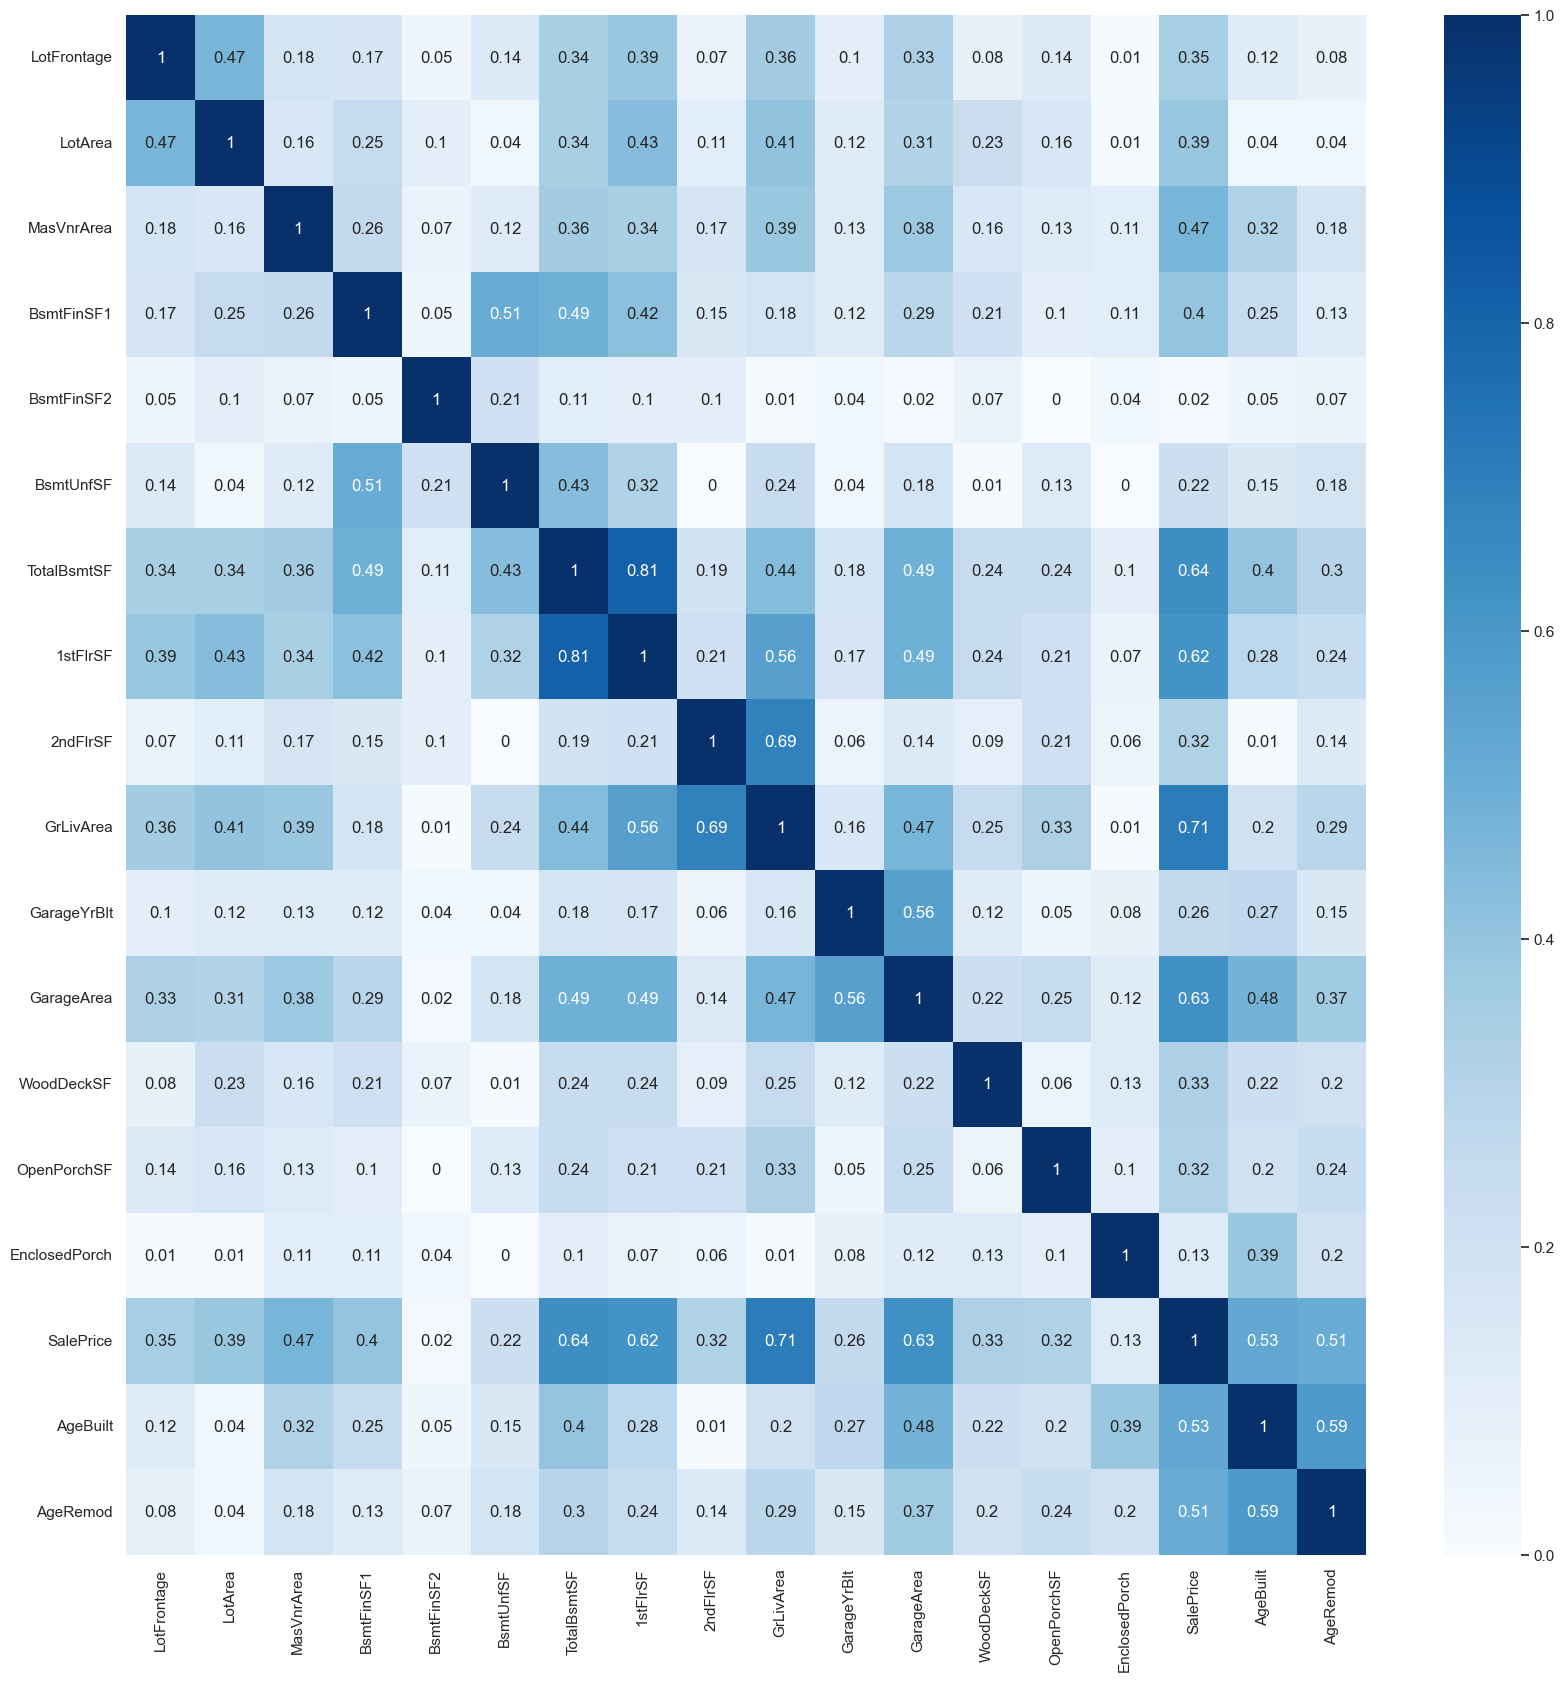

In [54]:
plt.figure(figsize=(20,20))
sns.heatmap(data=abs(round(housing_df.corr(),2)),annot=True,cmap="Blues")
plt.show()

## Observations :
- **GarageArea, GrLivArea, TotalBsmtSF, and BsmtFullBath** exhibit strong correlations with other variables, thus prompting their removal.


In [55]:
housing_df.drop("GarageArea",axis=1,inplace=True)
housing_df.drop("GrLivArea",axis=1,inplace=True)
housing_df.drop("TotalBsmtSF",axis=1,inplace=True)
housing_df.drop("BsmtFullBath",axis=1,inplace=True)

In [56]:
# Since some cols were dropped, classify Cont and Catg. variables again afresh
data_cols = housing_df.describe().columns
continuous = [col for col in housing_df.columns if col in data_cols]
categorical = [col for col in housing_df.columns if col not in data_cols]

In [57]:
housing_df[categorical].head()

MSSubClass MSZoning LotShape LandContour LotConfig Neighborhood  \
0         60       RL      Reg         Lvl    Inside      CollgCr   
1         20       RL      Reg         Lvl       FR2      Veenker   
2         60       RL      IR1         Lvl    Inside      CollgCr   
3         70       RL      IR1         Lvl    Corner      Crawfor   
4         60       RL      IR1         Lvl       FR2      NoRidge   

  Proximity_info BldgType HouseStyle OverallQual OverallCond RoofStyle  \
0           Norm     1Fam     2Story           7           5     Gable   
1          Feedr     1Fam     1Story           6           8     Gable   
2           Norm     1Fam     2Story           7           5     Gable   
3           Norm     1Fam     2Story           7           5     Gable   
4           Norm     1Fam     2Story           8           5     Gable   

  Exterior1st Exterior2nd MasVnrType ExterQual ExterCond Foundation BsmtQual  \
0     VinylSd     VinylSd    BrkFace        Gd        TA      PConc       Gd   
1     MetalSd     MetalSd       None        TA        TA     CBlock       Gd   
2     VinylSd     VinylSd    BrkFace        Gd        TA      PConc       Gd   
3     Wd Sdng     Wd Shng       None        TA        TA     BrkTil       TA   
4     VinylSd     VinylSd    BrkFace        Gd        TA      PConc       Gd   

  BsmtCond BsmtExposure BsmtFinType1 BsmtFinType2 HeatingQC FullBath HalfBath  \
0       TA           No          GLQ          Unf        Ex        2        1   
1       TA           Gd          ALQ          Unf        Ex        2        0   
2       TA           Mn          GLQ          Unf        Ex        2        1   
3       Gd           No          ALQ          Unf        Gd        1        0   
4       TA           Av          GLQ          Unf        Ex        2        1   

  BedroomAbvGr KitchenQual TotRmsAbvGrd Fireplaces   FireplaceQu GarageType  \
0            3          Gd            8          0  No_Fireplace     Attchd   
1            3          TA            6          1            TA     Attchd   
2            3          Gd            6          1            TA     Attchd   
3            3          Gd            7          1            Gd     Detchd   
4            4          Gd            9          1            TA     Attchd   

  GarageFinish GarageCars GarageQual     Fence MoSold YrSold SaleType  \
0          RFn          2         TA  No_Fence      2   2008       WD   
1          RFn          2         TA  No_Fence      5   2007       WD   
2          RFn          2         TA  No_Fence      9   2008       WD   
3          Unf          3         TA  No_Fence      2   2006       WD   
4          RFn          3         TA  No_Fence     12   2008       WD   

  SaleCondition  
0        Normal  
1        Normal  
2        Normal  
3       Abnorml  
4        Normal

In [58]:
# convert into dummies - one hot encoding
housing_df = pd.get_dummies(housing_df,columns=categorical, drop_first=True)

In [59]:
print(housing_df.columns)

Index(['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', '1stFlrSF', '2ndFlrSF', 'GarageYrBlt', 'WoodDeckSF',
       ...
       'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth',
       'SaleType_WD', 'SaleCondition_AdjLand', 'SaleCondition_Alloca',
       'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=265)


In [60]:
housing_df.head()

LotFrontage  LotArea  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  \
0         65.0   8450.0       196.0         706         0.0        150   
1         80.0   9600.0         0.0         978         0.0        284   
2         68.0  11250.0       162.0         486         0.0        434   
3         60.0   9550.0         0.0         216         0.0        540   
4         84.0  14260.0       350.0         655         0.0        490   

   1stFlrSF  2ndFlrSF  GarageYrBlt  WoodDeckSF  OpenPorchSF  EnclosedPorch  \
0     856.0       854       2003.0         0.0         61.0            0.0   
1    1262.0         0       1976.0       298.0          0.0            0.0   
2     920.0       866       2001.0         0.0         42.0            0.0   
3     961.0       756       1998.0         0.0         35.0          272.0   
4    1145.0      1053       2000.0       192.0         84.0            0.0   

   SalePrice  AgeBuilt  AgeRemod  MSSubClass_30  MSSubClass_40  MSSubClass_45  \
0   208500.0         5         5              0              0              0   
1   181500.0        31        31              0              0              0   
2   223500.0         7         6              0              0              0   
3   140000.0        91        36              0              0              0   
4   250000.0         8         8              0              0              0   

   MSSubClass_50  MSSubClass_60  MSSubClass_70  MSSubClass_75  MSSubClass_80  \
0              0              1              0              0              0   
1              0              0              0              0              0   
2              0              1              0              0              0   
3              0              0              1              0              0   
4              0              1              0              0              0   

   MSSubClass_85  MSSubClass_90  MSSubClass_120  MSSubClass_160  \
0              0              0               0               0   
1              0              0               0               0   
2              0              0               0               0   
3              0              0               0               0   
4              0              0               0               0   

   MSSubClass_180  MSSubClass_190  MSZoning_FV  MSZoning_RH  MSZoning_RL  \
0               0               0            0            0            1   
1               0               0            0            0            1   
2               0               0            0            0            1   
3               0               0            0            0            1   
4               0               0            0            0            1   

   MSZoning_RM  LotShape_IR2  LotShape_IR3  LotShape_Reg  LandContour_HLS  \
0            0             0             0             1                0   
1            0             0             0             1                0   
2            0             0             0             0                0   
3            0             0             0             0                0   
4            0             0             0             0                0   

   LandContour_Low  LandContour_Lvl  LotConfig_CulDSac  LotConfig_FR2  \
0                0                1                  0              0   
1                0                1                  0              1   
2                0                1                  0              0   
3                0                1                  0              0   
4                0                1                  0              1   

   LotConfig_FR3  LotConfig_Inside  Neighborhood_Blueste  Neighborhood_BrDale  \
0              0                 1                     0                    0   
1              0                 0                     0                    0   
2              0                 1                     0                    0   
3              0                 0 

In [61]:
# Recheck info - Post Dummy variable creations, now we have rows = 1460, cols= 265
housing_df.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 265 columns):
 #    Column                    Non-Null Count  Dtype  
---   ------                    --------------  -----  
 0    LotFrontage               1460 non-null   float64
 1    LotArea                   1460 non-null   float64
 2    MasVnrArea                1460 non-null   float64
 3    BsmtFinSF1                1460 non-null   int64  
 4    BsmtFinSF2                1460 non-null   float64
 5    BsmtUnfSF                 1460 non-null   int64  
 6    1stFlrSF                  1460 non-null   float64
 7    2ndFlrSF                  1460 non-null   int64  
 8    GarageYrBlt               1460 non-null   float64
 9    WoodDeckSF                1460 non-null   float64
 10   OpenPorchSF               1460 non-null   float64
 11   EnclosedPorch             1460 non-null   float64
 12   SalePrice                 1460 non-null   float64
 13   AgeBuilt                  1460 non-null   int6

## <font color='DarkSlateBlue'>Splitting the Data into Training and Testing Sets </font> 

In [62]:
# split into X and y
X = housing_df.drop('SalePrice',axis=1)
y = housing_df['SalePrice']

In [63]:
X.head()

LotFrontage  LotArea  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  \
0         65.0   8450.0       196.0         706         0.0        150   
1         80.0   9600.0         0.0         978         0.0        284   
2         68.0  11250.0       162.0         486         0.0        434   
3         60.0   9550.0         0.0         216         0.0        540   
4         84.0  14260.0       350.0         655         0.0        490   

   1stFlrSF  2ndFlrSF  GarageYrBlt  WoodDeckSF  OpenPorchSF  EnclosedPorch  \
0     856.0       854       2003.0         0.0         61.0            0.0   
1    1262.0         0       1976.0       298.0          0.0            0.0   
2     920.0       866       2001.0         0.0         42.0            0.0   
3     961.0       756       1998.0         0.0         35.0          272.0   
4    1145.0      1053       2000.0       192.0         84.0            0.0   

   AgeBuilt  AgeRemod  MSSubClass_30  MSSubClass_40  MSSubClass_45  \
0         5         5              0              0              0   
1        31        31              0              0              0   
2         7         6              0              0              0   
3        91        36              0              0              0   
4         8         8              0              0              0   

   MSSubClass_50  MSSubClass_60  MSSubClass_70  MSSubClass_75  MSSubClass_80  \
0              0              1              0              0              0   
1              0              0              0              0              0   
2              0              1              0              0              0   
3              0              0              1              0              0   
4              0              1              0              0              0   

   MSSubClass_85  MSSubClass_90  MSSubClass_120  MSSubClass_160  \
0              0              0               0               0   
1              0              0               0               0   
2              0              0               0               0   
3              0              0               0               0   
4              0              0               0               0   

   MSSubClass_180  MSSubClass_190  MSZoning_FV  MSZoning_RH  MSZoning_RL  \
0               0               0            0            0            1   
1               0               0            0            0            1   
2               0               0            0            0            1   
3               0               0            0            0            1   
4               0               0            0            0            1   

   MSZoning_RM  LotShape_IR2  LotShape_IR3  LotShape_Reg  LandContour_HLS  \
0            0             0             0             1                0   
1            0             0             0             1                0   
2            0             0             0             0                0   
3            0             0             0             0                0   
4            0             0             0             0                0   

   LandContour_Low  LandContour_Lvl  LotConfig_CulDSac  LotConfig_FR2  \
0                0                1                  0              0   
1                0                1                  0              1   
2                0                1                  0              0   
3                0                1                  0              0   
4                0                1                  0              1   

   LotConfig_FR3  LotConfig_Inside  Neighborhood_Blueste  Neighborhood_BrDale  \
0              0                 1                     0                    0   
1              0                 0                     0                    0   
2              0                 1                     0                    0   
3              0                 0                     0                    0   
4              0    

In [64]:
y.head()

0    208500.0
1    181500.0
2    223500.0
3    140000.0
4    250000.0
Name: SalePrice, dtype: float64

In [65]:
# Split into train and test
# We specify this random_state so that the train and test data set always have the same rows, respectively
# The first basic step for regression is performing a train-test split
# The train dataset is set 70% data
np.random.seed(0)

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    train_size=0.7,
                                                    test_size = 0.3, random_state=100)

In [66]:
X_train.head()

LotFrontage  LotArea  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  \
210          67.0   5604.0         0.0         468         0.0        396   
318          90.0   9900.0       256.0         987         0.0        360   
239          52.0   8741.0         0.0          94         0.0        641   
986          59.0   5310.0         0.0           0         0.0        485   
1416         60.0  11340.0         0.0           0         0.0        777   

      1stFlrSF  2ndFlrSF  GarageYrBlt  WoodDeckSF  OpenPorchSF  EnclosedPorch  \
210      864.0         0          0.0         0.0          0.0           96.0   
318     1372.0      1274       1993.0       340.0         60.0          144.0   
239      798.0       689       1949.0         0.0        140.0            0.0   
986     1001.0       634       1950.0       394.0          0.0            0.0   
1416    1246.0      1044       1971.0         0.0          0.0          114.0   

      AgeBuilt  AgeRemod  MSSubClass_30  MSSubClass_40  MSSubClass_45  \
210         83        58              1              0              0   
318         16        16              0              0              0   
239         65        60              0              0              0   
986         96         3              0              0              0   
1416       125        60              0              0              0   

      MSSubClass_50  MSSubClass_60  MSSubClass_70  MSSubClass_75  \
210               0              0              0              0   
318               0              1              0              0   
239               1              0              0              0   
986               1              0              0              0   
1416              0              0              0              0   

      MSSubClass_80  MSSubClass_85  MSSubClass_90  MSSubClass_120  \
210               0              0              0               0   
318               0              0              0               0   
239               0              0              0               0   
986               0              0              0               0   
1416              0              0              0               0   

      MSSubClass_160  MSSubClass_180  MSSubClass_190  MSZoning_FV  \
210                0               0               0            0   
318                0               0               0            0   
239                0               0               0            0   
986                0               0               0            0   
1416               0               0               1            0   

      MSZoning_RH  MSZoning_RL  MSZoning_RM  LotShape_IR2  LotShape_IR3  \
210             0            1            0             0             0   
318             0            1            0             0             0   
239             0            1            0             0             0   
986             0            0            1             0             0   
1416            0            0            1             0             0   

      LotShape_Reg  LandContour_HLS  LandContour_Low  LandContour_Lvl  \
210              1                0                0                1   
318              1                0                1                0   
239              1                0                0                1   
986              1                0                0                1   
1416             1                0                0                1   

      LotConfig_CulDSac  LotConfig_FR2  LotConfig_FR3  LotConfig_Inside  \
210                   0              0              0                 1   
318                   0              0              0                 1   
239                   0              0              0                 1   
986                   0              0              0                 0   
1416                  0              0              0                 1   

      Neighborhood_Blueste  Neighborh

### Observations : 
- Ensuring comparable variable scales is crucial to prevent the regression model from yielding excessively large or small coefficients.
- Rescaling methods:
     - Min-Max scaling
     - Standardization (mean-0, sigma-1)
- We will implement **Standardization scaling**, setting the mean to 0 for all columns.
- Certain columns exhibit distinct scales in comparison to other variables.
- Variables with dissimilar scales can lead to significantly varied coefficients when the model is directly applied.
- To address this, we will apply StandardScaler to select columns.
- The StandardScaler will be applied exclusively to the training data to avoid test data learning min-max values.

In [67]:
for col in X_train.columns:
    if X_train[col].max() > 1 or X_train[col].min() <0:
        print('"',col,'",',end="",sep="")


"LotFrontage","LotArea","MasVnrArea","BsmtFinSF1","BsmtFinSF2","BsmtUnfSF","1stFlrSF","2ndFlrSF","GarageYrBlt","WoodDeckSF","OpenPorchSF","EnclosedPorch","AgeBuilt","AgeRemod",

In [68]:
scaler_Col = ["LotFrontage","LotArea","MasVnrArea","BsmtFinSF1","BsmtFinSF2",
              "BsmtUnfSF","1stFlrSF","2ndFlrSF","GarageYrBlt","WoodDeckSF",
              "OpenPorchSF","EnclosedPorch","AgeBuilt","AgeRemod"]

In [69]:
# scaling the features - Mandatory before using Ridge or Lasso
# storing column names in cols, since column names are (annoyingly) lost after 
# scaling (the df is converted to a numpy array)

scalerX = StandardScaler()
scalery = StandardScaler()

X_train[scaler_Col] = scalerX.fit_transform(X_train[scaler_Col])

In [70]:
y_train = pd.DataFrame(y_train)
y_train.head()

SalePrice
210     98000.0
318    260000.0
239    113000.0
986    117000.0
1416   122500.0

In [71]:
y_train.SalePrice = scalery.fit_transform(y_train)
y_train = y_train.SalePrice
y_train

210    -1.053087
318     1.019552
239    -0.861176
986    -0.810000
1416   -0.739633
          ...   
1009   -1.001911
802     0.111173
53      2.618810
350     1.762388
79     -0.899558
Name: SalePrice, Length: 1021, dtype: float64

In [72]:
X_test[scaler_Col] = scalerX.transform(X_test[scaler_Col])
y_test = pd.DataFrame(y_test)
y_test.SalePrice = scalery.transform(y_test)
y_test = y_test.SalePrice
X_train

LotFrontage   LotArea  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  \
210     -0.115372 -0.874370   -0.568509    0.051004   -0.298688  -0.374367   
318      0.972220 -0.022885    0.833909    1.220802   -0.298688  -0.454644   
239     -0.824671 -0.252604   -0.568509   -0.791972   -0.298688   0.171964   
986     -0.493665 -0.932642   -0.568509   -1.003843   -0.298688  -0.175904   
1416    -0.446378  0.262529   -0.568509   -1.003843   -0.298688   0.475233   
...           ...       ...         ...         ...         ...        ...   
1009    -0.446378 -0.795881   -0.568509   -1.003843   -0.298688   0.990346   
802     -0.304518 -0.360030   -0.568509    0.456714   -0.298688  -1.079023   
53      -0.068085  5.652756   -0.568509    3.075800   -0.298688  -1.186059   
350     -0.068085 -0.435150    1.414598   -1.003843   -0.298688   2.910309   
79      -0.446378  0.084145   -0.568509   -1.003843   -0.298688  -0.276251   

      1stFlrSF  2ndFlrSF  GarageYrBlt  WoodDeckSF  OpenPorchSF  EnclosedPorch  \
210  -0.778502 -0.787597    -4.069183   -0.743699    -0.717528       1.165785   
318   0.525619  2.140556     0.276109    1.991491     0.203142       1.934819   
239  -0.947935  0.795996     0.180177   -0.743699     1.430701      -0.372283   
986  -0.426800  0.669584     0.182357    2.425903    -0.717528      -0.372283   
1416  0.202156  1.611926     0.228143   -0.743699    -0.717528       1.454173   
...        ...       ...          ...         ...          ...            ...   
1009 -0.408830 -0.787597    -4.069183   -0.743699    -0.717528       1.838690   
802  -1.127636  0.885633     0.302273   -0.454091    -0.441327      -0.372283   
53    1.732186 -0.787597     0.249946    5.993717     0.387276      -0.372283   
350   1.801500 -0.787597     0.306633    0.945683     0.111075      -0.372283   
79   -1.245726  0.471923     0.217242   -0.148393    -0.717528       1.678474   

      AgeBuilt  AgeRemod  MSSubClass_30  MSSubClass_40  MSSubClass_45  \
210   1.529604  1.704092              1              0              0   
318  -0.677573 -0.333918              0              0              0   
239   0.936631  1.801140              0              0              0   
986   1.957862 -0.964730              0              0              0   
1416  2.913207  1.801140              0              0              0   
...        ...       ...            ...            ...            ...   
1009  1.430775  1.607044              0              0              0   
802  -1.105831 -0.964730              0              0              0   
53   -0.381086 -0.188345              0              0              0   
350  -1.204659 -1.110302              0              0              0   
79    2.056691  0.248371              0              0              0   

      MSSubClass_50  MSSubClass_60  MSSubClass_70  MSSubClass_75  \
210               0              0              0              0   
318               0              1              0              0   
239               1              0              0              0   
986               1              0              0              0   
1416              0              0              0              0   
...             ...            ...            ...            ...   
1009              1              0              0              0   
802               0              1              0              0   
53                0              0              0              0   
350               0              0              0              0   
79                1              0              0              0   

      MSSubClass_80  MSSubClass_85  MSSubClass_90  MSSubClass_120  \
210               0              0              0               0   
318               0              0              0               0   
239               0              0              0               0   
986               0              0              0               0   
1416              0              0              0        

In [73]:
X_test

LotFrontage   LotArea  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  \
1436    -0.446378 -0.201269   -0.568509    0.384588   -0.298688  -0.704396   
57       0.924934  0.322981   -0.568509   -1.003843   -0.298688   0.660317   
780     -0.304518 -0.424248   -0.360338   -1.003843   -0.298688   1.500998   
382      0.452068 -0.152709   -0.568509   -1.003843   -0.298688   0.836481   
1170     0.310208 -0.026849   -0.568509    0.172717   -0.298688   0.022559   
...           ...       ...         ...         ...         ...        ...   
509      0.499354 -0.082346    0.154613    1.229818   -0.298688  -1.145920   
555     -0.540951 -0.720564   -0.568509   -1.003843   -0.298688   0.956897   
399     -0.209945 -0.374697   -0.020689    0.826362   -0.298688  -0.633038   
545     -0.020798  0.757445    0.406610    1.254611    0.930304  -1.257417   
266      0.026488  0.236168   -0.568509    0.605475   -0.298688  -1.061183   

      1stFlrSF  2ndFlrSF  GarageYrBlt  WoodDeckSF  OpenPorchSF  EnclosedPorch  \
1436 -0.778502 -0.787597     0.234684   -0.743699    -0.717528      -0.372283   
57   -0.788770  1.189021     0.300092   -0.743699     0.356587      -0.372283   
780   0.220126 -0.787597     0.280470    1.026130    -0.395293      -0.372283   
382  -0.585964  1.184425     0.304453    0.414734     0.095730      -0.372283   
1170 -0.126442 -0.787597     0.241225    0.889370    -0.717528      -0.372283   
...        ...       ...          ...         ...          ...            ...   
509  -0.324113 -0.787597     0.201980    1.058308     0.632787      -0.372283   
555  -0.306143 -0.787597     0.121310   -0.743699    -0.717528       1.486216   
399  -0.141845  0.219099     0.306633   -0.743699     1.860347      -0.372283   
545   0.538454  1.064908     0.265208   -0.743699    -0.717528      -0.372283   
266  -0.937666  0.841964     0.284830    0.020545     0.433309      -0.372283   

      AgeBuilt  AgeRemod  MSSubClass_30  MSSubClass_40  MSSubClass_45  \
1436 -0.018714  0.636563              0              0              0   
57   -1.138774 -1.013254              0              0              0   
780  -0.809344 -0.576538              0              0              0   
382  -1.171717 -1.061778              0              0              0   
1170 -0.183429  0.393943              0              0              0   
...        ...       ...            ...            ...            ...   
509   0.442487  1.315900              0              0              0   
555   1.562547  1.607044              0              0              1   
399  -1.105831 -1.013254              0              0              0   
545  -0.611687 -0.236870              0              0              0   
266  -0.908173 -0.673586              0              0              0   

      MSSubClass_50  MSSubClass_60  MSSubClass_70  MSSubClass_75  \
1436              0              0              0              0   
57                0              1              0              0   
780               0              0              0              0   
382               0              1              0              0   
1170              0              0              0              0   
...             ...            ...            ...            ...   
509               0              0              0              0   
555               0              0              0              0   
399               0              1              0              0   
545               1              0              0              0   
266               0              1              0              0   

      MSSubClass_80  MSSubClass_85  MSSubClass_90  MSSubClass_120  \
1436              0              0              0               0   
57                0              0              0               0   
780               0              0              0               0   
382               0              0              0               0   
1170              1              0              0        

In [74]:
y_train

210    -1.053087
318     1.019552
239    -0.861176
986    -0.810000
1416   -0.739633
          ...   
1009   -1.001911
802     0.111173
53      2.618810
350     1.762388
79     -0.899558
Name: SalePrice, Length: 1021, dtype: float64

In [75]:
y_test

1436   -0.765221
57      0.207128
780    -0.055150
382     0.424628
1170   -0.119120
          ...   
509    -0.714044
555    -0.861176
399     0.776464
545     0.622936
266     0.059997
Name: SalePrice, Length: 438, dtype: float64

### Observations : 
- The values have been scaled


## <font color='DarkSlateBlue'>Model Building and Evaluation </font> 
### <font color='DarkSlateBlue'>Linear Regression </font> 
#### Before proceeding, we'll begin by applying linear regression to the dataset to assess the results it produces. Target - SalePrice

In [76]:
#lets create a custom method to create a linear regresion model which prints the statistics and returns the model
def func_linearRegression(X_train,y_train):
    # Adding a constant variable 
    X_train_rfe = sm.add_constant(X_train)

    #Running the linear model
    lm = sm.OLS(y_train,X_train_rfe).fit()

    #Let's see the summary of our linear model
    print(lm.summary())
    
    print("**********************************************\n")
    return X_train_rfe,lm

In [77]:
# Just checking r2 scores for different models using RFE feature elimination
lm = LinearRegression()
# Fit a line
lm.fit(X_train, y_train)

for i in range(10,len(X_train.columns),10):
   rfe = RFE(lm,n_features_to_select=i)# running RFE
   rfe = rfe.fit(X_train, y_train)
   col = X_train.columns[rfe.support_]
   X_train_rfe = X_train[col]
   rfelm = LinearRegression()
   rfelm.fit(X_train_rfe, y_train)
   y_pred_train_rfe = rfelm.predict(X_train_rfe)
   print("for", i, "feature, the R2 value is : ",round(r2_score(y_train, y_pred_train_rfe),3))


for 10 feature, the R2 value is :  0.262
for 20 feature, the R2 value is :  0.564
for 30 feature, the R2 value is :  0.658
for 40 feature, the R2 value is :  0.785
for 50 feature, the R2 value is :  0.787
for 60 feature, the R2 value is :  0.808
for 70 feature, the R2 value is :  0.845
for 80 feature, the R2 value is :  0.863
for 90 feature, the R2 value is :  0.866
for 100 feature, the R2 value is :  0.892
for 110 feature, the R2 value is :  0.903
for 120 feature, the R2 value is :  0.903
for 130 feature, the R2 value is :  0.905
for 140 feature, the R2 value is :  0.909
for 150 feature, the R2 value is :  0.912
for 160 feature, the R2 value is :  0.914
for 170 feature, the R2 value is :  0.915
for 180 feature, the R2 value is :  0.918
for 190 feature, the R2 value is :  0.919
for 200 feature, the R2 value is :  0.92
for 210 feature, the R2 value is :  0.921
for 220 feature, the R2 value is :  0.901
for 230 feature, the R2 value is :  0.922
for 240 feature, the R2 value is :  0.914
fo

### Observations : 
- We observe that there is no notable improvement in the R2 values beyond 120 features.
- We will use RFE = 120 for now

In [78]:
# Instantiate
lm = LinearRegression()

# Fit a line
lm.fit(X_train, y_train)

rfe = RFE(lm,n_features_to_select=120) # RFE as per optimal value obtained above
rfe = rfe.fit(X_train, y_train)

col = X_train.columns[rfe.support_]

In [79]:
# Creating X_test dataframe with RFE selected variables
X_train = X_train[col]

X_train_rfe,lm = func_linearRegression(X_train,y_train)

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.903
Model:                            OLS   Adj. R-squared:                  0.892
Method:                 Least Squares   F-statistic:                     83.18
Date:                Wed, 20 Sep 2023   Prob (F-statistic):               0.00
Time:                        19:34:05   Log-Likelihood:                -256.04
No. Observations:                1021   AIC:                             720.1
Df Residuals:                     917   BIC:                             1233.
Df Model:                         103                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [80]:
X_test_rfe = sm.add_constant(X_test[col])

In [81]:
# Lets calculate some metrics such as R2 score, RSS and RMSE

y_pred_train = lm.predict(X_train_rfe)
y_pred_test = lm.predict(X_test_rfe)

metric = []
r2_train_lr = r2_score(y_train, y_pred_train)
print("R2_Train: ",r2_train_lr)
metric.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print("R2_Test: ",r2_test_lr)
metric.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print("RSS_Train: ",rss1_lr)
metric.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print("RSS_Test: ", rss2_lr)
metric.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print("MSE_Train: ", mse_train_lr)
metric.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print("MSE_Test: ", mse_test_lr)
metric.append(mse_test_lr**0.5)

R2_Train:  0.903317686969797
R2_Test:  0.8394429132176902
RSS_Train:  98.71264160383731
RSS_Test:  74.07941029951294
MSE_Train:  0.09668231303020305
MSE_Test:  0.16913107374318023


### Observations : 
- The model appears to exhibit overfitting, evident by the lower R2 score on the test data compared to the training data. 
- Let's employ Lasso and Ridge regularization techniques to mitigate the model's complexity and address overfitting.

## <font color='DarkSlateBlue'>Assess whether the assumptions of Linear Regression hold true </font> 
We will begin by examining the Assumption of Normally Distributed Error Terms. To do this, we'll conduct a residual analysis on the training data. This will involve plotting a histogram of the error terms to determine if they exhibit a normal distribution, which is a fundamental assumption in linear regression

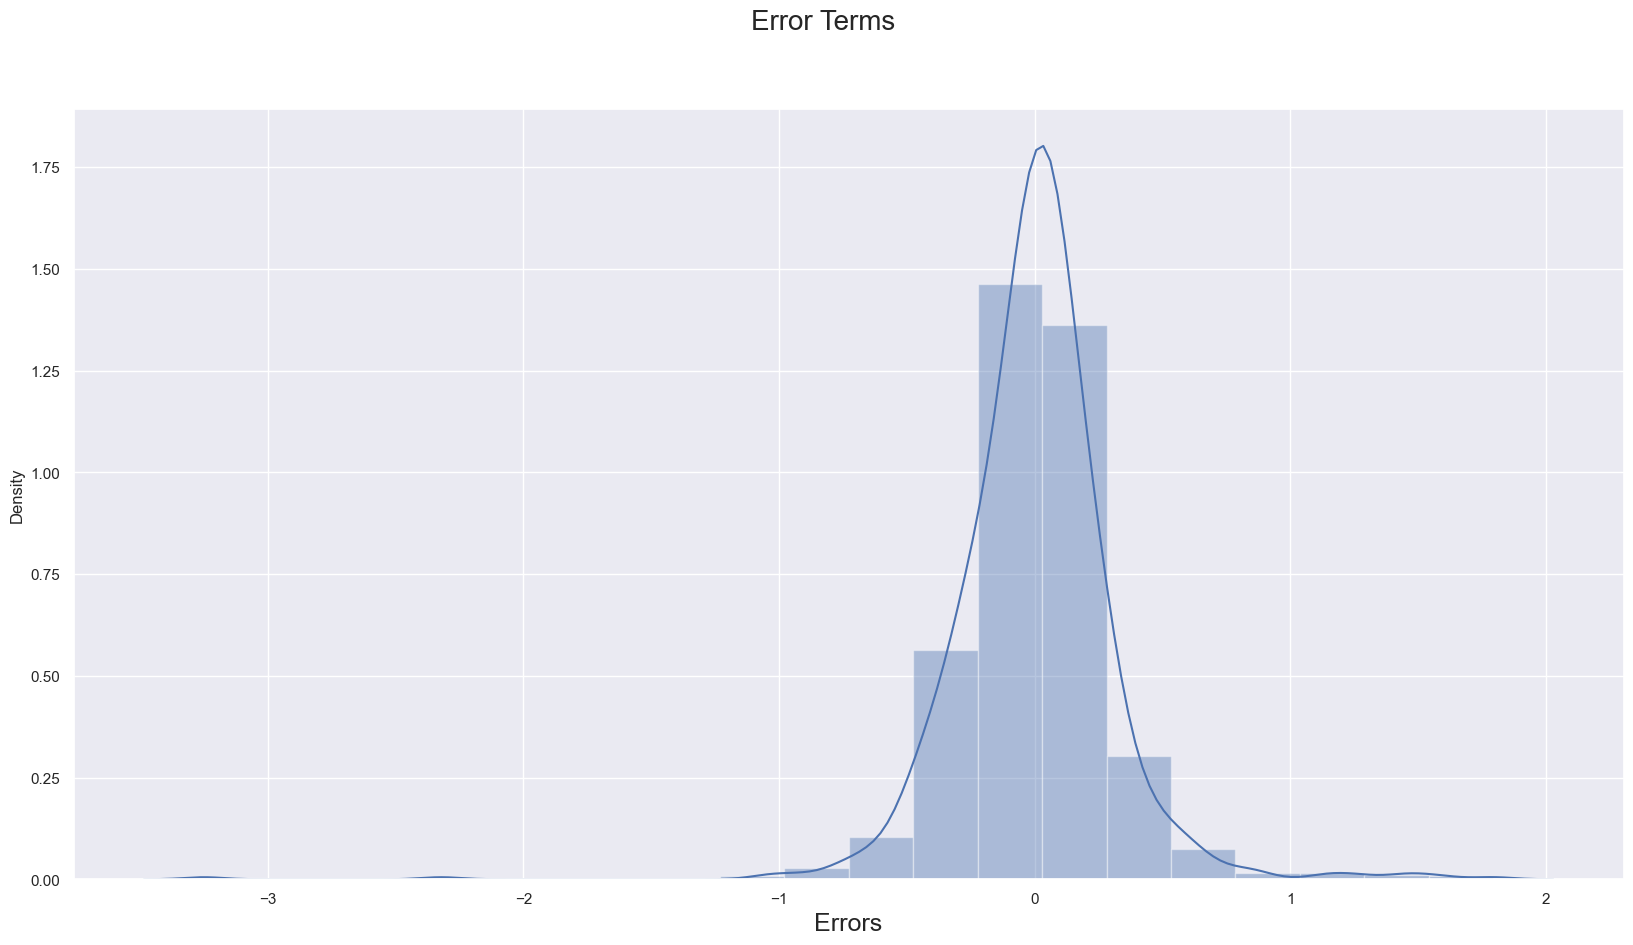

In [82]:
# Plot the histogram of the error terms
sns.set_theme(color_codes=True)
plt.figure(figsize=(20,10))
sns.distplot((y_train - y_pred_train), bins = 20)
plt.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)  
plt.show()# X-label

## <font color='DarkSlateBlue'>The Assumption of Error Terms' Independence </font> 

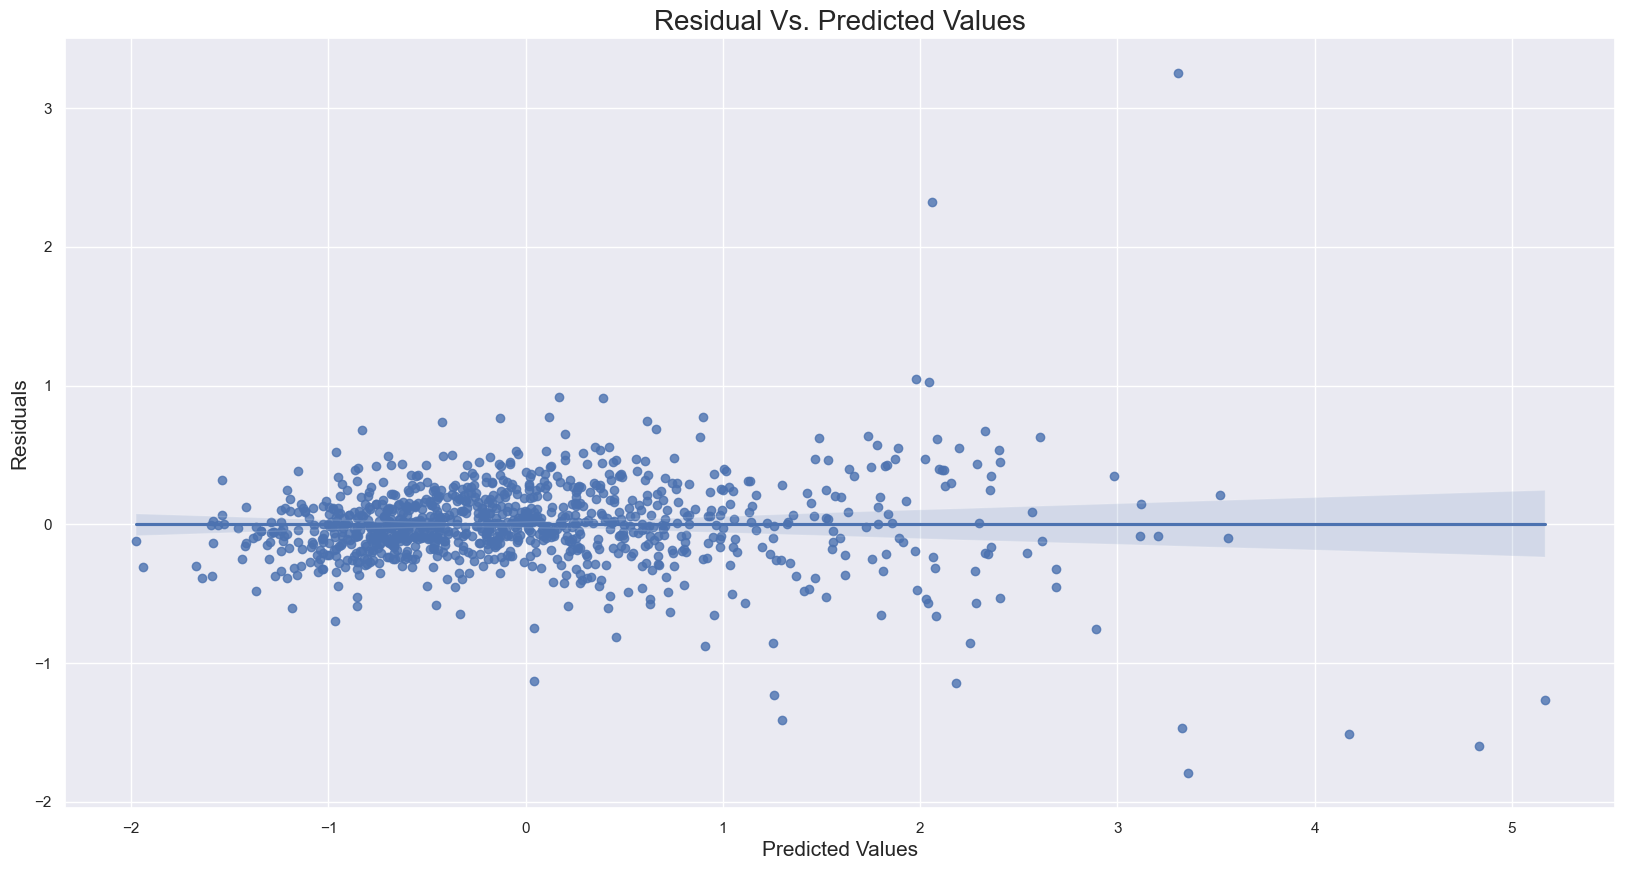

In [83]:
sns.set_theme(color_codes=True)
plt.figure(figsize=(20,10))
sns.regplot(x=y_pred_train, y= y_pred_train - y_train)
plt.title('Residual Vs. Predicted Values', fontdict={'fontsize': 20})
plt.xlabel('Predicted Values', fontdict={'fontsize': 15})
plt.ylabel('Residuals', fontdict={'fontsize': 15})
plt.show()

### Observations : 
- It's evident that as the predicted values increase, there is a corresponding increase in the residual error.

## <font color='DarkSlateBlue'>Check Homoscedasticity </font> 


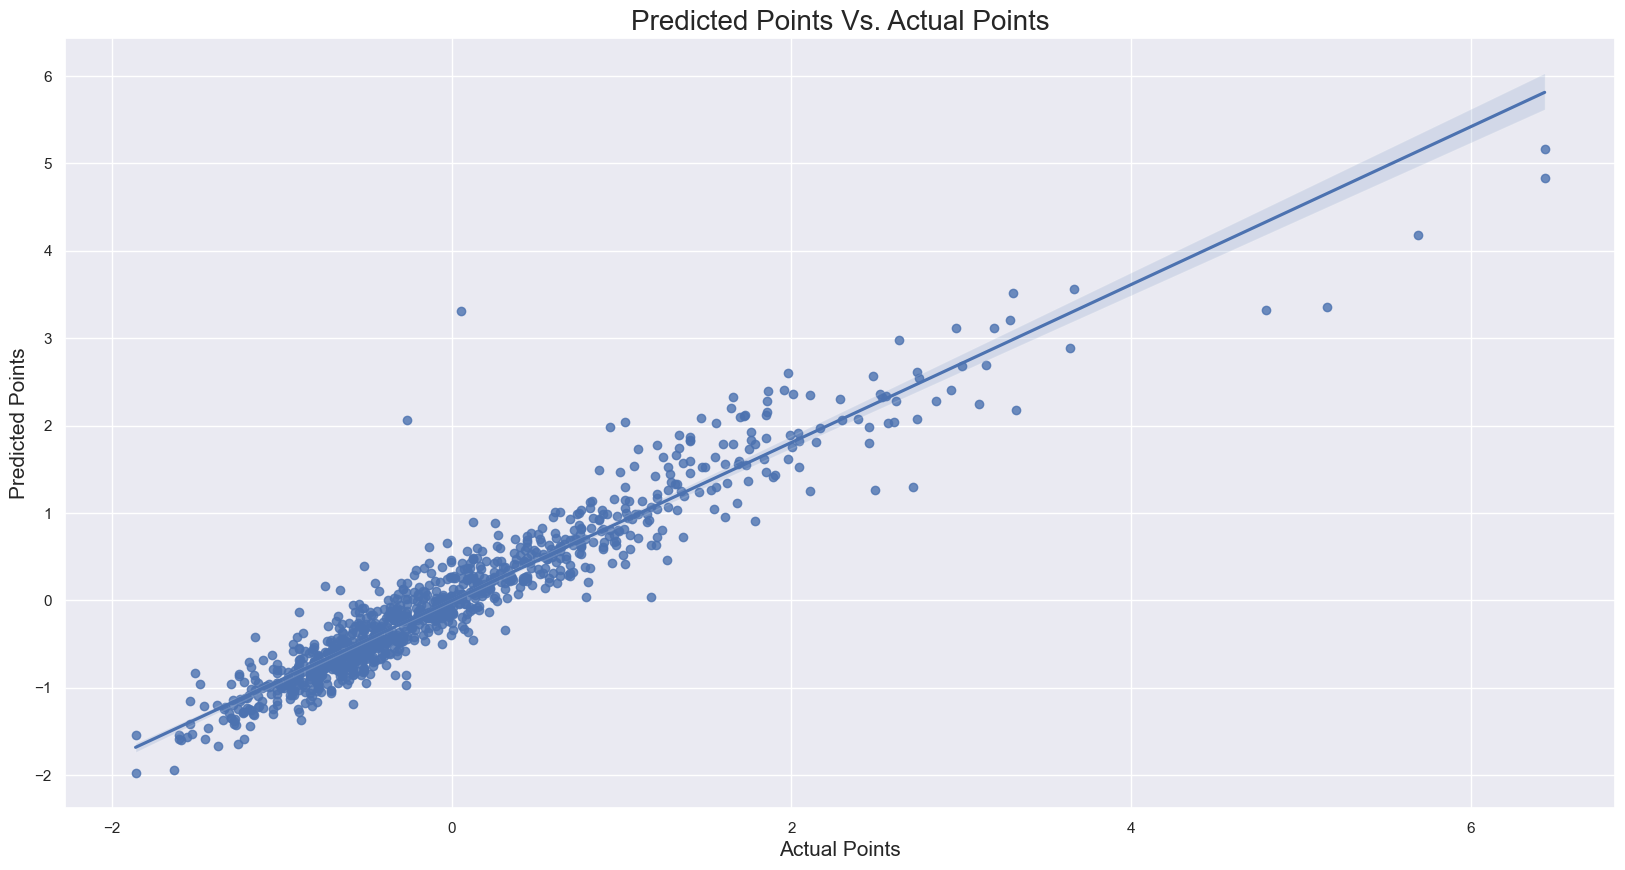

In [84]:
sns.set_theme(color_codes=True)
plt.figure(figsize=(20,10))
sns.regplot(x=y_train, y=y_pred_train)
plt.title('Predicted Points Vs. Actual Points', fontdict={'fontsize': 20})
plt.xlabel('Actual Points', fontdict={'fontsize': 15})
plt.ylabel('Predicted Points', fontdict={'fontsize': 15})
plt.show()

## <font color='DarkSlateBlue'>Ridge and Lasso Regression </font> 

Now, let's apply Ridge and Lasso regression techniques to predict housing prices. 

##### Note : I shall write additional some codes to answer the Assigment Questions

## <font color='DarkSlateBlue'>Ridge Regression </font> 

In [85]:
# Range of alpha values (also known as Lambda) for tuning. 
# Setting it too high can result in underfitting, while setting it too low may not effectively address overfitting. 
# These parameter values will be applied to both Ridge and Lasso regularization techniques

params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

In [86]:
ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

##### Subquestion: What is the optimal value of alpha for ridge and lasso regression? 

In [87]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 5.0}


In [88]:
#Fitting Ridge model for alpha = 5 and printing coefficients which have been penalised
alpha = 5.0
ridge = Ridge(alpha=alpha)

ridge.fit(X_train_rfe, y_train)


Ridge(alpha=5.0)

In [89]:
print(ridge.coef_)

[ 0.00000000e+00  3.11117702e-01  2.57252191e-01 -3.59199340e-04
 -1.05072317e-01 -5.75837378e-02 -9.99106136e-02 -7.25326371e-02
 -9.66757778e-02  1.26720379e-01  9.95102041e-02  1.79875062e-01
  3.16017382e-02  1.59463970e-01  2.58349296e-01  1.96521578e-01
  1.65726021e-01  2.57884017e-01 -2.07570112e-01  4.58253914e-01
  2.91802939e-01  2.56454020e-01  2.26832794e-01  1.97341810e-01
  1.78308250e-01  1.55079602e-01  1.58933261e-01  8.38087290e-02
 -9.66757778e-02 -1.05072317e-01 -1.03077486e-01 -3.97024779e-02
 -1.14912226e-01 -2.12219082e-01 -2.64094743e-01 -2.35113391e-01
 -1.76635096e-01 -3.11405004e-02  1.96693108e-01  5.48671570e-01
  4.44708834e-01 -1.56510798e-02 -1.86892372e-01 -1.13123405e-01
 -1.24546201e-02  4.81097514e-02  1.10217468e-01  1.42480465e-01
  1.83272266e-01  1.05664094e-02  4.95108892e-02  1.60240033e-02
  9.23320583e-02  7.17895324e-02 -1.26705495e-02 -3.69316665e-02
  1.71051272e-01 -2.77357607e-02  4.40734312e-02  6.14398927e-02
  3.30689392e-02  3.70938

In [90]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = ridge.predict(X_train_rfe)
y_pred_test = ridge.predict(X_test_rfe)

metric2 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print('Ridge R2_Train: ', r2_train_lr)
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print('Ridge R2_Test: ' , r2_test_lr)
metric2.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print('Ridge RSS_Train: ' , rss1_lr)
metric2.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print('Ridge RSS_Test:  ', rss2_lr)
metric2.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print('Ridge MSE_Train:  ', mse_train_lr)
metric2.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print('Ridge MSE_Test: ' , mse_test_lr)
metric2.append(mse_test_lr**0.5)

Ridge R2_Train:  0.896058431155351
Ridge R2_Test:  0.8504494385419835
Ridge RSS_Train:  106.12434179038665
Ridge RSS_Test:   69.00111122339806
Ridge MSE_Train:   0.10394156884464902
Ridge MSE_Test:  0.15753678361506404


## <font color='DarkSlateBlue'>Lasso Regression </font> 

In [91]:
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [92]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 0.001}


In [93]:
#Fitting Lasso model for alpha = 0.001 and printing coefficients which have been penalised

alpha = 0.001

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train_rfe, y_train) 

Lasso(alpha=0.001)

In [94]:
lasso.coef_

array([ 0.00000000e+00,  3.02724461e-01,  2.51948023e-01,  0.00000000e+00,
       -1.48515925e-01, -8.62632856e-03, -4.61171657e-02, -0.00000000e+00,
       -8.97678842e-02,  8.83754222e-03,  3.08891605e-02,  1.48379449e-01,
       -0.00000000e+00,  1.28026025e-01,  2.67784683e-01,  1.87605187e-01,
        1.44459291e-01,  2.79323487e-01, -2.09211690e-01,  4.95898138e-01,
        2.69859468e-01,  3.19280362e-01,  2.08114474e-01,  1.88088847e-01,
        1.63302935e-01,  1.23287977e-01,  1.27137124e-01,  0.00000000e+00,
       -5.65678640e-02, -3.76376820e-02, -1.32352804e-01, -7.37273771e-02,
       -0.00000000e+00, -5.86640262e-02, -9.54560862e-02, -5.99428866e-02,
        0.00000000e+00,  1.58373574e-01,  4.13235958e-01,  8.93826880e-01,
        8.10818966e-01, -0.00000000e+00, -2.09131310e-01, -1.32808476e-01,
       -4.35056762e-02,  1.50353022e-02,  8.39700191e-02,  1.08257422e-01,
        1.28403743e-01, -0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
        3.03268983e-02,  

In [95]:
# Lets calculate some metrics such as R2 score, RSS and RMSE

y_pred_train = lasso.predict(X_train_rfe)
y_pred_test = lasso.predict(X_test_rfe)

metric3 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print('Lasso R2_Train:  ', r2_train_lr)
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print('Lasso R2_Test:  ', r2_test_lr)
metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print('Lasso RSS_Train:  ', rss1_lr)
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print('Lasso RSS_Test:  ', rss2_lr)
metric3.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print('Lasso MSE_Train:   ', mse_train_lr)
metric3.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print('Lasso MSE_Test:  ', mse_test_lr)
metric3.append(mse_test_lr**0.5)

Lasso R2_Train:   0.8962994499551162
Lasso R2_Test:   0.8480160635663982
Lasso RSS_Train:   105.87826159582627
Lasso RSS_Test:   70.12384574008338
Lasso MSE_Train:    0.10370055004488371
Lasso MSE_Test:   0.1601001044294141


## <font color='DarkSlateBlue'>Summary Table </font> 

In [96]:
# Creating a table which contain all the metrics
lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'RMSE (Train)','RMSE (Test)'], 
        'Linear Regression': metric
        }

lr_metric = pd.DataFrame(lr_table ,columns = ['Metric', 'Linear Regression'] )

rg_metric = pd.Series(metric2, name = 'Ridge Regression')
ls_metric = pd.Series(metric3, name = 'Lasso Regression')

final_metric = pd.concat([lr_metric, rg_metric, ls_metric], axis = 1)

round(final_metric,2).T

0                1            2           3  \
Metric             R2 Score (Train)  R2 Score (Test)  RSS (Train)  RSS (Test)   
Linear Regression               0.9             0.84        98.71       74.08   
Ridge Regression                0.9             0.85       106.12        69.0   
Lasso Regression                0.9             0.85       105.88       70.12   

                              4            5  
Metric             RMSE (Train)  RMSE (Test)  
Linear Regression          0.31         0.41  
Ridge Regression           0.32          0.4  
Lasso Regression           0.32          0.4

In [97]:
betas = pd.DataFrame(index=X_train_rfe.columns)

betas.rows = X.columns

betas['Linear'] = lm.params
betas['Ridge'] = ridge.coef_
betas['Lasso'] = lasso.coef_

pd.set_option('display.max_rows', None)
betas

Linear     Ridge         Lasso
const                    -4.319492e-01  0.000000  0.000000e+00
1stFlrSF                  2.995184e-01  0.311118  3.027245e-01
2ndFlrSF                  2.551726e-01  0.257252  2.519480e-01
MSSubClass_40            -2.130592e-01 -0.000359  0.000000e+00
MSSubClass_90            -1.072512e-01 -0.105072 -1.485159e-01
MSSubClass_120           -3.748268e-01 -0.057584 -8.626329e-03
MSSubClass_160           -4.172789e-01 -0.099911 -4.611717e-02
MSSubClass_180           -4.847630e-01 -0.072533 -0.000000e+00
MSSubClass_190           -9.930417e-02 -0.096676 -8.976788e-02
MSZoning_FV               4.010915e-01  0.126720  8.837542e-03
MSZoning_RH               4.899399e-01  0.099510  3.088916e-02
MSZoning_RL               5.002716e-01  0.179875  1.483794e-01
MSZoning_RM               3.690376e-01  0.031602 -0.000000e+00
LandContour_HLS           2.317234e-01  0.159464  1.280260e-01
LandContour_Low           4.385457e-01  0.258349  2.677847e-01
LandContour_Lvl           2.811483e-01  0.196522  1.876052e-01
Neighborhood_ClearCr      2.940951e-01  0.165726  1.444593e-01
Neighborhood_Crawfor      3.574156e-01  0.257884  2.793235e-01
Neighborhood_Edwards     -2.007417e-01 -0.207570 -2.092117e-01
Neighborhood_NoRidge      5.518372e-01  0.458254  4.958981e-01
Neighborhood_NridgHt      3.106222e-01  0.291803  2.698595e-01
Neighborhood_Somerst      3.197261e-01  0.256454  3.192804e-01
Neighborhood_StoneBr      3.491568e-01  0.226833  2.081145e-01
Neighborhood_Veenker      2.565208e-01  0.197342  1.880888e-01
Proximity_info_Norm       1.956651e-01  0.178308  1.633029e-01
Proximity_info_PosA       2.803507e-01  0.155080  1.232880e-01
Proximity_info_RRAn       2.312157e-01  0.158933  1.271371e-01
Proximity_info_RRNn       2.336376e-01  0.083809  0.000000e+00
BldgType_2fmCon          -9.930417e-02 -0.096676 -5.656786e-02
BldgType_Duplex          -1.072512e-01 -0.105072 -3.763768e-02
BldgType_Twnhs            1.734910e-01 -0.103077 -1.323528e-01
BldgType_TwnhsE           2.138365e-01 -0.039702 -7.372738e-02
OverallQual_2            -2.042371e-01 -0.114912 -0.000000e+00
OverallQual_3            -2.282589e-01 -0.212219 -5.866403e-02
OverallQual_4            -2.519154e-01 -0.264095 -9.545609e-02
OverallQual_5            -2.174000e-01 -0.235113 -5.994289e-02
OverallQual_6            -1.448076e-01 -0.176635  0.000000e+00
OverallQual_7             1.205243e-02 -0.031141  1.583736e-01
OverallQual_8             2.574030e-01  0.196693  4.132360e-01
OverallQual_9             7.239599e-01  0.548672  8.938269e-01
OverallQual_10            6.617326e-01  0.444709  8.108190e-01
OverallCond_2             1.244325e-01 -0.015651 -0.000000e+00
OverallCond_3            -1.750863e-01 -0.186892 -2.091313e-01
OverallCond_4            -7.149115e-02 -0.113123 -1.328085e-01
OverallCond_5             2.339868e-02 -0.012455 -4.350568e-02
OverallCond_6             9.477634e-02  0.048110  1.503530e-02
OverallCond_7             1.569637e-01  0.110217  8.397002e-02
OverallCond_8             1.843206e-01  0.142480  1.082574e-01
OverallCond_9             2.712145e-01  0.183272  1.284037e-01
RoofStyle_Gable           3.105604e-01  0.010566 -0.000000e+00
RoofStyle_Gambrel         3.807566e-01  0.049511  0.000000e+00
RoofStyle_Hip             2.997065e-01  0.016024 -0.000000e+00
RoofStyle_Mansard         4.453636e-01  0.092332  3.032690e-02
RoofStyle_Shed            5.916970e-01  0.071790  0.000000e+00
Exterior1st_AsphShn       4.032791e-02 -0.012671 -0.000000e+00
Exterior1st_BrkComm       1.315537e-01 -0.036932 -0.000000e+00
Exterior1st_BrkFace       3.238503e-01  0.171051  1.497441e-01
Exterior1st_CBlock       -3.845323e-02 -0.027736 -0.000000e+00
Exterior1st_CemntBd       1.599384e-01  0.044073  0.000000e+00
Exterior1st_HdBoard       1.770586e-01  0.061440  2.881413e-02
Exterior1st_MetalSd       1.447120e-01  0.033069  0.000000e+00
Exterior1st_Plywood       2.034924e-01  0.037094 -0.000000e+00
Exterior1st_Stucco        1.925885e-01 -0.016358 -0.000000e+00


R2 score on the test data have improved using Ridge and Lasso regularizations
RSS on the test data have reduced using Ridge and Lasso  regularizations (lower the values better)
MSE on the test data have reduced using Ridge and Lasso  regularizations (lower the values better)

### Observations : 
- R2 score on the test data have improved using Ridge and Lasso regularizations
- RSS on the test data have reduced using Ridge and Lasso regularizations (lower the values better) 
- RMSE on the test data have reduced using Ridge and Lasso regularizations (lower the values better)

In [98]:
#sum of coefficents
betas.sum()

Linear    4.399577
Ridge     1.598996
Lasso     2.498147
dtype: float64

In [99]:
#Number of variables in model after feature elimination
betas[betas!=0].count()

Linear    121
Ridge     118
Lasso      80
dtype: int64

## <font color='DarkSlateBlue'>Betas Summary </font> 

#### Subquestion: What will be the most important predictor variables after the change is implemented?

In [100]:
betas = pd.DataFrame(index=X_train_rfe.columns)

betas.rows = X.columns

betas['Ridge'] = abs(ridge.coef_)
betas['Lasso'] = abs(lasso.coef_)

pd.set_option('display.max_rows', None)
print(betas.sort_values(by="Ridge",ascending=False).head(10))
print(betas.sort_values(by="Ridge",ascending=False).head(10).index)

print(betas.sort_values(by="Lasso",ascending=False).head(10))
print(betas.sort_values(by="Lasso",ascending=False).head(10).index)

                         Ridge     Lasso
OverallQual_9         0.548672  0.893827
Neighborhood_NoRidge  0.458254  0.495898
OverallQual_10        0.444709  0.810819
FullBath_3            0.402350  0.464406
TotRmsAbvGrd_11       0.389301  0.561941
BsmtQual_TA           0.384423  0.406338
BsmtQual_Fa           0.377461  0.438682
1stFlrSF              0.311118  0.302724
Neighborhood_NridgHt  0.291803  0.269859
BsmtExposure_Gd       0.290568  0.276800
Index(['OverallQual_9', 'Neighborhood_NoRidge', 'OverallQual_10', 'FullBath_3',
       'TotRmsAbvGrd_11', 'BsmtQual_TA', 'BsmtQual_Fa', '1stFlrSF',
       'Neighborhood_NridgHt', 'BsmtExposure_Gd'],
      dtype='object')
                         Ridge     Lasso
OverallQual_9         0.548672  0.893827
OverallQual_10        0.444709  0.810819
TotRmsAbvGrd_11       0.389301  0.561941
Neighborhood_NoRidge  0.458254  0.495898
FullBath_3            0.402350  0.464406
BsmtQual_Fa           0.377461  0.438682
BsmtQual_No_Basement  0.158990  0.427374


In [101]:
Top5_Ridge = ['OverallQual_9' , 'Neighborhood_NoRidge' ,'OverallQual_10' ,'FullBath_3' , 'TotRmsAbvGrd_11']
Top5_Lasso = ['OverallQual_9' , 'OverallQual_10' , 'TotRmsAbvGrd_11' , 'Neighborhood_NoRidge' ,'FullBath_3']

#### Subquestion: What will be the changes in the model if you choose double the value of alpha for both ridge and lasso? 

In [102]:
# Fitting Ridge model for alpha = 10 and printing coefficients which have been penalised
# Original - {'alpha': 5.0}

alpha = 10.0
ridge_double = Ridge(alpha=alpha)

ridge_double.fit(X_train_rfe, y_train)

Ridge(alpha=10.0)

In [103]:
ridge_double.coef_

array([ 0.        ,  0.32245969,  0.26334524,  0.00995785, -0.10545337,
       -0.03508589, -0.08370282, -0.04543531, -0.09519055,  0.10863562,
        0.03968996,  0.13622403, -0.01980376,  0.125639  ,  0.19974743,
        0.15814341,  0.1287465 ,  0.20711422, -0.20631757,  0.39150699,
        0.27730472,  0.21513805,  0.16914608,  0.15362803,  0.17463749,
        0.10839739,  0.12746665,  0.05237631, -0.09519055, -0.10545337,
       -0.09313107, -0.03264072, -0.07253707, -0.17649707, -0.24284957,
       -0.22161965, -0.17185694, -0.03361108,  0.18496079,  0.46801888,
        0.35247409, -0.01406025, -0.16414455, -0.1174059 , -0.01447501,
        0.03649523,  0.0957882 ,  0.12664085,  0.1376438 , -0.00659578,
        0.02440483,  0.01045356,  0.05299572,  0.03677134, -0.0114721 ,
       -0.03349658,  0.13441638, -0.01756561,  0.03352827,  0.04658859,
        0.01970556,  0.0068682 , -0.047433  ,  0.1455711 , -0.02015379,
        0.05562515, -0.0114721 , -0.01756561,  0.        , -0.02

In [104]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = ridge_double.predict(X_train_rfe)
y_pred_test = ridge_double.predict(X_test_rfe)

metric4 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print('Ridge Double R2_Train: ', r2_train_lr)
metric4.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print('Ridge Double R2_Test: ', r2_test_lr)
metric4.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print('Ridge Double RSS_Train: ' , rss1_lr)
metric4.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print('Ridge Double RSS_Test:  ', rss2_lr)
metric4.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print('Ridge Double MSE_Train:  ' , mse_train_lr)
metric4.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print('Ridge Double MSE_Test:  ', mse_test_lr)
metric4.append(mse_test_lr**0.5)

Ridge Double R2_Train:  0.8894018069590346
Ridge Double R2_Test:  0.8504270883706146
Ridge Double RSS_Train:  112.92075509482561
Ridge Double RSS_Test:   69.01142336562907
Ridge Double MSE_Train:   0.11059819304096534
Ridge Double MSE_Test:   0.15756032731878783


In [105]:
#Fitting Lasso model for alpha = 0.001 and printing coefficients which have been penalised

alpha = 0.002

lasso_double = Lasso(alpha=alpha)
        
lasso_double.fit(X_train_rfe, y_train) 

Lasso(alpha=0.002)

In [106]:
lasso_double.coef_

array([ 0.00000000e+00,  3.11226333e-01,  2.52722568e-01,  0.00000000e+00,
       -8.88519136e-02, -0.00000000e+00, -4.01259816e-02, -0.00000000e+00,
       -2.49068302e-02,  0.00000000e+00,  0.00000000e+00,  1.47043140e-01,
       -1.12151918e-02,  4.98935514e-02,  1.93285201e-01,  1.23085592e-01,
        6.12860269e-02,  2.24694377e-01, -2.20049755e-01,  4.45669930e-01,
        2.39793943e-01,  2.89282135e-01,  9.29370890e-02,  7.94915773e-02,
        1.51228426e-01,  0.00000000e+00,  5.70762525e-02,  0.00000000e+00,
       -9.05602442e-02, -9.28596323e-02, -8.47592441e-02, -3.16351067e-02,
       -0.00000000e+00, -2.11706443e-02, -8.04888883e-02, -5.54047728e-02,
       -0.00000000e+00,  1.52879168e-01,  4.14269174e-01,  8.88518182e-01,
        7.68712877e-01, -0.00000000e+00, -1.70349099e-01, -1.28396648e-01,
       -4.82342304e-02,  0.00000000e+00,  6.43250990e-02,  8.00567819e-02,
        9.50788131e-03, -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  

In [107]:
# Lets calculate some metrics such as R2 score, RSS and RMSE

y_pred_train = lasso_double.predict(X_train_rfe)
y_pred_test = lasso_double.predict(X_test_rfe)

metric5 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print('Lasso Double R2_Train: ' , r2_train_lr)
metric5.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print('Lasso Double R2_Test:'  , r2_test_lr)
metric5.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print('Lasso Double RSS_Train:' , rss1_lr)
metric5.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print('Lasso Double RSS_Test: ' , rss2_lr)
metric5.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print('Lasso Double MSE_Train:' , mse_train_lr)
metric5.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print('Lasso Double MSE_Test: ' , mse_test_lr)
metric5.append(mse_test_lr**0.5)

Lasso Double R2_Train:  0.8884490458458845
Lasso Double R2_Test: 0.8476328198285188
Lasso Double RSS_Train: 113.89352419135196
Lasso Double RSS_Test:  70.30067051108577
Lasso Double MSE_Train: 0.11155095415411553
Lasso Double MSE_Test:  0.1605038139522506


In [108]:
betas = pd.DataFrame(index=X_train_rfe.columns)

betas.rows = X.columns

betas['Ridge'] = abs(ridge_double.coef_)
betas['Lasso'] = abs(lasso_double.coef_)

pd.set_option('display.max_rows', None)
print(betas.sort_values(by="Ridge",ascending=False).head(10))
print(betas.sort_values(by="Ridge",ascending=False).head(10).index)
print(betas.sort_values(by="Lasso",ascending=False).head(10))
print(betas.sort_values(by="Lasso",ascending=False).head(10).index)

                         Ridge     Lasso
OverallQual_9         0.468019  0.888518
Neighborhood_NoRidge  0.391507  0.445670
OverallQual_10        0.352474  0.768713
BsmtQual_TA           0.341262  0.349484
FullBath_3            0.340954  0.431942
1stFlrSF              0.322460  0.311226
BsmtExposure_Gd       0.295137  0.284642
BsmtQual_Fa           0.291203  0.343902
TotRmsAbvGrd_11       0.282698  0.424173
Neighborhood_NridgHt  0.277305  0.239794
Index(['OverallQual_9', 'Neighborhood_NoRidge', 'OverallQual_10',
       'BsmtQual_TA', 'FullBath_3', '1stFlrSF', 'BsmtExposure_Gd',
       'BsmtQual_Fa', 'TotRmsAbvGrd_11', 'Neighborhood_NridgHt'],
      dtype='object')
                         Ridge     Lasso
OverallQual_9         0.468019  0.888518
OverallQual_10        0.352474  0.768713
Neighborhood_NoRidge  0.391507  0.445670
FullBath_3            0.340954  0.431942
TotRmsAbvGrd_11       0.282698  0.424173
OverallQual_8         0.184961  0.414269
BsmtQual_No_Basement  0.140299  0.383242


In [109]:
# Creating a table which contain all the metrics

lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'RMSE (Train)','RMSE (Test)'], 
        'Linear Regression': metric
        }

lr_metric = pd.DataFrame(lr_table ,columns = ['Metric', 'Linear Regression'] )

rg_metric = pd.Series(metric2, name = 'Ridge Regression')
ls_metric = pd.Series(metric3, name = 'Lasso Regression')
rg_metric_double = pd.Series(metric4, name = 'Ridge Regression Double Lambda')
ls_metric_double = pd.Series(metric5, name = 'Lasso Regression Double Lambda')

final_metric = pd.concat([lr_metric, rg_metric, ls_metric,rg_metric_double,ls_metric_double], axis = 1)

round(final_metric,2).T

0                1  \
Metric                          R2 Score (Train)  R2 Score (Test)   
Linear Regression                            0.9             0.84   
Ridge Regression                             0.9             0.85   
Lasso Regression                             0.9             0.85   
Ridge Regression Double Lambda              0.89             0.85   
Lasso Regression Double Lambda              0.89             0.85   

                                          2           3             4  \
Metric                          RSS (Train)  RSS (Test)  RMSE (Train)   
Linear Regression                     98.71       74.08          0.31   
Ridge Regression                     106.12        69.0          0.32   
Lasso Regression                     105.88       70.12          0.32   
Ridge Regression Double Lambda       112.92       69.01          0.33   
Lasso Regression Double Lambda       113.89        70.3          0.33   

                                          5  
Metric                          RMSE (Test)  
Linear Regression                      0.41  
Ridge Regression                        0.4  
Lasso Regression                        0.4  
Ridge Regression Double Lambda          0.4  
Lasso Regression Double Lambda          0.4

#### Question: After building the model, you realised that the five most important predictor variables in the lasso model are not available in the incoming data. You will now have to create another model excluding the five most important predictor variables. Which are the five most important predictor variables now?

##### Note: 
We shall first check with Ridge and then Lasso Model - by dropping Top5 from Lasso model which 
we identified earlier

In [110]:
# Fitting Ridge model for alpha = 5 and printing coefficients which have been penalised
# Note that we are dropping TOP 5 from Lasso model result
alpha = 5.0
ridge_drop5 = Ridge(alpha=alpha)

ridge_drop5.fit(X_train_rfe.drop(Top5_Lasso,axis=1), y_train) #dropping TOP 5 from Lasso model result

Ridge(alpha=5.0)

In [111]:
ridge_drop5.coef_

array([ 0.        ,  0.35541347,  0.3121472 ,  0.00828633, -0.11953954,
       -0.05672931, -0.11473075, -0.06423307, -0.12684579,  0.15118511,
        0.09364482,  0.18730802,  0.03963474,  0.16224581,  0.25331724,
        0.21005914,  0.15402567,  0.20292799, -0.21107133,  0.28520705,
        0.22488621,  0.19777221,  0.1846421 ,  0.20882598,  0.14000948,
        0.17703939,  0.10029433, -0.12684579, -0.11953954, -0.10135836,
       -0.03226835, -0.13926389, -0.32583496, -0.42766234, -0.41464847,
       -0.38477027, -0.25905952, -0.03162965, -0.0059171 , -0.19315998,
       -0.12612945, -0.00493322,  0.05512065,  0.10143977,  0.15101781,
        0.21384118,  0.02794663,  0.04320186,  0.0527466 ,  0.05490138,
        0.05808347, -0.01763866, -0.04076214,  0.18123888, -0.02736082,
        0.03805163,  0.09711073,  0.06557395,  0.0412877 , -0.00664099,
        0.1638326 ,  0.01195805,  0.11911836, -0.01763866, -0.02736082,
        0.        , -0.04294649, -0.02395211, -0.23411691, -0.15

In [112]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = ridge_drop5.predict(X_train_rfe.drop(Top5_Lasso,axis=1))
y_pred_test = ridge_drop5.predict(X_test_rfe.drop(Top5_Lasso,axis=1))

metric6 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print('Ridge (Drop5Lasso) R2_Train: ' , r2_train_lr)
metric6.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print('Ridge (Drop5Lasso) R2_Test:' , r2_test_lr)
metric6.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print('Ridge (Drop5Lasso) RSS_Train: ' , rss1_lr)
metric6.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print('Ridge (Drop5Lasso) RSS_Test:  ' , rss2_lr)
metric6.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print('Ridge (Drop5Lasso) MSE_Train:' , mse_train_lr)
metric6.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print('Ridge (Drop5Lasso) MSE_Test: '  , mse_test_lr)
metric6.append(mse_test_lr**0.5)

Ridge (Drop5Lasso) R2_Train:  0.8793768835407028
Ridge (Drop5Lasso) R2_Test: 0.8458445845498926
Ridge (Drop5Lasso) RSS_Train:  123.15620190494249
Ridge (Drop5Lasso) RSS_Test:   71.12574411930979
Ridge (Drop5Lasso) MSE_Train: 0.12062311645929726
Ridge (Drop5Lasso) MSE_Test:  0.1623875436513922


In [113]:
# Fitting Lasso model for alpha = 0.001 and printing coefficients which have been penalised
# Note that we are dropping TOP 5 from Lasso model result

alpha = 0.001

lasso_drop5 = Lasso(alpha=alpha)
        
lasso_drop5.fit(X_train_rfe.drop(Top5_Lasso,axis=1), y_train) 

Lasso(alpha=0.001)

In [114]:
lasso_drop5.coef_

array([ 0.00000000e+00,  3.38224071e-01,  2.94586566e-01,  0.00000000e+00,
       -1.75766737e-01, -2.61427798e-02, -8.15701481e-02, -0.00000000e+00,
       -1.57060513e-01,  6.78430710e-02,  1.98439291e-02,  1.50064178e-01,
       -0.00000000e+00,  1.40474124e-01,  2.64525464e-01,  2.06362355e-01,
        1.32463741e-01,  1.95705296e-01, -2.04839281e-01,  2.42568067e-01,
        2.47370701e-01,  1.43464494e-01,  1.58890913e-01,  1.93670128e-01,
        8.64439981e-02,  1.53517111e-01,  0.00000000e+00, -5.84454370e-02,
       -5.67483651e-02, -1.11080442e-01, -4.33190976e-02, -1.83426350e-01,
       -5.64505420e-01, -6.24787690e-01, -5.94444268e-01, -5.50162407e-01,
       -3.98540785e-01, -1.30067730e-01, -0.00000000e+00, -1.93816404e-01,
       -1.06638755e-01, -8.50484677e-03,  5.39865642e-02,  1.01781668e-01,
        1.47225188e-01,  1.98633512e-01, -3.66088000e-03,  0.00000000e+00,
        3.55640364e-03,  0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00,  

In [115]:
# Lets calculate some metrics such as R2 score, RSS and RMSE

y_pred_train = lasso_drop5.predict(X_train_rfe.drop(Top5_Lasso,axis=1))
y_pred_test = lasso_drop5.predict(X_test_rfe.drop(Top5_Lasso,axis=1))

metric7 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print('Lasso (Drop5Lasso) R2_Train:' , r2_train_lr)
metric7.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print('Lasso (Drop5Lasso) R2_Test:' , r2_test_lr)
metric7.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print('Lasso (Drop5Lasso) RSS_Train:'  , rss1_lr)
metric7.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print('Lasso (Drop5Lasso) RSS_Test: ' , rss2_lr)
metric7.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print('Lasso (Drop5Lasso) MSE_Train: ' , mse_train_lr)
metric7.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print('Lasso (Drop5Lasso) MSE_Test:'  ,mse_test_lr)
metric7.append(mse_test_lr**0.5)

Lasso (Drop5Lasso) R2_Train: 0.8797131013312569
Lasso (Drop5Lasso) R2_Test: 0.8502097515550983
Lasso (Drop5Lasso) RSS_Train: 122.8129235407867
Lasso (Drop5Lasso) RSS_Test:  69.11170036649206
Lasso (Drop5Lasso) MSE_Train:  0.12028689866874309
Lasso (Drop5Lasso) MSE_Test: 0.15778927024313255


In [116]:
betas = pd.DataFrame(index=X_train_rfe.drop(Top5_Lasso,axis=1).columns)

betas.rows = X.columns

betas['Ridge'] = abs(ridge_drop5.coef_)
betas['Lasso'] = abs(lasso_drop5.coef_)

pd.set_option('display.max_rows', None)
print(betas.sort_values(by="Ridge",ascending=False).head(10))
print(betas.sort_values(by="Ridge",ascending=False).head(10).index)
print(betas.sort_values(by="Lasso",ascending=False).head(10))
print(betas.sort_values(by="Lasso",ascending=False).head(10).index)


                    Ridge     Lasso
BsmtQual_TA      0.433544  0.467369
OverallQual_4    0.427662  0.624788
BsmtQual_Fa      0.415342  0.492583
OverallQual_5    0.414648  0.594444
OverallQual_6    0.384770  0.550162
1stFlrSF         0.355413  0.338224
KitchenQual_TA   0.339388  0.321421
TotRmsAbvGrd_10  0.334195  0.290988
KitchenQual_Fa   0.330739  0.360429
OverallQual_3    0.325835  0.564505
Index(['BsmtQual_TA', 'OverallQual_4', 'BsmtQual_Fa', 'OverallQual_5',
       'OverallQual_6', '1stFlrSF', 'KitchenQual_TA', 'TotRmsAbvGrd_10',
       'KitchenQual_Fa', 'OverallQual_3'],
      dtype='object')
                         Ridge     Lasso
OverallQual_4         0.427662  0.624788
OverallQual_5         0.414648  0.594444
OverallQual_3         0.325835  0.564505
OverallQual_6         0.384770  0.550162
BsmtQual_Fa           0.415342  0.492583
BsmtQual_TA           0.433544  0.467369
Fireplaces_3          0.302195  0.453422
BsmtQual_No_Basement  0.164897  0.421333
OverallQual_7         0.25

In [117]:
# Creating a table which contain all the metrics

lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'RMSE (Train)','RMSE (Test)'], 
        'Linear Regression': metric
        }

lr_metric = pd.DataFrame(lr_table ,columns = ['Metric', 'Linear Regression'] )

rg_metric = pd.Series(metric2, name = 'Ridge Regression')
ls_metric = pd.Series(metric3, name = 'Lasso Regression')
rg_metric_double = pd.Series(metric4, name = 'Ridge Regression Double Lambda')
ls_metric_double = pd.Series(metric5, name = 'Lasso Regression Double Lambda')
rg_metric_drop5 = pd.Series(metric6, name = 'Ridge Regression Drop Top 5')
ls_metric_drop5 = pd.Series(metric7, name = 'Lasso Regression Drop Top 5')

final_metric = pd.concat([lr_metric, rg_metric, ls_metric,rg_metric_double,ls_metric_double,rg_metric_drop5,ls_metric_drop5], axis = 1)

round(final_metric,2).T

0                1  \
Metric                          R2 Score (Train)  R2 Score (Test)   
Linear Regression                            0.9             0.84   
Ridge Regression                             0.9             0.85   
Lasso Regression                             0.9             0.85   
Ridge Regression Double Lambda              0.89             0.85   
Lasso Regression Double Lambda              0.89             0.85   
Ridge Regression Drop Top 5                 0.88             0.85   
Lasso Regression Drop Top 5                 0.88             0.85   

                                          2           3             4  \
Metric                          RSS (Train)  RSS (Test)  RMSE (Train)   
Linear Regression                     98.71       74.08          0.31   
Ridge Regression                     106.12        69.0          0.32   
Lasso Regression                     105.88       70.12          0.32   
Ridge Regression Double Lambda       112.92       69.01          0.33   
Lasso Regression Double Lambda       113.89        70.3          0.33   
Ridge Regression Drop Top 5          123.16       71.13          0.35   
Lasso Regression Drop Top 5          122.81       69.11          0.35   

                                          5  
Metric                          RMSE (Test)  
Linear Regression                      0.41  
Ridge Regression                        0.4  
Lasso Regression                        0.4  
Ridge Regression Double Lambda          0.4  
Lasso Regression Double Lambda          0.4  
Ridge Regression Drop Top 5             0.4  
Lasso Regression Drop Top 5             0.4

In [118]:
#lets create a equation for the model
print("SalePrice = ",end='')
for i,coef in enumerate(lasso.coef_):
    if coef !=0:
        print(X_train_rfe.columns[i],"*",round(coef,3),end=' + ')
print(0)

SalePrice = 1stFlrSF * 0.303 + 2ndFlrSF * 0.252 + MSSubClass_90 * -0.149 + MSSubClass_120 * -0.009 + MSSubClass_160 * -0.046 + MSSubClass_190 * -0.09 + MSZoning_FV * 0.009 + MSZoning_RH * 0.031 + MSZoning_RL * 0.148 + LandContour_HLS * 0.128 + LandContour_Low * 0.268 + LandContour_Lvl * 0.188 + Neighborhood_ClearCr * 0.144 + Neighborhood_Crawfor * 0.279 + Neighborhood_Edwards * -0.209 + Neighborhood_NoRidge * 0.496 + Neighborhood_NridgHt * 0.27 + Neighborhood_Somerst * 0.319 + Neighborhood_StoneBr * 0.208 + Neighborhood_Veenker * 0.188 + Proximity_info_Norm * 0.163 + Proximity_info_PosA * 0.123 + Proximity_info_RRAn * 0.127 + BldgType_2fmCon * -0.057 + BldgType_Duplex * -0.038 + BldgType_Twnhs * -0.132 + BldgType_TwnhsE * -0.074 + OverallQual_3 * -0.059 + OverallQual_4 * -0.095 + OverallQual_5 * -0.06 + OverallQual_7 * 0.158 + OverallQual_8 * 0.413 + OverallQual_9 * 0.894 + OverallQual_10 * 0.811 + OverallCond_3 * -0.209 + OverallCond_4 * -0.133 + OverallCond_5 * -0.044 + OverallCond_6

# Final Conclusion

The optimal values for Ridge and Lasso regression, utilizing the top 120 variables chosen through RFE, are as follows:

###### **Ridge Alpha: 5.0**
###### **Lasso Alpha: 0.001**

###### R2 : There has been an improvement in the difference between the R-squared (r2) values for the training and test datasets. Linear Regression – Train (0.9), Test (0.84). Post regularization, Train (0.9), Test (0.85)
###### **RSS**: Furthermore, the RSS for the test data has decreased from 74.08 to 69.0 for Ridge and 70.12 for Lasso, indicating improved model performance (lower values are preferable).
###### **RMSE** : Similarly, the Root Mean Squared Error (RMSE) for the test data has reduced from 0.41 to 0.39 for Ridge and Lasso, indicating better predictive accuracy (lower values are preferable).

Moreover, Lasso regularization facilitates feature elimination by driving their coefficients to zero, simplifying the model, enhancing its robustness, and improving its generalizability.
 
In this dataset, Lasso eliminated 40 features from 120 (selected by RFE), demonstrating its efficacy in feature selection. In contrast, Ridge regularization didn't perform any major feature elimination.


Evidently, Lasso Regularization yields a simpler model and is expected to deliver superior results on unseen data. Lesser variables helps better explanation.

##### Top5_Lasso features are  ['OverallQual_9' , 'OverallQual_10' , 'TotRmsAbvGrd_11' , 'Neighborhood_NoRidge' ,'FullBath_3']